# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [253]:
import requests
import json
from config import weather_api_key
from pprint import pprint
import random
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [254]:
#file_path = "latitude.csv"
#latitude_df = pd.read_csv(file_path)
#latitude_df.head()

#latitude = latitude_df["latitude"].sample(n=10, random_state=1)
#latitude.head()

latitude_list = [-70,	-69.99,	-69.98,	-69.97,	-69.96,	-69.95,	-69.94,	-69.93,	-69.92,	-69.91,	-69.9,	-69.89,	-69.88,	-69.87,	-69.86,	-69.85,	-69.84,	-69.83,	-69.82,	-69.81,	-69.8,	-69.79,	-69.78,	-69.77,	-69.76,	-69.75,	-69.74,	-69.73,	-69.72,	-69.71,	-69.7,	-69.69,	-69.68,	-69.67,	-69.66,	-69.65,	-69.64,	-69.63,	-69.62,	-69.61,	-69.6,	-69.59,	-69.58,	-69.57,	-69.56,	-69.55,	-69.54,	-69.53,	-69.52,	-69.51,	-69.5,	-69.49,	-69.48,	-69.47,	-69.46,	-69.45,	-69.44,	-69.43,	-69.42,	-69.41,	-69.4,	-69.39,	-69.38,	-69.37,	-69.36,	-69.35,	-69.34,	-69.33,	-69.32,	-69.31,	-69.3,	-69.29,	-69.28,	-69.27,	-69.26,	-69.25,	-69.24,	-69.23,	-69.22,	-69.21,	-69.2,	-69.19,	-69.18,	-69.17,	-69.16,	-69.15,	-69.14,	-69.13,	-69.12,	-69.11,	-69.1,	-69.09,	-69.08,	-69.07,	-69.06,	-69.05,	-69.04,	-69.03,	-69.02,	-69.01,	-69,	-68.99,	-68.98,	-68.97,	-68.96,	-68.95,	-68.94,	-68.93,	-68.92,	-68.91,	-68.9,	-68.89,	-68.88,	-68.87,	-68.86,	-68.85,	-68.84,	-68.83,	-68.82,	-68.81,	-68.8,	-68.79,	-68.78,	-68.77,	-68.76,	-68.75,	-68.74,	-68.73,	-68.72,	-68.71,	-68.7,	-68.69,	-68.68,	-68.67,	-68.66,	-68.65,	-68.64,	-68.63,	-68.62,	-68.61,	-68.6,	-68.59,	-68.58,	-68.57,	-68.56,	-68.55,	-68.54,	-68.53,	-68.52,	-68.51,	-68.5,	-68.49,	-68.48,	-68.47,	-68.46,	-68.45,	-68.44,	-68.43,	-68.42,	-68.41,	-68.4,	-68.39,	-68.38,	-68.37,	-68.36,	-68.35,	-68.34,	-68.33,	-68.32,	-68.31,	-68.3,	-68.29,	-68.28,	-68.27,	-68.26,	-68.25,	-68.24,	-68.23,	-68.22,	-68.21,	-68.2,	-68.19,	-68.18,	-68.17,	-68.16,	-68.15,	-68.14,	-68.13,	-68.12,	-68.11,	-68.1,	-68.09,	-68.08,	-68.07,	-68.06,	-68.05,	-68.04,	-68.03,	-68.02,	-68.01,	-68,	-67.99,	-67.98,	-67.97,	-67.96,	-67.95,	-67.94,	-67.93,	-67.92,	-67.91,	-67.9,	-67.89,	-67.88,	-67.87,	-67.86,	-67.85,	-67.84,	-67.83,	-67.82,	-67.81,	-67.8,	-67.79,	-67.78,	-67.77,	-67.76,	-67.75,	-67.74,	-67.73,	-67.72,	-67.71,	-67.7,	-67.69,	-67.68,	-67.67,	-67.66,	-67.65,	-67.64,	-67.63,	-67.62,	-67.61,	-67.6,	-67.59,	-67.58,	-67.57,	-67.56,	-67.55,	-67.54,	-67.53,	-67.52,	-67.51,	-67.5,	-67.49,	-67.48,	-67.47,	-67.46,	-67.45,	-67.44,	-67.43,	-67.42,	-67.41,	-67.4,	-67.39,	-67.38,	-67.37,	-67.36,	-67.35,	-67.34,	-67.33,	-67.32,	-67.31,	-67.3,	-67.29,	-67.28,	-67.27,	-67.26,	-67.25,	-67.24,	-67.23,	-67.22,	-67.21,	-67.2,	-67.19,	-67.18,	-67.17,	-67.16,	-67.15,	-67.14,	-67.13,	-67.12,	-67.11,	-67.1,	-67.09,	-67.08,	-67.07,	-67.06,	-67.05,	-67.04,	-67.03,	-67.02,	-67.01,	-67,	-66.99,	-66.98,	-66.97,	-66.96,	-66.95,	-66.94,	-66.93,	-66.92,	-66.91,	-66.9,	-66.89,	-66.88,	-66.87,	-66.86,	-66.85,	-66.84,	-66.83,	-66.82,	-66.81,	-66.8,	-66.79,	-66.78,	-66.77,	-66.76,	-66.75,	-66.74,	-66.73,	-66.72,	-66.71,	-66.7,	-66.69,	-66.68,	-66.67,	-66.66,	-66.65,	-66.64,	-66.63,	-66.62,	-66.61,	-66.6,	-66.59,	-66.58,	-66.57,	-66.56,	-66.55,	-66.54,	-66.53,	-66.52,	-66.51,	-66.5,	-66.49,	-66.48,	-66.47,	-66.46,	-66.45,	-66.44,	-66.43,	-66.42,	-66.41,	-66.4,	-66.39,	-66.38,	-66.37,	-66.36,	-66.35,	-66.34,	-66.33,	-66.32,	-66.31,	-66.3,	-66.29,	-66.28,	-66.27,	-66.26,	-66.25,	-66.24,	-66.23,	-66.22,	-66.21,	-66.2,	-66.19,	-66.18,	-66.17,	-66.16,	-66.15,	-66.14,	-66.13,	-66.12,	-66.11,	-66.1,	-66.09,	-66.08,	-66.07,	-66.06,	-66.05,	-66.04,	-66.03,	-66.02,	-66.01,	-66,	-65.99,	-65.98,	-65.97,	-65.96,	-65.95,	-65.94,	-65.93,	-65.92,	-65.91,	-65.9,	-65.89,	-65.88,	-65.87,	-65.86,	-65.85,	-65.84,	-65.83,	-65.82,	-65.81,	-65.8,	-65.79,	-65.78,	-65.77,	-65.76,	-65.75,	-65.74,	-65.73,	-65.72,	-65.71,	-65.7,	-65.69,	-65.68,	-65.67,	-65.66,	-65.65,	-65.64,	-65.63,	-65.62,	-65.61,	-65.6,	-65.59,	-65.58,	-65.57,	-65.56,	-65.55,	-65.54,	-65.53,	-65.52,	-65.51,	-65.5,	-65.49,	-65.48,	-65.47,	-65.46,	-65.45,	-65.44,	-65.43,	-65.42,	-65.41,	-65.4,	-65.39,	-65.38,	-65.37,	-65.36,	-65.35,	-65.34,	-65.33,	-65.32,	-65.31,	-65.3,	-65.29,	-65.28,	-65.27,	-65.26,	-65.25,	-65.24,	-65.23,	-65.22,	-65.21,	-65.2,	-65.19,	-65.18,	-65.17,	-65.16,	-65.15,	-65.14,	-65.13,	-65.12,	-65.11,	-65.1,	-65.09,	-65.08,	-65.07,	-65.06,	-65.05,	-65.04,	-65.03,	-65.02,	-65.01,	-65,	-64.99,	-64.98,	-64.97,	-64.96,	-64.95,	-64.94,	-64.93,	-64.92,	-64.91,	-64.9,	-64.89,	-64.88,	-64.87,	-64.86,	-64.85,	-64.84,	-64.83,	-64.82,	-64.81,	-64.8,	-64.79,	-64.78,	-64.77,	-64.76,	-64.75,	-64.74,	-64.73,	-64.72,	-64.71,	-64.7,	-64.69,	-64.68,	-64.67,	-64.66,	-64.65,	-64.64,	-64.63,	-64.62,	-64.61,	-64.6,	-64.59,	-64.58,	-64.57,	-64.56,	-64.55,	-64.54,	-64.53,	-64.52,	-64.51,	-64.5,	-64.49,	-64.48,	-64.47,	-64.46,	-64.45,	-64.44,	-64.43,	-64.42,	-64.41,	-64.4,	-64.39,	-64.38,	-64.37,	-64.36,	-64.35,	-64.34,	-64.33,	-64.32,	-64.31,	-64.3,	-64.29,	-64.28,	-64.27,	-64.26,	-64.25,	-64.24,	-64.23,	-64.22,	-64.21,	-64.2,	-64.19,	-64.18,	-64.17,	-64.16,	-64.15,	-64.14,	-64.13,	-64.12,	-64.11,	-64.1,	-64.09,	-64.08,	-64.07,	-64.06,	-64.05,	-64.04,	-64.03,	-64.02,	-64.01,	-64,	-63.99,	-63.98,	-63.97,	-63.96,	-63.95,	-63.94,	-63.93,	-63.92,	-63.91,	-63.9,	-63.89,	-63.88,	-63.87,	-63.86,	-63.85,	-63.84,	-63.83,	-63.82,	-63.81,	-63.8,	-63.79,	-63.78,	-63.77,	-63.76,	-63.75,	-63.74,	-63.73,	-63.72,	-63.71,	-63.7,	-63.69,	-63.68,	-63.67,	-63.66,	-63.65,	-63.64,	-63.63,	-63.62,	-63.61,	-63.6,	-63.59,	-63.58,	-63.57,	-63.56,	-63.55,	-63.54,	-63.53,	-63.52,	-63.51,	-63.5,	-63.49,	-63.48,	-63.47,	-63.46,	-63.45,	-63.44,	-63.43,	-63.42,	-63.41,	-63.4,	-63.39,	-63.38,	-63.37,	-63.36,	-63.35,	-63.34,	-63.33,	-63.32,	-63.31,	-63.3,	-63.29,	-63.28,	-63.27,	-63.26,	-63.25,	-63.24,	-63.23,	-63.22,	-63.21,	-63.2,	-63.19,	-63.18,	-63.17,	-63.16,	-63.15,	-63.14,	-63.13,	-63.12,	-63.11,	-63.1,	-63.09,	-63.08,	-63.07,	-63.06,	-63.05,	-63.04,	-63.03,	-63.02,	-63.01,	-63,	-62.99,	-62.98,	-62.97,	-62.96,	-62.95,	-62.94,	-62.93,	-62.92,	-62.91,	-62.9,	-62.89,	-62.88,	-62.87,	-62.86,	-62.85,	-62.84,	-62.83,	-62.82,	-62.81,	-62.8,	-62.79,	-62.78,	-62.77,	-62.76,	-62.75,	-62.74,	-62.73,	-62.72,	-62.71,	-62.7,	-62.69,	-62.68,	-62.67,	-62.66,	-62.65,	-62.64,	-62.63,	-62.62,	-62.61,	-62.6,	-62.59,	-62.58,	-62.57,	-62.56,	-62.55,	-62.54,	-62.53,	-62.52,	-62.51,	-62.5,	-62.49,	-62.48,	-62.47,	-62.46,	-62.45,	-62.44,	-62.43,	-62.42,	-62.41,	-62.4,	-62.39,	-62.38,	-62.37,	-62.36,	-62.35,	-62.34,	-62.33,	-62.32,	-62.31,	-62.3,	-62.29,	-62.28,	-62.27,	-62.26,	-62.25,	-62.24,	-62.23,	-62.22,	-62.21,	-62.2,	-62.19,	-62.18,	-62.17,	-62.16,	-62.15,	-62.14,	-62.13,	-62.12,	-62.11,	-62.1,	-62.09,	-62.08,	-62.07,	-62.06,	-62.05,	-62.04,	-62.03,	-62.02,	-62.01,	-62,	-61.99,	-61.98,	-61.97,	-61.96,	-61.95,	-61.94,	-61.93,	-61.92,	-61.91,	-61.9,	-61.89,	-61.88,	-61.87,	-61.86,	-61.85,	-61.84,	-61.83,	-61.82,	-61.81,	-61.8,	-61.79,	-61.78,	-61.77,	-61.76,	-61.75,	-61.74,	-61.73,	-61.72,	-61.71,	-61.7,	-61.69,	-61.68,	-61.67,	-61.66,	-61.65,	-61.64,	-61.63,	-61.62,	-61.61,	-61.6,	-61.59,	-61.58,	-61.57,	-61.56,	-61.55,	-61.54,	-61.53,	-61.52,	-61.51,	-61.5,	-61.49,	-61.48,	-61.47,	-61.46,	-61.45,	-61.44,	-61.43,	-61.42,	-61.41,	-61.4,	-61.39,	-61.38,	-61.37,	-61.36,	-61.35,	-61.34,	-61.33,	-61.32,	-61.31,	-61.3,	-61.29,	-61.28,	-61.27,	-61.26,	-61.25,	-61.24,	-61.23,	-61.22,	-61.21,	-61.2,	-61.19,	-61.18,	-61.17,	-61.16,	-61.15,	-61.14,	-61.13,	-61.12,	-61.11,	-61.1,	-61.09,	-61.08,	-61.07,	-61.06,	-61.05,	-61.04,	-61.03,	-61.02,	-61.01,	-61,	-60.99,	-60.98,	-60.97,	-60.96,	-60.95,	-60.94,	-60.93,	-60.92,	-60.91,	-60.9,	-60.89,	-60.88,	-60.87,	-60.86,	-60.85,	-60.84,	-60.83,	-60.82,	-60.81,	-60.8,	-60.79,	-60.78,	-60.77,	-60.76,	-60.75,	-60.74,	-60.73,	-60.72,	-60.71,	-60.7,	-60.69,	-60.68,	-60.67,	-60.66,	-60.65,	-60.64,	-60.63,	-60.62,	-60.61,	-60.6,	-60.59,	-60.58,	-60.57,	-60.56,	-60.55,	-60.54,	-60.53,	-60.52,	-60.51,	-60.5,	-60.49,	-60.48,	-60.47,	-60.46,	-60.45,	-60.44,	-60.43,	-60.42,	-60.41,	-60.4,	-60.39,	-60.38,	-60.37,	-60.36,	-60.35,	-60.34,	-60.33,	-60.32,	-60.31,	-60.3,	-60.29,	-60.28,	-60.27,	-60.26,	-60.25,	-60.24,	-60.23,	-60.22,	-60.21,	-60.2,	-60.19,	-60.18,	-60.17,	-60.16,	-60.15,	-60.14,	-60.13,	-60.12,	-60.11,	-60.1,	-60.09,	-60.08,	-60.07,	-60.06,	-60.05,	-60.04,	-60.03,	-60.02,	-60.01,	-60,	-59.99,	-59.98,	-59.97,	-59.96,	-59.95,	-59.94,	-59.93,	-59.92,	-59.91,	-59.9,	-59.89,	-59.88,	-59.87,	-59.86,	-59.85,	-59.84,	-59.83,	-59.82,	-59.81,	-59.8,	-59.79,	-59.78,	-59.77,	-59.76,	-59.75,	-59.74,	-59.73,	-59.72,	-59.71,	-59.7,	-59.69,	-59.68,	-59.67,	-59.66,	-59.65,	-59.64,	-59.63,	-59.62,	-59.61,	-59.6,	-59.59,	-59.58,	-59.57,	-59.56,	-59.55,	-59.54,	-59.53,	-59.52,	-59.51,	-59.5,	-59.49,	-59.48,	-59.47,	-59.46,	-59.45,	-59.44,	-59.43,	-59.42,	-59.41,	-59.4,	-59.39,	-59.38,	-59.37,	-59.36,	-59.35,	-59.34,	-59.33,	-59.32,	-59.31,	-59.3,	-59.29,	-59.28,	-59.27,	-59.26,	-59.25,	-59.24,	-59.23,	-59.22,	-59.21,	-59.2,	-59.19,	-59.18,	-59.17,	-59.16,	-59.15,	-59.14,	-59.13,	-59.12,	-59.11,	-59.1,	-59.09,	-59.08,	-59.07,	-59.06,	-59.05,	-59.04,	-59.03,	-59.02,	-59.01,	-59,	-58.99,	-58.98,	-58.97,	-58.96,	-58.95,	-58.94,	-58.93,	-58.92,	-58.91,	-58.9,	-58.89,	-58.88,	-58.87,	-58.86,	-58.85,	-58.84,	-58.83,	-58.82,	-58.81,	-58.8,	-58.79,	-58.78,	-58.77,	-58.76,	-58.75,	-58.74,	-58.73,	-58.72,	-58.71,	-58.7,	-58.69,	-58.68,	-58.67,	-58.66,	-58.65,	-58.64,	-58.63,	-58.62,	-58.61,	-58.6,	-58.59,	-58.58,	-58.57,	-58.56,	-58.55,	-58.54,	-58.53,	-58.52,	-58.51,	-58.5,	-58.49,	-58.48,	-58.47,	-58.46,	-58.45,	-58.44,	-58.43,	-58.42,	-58.41,	-58.4,	-58.39,	-58.38,	-58.37,	-58.36,	-58.35,	-58.34,	-58.33,	-58.32,	-58.31,	-58.3,	-58.29,	-58.28,	-58.27,	-58.26,	-58.25,	-58.24,	-58.23,	-58.22,	-58.21,	-58.2,	-58.19,	-58.18,	-58.17,	-58.16,	-58.15,	-58.14,	-58.13,	-58.12,	-58.11,	-58.1,	-58.09,	-58.08,	-58.07,	-58.06,	-58.05,	-58.04,	-58.03,	-58.02,	-58.01,	-58,	-57.99,	-57.98,	-57.97,	-57.96,	-57.95,	-57.94,	-57.93,	-57.92,	-57.91,	-57.9,	-57.89,	-57.88,	-57.87,	-57.86,	-57.85,	-57.84,	-57.83,	-57.82,	-57.81,	-57.8,	-57.79,	-57.78,	-57.77,	-57.76,	-57.75,	-57.74,	-57.73,	-57.72,	-57.71,	-57.7,	-57.69,	-57.68,	-57.67,	-57.66,	-57.65,	-57.64,	-57.63,	-57.62,	-57.61,	-57.6,	-57.59,	-57.58,	-57.57,	-57.56,	-57.55,	-57.54,	-57.53,	-57.52,	-57.51,	-57.5,	-57.49,	-57.48,	-57.47,	-57.46,	-57.45,	-57.44,	-57.43,	-57.42,	-57.41,	-57.4,	-57.39,	-57.38,	-57.37,	-57.36,	-57.35,	-57.34,	-57.33,	-57.32,	-57.31,	-57.3,	-57.29,	-57.28,	-57.27,	-57.26,	-57.25,	-57.24,	-57.23,	-57.22,	-57.21,	-57.2,	-57.19,	-57.18,	-57.17,	-57.16,	-57.15,	-57.14,	-57.13,	-57.12,	-57.11,	-57.1,	-57.09,	-57.08,	-57.07,	-57.06,	-57.05,	-57.04,	-57.03,	-57.02,	-57.01,	-57,	-56.99,	-56.98,	-56.97,	-56.96,	-56.95,	-56.94,	-56.93,	-56.92,	-56.91,	-56.9,	-56.89,	-56.88,	-56.87,	-56.86,	-56.85,	-56.84,	-56.83,	-56.82,	-56.81,	-56.8,	-56.79,	-56.78,	-56.77,	-56.76,	-56.75,	-56.74,	-56.73,	-56.72,	-56.71,	-56.7,	-56.69,	-56.68,	-56.67,	-56.66,	-56.65,	-56.64,	-56.63,	-56.62,	-56.61,	-56.6,	-56.59,	-56.58,	-56.57,	-56.56,	-56.55,	-56.54,	-56.53,	-56.52,	-56.51,	-56.5,	-56.49,	-56.48,	-56.47,	-56.46,	-56.45,	-56.44,	-56.43,	-56.42,	-56.41,	-56.4,	-56.39,	-56.38,	-56.37,	-56.36,	-56.35,	-56.34,	-56.33,	-56.32,	-56.31,	-56.3,	-56.29,	-56.28,	-56.27,	-56.26,	-56.25,	-56.24,	-56.23,	-56.22,	-56.21,	-56.2,	-56.19,	-56.18,	-56.17,	-56.16,	-56.15,	-56.14,	-56.13,	-56.12,	-56.11,	-56.1,	-56.09,	-56.08,	-56.07,	-56.06,	-56.05,	-56.04,	-56.03,	-56.02,	-56.01,	-56,	-55.99,	-55.98,	-55.97,	-55.96,	-55.95,	-55.94,	-55.93,	-55.92,	-55.91,	-55.9,	-55.89,	-55.88,	-55.87,	-55.86,	-55.85,	-55.84,	-55.83,	-55.82,	-55.81,	-55.8,	-55.79,	-55.78,	-55.77,	-55.76,	-55.75,	-55.74,	-55.73,	-55.72,	-55.71,	-55.7,	-55.69,	-55.68,	-55.67,	-55.66,	-55.65,	-55.64,	-55.63,	-55.62,	-55.61,	-55.6,	-55.59,	-55.58,	-55.57,	-55.56,	-55.55,	-55.54,	-55.53,	-55.52,	-55.51,	-55.5,	-55.49,	-55.48,	-55.47,	-55.46,	-55.45,	-55.44,	-55.43,	-55.42,	-55.41,	-55.4,	-55.39,	-55.38,	-55.37,	-55.36,	-55.35,	-55.34,	-55.33,	-55.32,	-55.31,	-55.3,	-55.29,	-55.28,	-55.27,	-55.26,	-55.25,	-55.24,	-55.23,	-55.22,	-55.21,	-55.2,	-55.19,	-55.18,	-55.17,	-55.16,	-55.15,	-55.14,	-55.13,	-55.12,	-55.11,	-55.1,	-55.09,	-55.08,	-55.07,	-55.06,	-55.05,	-55.04,	-55.03,	-55.02,	-55.01,	-55,	-54.99,	-54.98,	-54.97,	-54.96,	-54.95,	-54.94,	-54.93,	-54.92,	-54.91,	-54.9,	-54.89,	-54.88,	-54.87,	-54.86,	-54.85,	-54.84,	-54.83,	-54.82,	-54.81,	-54.8,	-54.79,	-54.78,	-54.77,	-54.76,	-54.75,	-54.74,	-54.73,	-54.72,	-54.71,	-54.7,	-54.69,	-54.68,	-54.67,	-54.66,	-54.65,	-54.64,	-54.63,	-54.62,	-54.61,	-54.6,	-54.59,	-54.58,	-54.57,	-54.56,	-54.55,	-54.54,	-54.53,	-54.52,	-54.51,	-54.5,	-54.49,	-54.48,	-54.47,	-54.46,	-54.45,	-54.44,	-54.43,	-54.42,	-54.41,	-54.4,	-54.39,	-54.38,	-54.37,	-54.36,	-54.35,	-54.34,	-54.33,	-54.32,	-54.31,	-54.3,	-54.29,	-54.28,	-54.27,	-54.26,	-54.25,	-54.24,	-54.23,	-54.22,	-54.21,	-54.2,	-54.19,	-54.18,	-54.17,	-54.16,	-54.15,	-54.14,	-54.13,	-54.12,	-54.11,	-54.1,	-54.09,	-54.08,	-54.07,	-54.06,	-54.05,	-54.04,	-54.03,	-54.02,	-54.01,	-54,	-53.99,	-53.98,	-53.97,	-53.96,	-53.95,	-53.94,	-53.93,	-53.92,	-53.91,	-53.9,	-53.89,	-53.88,	-53.87,	-53.86,	-53.85,	-53.84,	-53.83,	-53.82,	-53.81,	-53.8,	-53.79,	-53.78,	-53.77,	-53.76,	-53.75,	-53.74,	-53.73,	-53.72,	-53.71,	-53.7,	-53.69,	-53.68,	-53.67,	-53.66,	-53.65,	-53.64,	-53.63,	-53.62,	-53.61,	-53.6,	-53.59,	-53.58,	-53.57,	-53.56,	-53.55,	-53.54,	-53.53,	-53.52,	-53.51,	-53.5,	-53.49,	-53.48,	-53.47,	-53.46,	-53.45,	-53.44,	-53.43,	-53.42,	-53.41,	-53.4,	-53.39,	-53.38,	-53.37,	-53.36,	-53.35,	-53.34,	-53.33,	-53.32,	-53.31,	-53.3,	-53.29,	-53.28,	-53.27,	-53.26,	-53.25,	-53.24,	-53.23,	-53.22,	-53.21,	-53.2,	-53.19,	-53.18,	-53.17,	-53.16,	-53.15,	-53.14,	-53.13,	-53.12,	-53.11,	-53.1,	-53.09,	-53.08,	-53.07,	-53.06,	-53.05,	-53.04,	-53.03,	-53.02,	-53.01,	-53,	-52.99,	-52.98,	-52.97,	-52.96,	-52.95,	-52.94,	-52.93,	-52.92,	-52.91,	-52.9,	-52.89,	-52.88,	-52.87,	-52.86,	-52.85,	-52.84,	-52.83,	-52.82,	-52.81,	-52.8,	-52.79,	-52.78,	-52.77,	-52.76,	-52.75,	-52.74,	-52.73,	-52.72,	-52.71,	-52.7,	-52.69,	-52.68,	-52.67,	-52.66,	-52.65,	-52.64,	-52.63,	-52.62,	-52.61,	-52.6,	-52.59,	-52.58,	-52.57,	-52.56,	-52.55,	-52.54,	-52.53,	-52.52,	-52.51,	-52.5,	-52.49,	-52.48,	-52.47,	-52.46,	-52.45,	-52.44,	-52.43,	-52.42,	-52.41,	-52.4,	-52.39,	-52.38,	-52.37,	-52.36,	-52.35,	-52.34,	-52.33,	-52.32,	-52.31,	-52.3,	-52.29,	-52.28,	-52.27,	-52.26,	-52.25,	-52.24,	-52.23,	-52.22,	-52.21,	-52.2,	-52.19,	-52.18,	-52.17,	-52.16,	-52.15,	-52.14,	-52.13,	-52.12,	-52.11,	-52.1,	-52.09,	-52.08,	-52.07,	-52.06,	-52.05,	-52.04,	-52.03,	-52.02,	-52.01,	-52,	-51.99,	-51.98,	-51.97,	-51.96,	-51.95,	-51.94,	-51.93,	-51.92,	-51.91,	-51.9,	-51.89,	-51.88,	-51.87,	-51.86,	-51.85,	-51.84,	-51.83,	-51.82,	-51.81,	-51.8,	-51.79,	-51.78,	-51.77,	-51.76,	-51.75,	-51.74,	-51.73,	-51.72,	-51.71,	-51.7,	-51.69,	-51.68,	-51.67,	-51.66,	-51.65,	-51.64,	-51.63,	-51.62,	-51.61,	-51.6,	-51.59,	-51.58,	-51.57,	-51.56,	-51.55,	-51.54,	-51.53,	-51.52,	-51.51,	-51.5,	-51.49,	-51.48,	-51.47,	-51.46,	-51.45,	-51.44,	-51.43,	-51.42,	-51.41,	-51.4,	-51.39,	-51.38,	-51.37,	-51.36,	-51.35,	-51.34,	-51.33,	-51.32,	-51.31,	-51.3,	-51.29,	-51.28,	-51.27,	-51.26,	-51.25,	-51.24,	-51.23,	-51.22,	-51.21,	-51.2,	-51.19,	-51.18,	-51.17,	-51.16,	-51.15,	-51.14,	-51.13,	-51.12,	-51.11,	-51.1,	-51.09,	-51.08,	-51.07,	-51.06,	-51.05,	-51.04,	-51.03,	-51.02,	-51.01,	-51,	-50.99,	-50.98,	-50.97,	-50.96,	-50.95,	-50.94,	-50.93,	-50.92,	-50.91,	-50.9,	-50.89,	-50.88,	-50.87,	-50.86,	-50.85,	-50.84,	-50.83,	-50.82,	-50.81,	-50.8,	-50.79,	-50.78,	-50.77,	-50.76,	-50.75,	-50.74,	-50.73,	-50.72,	-50.71,	-50.7,	-50.69,	-50.68,	-50.67,	-50.66,	-50.65,	-50.64,	-50.63,	-50.62,	-50.61,	-50.6,	-50.59,	-50.58,	-50.57,	-50.56,	-50.55,	-50.54,	-50.53,	-50.52,	-50.51,	-50.5,	-50.49,	-50.48,	-50.47,	-50.46,	-50.45,	-50.44,	-50.43,	-50.42,	-50.41,	-50.4,	-50.39,	-50.38,	-50.37,	-50.36,	-50.35,	-50.34,	-50.33,	-50.32,	-50.31,	-50.3,	-50.29,	-50.28,	-50.27,	-50.26,	-50.25,	-50.24,	-50.23,	-50.22,	-50.21,	-50.2,	-50.19,	-50.18,	-50.17,	-50.16,	-50.15,	-50.14,	-50.13,	-50.12,	-50.11,	-50.1,	-50.09,	-50.08,	-50.07,	-50.06,	-50.05,	-50.04,	-50.03,	-50.02,	-50.01,	-50,	-49.99,	-49.98,	-49.97,	-49.96,	-49.95,	-49.94,	-49.93,	-49.92,	-49.91,	-49.9,	-49.89,	-49.88,	-49.87,	-49.86,	-49.85,	-49.84,	-49.83,	-49.82,	-49.81,	-49.8,	-49.79,	-49.78,	-49.77,	-49.76,	-49.75,	-49.74,	-49.73,	-49.72,	-49.71,	-49.7,	-49.69,	-49.68,	-49.67,	-49.66,	-49.65,	-49.64,	-49.63,	-49.62,	-49.61,	-49.6,	-49.59,	-49.58,	-49.57,	-49.56,	-49.55,	-49.54,	-49.53,	-49.52,	-49.51,	-49.5,	-49.49,	-49.48,	-49.47,	-49.46,	-49.45,	-49.44,	-49.43,	-49.42,	-49.41,	-49.4,	-49.39,	-49.38,	-49.37,	-49.36,	-49.35,	-49.34,	-49.33,	-49.32,	-49.31,	-49.3,	-49.29,	-49.28,	-49.27,	-49.26,	-49.25,	-49.24,	-49.23,	-49.22,	-49.21,	-49.2,	-49.19,	-49.18,	-49.17,	-49.16,	-49.15,	-49.14,	-49.13,	-49.12,	-49.11,	-49.1,	-49.09,	-49.08,	-49.07,	-49.06,	-49.05,	-49.04,	-49.03,	-49.02,	-49.01,	-49,	-48.99,	-48.98,	-48.97,	-48.96,	-48.95,	-48.94,	-48.93,	-48.92,	-48.91,	-48.9,	-48.89,	-48.88,	-48.87,	-48.86,	-48.85,	-48.84,	-48.83,	-48.82,	-48.81,	-48.8,	-48.79,	-48.78,	-48.77,	-48.76,	-48.75,	-48.74,	-48.73,	-48.72,	-48.71,	-48.7,	-48.69,	-48.68,	-48.67,	-48.66,	-48.65,	-48.64,	-48.63,	-48.62,	-48.61,	-48.6,	-48.59,	-48.58,	-48.57,	-48.56,	-48.55,	-48.54,	-48.53,	-48.52,	-48.51,	-48.5,	-48.49,	-48.48,	-48.47,	-48.46,	-48.45,	-48.44,	-48.43,	-48.42,	-48.41,	-48.4,	-48.39,	-48.38,	-48.37,	-48.36,	-48.35,	-48.34,	-48.33,	-48.32,	-48.31,	-48.3,	-48.29,	-48.28,	-48.27,	-48.26,	-48.25,	-48.24,	-48.23,	-48.22,	-48.21,	-48.2,	-48.19,	-48.18,	-48.17,	-48.16,	-48.15,	-48.14,	-48.13,	-48.12,	-48.11,	-48.1,	-48.09,	-48.08,	-48.07,	-48.06,	-48.05,	-48.04,	-48.03,	-48.02,	-48.01,	-48,	-47.99,	-47.98,	-47.97,	-47.96,	-47.95,	-47.94,	-47.93,	-47.92,	-47.91,	-47.9,	-47.89,	-47.88,	-47.87,	-47.86,	-47.85,	-47.84,	-47.83,	-47.82,	-47.81,	-47.8,	-47.79,	-47.78,	-47.77,	-47.76,	-47.75,	-47.74,	-47.73,	-47.72,	-47.71,	-47.7,	-47.69,	-47.68,	-47.67,	-47.66,	-47.65,	-47.64,	-47.63,	-47.62,	-47.61,	-47.6,	-47.59,	-47.58,	-47.57,	-47.56,	-47.55,	-47.54,	-47.53,	-47.52,	-47.51,	-47.5,	-47.49,	-47.48,	-47.47,	-47.46,	-47.45,	-47.44,	-47.43,	-47.42,	-47.41,	-47.4,	-47.39,	-47.38,	-47.37,	-47.36,	-47.35,	-47.34,	-47.33,	-47.32,	-47.31,	-47.3,	-47.29,	-47.28,	-47.27,	-47.26,	-47.25,	-47.24,	-47.23,	-47.22,	-47.21,	-47.2,	-47.19,	-47.18,	-47.17,	-47.16,	-47.15,	-47.14,	-47.13,	-47.12,	-47.11,	-47.1,	-47.09,	-47.08,	-47.07,	-47.06,	-47.05,	-47.04,	-47.03,	-47.02,	-47.01,	-47,	-46.99,	-46.98,	-46.97,	-46.96,	-46.95,	-46.94,	-46.93,	-46.92,	-46.91,	-46.9,	-46.89,	-46.88,	-46.87,	-46.86,	-46.85,	-46.84,	-46.83,	-46.82,	-46.81,	-46.8,	-46.79,	-46.78,	-46.77,	-46.76,	-46.75,	-46.74,	-46.73,	-46.72,	-46.71,	-46.7,	-46.69,	-46.68,	-46.67,	-46.66,	-46.65,	-46.64,	-46.63,	-46.62,	-46.61,	-46.6,	-46.59,	-46.58,	-46.57,	-46.56,	-46.55,	-46.54,	-46.53,	-46.52,	-46.51,	-46.5,	-46.49,	-46.48,	-46.47,	-46.46,	-46.45,	-46.44,	-46.43,	-46.42,	-46.41,	-46.4,	-46.39,	-46.38,	-46.37,	-46.36,	-46.35,	-46.34,	-46.33,	-46.32,	-46.31,	-46.3,	-46.29,	-46.28,	-46.27,	-46.26,	-46.25,	-46.24,	-46.23,	-46.22,	-46.21,	-46.2,	-46.19,	-46.18,	-46.17,	-46.16,	-46.15,	-46.14,	-46.13,	-46.12,	-46.11,	-46.1,	-46.09,	-46.08,	-46.07,	-46.06,	-46.05,	-46.04,	-46.03,	-46.02,	-46.01,	-46,	-45.99,	-45.98,	-45.97,	-45.96,	-45.95,	-45.94,	-45.93,	-45.92,	-45.91,	-45.9,	-45.89,	-45.88,	-45.87,	-45.86,	-45.85,	-45.84,	-45.83,	-45.82,	-45.81,	-45.8,	-45.79,	-45.78,	-45.77,	-45.76,	-45.75,	-45.74,	-45.73,	-45.72,	-45.71,	-45.7,	-45.69,	-45.68,	-45.67,	-45.66,	-45.65,	-45.64,	-45.63,	-45.62,	-45.61,	-45.6,	-45.59,	-45.58,	-45.57,	-45.56,	-45.55,	-45.54,	-45.53,	-45.52,	-45.51,	-45.5,	-45.49,	-45.48,	-45.47,	-45.46,	-45.45,	-45.44,	-45.43,	-45.42,	-45.41,	-45.4,	-45.39,	-45.38,	-45.37,	-45.36,	-45.35,	-45.34,	-45.33,	-45.32,	-45.31,	-45.3,	-45.29,	-45.28,	-45.27,	-45.26,	-45.25,	-45.24,	-45.23,	-45.22,	-45.21,	-45.2,	-45.19,	-45.18,	-45.17,	-45.16,	-45.15,	-45.14,	-45.13,	-45.12,	-45.11,	-45.1,	-45.09,	-45.08,	-45.07,	-45.06,	-45.05,	-45.04,	-45.03,	-45.02,	-45.01,	-45,	-44.99,	-44.98,	-44.97,	-44.96,	-44.95,	-44.94,	-44.93,	-44.92,	-44.91,	-44.9,	-44.89,	-44.88,	-44.87,	-44.86,	-44.85,	-44.84,	-44.83,	-44.82,	-44.81,	-44.8,	-44.79,	-44.78,	-44.77,	-44.76,	-44.75,	-44.74,	-44.73,	-44.72,	-44.71,	-44.7,	-44.69,	-44.68,	-44.67,	-44.66,	-44.65,	-44.64,	-44.63,	-44.62,	-44.61,	-44.6,	-44.59,	-44.58,	-44.57,	-44.56,	-44.55,	-44.54,	-44.53,	-44.52,	-44.51,	-44.5,	-44.49,	-44.48,	-44.47,	-44.46,	-44.45,	-44.44,	-44.43,	-44.42,	-44.41,	-44.4,	-44.39,	-44.38,	-44.37,	-44.36,	-44.35,	-44.34,	-44.33,	-44.32,	-44.31,	-44.3,	-44.29,	-44.28,	-44.27,	-44.26,	-44.25,	-44.24,	-44.23,	-44.22,	-44.21,	-44.2,	-44.19,	-44.18,	-44.17,	-44.16,	-44.15,	-44.14,	-44.13,	-44.12,	-44.11,	-44.1,	-44.09,	-44.08,	-44.07,	-44.06,	-44.05,	-44.04,	-44.03,	-44.02,	-44.01,	-44,	-43.99,	-43.98,	-43.97,	-43.96,	-43.95,	-43.94,	-43.93,	-43.92,	-43.91,	-43.9,	-43.89,	-43.88,	-43.87,	-43.86,	-43.85,	-43.84,	-43.83,	-43.82,	-43.81,	-43.8,	-43.79,	-43.78,	-43.77,	-43.76,	-43.75,	-43.74,	-43.73,	-43.72,	-43.71,	-43.7,	-43.69,	-43.68,	-43.67,	-43.66,	-43.65,	-43.64,	-43.63,	-43.62,	-43.61,	-43.6,	-43.59,	-43.58,	-43.57,	-43.56,	-43.55,	-43.54,	-43.53,	-43.52,	-43.51,	-43.5,	-43.49,	-43.48,	-43.47,	-43.46,	-43.45,	-43.44,	-43.43,	-43.42,	-43.41,	-43.4,	-43.39,	-43.38,	-43.37,	-43.36,	-43.35,	-43.34,	-43.33,	-43.32,	-43.31,	-43.3,	-43.29,	-43.28,	-43.27,	-43.26,	-43.25,	-43.24,	-43.23,	-43.22,	-43.21,	-43.2,	-43.19,	-43.18,	-43.17,	-43.16,	-43.15,	-43.14,	-43.13,	-43.12,	-43.11,	-43.1,	-43.09,	-43.08,	-43.07,	-43.06,	-43.05,	-43.04,	-43.03,	-43.02,	-43.01,	-43,	-42.99,	-42.98,	-42.97,	-42.96,	-42.95,	-42.94,	-42.93,	-42.92,	-42.91,	-42.9,	-42.89,	-42.88,	-42.87,	-42.86,	-42.85,	-42.84,	-42.83,	-42.82,	-42.81,	-42.8,	-42.79,	-42.78,	-42.77,	-42.76,	-42.75,	-42.74,	-42.73,	-42.72,	-42.71,	-42.7,	-42.69,	-42.68,	-42.67,	-42.66,	-42.65,	-42.64,	-42.63,	-42.62,	-42.61,	-42.6,	-42.59,	-42.58,	-42.57,	-42.56,	-42.55,	-42.54,	-42.53,	-42.52,	-42.51,	-42.5,	-42.49,	-42.48,	-42.47,	-42.46,	-42.45,	-42.44,	-42.43,	-42.42,	-42.41,	-42.4,	-42.39,	-42.38,	-42.37,	-42.36,	-42.35,	-42.34,	-42.33,	-42.32,	-42.31,	-42.3,	-42.29,	-42.28,	-42.27,	-42.26,	-42.25,	-42.24,	-42.23,	-42.22,	-42.21,	-42.2,	-42.19,	-42.18,	-42.17,	-42.16,	-42.15,	-42.14,	-42.13,	-42.12,	-42.11,	-42.1,	-42.09,	-42.08,	-42.07,	-42.06,	-42.05,	-42.04,	-42.03,	-42.02,	-42.01,	-42,	-41.99,	-41.98,	-41.97,	-41.96,	-41.95,	-41.94,	-41.93,	-41.92,	-41.91,	-41.9,	-41.89,	-41.88,	-41.87,	-41.86,	-41.85,	-41.84,	-41.83,	-41.82,	-41.81,	-41.8,	-41.79,	-41.78,	-41.77,	-41.76,	-41.75,	-41.74,	-41.73,	-41.72,	-41.71,	-41.7,	-41.69,	-41.68,	-41.67,	-41.66,	-41.65,	-41.64,	-41.63,	-41.62,	-41.61,	-41.6,	-41.59,	-41.58,	-41.57,	-41.56,	-41.55,	-41.54,	-41.53,	-41.52,	-41.51,	-41.5,	-41.49,	-41.48,	-41.47,	-41.46,	-41.45,	-41.44,	-41.43,	-41.42,	-41.41,	-41.4,	-41.39,	-41.38,	-41.37,	-41.36,	-41.35,	-41.34,	-41.33,	-41.32,	-41.31,	-41.3,	-41.29,	-41.28,	-41.27,	-41.26,	-41.25,	-41.24,	-41.23,	-41.22,	-41.21,	-41.2,	-41.19,	-41.18,	-41.17,	-41.16,	-41.15,	-41.14,	-41.13,	-41.12,	-41.11,	-41.1,	-41.09,	-41.08,	-41.07,	-41.06,	-41.05,	-41.04,	-41.03,	-41.02,	-41.01,	-41,	-40.99,	-40.98,	-40.97,	-40.96,	-40.95,	-40.94,	-40.93,	-40.92,	-40.91,	-40.9,	-40.89,	-40.88,	-40.87,	-40.86,	-40.85,	-40.84,	-40.83,	-40.82,	-40.81,	-40.8,	-40.79,	-40.78,	-40.77,	-40.76,	-40.75,	-40.74,	-40.73,	-40.72,	-40.71,	-40.7,	-40.69,	-40.68,	-40.67,	-40.66,	-40.65,	-40.64,	-40.63,	-40.62,	-40.61,	-40.6,	-40.59,	-40.58,	-40.57,	-40.56,	-40.55,	-40.54,	-40.53,	-40.52,	-40.51,	-40.5,	-40.49,	-40.48,	-40.47,	-40.46,	-40.45,	-40.44,	-40.43,	-40.42,	-40.41,	-40.4,	-40.39,	-40.38,	-40.37,	-40.36,	-40.35,	-40.34,	-40.33,	-40.32,	-40.31,	-40.3,	-40.29,	-40.28,	-40.27,	-40.26,	-40.25,	-40.24,	-40.23,	-40.22,	-40.21,	-40.2,	-40.19,	-40.18,	-40.17,	-40.16,	-40.15,	-40.14,	-40.13,	-40.12,	-40.11,	-40.1,	-40.09,	-40.08,	-40.07,	-40.06,	-40.05,	-40.04,	-40.03,	-40.02,	-40.01,	-40,	-39.99,	-39.98,	-39.97,	-39.96,	-39.95,	-39.94,	-39.93,	-39.92,	-39.91,	-39.9,	-39.89,	-39.88,	-39.87,	-39.86,	-39.85,	-39.84,	-39.83,	-39.82,	-39.81,	-39.8,	-39.79,	-39.78,	-39.77,	-39.76,	-39.75,	-39.74,	-39.73,	-39.72,	-39.71,	-39.7,	-39.69,	-39.68,	-39.67,	-39.66,	-39.65,	-39.64,	-39.63,	-39.62,	-39.61,	-39.6,	-39.59,	-39.58,	-39.57,	-39.56,	-39.55,	-39.54,	-39.53,	-39.52,	-39.51,	-39.5,	-39.49,	-39.48,	-39.47,	-39.46,	-39.45,	-39.44,	-39.43,	-39.42,	-39.41,	-39.4,	-39.39,	-39.38,	-39.37,	-39.36,	-39.35,	-39.34,	-39.33,	-39.32,	-39.31,	-39.3,	-39.29,	-39.28,	-39.27,	-39.26,	-39.25,	-39.24,	-39.23,	-39.22,	-39.21,	-39.2,	-39.19,	-39.18,	-39.17,	-39.16,	-39.15,	-39.14,	-39.13,	-39.12,	-39.11,	-39.1,	-39.09,	-39.08,	-39.07,	-39.06,	-39.05,	-39.04,	-39.03,	-39.02,	-39.01,	-39,	-38.99,	-38.98,	-38.97,	-38.96,	-38.95,	-38.94,	-38.93,	-38.92,	-38.91,	-38.9,	-38.89,	-38.88,	-38.87,	-38.86,	-38.85,	-38.84,	-38.83,	-38.82,	-38.81,	-38.8,	-38.79,	-38.78,	-38.77,	-38.76,	-38.75,	-38.74,	-38.73,	-38.72,	-38.71,	-38.7,	-38.69,	-38.68,	-38.67,	-38.66,	-38.65,	-38.64,	-38.63,	-38.62,	-38.61,	-38.6,	-38.59,	-38.58,	-38.57,	-38.56,	-38.55,	-38.54,	-38.53,	-38.52,	-38.51,	-38.5,	-38.49,	-38.48,	-38.47,	-38.46,	-38.45,	-38.44,	-38.43,	-38.42,	-38.41,	-38.4,	-38.39,	-38.38,	-38.37,	-38.36,	-38.35,	-38.34,	-38.33,	-38.32,	-38.31,	-38.3,	-38.29,	-38.28,	-38.27,	-38.26,	-38.25,	-38.24,	-38.23,	-38.22,	-38.21,	-38.2,	-38.19,	-38.18,	-38.17,	-38.16,	-38.15,	-38.14,	-38.13,	-38.12,	-38.11,	-38.1,	-38.09,	-38.08,	-38.07,	-38.06,	-38.05,	-38.04,	-38.03,	-38.02,	-38.01,	-38,	-37.99,	-37.98,	-37.97,	-37.96,	-37.95,	-37.94,	-37.93,	-37.92,	-37.91,	-37.9,	-37.89,	-37.88,	-37.87,	-37.86,	-37.85,	-37.84,	-37.83,	-37.82,	-37.81,	-37.8,	-37.79,	-37.78,	-37.77,	-37.76,	-37.75,	-37.74,	-37.73,	-37.72,	-37.71,	-37.7,	-37.69,	-37.68,	-37.67,	-37.66,	-37.65,	-37.64,	-37.63,	-37.62,	-37.61,	-37.6,	-37.59,	-37.58,	-37.57,	-37.56,	-37.55,	-37.54,	-37.53,	-37.52,	-37.51,	-37.5,	-37.49,	-37.48,	-37.47,	-37.46,	-37.45,	-37.44,	-37.43,	-37.42,	-37.41,	-37.4,	-37.39,	-37.38,	-37.37,	-37.36,	-37.35,	-37.34,	-37.33,	-37.32,	-37.31,	-37.3,	-37.29,	-37.28,	-37.27,	-37.26,	-37.25,	-37.24,	-37.23,	-37.22,	-37.21,	-37.2,	-37.19,	-37.18,	-37.17,	-37.16,	-37.15,	-37.14,	-37.13,	-37.12,	-37.11,	-37.1,	-37.09,	-37.08,	-37.07,	-37.06,	-37.05,	-37.04,	-37.03,	-37.02,	-37.01,	-37,	-36.99,	-36.98,	-36.97,	-36.96,	-36.95,	-36.94,	-36.93,	-36.92,	-36.91,	-36.9,	-36.89,	-36.88,	-36.87,	-36.86,	-36.85,	-36.84,	-36.83,	-36.82,	-36.81,	-36.8,	-36.79,	-36.78,	-36.77,	-36.76,	-36.75,	-36.74,	-36.73,	-36.72,	-36.71,	-36.7,	-36.69,	-36.68,	-36.67,	-36.66,	-36.65,	-36.64,	-36.63,	-36.62,	-36.61,	-36.6,	-36.59,	-36.58,	-36.57,	-36.56,	-36.55,	-36.54,	-36.53,	-36.52,	-36.51,	-36.5,	-36.49,	-36.48,	-36.47,	-36.46,	-36.45,	-36.44,	-36.43,	-36.42,	-36.41,	-36.4,	-36.39,	-36.38,	-36.37,	-36.36,	-36.35,	-36.34,	-36.33,	-36.32,	-36.31,	-36.3,	-36.29,	-36.28,	-36.27,	-36.26,	-36.25,	-36.24,	-36.23,	-36.22,	-36.21,	-36.2,	-36.19,	-36.18,	-36.17,	-36.16,	-36.15,	-36.14,	-36.13,	-36.12,	-36.11,	-36.1,	-36.09,	-36.08,	-36.07,	-36.06,	-36.05,	-36.04,	-36.03,	-36.02,	-36.01,	-36,	-35.99,	-35.98,	-35.97,	-35.96,	-35.95,	-35.94,	-35.93,	-35.92,	-35.91,	-35.9,	-35.89,	-35.88,	-35.87,	-35.86,	-35.85,	-35.84,	-35.83,	-35.82,	-35.81,	-35.8,	-35.79,	-35.78,	-35.77,	-35.76,	-35.75,	-35.74,	-35.73,	-35.72,	-35.71,	-35.7,	-35.69,	-35.68,	-35.67,	-35.66,	-35.65,	-35.64,	-35.63,	-35.62,	-35.61,	-35.6,	-35.59,	-35.58,	-35.57,	-35.56,	-35.55,	-35.54,	-35.53,	-35.52,	-35.51,	-35.5,	-35.49,	-35.48,	-35.47,	-35.46,	-35.45,	-35.44,	-35.43,	-35.42,	-35.41,	-35.4,	-35.39,	-35.38,	-35.37,	-35.36,	-35.35,	-35.34,	-35.33,	-35.32,	-35.31,	-35.3,	-35.29,	-35.28,	-35.27,	-35.26,	-35.25,	-35.24,	-35.23,	-35.22,	-35.21,	-35.2,	-35.19,	-35.18,	-35.17,	-35.16,	-35.15,	-35.14,	-35.13,	-35.12,	-35.11,	-35.1,	-35.09,	-35.08,	-35.07,	-35.06,	-35.05,	-35.04,	-35.03,	-35.02,	-35.01,	-35,	-34.99,	-34.98,	-34.97,	-34.96,	-34.95,	-34.94,	-34.93,	-34.92,	-34.91,	-34.9,	-34.89,	-34.88,	-34.87,	-34.86,	-34.85,	-34.84,	-34.83,	-34.82,	-34.81,	-34.8,	-34.79,	-34.78,	-34.77,	-34.76,	-34.75,	-34.74,	-34.73,	-34.72,	-34.71,	-34.7,	-34.69,	-34.68,	-34.67,	-34.66,	-34.65,	-34.64,	-34.63,	-34.62,	-34.61,	-34.6,	-34.59,	-34.58,	-34.57,	-34.56,	-34.55,	-34.54,	-34.53,	-34.52,	-34.51,	-34.5,	-34.49,	-34.48,	-34.47,	-34.46,	-34.45,	-34.44,	-34.43,	-34.42,	-34.41,	-34.4,	-34.39,	-34.38,	-34.37,	-34.36,	-34.35,	-34.34,	-34.33,	-34.32,	-34.31,	-34.3,	-34.29,	-34.28,	-34.27,	-34.26,	-34.25,	-34.24,	-34.23,	-34.22,	-34.21,	-34.2,	-34.19,	-34.18,	-34.17,	-34.16,	-34.15,	-34.14,	-34.13,	-34.12,	-34.11,	-34.1,	-34.09,	-34.08,	-34.07,	-34.06,	-34.05,	-34.04,	-34.03,	-34.02,	-34.01,	-34,	-33.99,	-33.98,	-33.97,	-33.96,	-33.95,	-33.94,	-33.93,	-33.92,	-33.91,	-33.9,	-33.89,	-33.88,	-33.87,	-33.86,	-33.85,	-33.84,	-33.83,	-33.82,	-33.81,	-33.8,	-33.79,	-33.78,	-33.77,	-33.76,	-33.75,	-33.74,	-33.73,	-33.72,	-33.71,	-33.7,	-33.69,	-33.68,	-33.67,	-33.66,	-33.65,	-33.64,	-33.63,	-33.62,	-33.61,	-33.6,	-33.59,	-33.58,	-33.57,	-33.56,	-33.55,	-33.54,	-33.53,	-33.52,	-33.51,	-33.5,	-33.49,	-33.48,	-33.47,	-33.46,	-33.45,	-33.44,	-33.43,	-33.42,	-33.41,	-33.4,	-33.39,	-33.38,	-33.37,	-33.36,	-33.35,	-33.34,	-33.33,	-33.32,	-33.31,	-33.3,	-33.29,	-33.28,	-33.27,	-33.26,	-33.25,	-33.24,	-33.23,	-33.22,	-33.21,	-33.2,	-33.19,	-33.18,	-33.17,	-33.16,	-33.15,	-33.14,	-33.13,	-33.12,	-33.11,	-33.1,	-33.09,	-33.08,	-33.07,	-33.06,	-33.05,	-33.04,	-33.03,	-33.02,	-33.01,	-33,	-32.99,	-32.98,	-32.97,	-32.96,	-32.95,	-32.94,	-32.93,	-32.92,	-32.91,	-32.9,	-32.89,	-32.88,	-32.87,	-32.86,	-32.85,	-32.84,	-32.83,	-32.82,	-32.81,	-32.8,	-32.79,	-32.78,	-32.77,	-32.76,	-32.75,	-32.74,	-32.73,	-32.72,	-32.71,	-32.7,	-32.69,	-32.68,	-32.67,	-32.66,	-32.65,	-32.64,	-32.63,	-32.62,	-32.61,	-32.6,	-32.59,	-32.58,	-32.57,	-32.56,	-32.55,	-32.54,	-32.53,	-32.52,	-32.51,	-32.5,	-32.49,	-32.48,	-32.47,	-32.46,	-32.45,	-32.44,	-32.43,	-32.42,	-32.41,	-32.4,	-32.39,	-32.38,	-32.37,	-32.36,	-32.35,	-32.34,	-32.33,	-32.32,	-32.31,	-32.3,	-32.29,	-32.28,	-32.27,	-32.26,	-32.25,	-32.24,	-32.23,	-32.22,	-32.21,	-32.2,	-32.19,	-32.18,	-32.17,	-32.16,	-32.15,	-32.14,	-32.13,	-32.12,	-32.11,	-32.1,	-32.09,	-32.08,	-32.07,	-32.06,	-32.05,	-32.04,	-32.03,	-32.02,	-32.01,	-32,	-31.99,	-31.98,	-31.97,	-31.96,	-31.95,	-31.94,	-31.93,	-31.92,	-31.91,	-31.9,	-31.89,	-31.88,	-31.87,	-31.86,	-31.85,	-31.84,	-31.83,	-31.82,	-31.81,	-31.8,	-31.79,	-31.78,	-31.77,	-31.76,	-31.75,	-31.74,	-31.73,	-31.72,	-31.71,	-31.7,	-31.69,	-31.68,	-31.67,	-31.66,	-31.65,	-31.64,	-31.63,	-31.62,	-31.61,	-31.6,	-31.59,	-31.58,	-31.57,	-31.56,	-31.55,	-31.54,	-31.53,	-31.52,	-31.51,	-31.5,	-31.49,	-31.48,	-31.47,	-31.46,	-31.45,	-31.44,	-31.43,	-31.42,	-31.41,	-31.4,	-31.39,	-31.38,	-31.37,	-31.36,	-31.35,	-31.34,	-31.33,	-31.32,	-31.31,	-31.3,	-31.29,	-31.28,	-31.27,	-31.26,	-31.25,	-31.24,	-31.23,	-31.22,	-31.21,	-31.2,	-31.19,	-31.18,	-31.17,	-31.16,	-31.15,	-31.14,	-31.13,	-31.12,	-31.11,	-31.1,	-31.09,	-31.08,	-31.07,	-31.06,	-31.05,	-31.04,	-31.03,	-31.02,	-31.01,	-31,	-30.99,	-30.98,	-30.97,	-30.96,	-30.95,	-30.94,	-30.93,	-30.92,	-30.91,	-30.9,	-30.89,	-30.88,	-30.87,	-30.86,	-30.85,	-30.84,	-30.83,	-30.82,	-30.81,	-30.8,	-30.79,	-30.78,	-30.77,	-30.76,	-30.75,	-30.74,	-30.73,	-30.72,	-30.71,	-30.7,	-30.69,	-30.68,	-30.67,	-30.66,	-30.65,	-30.64,	-30.63,	-30.62,	-30.61,	-30.6,	-30.59,	-30.58,	-30.57,	-30.56,	-30.55,	-30.54,	-30.53,	-30.52,	-30.51,	-30.5,	-30.49,	-30.48,	-30.47,	-30.46,	-30.45,	-30.44,	-30.43,	-30.42,	-30.41,	-30.4,	-30.39,	-30.38,	-30.37,	-30.36,	-30.35,	-30.34,	-30.33,	-30.32,	-30.31,	-30.3,	-30.29,	-30.28,	-30.27,	-30.26,	-30.25,	-30.24,	-30.23,	-30.22,	-30.21,	-30.2,	-30.19,	-30.18,	-30.17,	-30.16,	-30.15,	-30.14,	-30.13,	-30.12,	-30.11,	-30.1,	-30.09,	-30.08,	-30.07,	-30.06,	-30.05,	-30.04,	-30.03,	-30.02,	-30.01,	-30,	-29.99,	-29.98,	-29.97,	-29.96,	-29.95,	-29.94,	-29.93,	-29.92,	-29.91,	-29.9,	-29.89,	-29.88,	-29.87,	-29.86,	-29.85,	-29.84,	-29.83,	-29.82,	-29.81,	-29.8,	-29.79,	-29.78,	-29.77,	-29.76,	-29.75,	-29.74,	-29.73,	-29.72,	-29.71,	-29.7,	-29.69,	-29.68,	-29.67,	-29.66,	-29.65,	-29.64,	-29.63,	-29.62,	-29.61,	-29.6,	-29.59,	-29.58,	-29.57,	-29.56,	-29.55,	-29.54,	-29.53,	-29.52,	-29.51,	-29.5,	-29.49,	-29.48,	-29.47,	-29.46,	-29.45,	-29.44,	-29.43,	-29.42,	-29.41,	-29.4,	-29.39,	-29.38,	-29.37,	-29.36,	-29.35,	-29.34,	-29.33,	-29.32,	-29.31,	-29.3,	-29.29,	-29.28,	-29.27,	-29.26,	-29.25,	-29.24,	-29.23,	-29.22,	-29.21,	-29.2,	-29.19,	-29.18,	-29.17,	-29.16,	-29.15,	-29.14,	-29.13,	-29.12,	-29.11,	-29.1,	-29.09,	-29.08,	-29.07,	-29.06,	-29.05,	-29.04,	-29.03,	-29.02,	-29.01,	-29,	-28.99,	-28.98,	-28.97,	-28.96,	-28.95,	-28.94,	-28.93,	-28.92,	-28.91,	-28.9,	-28.89,	-28.88,	-28.87,	-28.86,	-28.85,	-28.84,	-28.83,	-28.82,	-28.81,	-28.8,	-28.79,	-28.78,	-28.77,	-28.76,	-28.75,	-28.74,	-28.73,	-28.72,	-28.71,	-28.7,	-28.69,	-28.68,	-28.67,	-28.66,	-28.65,	-28.64,	-28.63,	-28.62,	-28.61,	-28.6,	-28.59,	-28.58,	-28.57,	-28.56,	-28.55,	-28.54,	-28.53,	-28.52,	-28.51,	-28.5,	-28.49,	-28.48,	-28.47,	-28.46,	-28.45,	-28.44,	-28.43,	-28.42,	-28.41,	-28.4,	-28.39,	-28.38,	-28.37,	-28.36,	-28.35,	-28.34,	-28.33,	-28.32,	-28.31,	-28.3,	-28.29,	-28.28,	-28.27,	-28.26,	-28.25,	-28.24,	-28.23,	-28.22,	-28.21,	-28.2,	-28.19,	-28.18,	-28.17,	-28.16,	-28.15,	-28.14,	-28.13,	-28.12,	-28.11,	-28.1,	-28.09,	-28.08,	-28.07,	-28.06,	-28.05,	-28.04,	-28.03,	-28.02,	-28.01,	-28,	-27.99,	-27.98,	-27.97,	-27.96,	-27.95,	-27.94,	-27.93,	-27.92,	-27.91,	-27.9,	-27.89,	-27.88,	-27.87,	-27.86,	-27.85,	-27.84,	-27.83,	-27.82,	-27.81,	-27.8,	-27.79,	-27.78,	-27.77,	-27.76,	-27.75,	-27.74,	-27.73,	-27.72,	-27.71,	-27.7,	-27.69,	-27.68,	-27.67,	-27.66,	-27.65,	-27.64,	-27.63,	-27.62,	-27.61,	-27.6,	-27.59,	-27.58,	-27.57,	-27.56,	-27.55,	-27.54,	-27.53,	-27.52,	-27.51,	-27.5,	-27.49,	-27.48,	-27.47,	-27.46,	-27.45,	-27.44,	-27.43,	-27.42,	-27.41,	-27.4,	-27.39,	-27.38,	-27.37,	-27.36,	-27.35,	-27.34,	-27.33,	-27.32,	-27.31,	-27.3,	-27.29,	-27.28,	-27.27,	-27.26,	-27.25,	-27.24,	-27.23,	-27.22,	-27.21,	-27.2,	-27.19,	-27.18,	-27.17,	-27.16,	-27.15,	-27.14,	-27.13,	-27.12,	-27.11,	-27.1,	-27.09,	-27.08,	-27.07,	-27.06,	-27.05,	-27.04,	-27.03,	-27.02,	-27.01,	-27,	-26.99,	-26.98,	-26.97,	-26.96,	-26.95,	-26.94,	-26.93,	-26.92,	-26.91,	-26.9,	-26.89,	-26.88,	-26.87,	-26.86,	-26.85,	-26.84,	-26.83,	-26.82,	-26.81,	-26.8,	-26.79,	-26.78,	-26.77,	-26.76,	-26.75,	-26.74,	-26.73,	-26.72,	-26.71,	-26.7,	-26.69,	-26.68,	-26.67,	-26.66,	-26.65,	-26.64,	-26.63,	-26.62,	-26.61,	-26.6,	-26.59,	-26.58,	-26.57,	-26.56,	-26.55,	-26.54,	-26.53,	-26.52,	-26.51,	-26.5,	-26.49,	-26.48,	-26.47,	-26.46,	-26.45,	-26.44,	-26.43,	-26.42,	-26.41,	-26.4,	-26.39,	-26.38,	-26.37,	-26.36,	-26.35,	-26.34,	-26.33,	-26.32,	-26.31,	-26.3,	-26.29,	-26.28,	-26.27,	-26.26,	-26.25,	-26.24,	-26.23,	-26.22,	-26.21,	-26.2,	-26.19,	-26.18,	-26.17,	-26.16,	-26.15,	-26.14,	-26.13,	-26.12,	-26.11,	-26.1,	-26.09,	-26.08,	-26.07,	-26.06,	-26.05,	-26.04,	-26.03,	-26.02,	-26.01,	-26,	-25.99,	-25.98,	-25.97,	-25.96,	-25.95,	-25.94,	-25.93,	-25.92,	-25.91,	-25.9,	-25.89,	-25.88,	-25.87,	-25.86,	-25.85,	-25.84,	-25.83,	-25.82,	-25.81,	-25.8,	-25.79,	-25.78,	-25.77,	-25.76,	-25.75,	-25.74,	-25.73,	-25.72,	-25.71,	-25.7,	-25.69,	-25.68,	-25.67,	-25.66,	-25.65,	-25.64,	-25.63,	-25.62,	-25.61,	-25.6,	-25.59,	-25.58,	-25.57,	-25.56,	-25.55,	-25.54,	-25.53,	-25.52,	-25.51,	-25.5,	-25.49,	-25.48,	-25.47,	-25.46,	-25.45,	-25.44,	-25.43,	-25.42,	-25.41,	-25.4,	-25.39,	-25.38,	-25.37,	-25.36,	-25.35,	-25.34,	-25.33,	-25.32,	-25.31,	-25.3,	-25.29,	-25.28,	-25.27,	-25.26,	-25.25,	-25.24,	-25.23,	-25.22,	-25.21,	-25.2,	-25.19,	-25.18,	-25.17,	-25.16,	-25.15,	-25.14,	-25.13,	-25.12,	-25.11,	-25.1,	-25.09,	-25.08,	-25.07,	-25.06,	-25.05,	-25.04,	-25.03,	-25.02,	-25.01,	-25,	-24.99,	-24.98,	-24.97,	-24.96,	-24.95,	-24.94,	-24.93,	-24.92,	-24.91,	-24.9,	-24.89,	-24.88,	-24.87,	-24.86,	-24.85,	-24.84,	-24.83,	-24.82,	-24.81,	-24.8,	-24.79,	-24.78,	-24.77,	-24.76,	-24.75,	-24.74,	-24.73,	-24.72,	-24.71,	-24.7,	-24.69,	-24.68,	-24.67,	-24.66,	-24.65,	-24.64,	-24.63,	-24.62,	-24.61,	-24.6,	-24.59,	-24.58,	-24.57,	-24.56,	-24.55,	-24.54,	-24.53,	-24.52,	-24.51,	-24.5,	-24.49,	-24.48,	-24.47,	-24.46,	-24.45,	-24.44,	-24.43,	-24.42,	-24.41,	-24.4,	-24.39,	-24.38,	-24.37,	-24.36,	-24.35,	-24.34,	-24.33,	-24.32,	-24.31,	-24.3,	-24.29,	-24.28,	-24.27,	-24.26,	-24.25,	-24.24,	-24.23,	-24.22,	-24.21,	-24.2,	-24.19,	-24.18,	-24.17,	-24.16,	-24.15,	-24.14,	-24.13,	-24.12,	-24.11,	-24.1,	-24.09,	-24.08,	-24.07,	-24.06,	-24.05,	-24.04,	-24.03,	-24.02,	-24.01,	-24,	-23.99,	-23.98,	-23.97,	-23.96,	-23.95,	-23.94,	-23.93,	-23.92,	-23.91,	-23.9,	-23.89,	-23.88,	-23.87,	-23.86,	-23.85,	-23.84,	-23.83,	-23.82,	-23.81,	-23.8,	-23.79,	-23.78,	-23.77,	-23.76,	-23.75,	-23.74,	-23.73,	-23.72,	-23.71,	-23.7,	-23.69,	-23.68,	-23.67,	-23.66,	-23.65,	-23.64,	-23.63,	-23.62,	-23.61,	-23.6,	-23.59,	-23.58,	-23.57,	-23.56,	-23.55,	-23.54,	-23.53,	-23.52,	-23.51,	-23.5,	-23.49,	-23.48,	-23.47,	-23.46,	-23.45,	-23.44,	-23.43,	-23.42,	-23.41,	-23.4,	-23.39,	-23.38,	-23.37,	-23.36,	-23.35,	-23.34,	-23.33,	-23.32,	-23.31,	-23.3,	-23.29,	-23.28,	-23.27,	-23.26,	-23.25,	-23.24,	-23.23,	-23.22,	-23.21,	-23.2,	-23.19,	-23.18,	-23.17,	-23.16,	-23.15,	-23.14,	-23.13,	-23.12,	-23.11,	-23.1,	-23.09,	-23.08,	-23.07,	-23.06,	-23.05,	-23.04,	-23.03,	-23.02,	-23.01,	-23,	-22.99,	-22.98,	-22.97,	-22.96,	-22.95,	-22.94,	-22.93,	-22.92,	-22.91,	-22.9,	-22.89,	-22.88,	-22.87,	-22.86,	-22.85,	-22.84,	-22.83,	-22.82,	-22.81,	-22.8,	-22.79,	-22.78,	-22.77,	-22.76,	-22.75,	-22.74,	-22.73,	-22.72,	-22.71,	-22.7,	-22.69,	-22.68,	-22.67,	-22.66,	-22.65,	-22.64,	-22.63,	-22.62,	-22.61,	-22.6,	-22.59,	-22.58,	-22.57,	-22.56,	-22.55,	-22.54,	-22.53,	-22.52,	-22.51,	-22.5,	-22.49,	-22.48,	-22.47,	-22.46,	-22.45,	-22.44,	-22.43,	-22.42,	-22.41,	-22.4,	-22.39,	-22.38,	-22.37,	-22.36,	-22.35,	-22.34,	-22.33,	-22.32,	-22.31,	-22.3,	-22.29,	-22.28,	-22.27,	-22.26,	-22.25,	-22.24,	-22.23,	-22.22,	-22.21,	-22.2,	-22.19,	-22.18,	-22.17,	-22.16,	-22.15,	-22.14,	-22.13,	-22.12,	-22.11,	-22.1,	-22.09,	-22.08,	-22.07,	-22.06,	-22.05,	-22.04,	-22.03,	-22.02,	-22.01,	-22,	-21.99,	-21.98,	-21.97,	-21.96,	-21.95,	-21.94,	-21.93,	-21.92,	-21.91,	-21.9,	-21.89,	-21.88,	-21.87,	-21.86,	-21.85,	-21.84,	-21.83,	-21.82,	-21.81,	-21.8,	-21.79,	-21.78,	-21.77,	-21.76,	-21.75,	-21.74,	-21.73,	-21.72,	-21.71,	-21.7,	-21.69,	-21.68,	-21.67,	-21.66,	-21.65,	-21.64,	-21.63,	-21.62,	-21.61,	-21.6,	-21.59,	-21.58,	-21.57,	-21.56,	-21.55,	-21.54,	-21.53,	-21.52,	-21.51,	-21.5,	-21.49,	-21.48,	-21.47,	-21.46,	-21.45,	-21.44,	-21.43,	-21.42,	-21.41,	-21.4,	-21.39,	-21.38,	-21.37,	-21.36,	-21.35,	-21.34,	-21.33,	-21.32,	-21.31,	-21.3,	-21.29,	-21.28,	-21.27,	-21.26,	-21.25,	-21.24,	-21.23,	-21.22,	-21.21,	-21.2,	-21.19,	-21.18,	-21.17,	-21.16,	-21.15,	-21.14,	-21.13,	-21.12,	-21.11,	-21.1,	-21.09,	-21.08,	-21.07,	-21.06,	-21.05,	-21.04,	-21.03,	-21.02,	-21.01,	-21,	-20.99,	-20.98,	-20.97,	-20.96,	-20.95,	-20.94,	-20.93,	-20.92,	-20.91,	-20.9,	-20.89,	-20.88,	-20.87,	-20.86,	-20.85,	-20.84,	-20.83,	-20.82,	-20.81,	-20.8,	-20.79,	-20.78,	-20.77,	-20.76,	-20.75,	-20.74,	-20.73,	-20.72,	-20.71,	-20.7,	-20.69,	-20.68,	-20.67,	-20.66,	-20.65,	-20.64,	-20.63,	-20.62,	-20.61,	-20.6,	-20.59,	-20.58,	-20.57,	-20.56,	-20.55,	-20.54,	-20.53,	-20.52,	-20.51,	-20.5,	-20.49,	-20.48,	-20.47,	-20.46,	-20.45,	-20.44,	-20.43,	-20.42,	-20.41,	-20.4,	-20.39,	-20.38,	-20.37,	-20.36,	-20.35,	-20.34,	-20.33,	-20.32,	-20.31,	-20.3,	-20.29,	-20.28,	-20.27,	-20.26,	-20.25,	-20.24,	-20.23,	-20.22,	-20.21,	-20.2,	-20.19,	-20.18,	-20.17,	-20.16,	-20.15,	-20.14,	-20.13,	-20.12,	-20.11,	-20.1,	-20.09,	-20.08,	-20.07,	-20.06,	-20.05,	-20.04,	-20.03,	-20.02,	-20.01,	-20,	-19.99,	-19.98,	-19.97,	-19.96,	-19.95,	-19.94,	-19.93,	-19.92,	-19.91,	-19.9,	-19.89,	-19.88,	-19.87,	-19.86,	-19.85,	-19.84,	-19.83,	-19.82,	-19.81,	-19.8,	-19.79,	-19.78,	-19.77,	-19.76,	-19.75,	-19.74,	-19.73,	-19.72,	-19.71,	-19.7,	-19.69,	-19.68,	-19.67,	-19.66,	-19.65,	-19.64,	-19.63,	-19.62,	-19.61,	-19.6,	-19.59,	-19.58,	-19.57,	-19.56,	-19.55,	-19.54,	-19.53,	-19.52,	-19.51,	-19.5,	-19.49,	-19.48,	-19.47,	-19.46,	-19.45,	-19.44,	-19.43,	-19.42,	-19.41,	-19.4,	-19.39,	-19.38,	-19.37,	-19.36,	-19.35,	-19.34,	-19.33,	-19.32,	-19.31,	-19.3,	-19.29,	-19.28,	-19.27,	-19.26,	-19.25,	-19.24,	-19.23,	-19.22,	-19.21,	-19.2,	-19.19,	-19.18,	-19.17,	-19.16,	-19.15,	-19.14,	-19.13,	-19.12,	-19.11,	-19.1,	-19.09,	-19.08,	-19.07,	-19.06,	-19.05,	-19.04,	-19.03,	-19.02,	-19.01,	-19,	-18.99,	-18.98,	-18.97,	-18.96,	-18.95,	-18.94,	-18.93,	-18.92,	-18.91,	-18.9,	-18.89,	-18.88,	-18.87,	-18.86,	-18.85,	-18.84,	-18.83,	-18.82,	-18.81,	-18.8,	-18.79,	-18.78,	-18.77,	-18.76,	-18.75,	-18.74,	-18.73,	-18.72,	-18.71,	-18.7,	-18.69,	-18.68,	-18.67,	-18.66,	-18.65,	-18.64,	-18.63,	-18.62,	-18.61,	-18.6,	-18.59,	-18.58,	-18.57,	-18.56,	-18.55,	-18.54,	-18.53,	-18.52,	-18.51,	-18.5,	-18.49,	-18.48,	-18.47,	-18.46,	-18.45,	-18.44,	-18.43,	-18.42,	-18.41,	-18.4,	-18.39,	-18.38,	-18.37,	-18.36,	-18.35,	-18.34,	-18.33,	-18.32,	-18.31,	-18.3,	-18.29,	-18.28,	-18.27,	-18.26,	-18.25,	-18.24,	-18.23,	-18.22,	-18.21,	-18.2,	-18.19,	-18.18,	-18.17,	-18.16,	-18.15,	-18.14,	-18.13,	-18.12,	-18.11,	-18.1,	-18.09,	-18.08,	-18.07,	-18.06,	-18.05,	-18.04,	-18.03,	-18.02,	-18.01,	-18,	-17.99,	-17.98,	-17.97,	-17.96,	-17.95,	-17.94,	-17.93,	-17.92,	-17.91,	-17.9,	-17.89,	-17.88,	-17.87,	-17.86,	-17.85,	-17.84,	-17.83,	-17.82,	-17.81,	-17.8,	-17.79,	-17.78,	-17.77,	-17.76,	-17.75,	-17.74,	-17.73,	-17.72,	-17.71,	-17.7,	-17.69,	-17.68,	-17.67,	-17.66,	-17.65,	-17.64,	-17.63,	-17.62,	-17.61,	-17.6,	-17.59,	-17.58,	-17.57,	-17.56,	-17.55,	-17.54,	-17.53,	-17.52,	-17.51,	-17.5,	-17.49,	-17.48,	-17.47,	-17.46,	-17.45,	-17.44,	-17.43,	-17.42,	-17.41,	-17.4,	-17.39,	-17.38,	-17.37,	-17.36,	-17.35,	-17.34,	-17.33,	-17.32,	-17.31,	-17.3,	-17.29,	-17.28,	-17.27,	-17.26,	-17.25,	-17.24,	-17.23,	-17.22,	-17.21,	-17.2,	-17.19,	-17.18,	-17.17,	-17.16,	-17.15,	-17.14,	-17.13,	-17.12,	-17.11,	-17.1,	-17.09,	-17.08,	-17.07,	-17.06,	-17.05,	-17.04,	-17.03,	-17.02,	-17.01,	-17,	-16.99,	-16.98,	-16.97,	-16.96,	-16.95,	-16.94,	-16.93,	-16.92,	-16.91,	-16.9,	-16.89,	-16.88,	-16.87,	-16.86,	-16.85,	-16.84,	-16.83,	-16.82,	-16.81,	-16.8,	-16.79,	-16.78,	-16.77,	-16.76,	-16.75,	-16.74,	-16.73,	-16.72,	-16.71,	-16.7,	-16.69,	-16.68,	-16.67,	-16.66,	-16.65,	-16.64,	-16.63,	-16.62,	-16.61,	-16.6,	-16.59,	-16.58,	-16.57,	-16.56,	-16.55,	-16.54,	-16.53,	-16.52,	-16.51,	-16.5,	-16.49,	-16.48,	-16.47,	-16.46,	-16.45,	-16.44,	-16.43,	-16.42,	-16.41,	-16.4,	-16.39,	-16.38,	-16.37,	-16.36,	-16.35,	-16.34,	-16.33,	-16.32,	-16.31,	-16.3,	-16.29,	-16.28,	-16.27,	-16.26,	-16.25,	-16.24,	-16.23,	-16.22,	-16.21,	-16.2,	-16.19,	-16.18,	-16.17,	-16.16,	-16.15,	-16.14,	-16.13,	-16.12,	-16.11,	-16.1,	-16.09,	-16.08,	-16.07,	-16.06,	-16.05,	-16.04,	-16.03,	-16.02,	-16.01,	-16,	-15.99,	-15.98,	-15.97,	-15.96,	-15.95,	-15.94,	-15.93,	-15.92,	-15.91,	-15.9,	-15.89,	-15.88,	-15.87,	-15.86,	-15.85,	-15.84,	-15.83,	-15.82,	-15.81,	-15.8,	-15.79,	-15.78,	-15.77,	-15.76,	-15.75,	-15.74,	-15.73,	-15.72,	-15.71,	-15.7,	-15.69,	-15.68,	-15.67,	-15.66,	-15.65,	-15.64,	-15.63,	-15.62,	-15.61,	-15.6,	-15.59,	-15.58,	-15.57,	-15.56,	-15.55,	-15.54,	-15.53,	-15.52,	-15.51,	-15.5,	-15.49,	-15.48,	-15.47,	-15.46,	-15.45,	-15.44,	-15.43,	-15.42,	-15.41,	-15.4,	-15.39,	-15.38,	-15.37,	-15.36,	-15.35,	-15.34,	-15.33,	-15.32,	-15.31,	-15.3,	-15.29,	-15.28,	-15.27,	-15.26,	-15.25,	-15.24,	-15.23,	-15.22,	-15.21,	-15.2,	-15.19,	-15.18,	-15.17,	-15.16,	-15.15,	-15.14,	-15.13,	-15.12,	-15.11,	-15.1,	-15.09,	-15.08,	-15.07,	-15.06,	-15.05,	-15.04,	-15.03,	-15.02,	-15.01,	-15,	-14.99,	-14.98,	-14.97,	-14.96,	-14.95,	-14.94,	-14.93,	-14.92,	-14.91,	-14.9,	-14.89,	-14.88,	-14.87,	-14.86,	-14.85,	-14.84,	-14.83,	-14.82,	-14.81,	-14.8,	-14.79,	-14.78,	-14.77,	-14.76,	-14.75,	-14.74,	-14.73,	-14.72,	-14.71,	-14.7,	-14.69,	-14.68,	-14.67,	-14.66,	-14.65,	-14.64,	-14.63,	-14.62,	-14.61,	-14.6,	-14.59,	-14.58,	-14.57,	-14.56,	-14.55,	-14.54,	-14.53,	-14.52,	-14.51,	-14.5,	-14.49,	-14.48,	-14.47,	-14.46,	-14.45,	-14.44,	-14.43,	-14.42,	-14.41,	-14.4,	-14.39,	-14.38,	-14.37,	-14.36,	-14.35,	-14.34,	-14.33,	-14.32,	-14.31,	-14.3,	-14.29,	-14.28,	-14.27,	-14.26,	-14.25,	-14.24,	-14.23,	-14.22,	-14.21,	-14.2,	-14.19,	-14.18,	-14.17,	-14.16,	-14.15,	-14.14,	-14.13,	-14.12,	-14.11,	-14.1,	-14.09,	-14.08,	-14.07,	-14.06,	-14.05,	-14.04,	-14.03,	-14.02,	-14.01,	-14,	-13.99,	-13.98,	-13.97,	-13.96,	-13.95,	-13.94,	-13.93,	-13.92,	-13.91,	-13.9,	-13.89,	-13.88,	-13.87,	-13.86,	-13.85,	-13.84,	-13.83,	-13.82,	-13.81,	-13.8,	-13.79,	-13.78,	-13.77,	-13.76,	-13.75,	-13.74,	-13.73,	-13.72,	-13.71,	-13.7,	-13.69,	-13.68,	-13.67,	-13.66,	-13.65,	-13.64,	-13.63,	-13.62,	-13.61,	-13.6,	-13.59,	-13.58,	-13.57,	-13.56,	-13.55,	-13.54,	-13.53,	-13.52,	-13.51,	-13.5,	-13.49,	-13.48,	-13.47,	-13.46,	-13.45,	-13.44,	-13.43,	-13.42,	-13.41,	-13.4,	-13.39,	-13.38,	-13.37,	-13.36,	-13.35,	-13.34,	-13.33,	-13.32,	-13.31,	-13.3,	-13.29,	-13.28,	-13.27,	-13.26,	-13.25,	-13.24,	-13.23,	-13.22,	-13.21,	-13.2,	-13.19,	-13.18,	-13.17,	-13.16,	-13.15,	-13.14,	-13.13,	-13.12,	-13.11,	-13.1,	-13.09,	-13.08,	-13.07,	-13.06,	-13.05,	-13.04,	-13.03,	-13.02,	-13.01,	-13,	-12.99,	-12.98,	-12.97,	-12.96,	-12.95,	-12.94,	-12.93,	-12.92,	-12.91,	-12.9,	-12.89,	-12.88,	-12.87,	-12.86,	-12.85,	-12.84,	-12.83,	-12.82,	-12.81,	-12.8,	-12.79,	-12.78,	-12.77,	-12.76,	-12.75,	-12.74,	-12.73,	-12.72,	-12.71,	-12.7,	-12.69,	-12.68,	-12.67,	-12.66,	-12.65,	-12.64,	-12.63,	-12.62,	-12.61,	-12.6,	-12.59,	-12.58,	-12.57,	-12.56,	-12.55,	-12.54,	-12.53,	-12.52,	-12.51,	-12.5,	-12.49,	-12.48,	-12.47,	-12.46,	-12.45,	-12.44,	-12.43,	-12.42,	-12.41,	-12.4,	-12.39,	-12.38,	-12.37,	-12.36,	-12.35,	-12.34,	-12.33,	-12.32,	-12.31,	-12.3,	-12.29,	-12.28,	-12.27,	-12.26,	-12.25,	-12.24,	-12.23,	-12.22,	-12.21,	-12.2,	-12.19,	-12.18,	-12.17,	-12.16,	-12.15,	-12.14,	-12.13,	-12.12,	-12.11,	-12.1,	-12.09,	-12.08,	-12.07,	-12.06,	-12.05,	-12.04,	-12.03,	-12.02,	-12.01,	-12,	-11.99,	-11.98,	-11.97,	-11.96,	-11.95,	-11.94,	-11.93,	-11.92,	-11.91,	-11.9,	-11.89,	-11.88,	-11.87,	-11.86,	-11.85,	-11.84,	-11.83,	-11.82,	-11.81,	-11.8,	-11.79,	-11.78,	-11.77,	-11.76,	-11.75,	-11.74,	-11.73,	-11.72,	-11.71,	-11.7,	-11.69,	-11.68,	-11.67,	-11.66,	-11.65,	-11.64,	-11.63,	-11.62,	-11.61,	-11.6,	-11.59,	-11.58,	-11.57,	-11.56,	-11.55,	-11.54,	-11.53,	-11.52,	-11.51,	-11.5,	-11.49,	-11.48,	-11.47,	-11.46,	-11.45,	-11.44,	-11.43,	-11.42,	-11.41,	-11.4,	-11.39,	-11.38,	-11.37,	-11.36,	-11.35,	-11.34,	-11.33,	-11.32,	-11.31,	-11.3,	-11.29,	-11.28,	-11.27,	-11.26,	-11.25,	-11.24,	-11.23,	-11.22,	-11.21,	-11.2,	-11.19,	-11.18,	-11.17,	-11.16,	-11.15,	-11.14,	-11.13,	-11.12,	-11.11,	-11.1,	-11.09,	-11.08,	-11.07,	-11.06,	-11.05,	-11.04,	-11.03,	-11.02,	-11.01,	-11,	-10.99,	-10.98,	-10.97,	-10.96,	-10.95,	-10.94,	-10.93,	-10.92,	-10.91,	-10.9,	-10.89,	-10.88,	-10.87,	-10.86,	-10.85,	-10.84,	-10.83,	-10.82,	-10.81,	-10.8,	-10.79,	-10.78,	-10.77,	-10.76,	-10.75,	-10.74,	-10.73,	-10.72,	-10.71,	-10.7,	-10.69,	-10.68,	-10.67,	-10.66,	-10.65,	-10.64,	-10.63,	-10.62,	-10.61,	-10.6,	-10.59,	-10.58,	-10.57,	-10.56,	-10.55,	-10.54,	-10.53,	-10.52,	-10.51,	-10.5,	-10.49,	-10.48,	-10.47,	-10.46,	-10.45,	-10.44,	-10.43,	-10.42,	-10.41,	-10.4,	-10.39,	-10.38,	-10.37,	-10.36,	-10.35,	-10.34,	-10.33,	-10.32,	-10.31,	-10.3,	-10.29,	-10.28,	-10.27,	-10.26,	-10.25,	-10.24,	-10.23,	-10.22,	-10.21,	-10.2,	-10.19,	-10.18,	-10.17,	-10.16,	-10.15,	-10.14,	-10.13,	-10.12,	-10.11,	-10.1,	-10.09,	-10.08,	-10.07,	-10.06,	-10.05,	-10.04,	-10.03,	-10.02,	-10.01,	-10,	-9.99,	-9.98,	-9.97,	-9.96,	-9.95,	-9.94,	-9.93,	-9.92,	-9.91,	-9.9,	-9.89,	-9.88,	-9.87,	-9.86,	-9.85,	-9.84,	-9.83,	-9.82,	-9.81,	-9.8,	-9.79,	-9.78,	-9.77,	-9.76,	-9.75,	-9.74,	-9.73,	-9.72,	-9.71,	-9.7,	-9.69,	-9.68,	-9.67,	-9.66,	-9.65,	-9.64,	-9.63,	-9.62,	-9.61,	-9.6,	-9.59,	-9.58,	-9.57,	-9.56,	-9.55,	-9.54,	-9.53,	-9.52,	-9.51,	-9.5,	-9.49,	-9.48,	-9.47,	-9.46,	-9.45,	-9.44,	-9.43,	-9.42,	-9.41,	-9.4,	-9.39,	-9.38,	-9.37,	-9.36,	-9.35,	-9.34,	-9.33,	-9.32,	-9.31,	-9.3,	-9.29,	-9.28,	-9.27,	-9.26,	-9.25,	-9.24,	-9.23,	-9.22,	-9.21,	-9.2,	-9.19,	-9.18,	-9.17,	-9.16,	-9.15,	-9.14,	-9.13,	-9.12,	-9.11,	-9.1,	-9.09,	-9.08,	-9.07,	-9.06,	-9.05,	-9.04,	-9.03,	-9.02,	-9.01,	-9,	-8.99,	-8.98,	-8.97,	-8.96,	-8.95,	-8.94,	-8.93,	-8.92,	-8.91,	-8.9,	-8.89,	-8.88,	-8.87,	-8.86,	-8.85,	-8.84,	-8.83,	-8.82,	-8.81,	-8.8,	-8.79,	-8.78,	-8.77,	-8.76,	-8.75,	-8.74,	-8.73,	-8.72,	-8.71,	-8.7,	-8.69,	-8.68,	-8.67,	-8.66,	-8.65,	-8.64,	-8.63,	-8.62,	-8.61,	-8.6,	-8.59,	-8.58,	-8.57,	-8.56,	-8.55,	-8.54,	-8.53,	-8.52,	-8.51,	-8.5,	-8.49,	-8.48,	-8.47,	-8.46,	-8.45,	-8.44,	-8.43,	-8.42,	-8.41,	-8.4,	-8.39,	-8.38,	-8.37,	-8.36,	-8.35,	-8.34,	-8.33,	-8.32,	-8.31,	-8.3,	-8.29,	-8.28,	-8.27,	-8.26,	-8.25,	-8.24,	-8.23,	-8.22,	-8.21,	-8.2,	-8.19,	-8.18,	-8.17,	-8.16,	-8.15,	-8.14,	-8.13,	-8.12,	-8.11,	-8.1,	-8.09,	-8.08,	-8.07,	-8.06,	-8.05,	-8.04,	-8.03,	-8.02,	-8.01,	-8,	-7.99,	-7.98,	-7.97,	-7.96,	-7.95,	-7.94,	-7.93,	-7.92,	-7.91,	-7.9,	-7.89,	-7.88,	-7.87,	-7.86,	-7.85,	-7.84,	-7.83,	-7.82,	-7.81,	-7.8,	-7.79,	-7.78,	-7.77,	-7.76,	-7.75,	-7.74,	-7.73,	-7.72,	-7.71,	-7.7,	-7.69,	-7.68,	-7.67,	-7.66,	-7.65,	-7.64,	-7.63,	-7.62,	-7.61,	-7.6,	-7.59,	-7.58,	-7.57,	-7.56,	-7.55,	-7.54,	-7.53,	-7.52,	-7.51,	-7.5,	-7.49,	-7.48,	-7.47,	-7.46,	-7.45,	-7.44,	-7.43,	-7.42,	-7.41,	-7.4,	-7.39,	-7.38,	-7.37,	-7.36,	-7.35,	-7.34,	-7.33,	-7.32,	-7.31,	-7.3,	-7.29,	-7.28,	-7.27,	-7.26,	-7.25,	-7.24,	-7.23,	-7.22,	-7.21,	-7.2,	-7.19,	-7.18,	-7.17,	-7.16,	-7.15,	-7.14,	-7.13,	-7.12,	-7.11,	-7.1,	-7.09,	-7.08,	-7.07,	-7.06,	-7.05,	-7.04,	-7.03,	-7.02,	-7.01,	-7,	-6.99,	-6.98,	-6.97,	-6.96,	-6.95,	-6.94,	-6.93,	-6.92,	-6.91,	-6.9,	-6.89,	-6.88,	-6.87,	-6.86,	-6.85,	-6.84,	-6.83,	-6.82,	-6.81,	-6.8,	-6.79,	-6.78,	-6.77,	-6.76,	-6.75,	-6.74,	-6.73,	-6.72,	-6.71,	-6.7,	-6.69,	-6.68,	-6.67,	-6.66,	-6.65,	-6.64,	-6.63,	-6.62,	-6.61,	-6.6,	-6.59,	-6.58,	-6.57,	-6.56,	-6.55,	-6.54,	-6.53,	-6.52,	-6.51,	-6.5,	-6.49,	-6.48,	-6.47,	-6.46,	-6.45,	-6.44,	-6.43,	-6.42,	-6.41,	-6.4,	-6.39,	-6.38,	-6.37,	-6.36,	-6.35,	-6.34,	-6.33,	-6.32,	-6.31,	-6.3,	-6.29,	-6.28,	-6.27,	-6.26,	-6.25,	-6.24,	-6.23,	-6.22,	-6.21,	-6.2,	-6.19,	-6.18,	-6.17,	-6.16,	-6.15,	-6.14,	-6.13,	-6.12,	-6.11,	-6.1,	-6.09,	-6.08,	-6.07,	-6.06,	-6.05,	-6.04,	-6.03,	-6.02,	-6.01,	-6,	-5.99,	-5.98,	-5.97,	-5.96,	-5.95,	-5.94,	-5.93,	-5.92,	-5.91,	-5.9,	-5.89,	-5.88,	-5.87,	-5.86,	-5.85,	-5.84,	-5.83,	-5.82,	-5.81,	-5.8,	-5.79,	-5.78,	-5.77,	-5.76,	-5.75,	-5.74,	-5.73,	-5.72,	-5.71,	-5.7,	-5.69,	-5.68,	-5.67,	-5.66,	-5.65,	-5.64,	-5.63,	-5.62,	-5.61,	-5.6,	-5.59,	-5.58,	-5.57,	-5.56,	-5.55,	-5.54,	-5.53,	-5.52,	-5.51,	-5.5,	-5.49,	-5.48,	-5.47,	-5.46,	-5.45,	-5.44,	-5.43,	-5.42,	-5.41,	-5.4,	-5.39,	-5.38,	-5.37,	-5.36,	-5.35,	-5.34,	-5.33,	-5.32,	-5.31,	-5.3,	-5.29,	-5.28,	-5.27,	-5.26,	-5.25,	-5.24,	-5.23,	-5.22,	-5.21,	-5.2,	-5.19,	-5.18,	-5.17,	-5.16,	-5.15,	-5.14,	-5.13,	-5.12,	-5.11,	-5.1,	-5.09,	-5.08,	-5.07,	-5.06,	-5.05,	-5.04,	-5.03,	-5.02,	-5.01,	-5,	-4.99,	-4.98,	-4.97,	-4.96,	-4.95,	-4.94,	-4.93,	-4.92,	-4.91,	-4.9,	-4.89,	-4.88,	-4.87,	-4.86,	-4.85,	-4.84,	-4.83,	-4.82,	-4.81,	-4.8,	-4.79,	-4.78,	-4.77,	-4.76,	-4.75,	-4.74,	-4.73,	-4.72,	-4.71,	-4.7,	-4.69,	-4.68,	-4.67,	-4.66,	-4.65,	-4.64,	-4.63,	-4.62,	-4.61,	-4.6,	-4.59,	-4.58,	-4.57,	-4.56,	-4.55,	-4.54,	-4.53,	-4.52,	-4.51,	-4.5,	-4.49,	-4.48,	-4.47,	-4.46,	-4.45,	-4.44,	-4.43,	-4.42,	-4.41,	-4.4,	-4.39,	-4.38,	-4.37,	-4.36,	-4.35,	-4.34,	-4.33,	-4.32,	-4.31,	-4.3,	-4.29,	-4.28,	-4.27,	-4.26,	-4.25,	-4.24,	-4.23,	-4.22,	-4.21,	-4.2,	-4.19,	-4.18,	-4.17,	-4.16,	-4.15,	-4.14,	-4.13,	-4.12,	-4.11,	-4.1,	-4.09,	-4.08,	-4.07,	-4.06,	-4.05,	-4.04,	-4.03,	-4.02,	-4.01,	-4,	-3.99,	-3.98,	-3.97,	-3.96,	-3.95,	-3.94,	-3.93,	-3.92,	-3.91,	-3.9,	-3.89,	-3.88,	-3.87,	-3.86,	-3.85,	-3.84,	-3.83,	-3.82,	-3.81,	-3.8,	-3.79,	-3.78,	-3.77,	-3.76,	-3.75,	-3.74,	-3.73,	-3.72,	-3.71,	-3.7,	-3.69,	-3.68,	-3.67,	-3.66,	-3.65,	-3.64,	-3.63,	-3.62,	-3.61,	-3.6,	-3.59,	-3.58,	-3.57,	-3.56,	-3.55,	-3.54,	-3.53,	-3.52,	-3.51,	-3.5,	-3.49,	-3.48,	-3.47,	-3.46,	-3.45,	-3.44,	-3.43,	-3.42,	-3.41,	-3.4,	-3.39,	-3.38,	-3.37,	-3.36,	-3.35,	-3.34,	-3.33,	-3.32,	-3.31,	-3.3,	-3.29,	-3.28,	-3.27,	-3.26,	-3.25,	-3.24,	-3.23,	-3.22,	-3.21,	-3.2,	-3.19,	-3.18,	-3.17,	-3.16,	-3.15,	-3.14,	-3.13,	-3.12,	-3.11,	-3.1,	-3.09,	-3.08,	-3.07,	-3.06,	-3.05,	-3.04,	-3.03,	-3.02,	-3.01,	-3,	-2.99,	-2.98,	-2.97,	-2.96,	-2.95,	-2.94,	-2.93,	-2.92,	-2.91,	-2.9,	-2.89,	-2.88,	-2.87,	-2.86,	-2.85,	-2.84,	-2.83,	-2.82,	-2.81,	-2.8,	-2.79,	-2.78,	-2.77,	-2.76,	-2.75,	-2.74,	-2.73,	-2.72,	-2.71,	-2.7,	-2.69,	-2.68,	-2.67,	-2.66,	-2.65,	-2.64,	-2.63,	-2.62,	-2.61,	-2.6,	-2.59,	-2.58,	-2.57,	-2.56,	-2.55,	-2.54,	-2.53,	-2.52,	-2.51,	-2.5,	-2.49,	-2.48,	-2.47,	-2.46,	-2.45,	-2.44,	-2.43,	-2.42,	-2.41,	-2.4,	-2.39,	-2.38,	-2.37,	-2.36,	-2.35,	-2.34,	-2.33,	-2.32,	-2.31,	-2.3,	-2.29,	-2.28,	-2.27,	-2.26,	-2.25,	-2.24,	-2.23,	-2.22,	-2.21,	-2.2,	-2.19,	-2.18,	-2.17,	-2.16,	-2.15,	-2.14,	-2.13,	-2.12,	-2.11,	-2.1,	-2.09,	-2.08,	-2.07,	-2.06,	-2.05,	-2.04,	-2.03,	-2.02,	-2.01,	-2,	-1.99,	-1.98,	-1.97,	-1.96,	-1.95,	-1.94,	-1.93,	-1.92,	-1.91,	-1.9,	-1.89,	-1.88,	-1.87,	-1.86,	-1.85,	-1.84,	-1.83,	-1.82,	-1.81,	-1.8,	-1.79,	-1.78,	-1.77,	-1.76,	-1.75,	-1.74,	-1.73,	-1.72,	-1.71,	-1.7,	-1.69,	-1.68,	-1.67,	-1.66,	-1.65,	-1.64,	-1.63,	-1.62,	-1.61,	-1.6,	-1.59,	-1.58,	-1.57,	-1.56,	-1.55,	-1.54,	-1.53,	-1.52,	-1.51,	-1.5,	-1.49,	-1.48,	-1.47,	-1.46,	-1.45,	-1.44,	-1.43,	-1.42,	-1.41,	-1.4,	-1.39,	-1.38,	-1.37,	-1.36,	-1.35,	-1.34,	-1.33,	-1.32,	-1.31,	-1.3,	-1.29,	-1.28,	-1.27,	-1.26,	-1.25,	-1.24,	-1.23,	-1.22,	-1.21,	-1.2,	-1.19,	-1.18,	-1.17,	-1.16,	-1.15,	-1.14,	-1.13,	-1.12,	-1.11,	-1.1,	-1.09,	-1.08,	-1.07,	-1.06,	-1.05,	-1.04,	-1.03,	-1.02,	-1.01,	-1,	-0.99,	-0.98,	-0.97,	-0.96,	-0.95,	-0.94,	-0.93,	-0.92,	-0.91,	-0.9,	-0.89,	-0.88,	-0.87,	-0.86,	-0.85,	-0.84,	-0.83,	-0.82,	-0.81,	-0.8,	-0.79,	-0.78,	-0.77,	-0.76,	-0.75,	-0.74,	-0.73,	-0.72,	-0.71,	-0.7,	-0.69,	-0.68,	-0.67,	-0.66,	-0.65,	-0.64,	-0.63,	-0.62,	-0.61,	-0.6,	-0.59,	-0.58,	-0.57,	-0.56,	-0.55,	-0.54,	-0.53,	-0.52,	-0.51,	-0.5,	-0.49,	-0.48,	-0.47,	-0.46,	-0.45,	-0.44,	-0.43,	-0.42,	-0.41,	-0.4,	-0.39,	-0.38,	-0.37,	-0.36,	-0.35,	-0.34,	-0.33,	-0.32,	-0.31,	-0.3,	-0.29,	-0.28,	-0.27,	-0.26,	-0.25,	-0.24,	-0.23,	-0.22,	-0.21,	-0.2,	-0.19,	-0.18,	-0.17,	-0.16,	-0.15,	-0.14,	-0.13,	-0.12,	-0.11,	-0.1,	-0.09,	-0.08,	-0.07,	-0.06,	-0.05,	-0.04,	-0.03,	-0.02,	-0.01,	0,	0.01,	0.02,	0.03,	0.04,	0.05,	0.06,	0.07,	0.08,	0.09,	0.1,	0.11,	0.12,	0.13,	0.14,	0.15,	0.16,	0.17,	0.18,	0.19,	0.2,	0.21,	0.22,	0.23,	0.24,	0.25,	0.26,	0.27,	0.28,	0.29,	0.3,	0.31,	0.32,	0.33,	0.34,	0.35,	0.36,	0.37,	0.38,	0.39,	0.4,	0.41,	0.42,	0.43,	0.44,	0.45,	0.46,	0.47,	0.48,	0.49,	0.5,	0.51,	0.52,	0.53,	0.54,	0.55,	0.56,	0.57,	0.58,	0.59,	0.6,	0.61,	0.62,	0.63,	0.64,	0.65,	0.66,	0.67,	0.68,	0.69,	0.7,	0.71,	0.72,	0.73,	0.74,	0.75,	0.76,	0.77,	0.78,	0.79,	0.8,	0.81,	0.82,	0.83,	0.84,	0.85,	0.86,	0.87,	0.88,	0.89,	0.9,	0.91,	0.92,	0.93,	0.94,	0.95,	0.96,	0.97,	0.98,	0.99,	1,	1.01,	1.02,	1.03,	1.04,	1.05,	1.06,	1.07,	1.08,	1.09,	1.1,	1.11,	1.12,	1.13,	1.14,	1.15,	1.16,	1.17,	1.18,	1.19,	1.2,	1.21,	1.22,	1.23,	1.24,	1.25,	1.26,	1.27,	1.28,	1.29,	1.3,	1.31,	1.32,	1.33,	1.34,	1.35,	1.36,	1.37,	1.38,	1.39,	1.4,	1.41,	1.42,	1.43,	1.44,	1.45,	1.46,	1.47,	1.48,	1.49,	1.5,	1.51,	1.52,	1.53,	1.54,	1.55,	1.56,	1.57,	1.58,	1.59,	1.6,	1.61,	1.62,	1.63,	1.64,	1.65,	1.66,	1.67,	1.68,	1.69,	1.7,	1.71,	1.72,	1.73,	1.74,	1.75,	1.76,	1.77,	1.78,	1.79,	1.8,	1.81,	1.82,	1.83,	1.84,	1.85,	1.86,	1.87,	1.88,	1.89,	1.9,	1.91,	1.92,	1.93,	1.94,	1.95,	1.96,	1.97,	1.98,	1.99,	2,	2.01,	2.02,	2.03,	2.04,	2.05,	2.06,	2.07,	2.08,	2.09,	2.1,	2.11,	2.12,	2.13,	2.14,	2.15,	2.16,	2.17,	2.18,	2.19,	2.2,	2.21,	2.22,	2.23,	2.24,	2.25,	2.26,	2.27,	2.28,	2.29,	2.3,	2.31,	2.32,	2.33,	2.34,	2.35,	2.36,	2.37,	2.38,	2.39,	2.4,	2.41,	2.42,	2.43,	2.44,	2.45,	2.46,	2.47,	2.48,	2.49,	2.5,	2.51,	2.52,	2.53,	2.54,	2.55,	2.56,	2.57,	2.58,	2.59,	2.6,	2.61,	2.62,	2.63,	2.64,	2.65,	2.66,	2.67,	2.68,	2.69,	2.7,	2.71,	2.72,	2.73,	2.74,	2.75,	2.76,	2.77,	2.78,	2.79,	2.8,	2.81,	2.82,	2.83,	2.84,	2.85,	2.86,	2.87,	2.88,	2.89,	2.9,	2.91,	2.92,	2.93,	2.94,	2.95,	2.96,	2.97,	2.98,	2.99,	3,	3.01,	3.02,	3.03,	3.04,	3.05,	3.06,	3.07,	3.08,	3.09,	3.1,	3.11,	3.12,	3.13,	3.14,	3.15,	3.16,	3.17,	3.18,	3.19,	3.2,	3.21,	3.22,	3.23,	3.24,	3.25,	3.26,	3.27,	3.28,	3.29,	3.3,	3.31,	3.32,	3.33,	3.34,	3.35,	3.36,	3.37,	3.38,	3.39,	3.4,	3.41,	3.42,	3.43,	3.44,	3.45,	3.46,	3.47,	3.48,	3.49,	3.5,	3.51,	3.52,	3.53,	3.54,	3.55,	3.56,	3.57,	3.58,	3.59,	3.6,	3.61,	3.62,	3.63,	3.64,	3.65,	3.66,	3.67,	3.68,	3.69,	3.7,	3.71,	3.72,	3.73,	3.74,	3.75,	3.76,	3.77,	3.78,	3.79,	3.8,	3.81,	3.82,	3.83,	3.84,	3.85,	3.86,	3.87,	3.88,	3.89,	3.9,	3.91,	3.92,	3.93,	3.94,	3.95,	3.96,	3.97,	3.98,	3.99,	4,	4.01,	4.02,	4.03,	4.04,	4.05,	4.06,	4.07,	4.08,	4.09,	4.1,	4.11,	4.12,	4.13,	4.14,	4.15,	4.16,	4.17,	4.18,	4.19,	4.2,	4.21,	4.22,	4.23,	4.24,	4.25,	4.26,	4.27,	4.28,	4.29,	4.3,	4.31,	4.32,	4.33,	4.34,	4.35,	4.36,	4.37,	4.38,	4.39,	4.4,	4.41,	4.42,	4.43,	4.44,	4.45,	4.46,	4.47,	4.48,	4.49,	4.5,	4.51,	4.52,	4.53,	4.54,	4.55,	4.56,	4.57,	4.58,	4.59,	4.6,	4.61,	4.62,	4.63,	4.64,	4.65,	4.66,	4.67,	4.68,	4.69,	4.7,	4.71,	4.72,	4.73,	4.74,	4.75,	4.76,	4.77,	4.78,	4.79,	4.8,	4.81,	4.82,	4.83,	4.84,	4.85,	4.86,	4.87,	4.88,	4.89,	4.9,	4.91,	4.92,	4.93,	4.94,	4.95,	4.96,	4.97,	4.98,	4.99,	5,	5.01,	5.02,	5.03,	5.04,	5.05,	5.06,	5.07,	5.08,	5.09,	5.1,	5.11,	5.12,	5.13,	5.14,	5.15,	5.16,	5.17,	5.18,	5.19,	5.2,	5.21,	5.22,	5.23,	5.24,	5.25,	5.26,	5.27,	5.28,	5.29,	5.3,	5.31,	5.32,	5.33,	5.34,	5.35,	5.36,	5.37,	5.38,	5.39,	5.4,	5.41,	5.42,	5.43,	5.44,	5.45,	5.46,	5.47,	5.48,	5.49,	5.5,	5.51,	5.52,	5.53,	5.54,	5.55,	5.56,	5.57,	5.58,	5.59,	5.6,	5.61,	5.62,	5.63,	5.64,	5.65,	5.66,	5.67,	5.68,	5.69,	5.7,	5.71,	5.72,	5.73,	5.74,	5.75,	5.76,	5.77,	5.78,	5.79,	5.8,	5.81,	5.82,	5.83,	5.84,	5.85,	5.86,	5.87,	5.88,	5.89,	5.9,	5.91,	5.92,	5.93,	5.94,	5.95,	5.96,	5.97,	5.98,	5.99,	6,	6.01,	6.02,	6.03,	6.04,	6.05,	6.06,	6.07,	6.08,	6.09,	6.1,	6.11,	6.12,	6.13,	6.14,	6.15,	6.16,	6.17,	6.18,	6.19,	6.2,	6.21,	6.22,	6.23,	6.24,	6.25,	6.26,	6.27,	6.28,	6.29,	6.3,	6.31,	6.32,	6.33,	6.34,	6.35,	6.36,	6.37,	6.38,	6.39,	6.4,	6.41,	6.42,	6.43,	6.44,	6.45,	6.46,	6.47,	6.48,	6.49,	6.5,	6.51,	6.52,	6.53,	6.54,	6.55,	6.56,	6.57,	6.58,	6.59,	6.6,	6.61,	6.62,	6.63,	6.64,	6.65,	6.66,	6.67,	6.68,	6.69,	6.7,	6.71,	6.72,	6.73,	6.74,	6.75,	6.76,	6.77,	6.78,	6.79,	6.8,	6.81,	6.82,	6.83,	6.84,	6.85,	6.86,	6.87,	6.88,	6.89,	6.9,	6.91,	6.92,	6.93,	6.94,	6.95,	6.96,	6.97,	6.98,	6.99,	7,	7.01,	7.02,	7.03,	7.04,	7.05,	7.06,	7.07,	7.08,	7.09,	7.1,	7.11,	7.12,	7.13,	7.14,	7.15,	7.16,	7.17,	7.18,	7.19,	7.2,	7.21,	7.22,	7.23,	7.24,	7.25,	7.26,	7.27,	7.28,	7.29,	7.3,	7.31,	7.32,	7.33,	7.34,	7.35,	7.36,	7.37,	7.38,	7.39,	7.4,	7.41,	7.42,	7.43,	7.44,	7.45,	7.46,	7.47,	7.48,	7.49,	7.5,	7.51,	7.52,	7.53,	7.54,	7.55,	7.56,	7.57,	7.58,	7.59,	7.6,	7.61,	7.62,	7.63,	7.64,	7.65,	7.66,	7.67,	7.68,	7.69,	7.7,	7.71,	7.72,	7.73,	7.74,	7.75,	7.76,	7.77,	7.78,	7.79,	7.8,	7.81,	7.82,	7.83,	7.84,	7.85,	7.86,	7.87,	7.88,	7.89,	7.9,	7.91,	7.92,	7.93,	7.94,	7.95,	7.96,	7.97,	7.98,	7.99,	8,	8.01,	8.02,	8.03,	8.04,	8.05,	8.06,	8.07,	8.08,	8.09,	8.1,	8.11,	8.12,	8.13,	8.14,	8.15,	8.16,	8.17,	8.18,	8.19,	8.2,	8.21,	8.22,	8.23,	8.24,	8.25,	8.26,	8.27,	8.28,	8.29,	8.3,	8.31,	8.32,	8.33,	8.34,	8.35,	8.36,	8.37,	8.38,	8.39,	8.4,	8.41,	8.42,	8.43,	8.44,	8.45,	8.46,	8.47,	8.48,	8.49,	8.5,	8.51,	8.52,	8.53,	8.54,	8.55,	8.56,	8.57,	8.58,	8.59,	8.6,	8.61,	8.62,	8.63,	8.64,	8.65,	8.66,	8.67,	8.68,	8.69,	8.7,	8.71,	8.72,	8.73,	8.74,	8.75,	8.76,	8.77,	8.78,	8.79,	8.8,	8.81,	8.82,	8.83,	8.84,	8.85,	8.86,	8.87,	8.88,	8.89,	8.9,	8.91,	8.92,	8.93,	8.94,	8.95,	8.96,	8.97,	8.98,	8.99,	9,	9.01,	9.02,	9.03,	9.04,	9.05,	9.06,	9.07,	9.08,	9.09,	9.1,	9.11,	9.12,	9.13,	9.14,	9.15,	9.16,	9.17,	9.18,	9.19,	9.2,	9.21,	9.22,	9.23,	9.24,	9.25,	9.26,	9.27,	9.28,	9.29,	9.3,	9.31,	9.32,	9.33,	9.34,	9.35,	9.36,	9.37,	9.38,	9.39,	9.4,	9.41,	9.42,	9.43,	9.44,	9.45,	9.46,	9.47,	9.48,	9.49,	9.5,	9.51,	9.52,	9.53,	9.54,	9.55,	9.56,	9.57,	9.58,	9.59,	9.6,	9.61,	9.62,	9.63,	9.64,	9.65,	9.66,	9.67,	9.68,	9.69,	9.7,	9.71,	9.72,	9.73,	9.74,	9.75,	9.76,	9.77,	9.78,	9.79,	9.8,	9.81,	9.82,	9.83,	9.84,	9.85,	9.86,	9.87,	9.88,	9.89,	9.9,	9.91,	9.92,	9.93,	9.94,	9.95,	9.96,	9.97,	9.98,	9.99,	10,	10.01,	10.02,	10.03,	10.04,	10.05,	10.06,	10.07,	10.08,	10.09,	10.1,	10.11,	10.12,	10.13,	10.14,	10.15,	10.16,	10.17,	10.18,	10.19,	10.2,	10.21,	10.22,	10.23,	10.24,	10.25,	10.26,	10.27,	10.28,	10.29,	10.3,	10.31,	10.32,	10.33,	10.34,	10.35,	10.36,	10.37,	10.38,	10.39,	10.4,	10.41,	10.42,	10.43,	10.44,	10.45,	10.46,	10.47,	10.48,	10.49,	10.5,	10.51,	10.52,	10.53,	10.54,	10.55,	10.56,	10.57,	10.58,	10.59,	10.6,	10.61,	10.62,	10.63,	10.64,	10.65,	10.66,	10.67,	10.68,	10.69,	10.7,	10.71,	10.72,	10.73,	10.74,	10.75,	10.76,	10.77,	10.78,	10.79,	10.8,	10.81,	10.82,	10.83,	10.84,	10.85,	10.86,	10.87,	10.88,	10.89,	10.9,	10.91,	10.92,	10.93,	10.94,	10.95,	10.96,	10.97,	10.98,	10.99,	11,	11.01,	11.02,	11.03,	11.04,	11.05,	11.06,	11.07,	11.08,	11.09,	11.1,	11.11,	11.12,	11.13,	11.14,	11.15,	11.16,	11.17,	11.18,	11.19,	11.2,	11.21,	11.22,	11.23,	11.24,	11.25,	11.26,	11.27,	11.28,	11.29,	11.3,	11.31,	11.32,	11.33,	11.34,	11.35,	11.36,	11.37,	11.38,	11.39,	11.4,	11.41,	11.42,	11.43,	11.44,	11.45,	11.46,	11.47,	11.48,	11.49,	11.5,	11.51,	11.52,	11.53,	11.54,	11.55,	11.56,	11.57,	11.58,	11.59,	11.6,	11.61,	11.62,	11.63,	11.64,	11.65,	11.66,	11.67,	11.68,	11.69,	11.7,	11.71,	11.72,	11.73,	11.74,	11.75,	11.76,	11.77,	11.78,	11.79,	11.8,	11.81,	11.82,	11.83,	11.84,	11.85,	11.86,	11.87,	11.88,	11.89,	11.9,	11.91,	11.92,	11.93,	11.94,	11.95,	11.96,	11.97,	11.98,	11.99,	12,	12.01,	12.02,	12.03,	12.04,	12.05,	12.06,	12.07,	12.08,	12.09,	12.1,	12.11,	12.12,	12.13,	12.14,	12.15,	12.16,	12.17,	12.18,	12.19,	12.2,	12.21,	12.22,	12.23,	12.24,	12.25,	12.26,	12.27,	12.28,	12.29,	12.3,	12.31,	12.32,	12.33,	12.34,	12.35,	12.36,	12.37,	12.38,	12.39,	12.4,	12.41,	12.42,	12.43,	12.44,	12.45,	12.46,	12.47,	12.48,	12.49,	12.5,	12.51,	12.52,	12.53,	12.54,	12.55,	12.56,	12.57,	12.58,	12.59,	12.6,	12.61,	12.62,	12.63,	12.64,	12.65,	12.66,	12.67,	12.68,	12.69,	12.7,	12.71,	12.72,	12.73,	12.74,	12.75,	12.76,	12.77,	12.78,	12.79,	12.8,	12.81,	12.82,	12.83,	12.84,	12.85,	12.86,	12.87,	12.88,	12.89,	12.9,	12.91,	12.92,	12.93,	12.94,	12.95,	12.96,	12.97,	12.98,	12.99,	13,	13.01,	13.02,	13.03,	13.04,	13.05,	13.06,	13.07,	13.08,	13.09,	13.1,	13.11,	13.12,	13.13,	13.14,	13.15,	13.16,	13.17,	13.18,	13.19,	13.2,	13.21,	13.22,	13.23,	13.24,	13.25,	13.26,	13.27,	13.28,	13.29,	13.3,	13.31,	13.32,	13.33,	13.34,	13.35,	13.36,	13.37,	13.38,	13.39,	13.4,	13.41,	13.42,	13.43,	13.44,	13.45,	13.46,	13.47,	13.48,	13.49,	13.5,	13.51,	13.52,	13.53,	13.54,	13.55,	13.56,	13.57,	13.58,	13.59,	13.6,	13.61,	13.62,	13.63,	13.64,	13.65,	13.66,	13.67,	13.68,	13.69,	13.7,	13.71,	13.72,	13.73,	13.74,	13.75,	13.76,	13.77,	13.78,	13.79,	13.8,	13.81,	13.82,	13.83,	13.84,	13.85,	13.86,	13.87,	13.88,	13.89,	13.9,	13.91,	13.92,	13.93,	13.94,	13.95,	13.96,	13.97,	13.98,	13.99,	14,	14.01,	14.02,	14.03,	14.04,	14.05,	14.06,	14.07,	14.08,	14.09,	14.1,	14.11,	14.12,	14.13,	14.14,	14.15,	14.16,	14.17,	14.18,	14.19,	14.2,	14.21,	14.22,	14.23,	14.24,	14.25,	14.26,	14.27,	14.28,	14.29,	14.3,	14.31,	14.32,	14.33,	14.34,	14.35,	14.36,	14.37,	14.38,	14.39,	14.4,	14.41,	14.42,	14.43,	14.44,	14.45,	14.46,	14.47,	14.48,	14.49,	14.5,	14.51,	14.52,	14.53,	14.54,	14.55,	14.56,	14.57,	14.58,	14.59,	14.6,	14.61,	14.62,	14.63,	14.64,	14.65,	14.66,	14.67,	14.68,	14.69,	14.7,	14.71,	14.72,	14.73,	14.74,	14.75,	14.76,	14.77,	14.78,	14.79,	14.8,	14.81,	14.82,	14.83,	14.84,	14.85,	14.86,	14.87,	14.88,	14.89,	14.9,	14.91,	14.92,	14.93,	14.94,	14.95,	14.96,	14.97,	14.98,	14.99,	15,	15.01,	15.02,	15.03,	15.04,	15.05,	15.06,	15.07,	15.08,	15.09,	15.1,	15.11,	15.12,	15.13,	15.14,	15.15,	15.16,	15.17,	15.18,	15.19,	15.2,	15.21,	15.22,	15.23,	15.24,	15.25,	15.26,	15.27,	15.28,	15.29,	15.3,	15.31,	15.32,	15.33,	15.34,	15.35,	15.36,	15.37,	15.38,	15.39,	15.4,	15.41,	15.42,	15.43,	15.44,	15.45,	15.46,	15.47,	15.48,	15.49,	15.5,	15.51,	15.52,	15.53,	15.54,	15.55,	15.56,	15.57,	15.58,	15.59,	15.6,	15.61,	15.62,	15.63,	15.64,	15.65,	15.66,	15.67,	15.68,	15.69,	15.7,	15.71,	15.72,	15.73,	15.74,	15.75,	15.76,	15.77,	15.78,	15.79,	15.8,	15.81,	15.82,	15.83,	15.84,	15.85,	15.86,	15.87,	15.88,	15.89,	15.9,	15.91,	15.92,	15.93,	15.94,	15.95,	15.96,	15.97,	15.98,	15.99,	16,	16.01,	16.02,	16.03,	16.04,	16.05,	16.06,	16.07,	16.08,	16.09,	16.1,	16.11,	16.12,	16.13,	16.14,	16.15,	16.16,	16.17,	16.18,	16.19,	16.2,	16.21,	16.22,	16.23,	16.24,	16.25,	16.26,	16.27,	16.28,	16.29,	16.3,	16.31,	16.32,	16.33,	16.34,	16.35,	16.36,	16.37,	16.38,	16.39,	16.4,	16.41,	16.42,	16.43,	16.44,	16.45,	16.46,	16.47,	16.48,	16.49,	16.5,	16.51,	16.52,	16.53,	16.54,	16.55,	16.56,	16.57,	16.58,	16.59,	16.6,	16.61,	16.62,	16.63,	16.64,	16.65,	16.66,	16.67,	16.68,	16.69,	16.7,	16.71,	16.72,	16.73,	16.74,	16.75,	16.76,	16.77,	16.78,	16.79,	16.8,	16.81,	16.82,	16.83,	16.84,	16.85,	16.86,	16.87,	16.88,	16.89,	16.9,	16.91,	16.92,	16.93,	16.94,	16.95,	16.96,	16.97,	16.98,	16.99,	17,	17.01,	17.02,	17.03,	17.04,	17.05,	17.06,	17.07,	17.08,	17.09,	17.1,	17.11,	17.12,	17.13,	17.14,	17.15,	17.16,	17.17,	17.18,	17.19,	17.2,	17.21,	17.22,	17.23,	17.24,	17.25,	17.26,	17.27,	17.28,	17.29,	17.3,	17.31,	17.32,	17.33,	17.34,	17.35,	17.36,	17.37,	17.38,	17.39,	17.4,	17.41,	17.42,	17.43,	17.44,	17.45,	17.46,	17.47,	17.48,	17.49,	17.5,	17.51,	17.52,	17.53,	17.54,	17.55,	17.56,	17.57,	17.58,	17.59,	17.6,	17.61,	17.62,	17.63,	17.64,	17.65,	17.66,	17.67,	17.68,	17.69,	17.7,	17.71,	17.72,	17.73,	17.74,	17.75,	17.76,	17.77,	17.78,	17.79,	17.8,	17.81,	17.82,	17.83,	17.84,	17.85,	17.86,	17.87,	17.88,	17.89,	17.9,	17.91,	17.92,	17.93,	17.94,	17.95,	17.96,	17.97,	17.98,	17.99,	18,	18.01,	18.02,	18.03,	18.04,	18.05,	18.06,	18.07,	18.08,	18.09,	18.1,	18.11,	18.12,	18.13,	18.14,	18.15,	18.16,	18.17,	18.18,	18.19,	18.2,	18.21,	18.22,	18.23,	18.24,	18.25,	18.26,	18.27,	18.28,	18.29,	18.3,	18.31,	18.32,	18.33,	18.34,	18.35,	18.36,	18.37,	18.38,	18.39,	18.4,	18.41,	18.42,	18.43,	18.44,	18.45,	18.46,	18.47,	18.48,	18.49,	18.5,	18.51,	18.52,	18.53,	18.54,	18.55,	18.56,	18.57,	18.58,	18.59,	18.6,	18.61,	18.62,	18.63,	18.64,	18.65,	18.66,	18.67,	18.68,	18.69,	18.7,	18.71,	18.72,	18.73,	18.74,	18.75,	18.76,	18.77,	18.78,	18.79,	18.8,	18.81,	18.82,	18.83,	18.84,	18.85,	18.86,	18.87,	18.88,	18.89,	18.9,	18.91,	18.92,	18.93,	18.94,	18.95,	18.96,	18.97,	18.98,	18.99,	19,	19.01,	19.02,	19.03,	19.04,	19.05,	19.06,	19.07,	19.08,	19.09,	19.1,	19.11,	19.12,	19.13,	19.14,	19.15,	19.16,	19.17,	19.18,	19.19,	19.2,	19.21,	19.22,	19.23,	19.24,	19.25,	19.26,	19.27,	19.28,	19.29,	19.3,	19.31,	19.32,	19.33,	19.34,	19.35,	19.36,	19.37,	19.38,	19.39,	19.4,	19.41,	19.42,	19.43,	19.44,	19.45,	19.46,	19.47,	19.48,	19.49,	19.5,	19.51,	19.52,	19.53,	19.54,	19.55,	19.56,	19.57,	19.58,	19.59,	19.6,	19.61,	19.62,	19.63,	19.64,	19.65,	19.66,	19.67,	19.68,	19.69,	19.7,	19.71,	19.72,	19.73,	19.74,	19.75,	19.76,	19.77,	19.78,	19.79,	19.8,	19.81,	19.82,	19.83,	19.84,	19.85,	19.86,	19.87,	19.88,	19.89,	19.9,	19.91,	19.92,	19.93,	19.94,	19.95,	19.96,	19.97,	19.98,	19.99,	20,	20.01,	20.02,	20.03,	20.04,	20.05,	20.06,	20.07,	20.08,	20.09,	20.1,	20.11,	20.12,	20.13,	20.14,	20.15,	20.16,	20.17,	20.18,	20.19,	20.2,	20.21,	20.22,	20.23,	20.24,	20.25,	20.26,	20.27,	20.28,	20.29,	20.3,	20.31,	20.32,	20.33,	20.34,	20.35,	20.36,	20.37,	20.38,	20.39,	20.4,	20.41,	20.42,	20.43,	20.44,	20.45,	20.46,	20.47,	20.48,	20.49,	20.5,	20.51,	20.52,	20.53,	20.54,	20.55,	20.56,	20.57,	20.58,	20.59,	20.6,	20.61,	20.62,	20.63,	20.64,	20.65,	20.66,	20.67,	20.68,	20.69,	20.7,	20.71,	20.72,	20.73,	20.74,	20.75,	20.76,	20.77,	20.78,	20.79,	20.8,	20.81,	20.82,	20.83,	20.84,	20.85,	20.86,	20.87,	20.88,	20.89,	20.9,	20.91,	20.92,	20.93,	20.94,	20.95,	20.96,	20.97,	20.98,	20.99,	21,	21.01,	21.02,	21.03,	21.04,	21.05,	21.06,	21.07,	21.08,	21.09,	21.1,	21.11,	21.12,	21.13,	21.14,	21.15,	21.16,	21.17,	21.18,	21.19,	21.2,	21.21,	21.22,	21.23,	21.24,	21.25,	21.26,	21.27,	21.28,	21.29,	21.3,	21.31,	21.32,	21.33,	21.34,	21.35,	21.36,	21.37,	21.38,	21.39,	21.4,	21.41,	21.42,	21.43,	21.44,	21.45,	21.46,	21.47,	21.48,	21.49,	21.5,	21.51,	21.52,	21.53,	21.54,	21.55,	21.56,	21.57,	21.58,	21.59,	21.6,	21.61,	21.62,	21.63,	21.64,	21.65,	21.66,	21.67,	21.68,	21.69,	21.7,	21.71,	21.72,	21.73,	21.74,	21.75,	21.76,	21.77,	21.78,	21.79,	21.8,	21.81,	21.82,	21.83,	21.84,	21.85,	21.86,	21.87,	21.88,	21.89,	21.9,	21.91,	21.92,	21.93,	21.94,	21.95,	21.96,	21.97,	21.98,	21.99,	22,	22.01,	22.02,	22.03,	22.04,	22.05,	22.06,	22.07,	22.08,	22.09,	22.1,	22.11,	22.12,	22.13,	22.14,	22.15,	22.16,	22.17,	22.18,	22.19,	22.2,	22.21,	22.22,	22.23,	22.24,	22.25,	22.26,	22.27,	22.28,	22.29,	22.3,	22.31,	22.32,	22.33,	22.34,	22.35,	22.36,	22.37,	22.38,	22.39,	22.4,	22.41,	22.42,	22.43,	22.44,	22.45,	22.46,	22.47,	22.48,	22.49,	22.5,	22.51,	22.52,	22.53,	22.54,	22.55,	22.56,	22.57,	22.58,	22.59,	22.6,	22.61,	22.62,	22.63,	22.64,	22.65,	22.66,	22.67,	22.68,	22.69,	22.7,	22.71,	22.72,	22.73,	22.74,	22.75,	22.76,	22.77,	22.78,	22.79,	22.8,	22.81,	22.82,	22.83,	22.84,	22.85,	22.86,	22.87,	22.88,	22.89,	22.9,	22.91,	22.92,	22.93,	22.94,	22.95,	22.96,	22.97,	22.98,	22.99,	23,	23.01,	23.02,	23.03,	23.04,	23.05,	23.06,	23.07,	23.08,	23.09,	23.1,	23.11,	23.12,	23.13,	23.14,	23.15,	23.16,	23.17,	23.18,	23.19,	23.2,	23.21,	23.22,	23.23,	23.24,	23.25,	23.26,	23.27,	23.28,	23.29,	23.3,	23.31,	23.32,	23.33,	23.34,	23.35,	23.36,	23.37,	23.38,	23.39,	23.4,	23.41,	23.42,	23.43,	23.44,	23.45,	23.46,	23.47,	23.48,	23.49,	23.5,	23.51,	23.52,	23.53,	23.54,	23.55,	23.56,	23.57,	23.58,	23.59,	23.6,	23.61,	23.62,	23.63,	23.64,	23.65,	23.66,	23.67,	23.68,	23.69,	23.7,	23.71,	23.72,	23.73,	23.74,	23.75,	23.76,	23.77,	23.78,	23.79,	23.8,	23.81,	23.82,	23.83,	23.84,	23.85,	23.86,	23.87,	23.88,	23.89,	23.9,	23.91,	23.92,	23.93,	23.94,	23.95,	23.96,	23.97,	23.98,	23.99,	24,	24.01,	24.02,	24.03,	24.04,	24.05,	24.06,	24.07,	24.08,	24.09,	24.1,	24.11,	24.12,	24.13,	24.14,	24.15,	24.16,	24.17,	24.18,	24.19,	24.2,	24.21,	24.22,	24.23,	24.24,	24.25,	24.26,	24.27,	24.28,	24.29,	24.3,	24.31,	24.32,	24.33,	24.34,	24.35,	24.36,	24.37,	24.38,	24.39,	24.4,	24.41,	24.42,	24.43,	24.44,	24.45,	24.46,	24.47,	24.48,	24.49,	24.5,	24.51,	24.52,	24.53,	24.54,	24.55,	24.56,	24.57,	24.58,	24.59,	24.6,	24.61,	24.62,	24.63,	24.64,	24.65,	24.66,	24.67,	24.68,	24.69,	24.7,	24.71,	24.72,	24.73,	24.74,	24.75,	24.76,	24.77,	24.78,	24.79,	24.8,	24.81,	24.82,	24.83,	24.84,	24.85,	24.86,	24.87,	24.88,	24.89,	24.9,	24.91,	24.92,	24.93,	24.94,	24.95,	24.96,	24.97,	24.98,	24.99,	25,	25.01,	25.02,	25.03,	25.04,	25.05,	25.06,	25.07,	25.08,	25.09,	25.1,	25.11,	25.12,	25.13,	25.14,	25.15,	25.16,	25.17,	25.18,	25.19,	25.2,	25.21,	25.22,	25.23,	25.24,	25.25,	25.26,	25.27,	25.28,	25.29,	25.3,	25.31,	25.32,	25.33,	25.34,	25.35,	25.36,	25.37,	25.38,	25.39,	25.4,	25.41,	25.42,	25.43,	25.44,	25.45,	25.46,	25.47,	25.48,	25.49,	25.5,	25.51,	25.52,	25.53,	25.54,	25.55,	25.56,	25.57,	25.58,	25.59,	25.6,	25.61,	25.62,	25.63,	25.64,	25.65,	25.66,	25.67,	25.68,	25.69,	25.7,	25.71,	25.72,	25.73,	25.74,	25.75,	25.76,	25.77,	25.78,	25.79,	25.8,	25.81,	25.82,	25.83,	25.84,	25.85,	25.86,	25.87,	25.88,	25.89,	25.9,	25.91,	25.92,	25.93,	25.94,	25.95,	25.96,	25.97,	25.98,	25.99,	26,	26.01,	26.02,	26.03,	26.04,	26.05,	26.06,	26.07,	26.08,	26.09,	26.1,	26.11,	26.12,	26.13,	26.14,	26.15,	26.16,	26.17,	26.18,	26.19,	26.2,	26.21,	26.22,	26.23,	26.24,	26.25,	26.26,	26.27,	26.28,	26.29,	26.3,	26.31,	26.32,	26.33,	26.34,	26.35,	26.36,	26.37,	26.38,	26.39,	26.4,	26.41,	26.42,	26.43,	26.44,	26.45,	26.46,	26.47,	26.48,	26.49,	26.5,	26.51,	26.52,	26.53,	26.54,	26.55,	26.56,	26.57,	26.58,	26.59,	26.6,	26.61,	26.62,	26.63,	26.64,	26.65,	26.66,	26.67,	26.68,	26.69,	26.7,	26.71,	26.72,	26.73,	26.74,	26.75,	26.76,	26.77,	26.78,	26.79,	26.8,	26.81,	26.82,	26.83,	26.84,	26.85,	26.86,	26.87,	26.88,	26.89,	26.9,	26.91,	26.92,	26.93,	26.94,	26.95,	26.96,	26.97,	26.98,	26.99,	27,	27.01,	27.02,	27.03,	27.04,	27.05,	27.06,	27.07,	27.08,	27.09,	27.1,	27.11,	27.12,	27.13,	27.14,	27.15,	27.16,	27.17,	27.18,	27.19,	27.2,	27.21,	27.22,	27.23,	27.24,	27.25,	27.26,	27.27,	27.28,	27.29,	27.3,	27.31,	27.32,	27.33,	27.34,	27.35,	27.36,	27.37,	27.38,	27.39,	27.4,	27.41,	27.42,	27.43,	27.44,	27.45,	27.46,	27.47,	27.48,	27.49,	27.5,	27.51,	27.52,	27.53,	27.54,	27.55,	27.56,	27.57,	27.58,	27.59,	27.6,	27.61,	27.62,	27.63,	27.64,	27.65,	27.66,	27.67,	27.68,	27.69,	27.7,	27.71,	27.72,	27.73,	27.74,	27.75,	27.76,	27.77,	27.78,	27.79,	27.8,	27.81,	27.82,	27.83,	27.84,	27.85,	27.86,	27.87,	27.88,	27.89,	27.9,	27.91,	27.92,	27.93,	27.94,	27.95,	27.96,	27.97,	27.98,	27.99,	28,	28.01,	28.02,	28.03,	28.04,	28.05,	28.06,	28.07,	28.08,	28.09,	28.1,	28.11,	28.12,	28.13,	28.14,	28.15,	28.16,	28.17,	28.18,	28.19,	28.2,	28.21,	28.22,	28.23,	28.24,	28.25,	28.26,	28.27,	28.28,	28.29,	28.3,	28.31,	28.32,	28.33,	28.34,	28.35,	28.36,	28.37,	28.38,	28.39,	28.4,	28.41,	28.42,	28.43,	28.44,	28.45,	28.46,	28.47,	28.48,	28.49,	28.5,	28.51,	28.52,	28.53,	28.54,	28.55,	28.56,	28.57,	28.58,	28.59,	28.6,	28.61,	28.62,	28.63,	28.64,	28.65,	28.66,	28.67,	28.68,	28.69,	28.7,	28.71,	28.72,	28.73,	28.74,	28.75,	28.76,	28.77,	28.78,	28.79,	28.8,	28.81,	28.82,	28.83,	28.84,	28.85,	28.86,	28.87,	28.88,	28.89,	28.9,	28.91,	28.92,	28.93,	28.94,	28.95,	28.96,	28.97,	28.98,	28.99,	29,	29.01,	29.02,	29.03,	29.04,	29.05,	29.06,	29.07,	29.08,	29.09,	29.1,	29.11,	29.12,	29.13,	29.14,	29.15,	29.16,	29.17,	29.18,	29.19,	29.2,	29.21,	29.22,	29.23,	29.24,	29.25,	29.26,	29.27,	29.28,	29.29,	29.3,	29.31,	29.32,	29.33,	29.34,	29.35,	29.36,	29.37,	29.38,	29.39,	29.4,	29.41,	29.42,	29.43,	29.44,	29.45,	29.46,	29.47,	29.48,	29.49,	29.5,	29.51,	29.52,	29.53,	29.54,	29.55,	29.56,	29.57,	29.58,	29.59,	29.6,	29.61,	29.62,	29.63,	29.64,	29.65,	29.66,	29.67,	29.68,	29.69,	29.7,	29.71,	29.72,	29.73,	29.74,	29.75,	29.76,	29.77,	29.78,	29.79,	29.8,	29.81,	29.82,	29.83,	29.84,	29.85,	29.86,	29.87,	29.88,	29.89,	29.9,	29.91,	29.92,	29.93,	29.94,	29.95,	29.96,	29.97,	29.98,	29.99,	30,	30.01,	30.02,	30.03,	30.04,	30.05,	30.06,	30.07,	30.08,	30.09,	30.1,	30.11,	30.12,	30.13,	30.14,	30.15,	30.16,	30.17,	30.18,	30.19,	30.2,	30.21,	30.22,	30.23,	30.24,	30.25,	30.26,	30.27,	30.28,	30.29,	30.3,	30.31,	30.32,	30.33,	30.34,	30.35,	30.36,	30.37,	30.38,	30.39,	30.4,	30.41,	30.42,	30.43,	30.44,	30.45,	30.46,	30.47,	30.48,	30.49,	30.5,	30.51,	30.52,	30.53,	30.54,	30.55,	30.56,	30.57,	30.58,	30.59,	30.6,	30.61,	30.62,	30.63,	30.64,	30.65,	30.66,	30.67,	30.68,	30.69,	30.7,	30.71,	30.72,	30.73,	30.74,	30.75,	30.76,	30.77,	30.78,	30.79,	30.8,	30.81,	30.82,	30.83,	30.84,	30.85,	30.86,	30.87,	30.88,	30.89,	30.9,	30.91,	30.92,	30.93,	30.94,	30.95,	30.96,	30.97,	30.98,	30.99,	31,	31.01,	31.02,	31.03,	31.04,	31.05,	31.06,	31.07,	31.08,	31.09,	31.1,	31.11,	31.12,	31.13,	31.14,	31.15,	31.16,	31.17,	31.18,	31.19,	31.2,	31.21,	31.22,	31.23,	31.24,	31.25,	31.26,	31.27,	31.28,	31.29,	31.3,	31.31,	31.32,	31.33,	31.34,	31.35,	31.36,	31.37,	31.38,	31.39,	31.4,	31.41,	31.42,	31.43,	31.44,	31.45,	31.46,	31.47,	31.48,	31.49,	31.5,	31.51,	31.52,	31.53,	31.54,	31.55,	31.56,	31.57,	31.58,	31.59,	31.6,	31.61,	31.62,	31.63,	31.64,	31.65,	31.66,	31.67,	31.68,	31.69,	31.7,	31.71,	31.72,	31.73,	31.74,	31.75,	31.76,	31.77,	31.78,	31.79,	31.8,	31.81,	31.82,	31.83,	31.84,	31.85,	31.86,	31.87,	31.88,	31.89,	31.9,	31.91,	31.92,	31.93,	31.94,	31.95,	31.96,	31.97,	31.98,	31.99,	32,	32.01,	32.02,	32.03,	32.04,	32.05,	32.06,	32.07,	32.08,	32.09,	32.1,	32.11,	32.12,	32.13,	32.14,	32.15,	32.16,	32.17,	32.18,	32.19,	32.2,	32.21,	32.22,	32.23,	32.24,	32.25,	32.26,	32.27,	32.28,	32.29,	32.3,	32.31,	32.32,	32.33,	32.34,	32.35,	32.36,	32.37,	32.38,	32.39,	32.4,	32.41,	32.42,	32.43,	32.44,	32.45,	32.46,	32.47,	32.48,	32.49,	32.5,	32.51,	32.52,	32.53,	32.54,	32.55,	32.56,	32.57,	32.58,	32.59,	32.6,	32.61,	32.62,	32.63,	32.64,	32.65,	32.66,	32.67,	32.68,	32.69,	32.7,	32.71,	32.72,	32.73,	32.74,	32.75,	32.76,	32.77,	32.78,	32.79,	32.8,	32.81,	32.82,	32.83,	32.84,	32.85,	32.86,	32.87,	32.88,	32.89,	32.9,	32.91,	32.92,	32.93,	32.94,	32.95,	32.96,	32.97,	32.98,	32.99,	33,	33.01,	33.02,	33.03,	33.04,	33.05,	33.06,	33.07,	33.08,	33.09,	33.1,	33.11,	33.12,	33.13,	33.14,	33.15,	33.16,	33.17,	33.18,	33.19,	33.2,	33.21,	33.22,	33.23,	33.24,	33.25,	33.26,	33.27,	33.28,	33.29,	33.3,	33.31,	33.32,	33.33,	33.34,	33.35,	33.36,	33.37,	33.38,	33.39,	33.4,	33.41,	33.42,	33.43,	33.44,	33.45,	33.46,	33.47,	33.48,	33.49,	33.5,	33.51,	33.52,	33.53,	33.54,	33.55,	33.56,	33.57,	33.58,	33.59,	33.6,	33.61,	33.62,	33.63,	33.64,	33.65,	33.66,	33.67,	33.68,	33.69,	33.7,	33.71,	33.72,	33.73,	33.74,	33.75,	33.76,	33.77,	33.78,	33.79,	33.8,	33.81,	33.82,	33.83,	33.84,	33.85,	33.86,	33.87,	33.88,	33.89,	33.9,	33.91,	33.92,	33.93,	33.94,	33.95,	33.96,	33.97,	33.98,	33.99,	34,	34.01,	34.02,	34.03,	34.04,	34.05,	34.06,	34.07,	34.08,	34.09,	34.1,	34.11,	34.12,	34.13,	34.14,	34.15,	34.16,	34.17,	34.18,	34.19,	34.2,	34.21,	34.22,	34.23,	34.24,	34.25,	34.26,	34.27,	34.28,	34.29,	34.3,	34.31,	34.32,	34.33,	34.34,	34.35,	34.36,	34.37,	34.38,	34.39,	34.4,	34.41,	34.42,	34.43,	34.44,	34.45,	34.46,	34.47,	34.48,	34.49,	34.5,	34.51,	34.52,	34.53,	34.54,	34.55,	34.56,	34.57,	34.58,	34.59,	34.6,	34.61,	34.62,	34.63,	34.64,	34.65,	34.66,	34.67,	34.68,	34.69,	34.7,	34.71,	34.72,	34.73,	34.74,	34.75,	34.76,	34.77,	34.78,	34.79,	34.8,	34.81,	34.82,	34.83,	34.84,	34.85,	34.86,	34.87,	34.88,	34.89,	34.9,	34.91,	34.92,	34.93,	34.94,	34.95,	34.96,	34.97,	34.98,	34.99,	35,	35.01,	35.02,	35.03,	35.04,	35.05,	35.06,	35.07,	35.08,	35.09,	35.1,	35.11,	35.12,	35.13,	35.14,	35.15,	35.16,	35.17,	35.18,	35.19,	35.2,	35.21,	35.22,	35.23,	35.24,	35.25,	35.26,	35.27,	35.28,	35.29,	35.3,	35.31,	35.32,	35.33,	35.34,	35.35,	35.36,	35.37,	35.38,	35.39,	35.4,	35.41,	35.42,	35.43,	35.44,	35.45,	35.46,	35.47,	35.48,	35.49,	35.5,	35.51,	35.52,	35.53,	35.54,	35.55,	35.56,	35.57,	35.58,	35.59,	35.6,	35.61,	35.62,	35.63,	35.64,	35.65,	35.66,	35.67,	35.68,	35.69,	35.7,	35.71,	35.72,	35.73,	35.74,	35.75,	35.76,	35.77,	35.78,	35.79,	35.8,	35.81,	35.82,	35.83,	35.84,	35.85,	35.86,	35.87,	35.88,	35.89,	35.9,	35.91,	35.92,	35.93,	35.94,	35.95,	35.96,	35.97,	35.98,	35.99,	36,	36.01,	36.02,	36.03,	36.04,	36.05,	36.06,	36.07,	36.08,	36.09,	36.1,	36.11,	36.12,	36.13,	36.14,	36.15,	36.16,	36.17,	36.18,	36.19,	36.2,	36.21,	36.22,	36.23,	36.24,	36.25,	36.26,	36.27,	36.28,	36.29,	36.3,	36.31,	36.32,	36.33,	36.34,	36.35,	36.36,	36.37,	36.38,	36.39,	36.4,	36.41,	36.42,	36.43,	36.44,	36.45,	36.46,	36.47,	36.48,	36.49,	36.5,	36.51,	36.52,	36.53,	36.54,	36.55,	36.56,	36.57,	36.58,	36.59,	36.6,	36.61,	36.62,	36.63,	36.64,	36.65,	36.66,	36.67,	36.68,	36.69,	36.7,	36.71,	36.72,	36.73,	36.74,	36.75,	36.76,	36.77,	36.78,	36.79,	36.8,	36.81,	36.82,	36.83,	36.84,	36.85,	36.86,	36.87,	36.88,	36.89,	36.9,	36.91,	36.92,	36.93,	36.94,	36.95,	36.96,	36.97,	36.98,	36.99,	37,	37.01,	37.02,	37.03,	37.04,	37.05,	37.06,	37.07,	37.08,	37.09,	37.1,	37.11,	37.12,	37.13,	37.14,	37.15,	37.16,	37.17,	37.18,	37.19,	37.2,	37.21,	37.22,	37.23,	37.24,	37.25,	37.26,	37.27,	37.28,	37.29,	37.3,	37.31,	37.32,	37.33,	37.34,	37.35,	37.36,	37.37,	37.38,	37.39,	37.4,	37.41,	37.42,	37.43,	37.44,	37.45,	37.46,	37.47,	37.48,	37.49,	37.5,	37.51,	37.52,	37.53,	37.54,	37.55,	37.56,	37.57,	37.58,	37.59,	37.6,	37.61,	37.62,	37.63,	37.64,	37.65,	37.66,	37.67,	37.68,	37.69,	37.7,	37.71,	37.72,	37.73,	37.74,	37.75,	37.76,	37.77,	37.78,	37.79,	37.8,	37.81,	37.82,	37.83,	37.84,	37.85,	37.86,	37.87,	37.88,	37.89,	37.9,	37.91,	37.92,	37.93,	37.94,	37.95,	37.96,	37.97,	37.98,	37.99,	38,	38.01,	38.02,	38.03,	38.04,	38.05,	38.06,	38.07,	38.08,	38.09,	38.1,	38.11,	38.12,	38.13,	38.14,	38.15,	38.16,	38.17,	38.18,	38.19,	38.2,	38.21,	38.22,	38.23,	38.24,	38.25,	38.26,	38.27,	38.28,	38.29,	38.3,	38.31,	38.32,	38.33,	38.34,	38.35,	38.36,	38.37,	38.38,	38.39,	38.4,	38.41,	38.42,	38.43,	38.44,	38.45,	38.46,	38.47,	38.48,	38.49,	38.5,	38.51,	38.52,	38.53,	38.54,	38.55,	38.56,	38.57,	38.58,	38.59,	38.6,	38.61,	38.62,	38.63,	38.64,	38.65,	38.66,	38.67,	38.68,	38.69,	38.7,	38.71,	38.72,	38.73,	38.74,	38.75,	38.76,	38.77,	38.78,	38.79,	38.8,	38.81,	38.82,	38.83,	38.84,	38.85,	38.86,	38.87,	38.88,	38.89,	38.9,	38.91,	38.92,	38.93,	38.94,	38.95,	38.96,	38.97,	38.98,	38.99,	39,	39.01,	39.02,	39.03,	39.04,	39.05,	39.06,	39.07,	39.08,	39.09,	39.1,	39.11,	39.12,	39.13,	39.14,	39.15,	39.16,	39.17,	39.18,	39.19,	39.2,	39.21,	39.22,	39.23,	39.24,	39.25,	39.26,	39.27,	39.28,	39.29,	39.3,	39.31,	39.32,	39.33,	39.34,	39.35,	39.36,	39.37,	39.38,	39.39,	39.4,	39.41,	39.42,	39.43,	39.44,	39.45,	39.46,	39.47,	39.48,	39.49,	39.5,	39.51,	39.52,	39.53,	39.54,	39.55,	39.56,	39.57,	39.58,	39.59,	39.6,	39.61,	39.62,	39.63,	39.64,	39.65,	39.66,	39.67,	39.68,	39.69,	39.7,	39.71,	39.72,	39.73,	39.74,	39.75,	39.76,	39.77,	39.78,	39.79,	39.8,	39.81,	39.82,	39.83,	39.84,	39.85,	39.86,	39.87,	39.88,	39.89,	39.9,	39.91,	39.92,	39.93,	39.94,	39.95,	39.96,	39.97,	39.98,	39.99,	40,	40.01,	40.02,	40.03,	40.04,	40.05,	40.06,	40.07,	40.08,	40.09,	40.1,	40.11,	40.12,	40.13,	40.14,	40.15,	40.16,	40.17,	40.18,	40.19,	40.2,	40.21,	40.22,	40.23,	40.24,	40.25,	40.26,	40.27,	40.28,	40.29,	40.3,	40.31,	40.32,	40.33,	40.34,	40.35,	40.36,	40.37,	40.38,	40.39,	40.4,	40.41,	40.42,	40.43,	40.44,	40.45,	40.46,	40.47,	40.48,	40.49,	40.5,	40.51,	40.52,	40.53,	40.54,	40.55,	40.56,	40.57,	40.58,	40.59,	40.6,	40.61,	40.62,	40.63,	40.64,	40.65,	40.66,	40.67,	40.68,	40.69,	40.7,	40.71,	40.72,	40.73,	40.74,	40.75,	40.76,	40.77,	40.78,	40.79,	40.8,	40.81,	40.82,	40.83,	40.84,	40.85,	40.86,	40.87,	40.88,	40.89,	40.9,	40.91,	40.92,	40.93,	40.94,	40.95,	40.96,	40.97,	40.98,	40.99,	41,	41.01,	41.02,	41.03,	41.04,	41.05,	41.06,	41.07,	41.08,	41.09,	41.1,	41.11,	41.12,	41.13,	41.14,	41.15,	41.16,	41.17,	41.18,	41.19,	41.2,	41.21,	41.22,	41.23,	41.24,	41.25,	41.26,	41.27,	41.28,	41.29,	41.3,	41.31,	41.32,	41.33,	41.34,	41.35,	41.36,	41.37,	41.38,	41.39,	41.4,	41.41,	41.42,	41.43,	41.44,	41.45,	41.46,	41.47,	41.48,	41.49,	41.5,	41.51,	41.52,	41.53,	41.54,	41.55,	41.56,	41.57,	41.58,	41.59,	41.6,	41.61,	41.62,	41.63,	41.64,	41.65,	41.66,	41.67,	41.68,	41.69,	41.7,	41.71,	41.72,	41.73,	41.74,	41.75,	41.76,	41.77,	41.78,	41.79,	41.8,	41.81,	41.82,	41.83,	41.84,	41.85,	41.86,	41.87,	41.88,	41.89,	41.9,	41.91,	41.92,	41.93,	41.94,	41.95,	41.96,	41.97,	41.98,	41.99,	42,	42.01,	42.02,	42.03,	42.04,	42.05,	42.06,	42.07,	42.08,	42.09,	42.1,	42.11,	42.12,	42.13,	42.14,	42.15,	42.16,	42.17,	42.18,	42.19,	42.2,	42.21,	42.22,	42.23,	42.24,	42.25,	42.26,	42.27,	42.28,	42.29,	42.3,	42.31,	42.32,	42.33,	42.34,	42.35,	42.36,	42.37,	42.38,	42.39,	42.4,	42.41,	42.42,	42.43,	42.44,	42.45,	42.46,	42.47,	42.48,	42.49,	42.5,	42.51,	42.52,	42.53,	42.54,	42.55,	42.56,	42.57,	42.58,	42.59,	42.6,	42.61,	42.62,	42.63,	42.64,	42.65,	42.66,	42.67,	42.68,	42.69,	42.7,	42.71,	42.72,	42.73,	42.74,	42.75,	42.76,	42.77,	42.78,	42.79,	42.8,	42.81,	42.82,	42.83,	42.84,	42.85,	42.86,	42.87,	42.88,	42.89,	42.9,	42.91,	42.92,	42.93,	42.94,	42.95,	42.96,	42.97,	42.98,	42.99,	43,	43.01,	43.02,	43.03,	43.04,	43.05,	43.06,	43.07,	43.08,	43.09,	43.1,	43.11,	43.12,	43.13,	43.14,	43.15,	43.16,	43.17,	43.18,	43.19,	43.2,	43.21,	43.22,	43.23,	43.24,	43.25,	43.26,	43.27,	43.28,	43.29,	43.3,	43.31,	43.32,	43.33,	43.34,	43.35,	43.36,	43.37,	43.38,	43.39,	43.4,	43.41,	43.42,	43.43,	43.44,	43.45,	43.46,	43.47,	43.48,	43.49,	43.5,	43.51,	43.52,	43.53,	43.54,	43.55,	43.56,	43.57,	43.58,	43.59,	43.6,	43.61,	43.62,	43.63,	43.64,	43.65,	43.66,	43.67,	43.68,	43.69,	43.7,	43.71,	43.72,	43.73,	43.74,	43.75,	43.76,	43.77,	43.78,	43.79,	43.8,	43.81,	43.82,	43.83,	43.84,	43.85,	43.86,	43.87,	43.88,	43.89,	43.9,	43.91,	43.92,	43.93,	43.94,	43.95,	43.96,	43.97,	43.98,	43.99,	44,	44.01,	44.02,	44.03,	44.04,	44.05,	44.06,	44.07,	44.08,	44.09,	44.1,	44.11,	44.12,	44.13,	44.14,	44.15,	44.16,	44.17,	44.18,	44.19,	44.2,	44.21,	44.22,	44.23,	44.24,	44.25,	44.26,	44.27,	44.28,	44.29,	44.3,	44.31,	44.32,	44.33,	44.34,	44.35,	44.36,	44.37,	44.38,	44.39,	44.4,	44.41,	44.42,	44.43,	44.44,	44.45,	44.46,	44.47,	44.48,	44.49,	44.5,	44.51,	44.52,	44.53,	44.54,	44.55,	44.56,	44.57,	44.58,	44.59,	44.6,	44.61,	44.62,	44.63,	44.64,	44.65,	44.66,	44.67,	44.68,	44.69,	44.7,	44.71,	44.72,	44.73,	44.74,	44.75,	44.76,	44.77,	44.78,	44.79,	44.8,	44.81,	44.82,	44.83,	44.84,	44.85,	44.86,	44.87,	44.88,	44.89,	44.9,	44.91,	44.92,	44.93,	44.94,	44.95,	44.96,	44.97,	44.98,	44.99,	45,	45.01,	45.02,	45.03,	45.04,	45.05,	45.06,	45.07,	45.08,	45.09,	45.1,	45.11,	45.12,	45.13,	45.14,	45.15,	45.16,	45.17,	45.18,	45.19,	45.2,	45.21,	45.22,	45.23,	45.24,	45.25,	45.26,	45.27,	45.28,	45.29,	45.3,	45.31,	45.32,	45.33,	45.34,	45.35,	45.36,	45.37,	45.38,	45.39,	45.4,	45.41,	45.42,	45.43,	45.44,	45.45,	45.46,	45.47,	45.48,	45.49,	45.5,	45.51,	45.52,	45.53,	45.54,	45.55,	45.56,	45.57,	45.58,	45.59,	45.6,	45.61,	45.62,	45.63,	45.64,	45.65,	45.66,	45.67,	45.68,	45.69,	45.7,	45.71,	45.72,	45.73,	45.74,	45.75,	45.76,	45.77,	45.78,	45.79,	45.8,	45.81,	45.82,	45.83,	45.84,	45.85,	45.86,	45.87,	45.88,	45.89,	45.9,	45.91,	45.92,	45.93,	45.94,	45.95,	45.96,	45.97,	45.98,	45.99,	46,	46.01,	46.02,	46.03,	46.04,	46.05,	46.06,	46.07,	46.08,	46.09,	46.1,	46.11,	46.12,	46.13,	46.14,	46.15,	46.16,	46.17,	46.18,	46.19,	46.2,	46.21,	46.22,	46.23,	46.24,	46.25,	46.26,	46.27,	46.28,	46.29,	46.3,	46.31,	46.32,	46.33,	46.34,	46.35,	46.36,	46.37,	46.38,	46.39,	46.4,	46.41,	46.42,	46.43,	46.44,	46.45,	46.46,	46.47,	46.48,	46.49,	46.5,	46.51,	46.52,	46.53,	46.54,	46.55,	46.56,	46.57,	46.58,	46.59,	46.6,	46.61,	46.62,	46.63,	46.64,	46.65,	46.66,	46.67,	46.68,	46.69,	46.7,	46.71,	46.72,	46.73,	46.74,	46.75,	46.76,	46.77,	46.78,	46.79,	46.8,	46.81,	46.82,	46.83,	46.84,	46.85,	46.86,	46.87,	46.88,	46.89,	46.9,	46.91,	46.92,	46.93,	46.94,	46.95,	46.96,	46.97,	46.98,	46.99,	47,	47.01,	47.02,	47.03,	47.04,	47.05,	47.06,	47.07,	47.08,	47.09,	47.1,	47.11,	47.12,	47.13,	47.14,	47.15,	47.16,	47.17,	47.18,	47.19,	47.2,	47.21,	47.22,	47.23,	47.24,	47.25,	47.26,	47.27,	47.28,	47.29,	47.3,	47.31,	47.32,	47.33,	47.34,	47.35,	47.36,	47.37,	47.38,	47.39,	47.4,	47.41,	47.42,	47.43,	47.44,	47.45,	47.46,	47.47,	47.48,	47.49,	47.5,	47.51,	47.52,	47.53,	47.54,	47.55,	47.56,	47.57,	47.58,	47.59,	47.6,	47.61,	47.62,	47.63,	47.64,	47.65,	47.66,	47.67,	47.68,	47.69,	47.7,	47.71,	47.72,	47.73,	47.74,	47.75,	47.76,	47.77,	47.78,	47.79,	47.8,	47.81,	47.82,	47.83,	47.84,	47.85,	47.86,	47.87,	47.88,	47.89,	47.9,	47.91,	47.92,	47.93,	47.94,	47.95,	47.96,	47.97,	47.98,	47.99,	48,	48.01,	48.02,	48.03,	48.04,	48.05,	48.06,	48.07,	48.08,	48.09,	48.1,	48.11,	48.12,	48.13,	48.14,	48.15,	48.16,	48.17,	48.18,	48.19,	48.2,	48.21,	48.22,	48.23,	48.24,	48.25,	48.26,	48.27,	48.28,	48.29,	48.3,	48.31,	48.32,	48.33,	48.34,	48.35,	48.36,	48.37,	48.38,	48.39,	48.4,	48.41,	48.42,	48.43,	48.44,	48.45,	48.46,	48.47,	48.48,	48.49,	48.5,	48.51,	48.52,	48.53,	48.54,	48.55,	48.56,	48.57,	48.58,	48.59,	48.6,	48.61,	48.62,	48.63,	48.64,	48.65,	48.66,	48.67,	48.68,	48.69,	48.7,	48.71,	48.72,	48.73,	48.74,	48.75,	48.76,	48.77,	48.78,	48.79,	48.8,	48.81,	48.82,	48.83,	48.84,	48.85,	48.86,	48.87,	48.88,	48.89,	48.9,	48.91,	48.92,	48.93,	48.94,	48.95,	48.96,	48.97,	48.98,	48.99,	49,	49.01,	49.02,	49.03,	49.04,	49.05,	49.06,	49.07,	49.08,	49.09,	49.1,	49.11,	49.12,	49.13,	49.14,	49.15,	49.16,	49.17,	49.18,	49.19,	49.2,	49.21,	49.22,	49.23,	49.24,	49.25,	49.26,	49.27,	49.28,	49.29,	49.3,	49.31,	49.32,	49.33,	49.34,	49.35,	49.36,	49.37,	49.38,	49.39,	49.4,	49.41,	49.42,	49.43,	49.44,	49.45,	49.46,	49.47,	49.48,	49.49,	49.5,	49.51,	49.52,	49.53,	49.54,	49.55,	49.56,	49.57,	49.58,	49.59,	49.6,	49.61,	49.62,	49.63,	49.64,	49.65,	49.66,	49.67,	49.68,	49.69,	49.7,	49.71,	49.72,	49.73,	49.74,	49.75,	49.76,	49.77,	49.78,	49.79,	49.8,	49.81,	49.82,	49.83,	49.84,	49.85,	49.86,	49.87,	49.88,	49.89,	49.9,	49.91,	49.92,	49.93,	49.94,	49.95,	49.96,	49.97,	49.98,	49.99,	50,	50.01,	50.02,	50.03,	50.04,	50.05,	50.06,	50.07,	50.08,	50.09,	50.1,	50.11,	50.12,	50.13,	50.14,	50.15,	50.16,	50.17,	50.18,	50.19,	50.2,	50.21,	50.22,	50.23,	50.24,	50.25,	50.26,	50.27,	50.28,	50.29,	50.3,	50.31,	50.32,	50.33,	50.34,	50.35,	50.36,	50.37,	50.38,	50.39,	50.4,	50.41,	50.42,	50.43,	50.44,	50.45,	50.46,	50.47,	50.48,	50.49,	50.5,	50.51,	50.52,	50.53,	50.54,	50.55,	50.56,	50.57,	50.58,	50.59,	50.6,	50.61,	50.62,	50.63,	50.64,	50.65,	50.66,	50.67,	50.68,	50.69,	50.7,	50.71,	50.72,	50.73,	50.74,	50.75,	50.76,	50.77,	50.78,	50.79,	50.8,	50.81,	50.82,	50.83,	50.84,	50.85,	50.86,	50.87,	50.88,	50.89,	50.9,	50.91,	50.92,	50.93,	50.94,	50.95,	50.96,	50.97,	50.98,	50.99,	51,	51.01,	51.02,	51.03,	51.04,	51.05,	51.06,	51.07,	51.08,	51.09,	51.1,	51.11,	51.12,	51.13,	51.14,	51.15,	51.16,	51.17,	51.18,	51.19,	51.2,	51.21,	51.22,	51.23,	51.24,	51.25,	51.26,	51.27,	51.28,	51.29,	51.3,	51.31,	51.32,	51.33,	51.34,	51.35,	51.36,	51.37,	51.38,	51.39,	51.4,	51.41,	51.42,	51.43,	51.44,	51.45,	51.46,	51.47,	51.48,	51.49,	51.5,	51.51,	51.52,	51.53,	51.54,	51.55,	51.56,	51.57,	51.58,	51.59,	51.6,	51.61,	51.62,	51.63,	51.64,	51.65,	51.66,	51.67,	51.68,	51.69,	51.7,	51.71,	51.72,	51.73,	51.74,	51.75,	51.76,	51.77,	51.78,	51.79,	51.8,	51.81,	51.82,	51.83,	51.84,	51.85,	51.86,	51.87,	51.88,	51.89,	51.9,	51.91,	51.92,	51.93,	51.94,	51.95,	51.96,	51.97,	51.98,	51.99,	52,	52.01,	52.02,	52.03,	52.04,	52.05,	52.06,	52.07,	52.08,	52.09,	52.1,	52.11,	52.12,	52.13,	52.14,	52.15,	52.16,	52.17,	52.18,	52.19,	52.2,	52.21,	52.22,	52.23,	52.24,	52.25,	52.26,	52.27,	52.28,	52.29,	52.3,	52.31,	52.32,	52.33,	52.34,	52.35,	52.36,	52.37,	52.38,	52.39,	52.4,	52.41,	52.42,	52.43,	52.44,	52.45,	52.46,	52.47,	52.48,	52.49,	52.5,	52.51,	52.52,	52.53,	52.54,	52.55,	52.56,	52.57,	52.58,	52.59,	52.6,	52.61,	52.62,	52.63,	52.64,	52.65,	52.66,	52.67,	52.68,	52.69,	52.7,	52.71,	52.72,	52.73,	52.74,	52.75,	52.76,	52.77,	52.78,	52.79,	52.8,	52.81,	52.82,	52.83,	52.84,	52.85,	52.86,	52.87,	52.88,	52.89,	52.9,	52.91,	52.92,	52.93,	52.94,	52.95,	52.96,	52.97,	52.98,	52.99,	53,	53.01,	53.02,	53.03,	53.04,	53.05,	53.06,	53.07,	53.08,	53.09,	53.1,	53.11,	53.12,	53.13,	53.14,	53.15,	53.16,	53.17,	53.18,	53.19,	53.2,	53.21,	53.22,	53.23,	53.24,	53.25,	53.26,	53.27,	53.28,	53.29,	53.3,	53.31,	53.32,	53.33,	53.34,	53.35,	53.36,	53.37,	53.38,	53.39,	53.4,	53.41,	53.42,	53.43,	53.44,	53.45,	53.46,	53.47,	53.48,	53.49,	53.5,	53.51,	53.52,	53.53,	53.54,	53.55,	53.56,	53.57,	53.58,	53.59,	53.6,	53.61,	53.62,	53.63,	53.64,	53.65,	53.66,	53.67,	53.68,	53.69,	53.7,	53.71,	53.72,	53.73,	53.74,	53.75,	53.76,	53.77,	53.78,	53.79,	53.8,	53.81,	53.82,	53.83,	53.84,	53.85,	53.86,	53.87,	53.88,	53.89,	53.9,	53.91,	53.92,	53.93,	53.94,	53.95,	53.96,	53.97,	53.98,	53.99,	54,	54.01,	54.02,	54.03,	54.04,	54.05,	54.06,	54.07,	54.08,	54.09,	54.1,	54.11,	54.12,	54.13,	54.14,	54.15,	54.16,	54.17,	54.18,	54.19,	54.2,	54.21,	54.22,	54.23,	54.24,	54.25,	54.26,	54.27,	54.28,	54.29,	54.3,	54.31,	54.32,	54.33,	54.34,	54.35,	54.36,	54.37,	54.38,	54.39,	54.4,	54.41,	54.42,	54.43,	54.44,	54.45,	54.46,	54.47,	54.48,	54.49,	54.5,	54.51,	54.52,	54.53,	54.54,	54.55,	54.56,	54.57,	54.58,	54.59,	54.6,	54.61,	54.62,	54.63,	54.64,	54.65,	54.66,	54.67,	54.68,	54.69,	54.7,	54.71,	54.72,	54.73,	54.74,	54.75,	54.76,	54.77,	54.78,	54.79,	54.8,	54.81,	54.82,	54.83,	54.84,	54.85,	54.86,	54.87,	54.88,	54.89,	54.9,	54.91,	54.92,	54.93,	54.94,	54.95,	54.96,	54.97,	54.98,	54.99,	55,	55.01,	55.02,	55.03,	55.04,	55.05,	55.06,	55.07,	55.08,	55.09,	55.1,	55.11,	55.12,	55.13,	55.14,	55.15,	55.16,	55.17,	55.18,	55.19,	55.2,	55.21,	55.22,	55.23,	55.24,	55.25,	55.26,	55.27,	55.28,	55.29,	55.3,	55.31,	55.32,	55.33,	55.34,	55.35,	55.36,	55.37,	55.38,	55.39,	55.4,	55.41,	55.42,	55.43,	55.44,	55.45,	55.46,	55.47,	55.48,	55.49,	55.5,	55.51,	55.52,	55.53,	55.54,	55.55,	55.56,	55.57,	55.58,	55.59,	55.6,	55.61,	55.62,	55.63,	55.64,	55.65,	55.66,	55.67,	55.68,	55.69,	55.7,	55.71,	55.72,	55.73,	55.74,	55.75,	55.76,	55.77,	55.78,	55.79,	55.8,	55.81,	55.82,	55.83,	55.84,	55.85,	55.86,	55.87,	55.88,	55.89,	55.9,	55.91,	55.92,	55.93,	55.94,	55.95,	55.96,	55.97,	55.98,	55.99,	56,	56.01,	56.02,	56.03,	56.04,	56.05,	56.06,	56.07,	56.08,	56.09,	56.1,	56.11,	56.12,	56.13,	56.14,	56.15,	56.16,	56.17,	56.18,	56.19,	56.2,	56.21,	56.22,	56.23,	56.24,	56.25,	56.26,	56.27,	56.28,	56.29,	56.3,	56.31,	56.32,	56.33,	56.34,	56.35,	56.36,	56.37,	56.38,	56.39,	56.4,	56.41,	56.42,	56.43,	56.44,	56.45,	56.46,	56.47,	56.48,	56.49,	56.5,	56.51,	56.52,	56.53,	56.54,	56.55,	56.56,	56.57,	56.58,	56.59,	56.6,	56.61,	56.62,	56.63,	56.64,	56.65,	56.66,	56.67,	56.68,	56.69,	56.7,	56.71,	56.72,	56.73,	56.74,	56.75,	56.76,	56.77,	56.78,	56.79,	56.8,	56.81,	56.82,	56.83,	56.84,	56.85,	56.86,	56.87,	56.88,	56.89,	56.9,	56.91,	56.92,	56.93,	56.94,	56.95,	56.96,	56.97,	56.98,	56.99,	57,	57.01,	57.02,	57.03,	57.04,	57.05,	57.06,	57.07,	57.08,	57.09,	57.1,	57.11,	57.12,	57.13,	57.14,	57.15,	57.16,	57.17,	57.18,	57.19,	57.2,	57.21,	57.22,	57.23,	57.24,	57.25,	57.26,	57.27,	57.28,	57.29,	57.3,	57.31,	57.32,	57.33,	57.34,	57.35,	57.36,	57.37,	57.38,	57.39,	57.4,	57.41,	57.42,	57.43,	57.44,	57.45,	57.46,	57.47,	57.48,	57.49,	57.5,	57.51,	57.52,	57.53,	57.54,	57.55,	57.56,	57.57,	57.58,	57.59,	57.6,	57.61,	57.62,	57.63,	57.64,	57.65,	57.66,	57.67,	57.68,	57.69,	57.7,	57.71,	57.72,	57.73,	57.74,	57.75,	57.76,	57.77,	57.78,	57.79,	57.8,	57.81,	57.82,	57.83,	57.84,	57.85,	57.86,	57.87,	57.88,	57.89,	57.9,	57.91,	57.92,	57.93,	57.94,	57.95,	57.96,	57.97,	57.98,	57.99,	58,	58.01,	58.02,	58.03,	58.04,	58.05,	58.06,	58.07,	58.08,	58.09,	58.1,	58.11,	58.12,	58.13,	58.14,	58.15,	58.16,	58.17,	58.18,	58.19,	58.2,	58.21,	58.22,	58.23,	58.24,	58.25,	58.26,	58.27,	58.28,	58.29,	58.3,	58.31,	58.32,	58.33,	58.34,	58.35,	58.36,	58.37,	58.38,	58.39,	58.4,	58.41,	58.42,	58.43,	58.44,	58.45,	58.46,	58.47,	58.48,	58.49,	58.5,	58.51,	58.52,	58.53,	58.54,	58.55,	58.56,	58.57,	58.58,	58.59,	58.6,	58.61,	58.62,	58.63,	58.64,	58.65,	58.66,	58.67,	58.68,	58.69,	58.7,	58.71,	58.72,	58.73,	58.74,	58.75,	58.76,	58.77,	58.78,	58.79,	58.8,	58.81,	58.82,	58.83,	58.84,	58.85,	58.86,	58.87,	58.88,	58.89,	58.9,	58.91,	58.92,	58.93,	58.94,	58.95,	58.96,	58.97,	58.98,	58.99,	59,	59.01,	59.02,	59.03,	59.04,	59.05,	59.06,	59.07,	59.08,	59.09,	59.1,	59.11,	59.12,	59.13,	59.14,	59.15,	59.16,	59.17,	59.18,	59.19,	59.2,	59.21,	59.22,	59.23,	59.24,	59.25,	59.26,	59.27,	59.28,	59.29,	59.3,	59.31,	59.32,	59.33,	59.34,	59.35,	59.36,	59.37,	59.38,	59.39,	59.4,	59.41,	59.42,	59.43,	59.44,	59.45,	59.46,	59.47,	59.48,	59.49,	59.5,	59.51,	59.52,	59.53,	59.54,	59.55,	59.56,	59.57,	59.58,	59.59,	59.6,	59.61,	59.62,	59.63,	59.64,	59.65,	59.66,	59.67,	59.68,	59.69,	59.7,	59.71,	59.72,	59.73,	59.74,	59.75,	59.76,	59.77,	59.78,	59.79,	59.8,	59.81,	59.82,	59.83,	59.84,	59.85,	59.86,	59.87,	59.88,	59.89,	59.9,	59.91,	59.92,	59.93,	59.94,	59.95,	59.96,	59.97,	59.98,	59.99,	60,	60.01,	60.02,	60.03,	60.04,	60.05,	60.06,	60.07,	60.08,	60.09,	60.1,	60.11,	60.12,	60.13,	60.14,	60.15,	60.16,	60.17,	60.18,	60.19,	60.2,	60.21,	60.22,	60.23,	60.24,	60.25,	60.26,	60.27,	60.28,	60.29,	60.3,	60.31,	60.32,	60.33,	60.34,	60.35,	60.36,	60.37,	60.38,	60.39,	60.4,	60.41,	60.42,	60.43,	60.44,	60.45,	60.46,	60.47,	60.48,	60.49,	60.5,	60.51,	60.52,	60.53,	60.54,	60.55,	60.56,	60.57,	60.58,	60.59,	60.6,	60.61,	60.62,	60.63,	60.64,	60.65,	60.66,	60.67,	60.68,	60.69,	60.7,	60.71,	60.72,	60.73,	60.74,	60.75,	60.76,	60.77,	60.78,	60.79,	60.8,	60.81,	60.82,	60.83,	60.84,	60.85,	60.86,	60.87,	60.88,	60.89,	60.9,	60.91,	60.92,	60.93,	60.94,	60.95,	60.96,	60.97,	60.98,	60.99,	61,	61.01,	61.02,	61.03,	61.04,	61.05,	61.06,	61.07,	61.08,	61.09,	61.1,	61.11,	61.12,	61.13,	61.14,	61.15,	61.16,	61.17,	61.18,	61.19,	61.2,	61.21,	61.22,	61.23,	61.24,	61.25,	61.26,	61.27,	61.28,	61.29,	61.3,	61.31,	61.32,	61.33,	61.34,	61.35,	61.36,	61.37,	61.38,	61.39,	61.4,	61.41,	61.42,	61.43,	61.44,	61.45,	61.46,	61.47,	61.48,	61.49,	61.5,	61.51,	61.52,	61.53,	61.54,	61.55,	61.56,	61.57,	61.58,	61.59,	61.6,	61.61,	61.62,	61.63,	61.64,	61.65,	61.66,	61.67,	61.68,	61.69,	61.7,	61.71,	61.72,	61.73,	61.74,	61.75,	61.76,	61.77,	61.78,	61.79,	61.8,	61.81,	61.82,	61.83,	61.84,	61.85,	61.86,	61.87,	61.88,	61.89,	61.9,	61.91,	61.92,	61.93,	61.94,	61.95,	61.96,	61.97,	61.98,	61.99,	62,	62.01,	62.02,	62.03,	62.04,	62.05,	62.06,	62.07,	62.08,	62.09,	62.1,	62.11,	62.12,	62.13,	62.14,	62.15,	62.16,	62.17,	62.18,	62.19,	62.2,	62.21,	62.22,	62.23,	62.24,	62.25,	62.26,	62.27,	62.28,	62.29,	62.3,	62.31,	62.32,	62.33,	62.34,	62.35,	62.36,	62.37,	62.38,	62.39,	62.4,	62.41,	62.42,	62.43,	62.44,	62.45,	62.46,	62.47,	62.48,	62.49,	62.5,	62.51,	62.52,	62.53,	62.54,	62.55,	62.56,	62.57,	62.58,	62.59,	62.6,	62.61,	62.62,	62.63,	62.64,	62.65,	62.66,	62.67,	62.68,	62.69,	62.7,	62.71,	62.72,	62.73,	62.74,	62.75,	62.76,	62.77,	62.78,	62.79,	62.8,	62.81,	62.82,	62.83,	62.84,	62.85,	62.86,	62.87,	62.88,	62.89,	62.9,	62.91,	62.92,	62.93,	62.94,	62.95,	62.96,	62.97,	62.98,	62.99,	63,	63.01,	63.02,	63.03,	63.04,	63.05,	63.06,	63.07,	63.08,	63.09,	63.1,	63.11,	63.12,	63.13,	63.14,	63.15,	63.16,	63.17,	63.18,	63.19,	63.2,	63.21,	63.22,	63.23,	63.24,	63.25,	63.26,	63.27,	63.28,	63.29,	63.3,	63.31,	63.32,	63.33,	63.34,	63.35,	63.36,	63.37,	63.38,	63.39,	63.4,	63.41,	63.42,	63.43,	63.44,	63.45,	63.46,	63.47,	63.48,	63.49,	63.5,	63.51,	63.52,	63.53,	63.54,	63.55,	63.56,	63.57,	63.58,	63.59,	63.6,	63.61,	63.62,	63.63,	63.64,	63.65,	63.66,	63.67,	63.68,	63.69,	63.7,	63.71,	63.72,	63.73,	63.74,	63.75,	63.76,	63.77,	63.78,	63.79,	63.8,	63.81,	63.82,	63.83,	63.84,	63.85,	63.86,	63.87,	63.88,	63.89,	63.9,	63.91,	63.92,	63.93,	63.94,	63.95,	63.96,	63.97,	63.98,	63.99,	64,	64.01,	64.02,	64.03,	64.04,	64.05,	64.06,	64.07,	64.08,	64.09,	64.1,	64.11,	64.12,	64.13,	64.14,	64.15,	64.16,	64.17,	64.18,	64.19,	64.2,	64.21,	64.22,	64.23,	64.24,	64.25,	64.26,	64.27,	64.28,	64.29,	64.3,	64.31,	64.32,	64.33,	64.34,	64.35,	64.36,	64.37,	64.38,	64.39,	64.4,	64.41,	64.42,	64.43,	64.44,	64.45,	64.46,	64.47,	64.48,	64.49,	64.5,	64.51,	64.52,	64.53,	64.54,	64.55,	64.56,	64.57,	64.58,	64.59,	64.6,	64.61,	64.62,	64.63,	64.64,	64.65,	64.66,	64.67,	64.68,	64.69,	64.7,	64.71,	64.72,	64.73,	64.74,	64.75,	64.76,	64.77,	64.78,	64.79,	64.8,	64.81,	64.82,	64.83,	64.84,	64.85,	64.86,	64.87,	64.88,	64.89,	64.9,	64.91,	64.92,	64.93,	64.94,	64.95,	64.96,	64.97,	64.98,	64.99,	65,	65.01,	65.02,	65.03,	65.04,	65.05,	65.06,	65.07,	65.08,	65.09,	65.1,	65.11,	65.12,	65.13,	65.14,	65.15,	65.16,	65.17,	65.18,	65.19,	65.2,	65.21,	65.22,	65.23,	65.24,	65.25,	65.26,	65.27,	65.28,	65.29,	65.3,	65.31,	65.32,	65.33,	65.34,	65.35,	65.36,	65.37,	65.38,	65.39,	65.4,	65.41,	65.42,	65.43,	65.44,	65.45,	65.46,	65.47,	65.48,	65.49,	65.5,	65.51,	65.52,	65.53,	65.54,	65.55,	65.56,	65.57,	65.58,	65.59,	65.6,	65.61,	65.62,	65.63,	65.64,	65.65,	65.66,	65.67,	65.68,	65.69,	65.7,	65.71,	65.72,	65.73,	65.74,	65.75,	65.76,	65.77,	65.78,	65.79,	65.8,	65.81,	65.82,	65.83,	65.84,	65.85,	65.86,	65.87,	65.88,	65.89,	65.9,	65.91,	65.92,	65.93,	65.94,	65.95,	65.96,	65.97,	65.98,	65.99,	66,	66.01,	66.02,	66.03,	66.04,	66.05,	66.06,	66.07,	66.08,	66.09,	66.1,	66.11,	66.12,	66.13,	66.14,	66.15,	66.16,	66.17,	66.18,	66.19,	66.2,	66.21,	66.22,	66.23,	66.24,	66.25,	66.26,	66.27,	66.28,	66.29,	66.3,	66.31,	66.32,	66.33,	66.34,	66.35,	66.36,	66.37,	66.38,	66.39,	66.4,	66.41,	66.42,	66.43,	66.44,	66.45,	66.46,	66.47,	66.48,	66.49,	66.5,	66.51,	66.52,	66.53,	66.54,	66.55,	66.56,	66.57,	66.58,	66.59,	66.6,	66.61,	66.62,	66.63,	66.64,	66.65,	66.66,	66.67,	66.68,	66.69,	66.7,	66.71,	66.72,	66.73,	66.74,	66.75,	66.76,	66.77,	66.78,	66.79,	66.8,	66.81,	66.82,	66.83,	66.84,	66.85,	66.86,	66.87,	66.88,	66.89,	66.9,	66.91,	66.92,	66.93,	66.94,	66.95,	66.96,	66.97,	66.98,	66.99,	67,	67.01,	67.02,	67.03,	67.04,	67.05,	67.06,	67.07,	67.08,	67.09,	67.1,	67.11,	67.12,	67.13,	67.14,	67.15,	67.16,	67.17,	67.18,	67.19,	67.2,	67.21,	67.22,	67.23,	67.24,	67.25,	67.26,	67.27,	67.28,	67.29,	67.3,	67.31,	67.32,	67.33,	67.34,	67.35,	67.36,	67.37,	67.38,	67.39,	67.4,	67.41,	67.42,	67.43,	67.44,	67.45,	67.46,	67.47,	67.48,	67.49,	67.5,	67.51,	67.52,	67.53,	67.54,	67.55,	67.56,	67.57,	67.58,	67.59,	67.6,	67.61,	67.62,	67.63,	67.64,	67.65,	67.66,	67.67,	67.68,	67.69,	67.7,	67.71,	67.72,	67.73,	67.74,	67.75,	67.76,	67.77,	67.78,	67.79,	67.8,	67.81,	67.82,	67.83,	67.84,	67.85,	67.86,	67.87,	67.88,	67.89,	67.9,	67.91,	67.92,	67.93,	67.94,	67.95,	67.96,	67.97,	67.98,	67.99,	68,	68.01,	68.02,	68.03,	68.04,	68.05,	68.06,	68.07,	68.08,	68.09,	68.1,	68.11,	68.12,	68.13,	68.14,	68.15,	68.16,	68.17,	68.18,	68.19,	68.2,	68.21,	68.22,	68.23,	68.24,	68.25,	68.26,	68.27,	68.28,	68.29,	68.3,	68.31,	68.32,	68.33,	68.34,	68.35,	68.36,	68.37,	68.38,	68.39,	68.4,	68.41,	68.42,	68.43,	68.44,	68.45,	68.46,	68.47,	68.48,	68.49,	68.5,	68.51,	68.52,	68.53,	68.54,	68.55,	68.56,	68.57,	68.58,	68.59,	68.6,	68.61,	68.62,	68.63,	68.64,	68.65,	68.66,	68.67,	68.68,	68.69,	68.7,	68.71,	68.72,	68.73,	68.74,	68.75,	68.76,	68.77,	68.78,	68.79,	68.8,	68.81,	68.82,	68.83,	68.84,	68.85,	68.86,	68.87,	68.88,	68.89,	68.9,	68.91,	68.92,	68.93,	68.94,	68.95,	68.96,	68.97,	68.98,	68.99,	69,	69.01,	69.02,	69.03,	69.04,	69.05,	69.06,	69.07,	69.08,	69.09,	69.1,	69.11,	69.12,	69.13,	69.14,	69.15,	69.16,	69.17,	69.18,	69.19,	69.2,	69.21,	69.22,	69.23,	69.24,	69.25,	69.26,	69.27,	69.28,	69.29,	69.3,	69.31,	69.32,	69.33,	69.34,	69.35,	69.36,	69.37,	69.38,	69.39,	69.4,	69.41,	69.42,	69.43,	69.44,	69.45,	69.46,	69.47,	69.48,	69.49,	69.5,	69.51,	69.52,	69.53,	69.54,	69.55,	69.56,	69.57,	69.58,	69.59,	69.6,	69.61,	69.62,	69.63,	69.64,	69.65,	69.66,	69.67,	69.68,	69.69,	69.7,	69.71,	69.72,	69.73,	69.74,	69.75,	69.76,	69.77,	69.78,	69.79,	69.8,	69.81,	69.82,	69.83,	69.84,	69.85,	69.86,	69.87,	69.88,	69.89,	69.9,	69.91,	69.92,	69.93,	69.94,	69.95,	69.96,	69.97,	69.98,	69.99,	70]
print ("choosing 1200 random items from a list using random.sample() function")
latitude_sample = random.sample(latitude_list, 1200)
print(latitude_sample)


choosing 1200 random items from a list using random.sample() function
[-34.65, 13.43, -32.26, -40.36, 2.74, -47.33, -6.07, 28.93, -24.91, 41.03, 7.45, -64.94, -15.16, -9.64, 17.99, -18.55, -31.01, -62.73, 14.24, -9.77, -37.99, 40.22, 44.72, -28.73, 40.37, -0.05, 55.08, -18.18, -45.27, 14.04, -38.28, -21.89, 27, 65.67, -58.14, 47.15, -43.15, 47.83, 63.4, -25.05, 57.11, -69.51, 8.77, 22.69, -30.2, 56.31, 4.32, 22.83, 12.93, -8.47, 67.48, -60.86, -34.24, 68.84, 66.2, -21.32, -1.4, 51.27, 28.1, -15.79, 41.91, 57.87, 39.17, -15.12, -51.82, -4.74, 32.17, -50.55, 21, -29.97, -38.54, 11.21, 34.91, 13.15, -60.27, 54.8, -28.04, 20.44, 33.86, 44.76, -27.97, 65.37, -42.4, -48.84, -69.82, 20.46, -44.6, -2.27, 32.28, 38.99, 8.93, 46.37, -64.59, -61.98, 10.74, -52.43, 39.63, -46.64, 61.42, 63.22, 11.74, -15.33, -54.97, -15.2, -23, 9.42, 26.98, 56.8, 33.13, 9.21, -31.15, -68.86, -20.05, 40.01, -50.56, 9.7, -42.95, -62.15, 55.32, 39.32, 41.84, 11.38, -5.93, 60.64, 28.59, -34.53, 56.55, 43.14, 48.63, -2

In [255]:
#file_path = "longitude.csv"
#longitude_df = pd.read_csv(file_path)
#longitude_df.head()

#longitude = longitude_df["longitude"].sample(n=10, random_state=1)
#longitude.head()

longitude_list = [-179.99,	-179.98,	-179.97,	-179.96,	-179.95,	-179.94,	-179.93,	-179.92,	-179.91,	-179.9,	-179.89,	-179.88,	-179.87,	-179.86,	-179.85,	-179.84,	-179.83,	-179.82,	-179.81,	-179.8,	-179.79,	-179.78,	-179.77,	-179.76,	-179.75,	-179.74,	-179.73,	-179.72,	-179.71,	-179.7,	-179.69,	-179.68,	-179.67,	-179.66,	-179.65,	-179.64,	-179.63,	-179.62,	-179.61,	-179.6,	-179.59,	-179.58,	-179.57,	-179.56,	-179.55,	-179.54,	-179.53,	-179.52,	-179.51,	-179.5,	-179.49,	-179.48,	-179.47,	-179.46,	-179.45,	-179.44,	-179.43,	-179.42,	-179.41,	-179.4,	-179.39,	-179.38,	-179.37,	-179.36,	-179.35,	-179.34,	-179.33,	-179.32,	-179.31,	-179.3,	-179.29,	-179.28,	-179.27,	-179.26,	-179.25,	-179.24,	-179.23,	-179.22,	-179.21,	-179.2,	-179.19,	-179.18,	-179.17,	-179.16,	-179.15,	-179.14,	-179.13,	-179.12,	-179.11,	-179.1,	-179.09,	-179.08,	-179.07,	-179.06,	-179.05,	-179.04,	-179.03,	-179.02,	-179.01,	-179,	-178.99,	-178.98,	-178.97,	-178.96,	-178.95,	-178.94,	-178.93,	-178.92,	-178.91,	-178.9,	-178.89,	-178.88,	-178.87,	-178.86,	-178.85,	-178.84,	-178.83,	-178.82,	-178.81,	-178.8,	-178.79,	-178.78,	-178.77,	-178.76,	-178.75,	-178.74,	-178.73,	-178.72,	-178.71,	-178.7,	-178.69,	-178.68,	-178.67,	-178.66,	-178.65,	-178.64,	-178.63,	-178.62,	-178.61,	-178.6,	-178.59,	-178.58,	-178.57,	-178.56,	-178.55,	-178.54,	-178.53,	-178.52,	-178.51,	-178.5,	-178.49,	-178.48,	-178.47,	-178.46,	-178.45,	-178.44,	-178.43,	-178.42,	-178.41,	-178.4,	-178.39,	-178.38,	-178.37,	-178.36,	-178.35,	-178.34,	-178.33,	-178.32,	-178.31,	-178.3,	-178.29,	-178.28,	-178.27,	-178.26,	-178.25,	-178.24,	-178.23,	-178.22,	-178.21,	-178.2,	-178.19,	-178.18,	-178.17,	-178.16,	-178.15,	-178.14,	-178.13,	-178.12,	-178.11,	-178.1,	-178.09,	-178.08,	-178.07,	-178.06,	-178.05,	-178.04,	-178.03,	-178.02,	-178.01,	-178,	-177.99,	-177.98,	-177.97,	-177.96,	-177.95,	-177.94,	-177.93,	-177.92,	-177.91,	-177.9,	-177.89,	-177.88,	-177.87,	-177.86,	-177.85,	-177.84,	-177.83,	-177.82,	-177.81,	-177.8,	-177.79,	-177.78,	-177.77,	-177.76,	-177.75,	-177.74,	-177.73,	-177.72,	-177.71,	-177.7,	-177.69,	-177.68,	-177.67,	-177.66,	-177.65,	-177.64,	-177.63,	-177.62,	-177.61,	-177.6,	-177.59,	-177.58,	-177.57,	-177.56,	-177.55,	-177.54,	-177.53,	-177.52,	-177.51,	-177.5,	-177.49,	-177.48,	-177.47,	-177.46,	-177.45,	-177.44,	-177.43,	-177.42,	-177.41,	-177.4,	-177.39,	-177.38,	-177.37,	-177.36,	-177.35,	-177.34,	-177.33,	-177.32,	-177.31,	-177.3,	-177.29,	-177.28,	-177.27,	-177.26,	-177.25,	-177.24,	-177.23,	-177.22,	-177.21,	-177.2,	-177.19,	-177.18,	-177.17,	-177.16,	-177.15,	-177.14,	-177.13,	-177.12,	-177.11,	-177.1,	-177.09,	-177.08,	-177.07,	-177.06,	-177.05,	-177.04,	-177.03,	-177.02,	-177.01,	-177,	-176.99,	-176.98,	-176.97,	-176.96,	-176.95,	-176.94,	-176.93,	-176.92,	-176.91,	-176.9,	-176.89,	-176.88,	-176.87,	-176.86,	-176.85,	-176.84,	-176.83,	-176.82,	-176.81,	-176.8,	-176.79,	-176.78,	-176.77,	-176.76,	-176.75,	-176.74,	-176.73,	-176.72,	-176.71,	-176.7,	-176.69,	-176.68,	-176.67,	-176.66,	-176.65,	-176.64,	-176.63,	-176.62,	-176.61,	-176.6,	-176.59,	-176.58,	-176.57,	-176.56,	-176.55,	-176.54,	-176.53,	-176.52,	-176.51,	-176.5,	-176.49,	-176.48,	-176.47,	-176.46,	-176.45,	-176.44,	-176.43,	-176.42,	-176.41,	-176.4,	-176.39,	-176.38,	-176.37,	-176.36,	-176.35,	-176.34,	-176.33,	-176.32,	-176.31,	-176.3,	-176.29,	-176.28,	-176.27,	-176.26,	-176.25,	-176.24,	-176.23,	-176.22,	-176.21,	-176.2,	-176.19,	-176.18,	-176.17,	-176.16,	-176.15,	-176.14,	-176.13,	-176.12,	-176.11,	-176.1,	-176.09,	-176.08,	-176.07,	-176.06,	-176.05,	-176.04,	-176.03,	-176.02,	-176.01,	-176,	-175.99,	-175.98,	-175.97,	-175.96,	-175.95,	-175.94,	-175.93,	-175.92,	-175.91,	-175.9,	-175.89,	-175.88,	-175.87,	-175.86,	-175.85,	-175.84,	-175.83,	-175.82,	-175.81,	-175.8,	-175.79,	-175.78,	-175.77,	-175.76,	-175.75,	-175.74,	-175.73,	-175.72,	-175.71,	-175.7,	-175.69,	-175.68,	-175.67,	-175.66,	-175.65,	-175.64,	-175.63,	-175.62,	-175.61,	-175.6,	-175.59,	-175.58,	-175.57,	-175.56,	-175.55,	-175.54,	-175.53,	-175.52,	-175.51,	-175.5,	-175.49,	-175.48,	-175.47,	-175.46,	-175.45,	-175.44,	-175.43,	-175.42,	-175.41,	-175.4,	-175.39,	-175.38,	-175.37,	-175.36,	-175.35,	-175.34,	-175.33,	-175.32,	-175.31,	-175.3,	-175.29,	-175.28,	-175.27,	-175.26,	-175.25,	-175.24,	-175.23,	-175.22,	-175.21,	-175.2,	-175.19,	-175.18,	-175.17,	-175.16,	-175.15,	-175.14,	-175.13,	-175.12,	-175.11,	-175.1,	-175.09,	-175.08,	-175.07,	-175.06,	-175.05,	-175.04,	-175.03,	-175.02,	-175.01,	-175,	-174.99,	-174.98,	-174.97,	-174.96,	-174.95,	-174.94,	-174.93,	-174.92,	-174.91,	-174.9,	-174.89,	-174.88,	-174.87,	-174.86,	-174.85,	-174.84,	-174.83,	-174.82,	-174.81,	-174.8,	-174.79,	-174.78,	-174.77,	-174.76,	-174.75,	-174.74,	-174.73,	-174.72,	-174.71,	-174.7,	-174.69,	-174.68,	-174.67,	-174.66,	-174.65,	-174.64,	-174.63,	-174.62,	-174.61,	-174.6,	-174.59,	-174.58,	-174.57,	-174.56,	-174.55,	-174.54,	-174.53,	-174.52,	-174.51,	-174.5,	-174.49,	-174.48,	-174.47,	-174.46,	-174.45,	-174.44,	-174.43,	-174.42,	-174.41,	-174.4,	-174.39,	-174.38,	-174.37,	-174.36,	-174.35,	-174.34,	-174.33,	-174.32,	-174.31,	-174.3,	-174.29,	-174.28,	-174.27,	-174.26,	-174.25,	-174.24,	-174.23,	-174.22,	-174.21,	-174.2,	-174.19,	-174.18,	-174.17,	-174.16,	-174.15,	-174.14,	-174.13,	-174.12,	-174.11,	-174.1,	-174.09,	-174.08,	-174.07,	-174.06,	-174.05,	-174.04,	-174.03,	-174.02,	-174.01,	-174,	-173.99,	-173.98,	-173.97,	-173.96,	-173.95,	-173.94,	-173.93,	-173.92,	-173.91,	-173.9,	-173.89,	-173.88,	-173.87,	-173.86,	-173.85,	-173.84,	-173.83,	-173.82,	-173.81,	-173.8,	-173.79,	-173.78,	-173.77,	-173.76,	-173.75,	-173.74,	-173.73,	-173.72,	-173.71,	-173.7,	-173.69,	-173.68,	-173.67,	-173.66,	-173.65,	-173.64,	-173.63,	-173.62,	-173.61,	-173.6,	-173.59,	-173.58,	-173.57,	-173.56,	-173.55,	-173.54,	-173.53,	-173.52,	-173.51,	-173.5,	-173.49,	-173.48,	-173.47,	-173.46,	-173.45,	-173.44,	-173.43,	-173.42,	-173.41,	-173.4,	-173.39,	-173.38,	-173.37,	-173.36,	-173.35,	-173.34,	-173.33,	-173.32,	-173.31,	-173.3,	-173.29,	-173.28,	-173.27,	-173.26,	-173.25,	-173.24,	-173.23,	-173.22,	-173.21,	-173.2,	-173.19,	-173.18,	-173.17,	-173.16,	-173.15,	-173.14,	-173.13,	-173.12,	-173.11,	-173.1,	-173.09,	-173.08,	-173.07,	-173.06,	-173.05,	-173.04,	-173.03,	-173.02,	-173.01,	-173,	-172.99,	-172.98,	-172.97,	-172.96,	-172.95,	-172.94,	-172.93,	-172.92,	-172.91,	-172.9,	-172.89,	-172.88,	-172.87,	-172.86,	-172.85,	-172.84,	-172.83,	-172.82,	-172.81,	-172.8,	-172.79,	-172.78,	-172.77,	-172.76,	-172.75,	-172.74,	-172.73,	-172.72,	-172.71,	-172.7,	-172.69,	-172.68,	-172.67,	-172.66,	-172.65,	-172.64,	-172.63,	-172.62,	-172.61,	-172.6,	-172.59,	-172.58,	-172.57,	-172.56,	-172.55,	-172.54,	-172.53,	-172.52,	-172.51,	-172.5,	-172.49,	-172.48,	-172.47,	-172.46,	-172.45,	-172.44,	-172.43,	-172.42,	-172.41,	-172.4,	-172.39,	-172.38,	-172.37,	-172.36,	-172.35,	-172.34,	-172.33,	-172.32,	-172.31,	-172.3,	-172.29,	-172.28,	-172.27,	-172.26,	-172.25,	-172.24,	-172.23,	-172.22,	-172.21,	-172.2,	-172.19,	-172.18,	-172.17,	-172.16,	-172.15,	-172.14,	-172.13,	-172.12,	-172.11,	-172.1,	-172.09,	-172.08,	-172.07,	-172.06,	-172.05,	-172.04,	-172.03,	-172.02,	-172.01,	-172,	-171.99,	-171.98,	-171.97,	-171.96,	-171.95,	-171.94,	-171.93,	-171.92,	-171.91,	-171.9,	-171.89,	-171.88,	-171.87,	-171.86,	-171.85,	-171.84,	-171.83,	-171.82,	-171.81,	-171.8,	-171.79,	-171.78,	-171.77,	-171.76,	-171.75,	-171.74,	-171.73,	-171.72,	-171.71,	-171.7,	-171.69,	-171.68,	-171.67,	-171.66,	-171.65,	-171.64,	-171.63,	-171.62,	-171.61,	-171.6,	-171.59,	-171.58,	-171.57,	-171.56,	-171.55,	-171.54,	-171.53,	-171.52,	-171.51,	-171.5,	-171.49,	-171.48,	-171.47,	-171.46,	-171.45,	-171.44,	-171.43,	-171.42,	-171.41,	-171.4,	-171.39,	-171.38,	-171.37,	-171.36,	-171.35,	-171.34,	-171.33,	-171.32,	-171.31,	-171.3,	-171.29,	-171.28,	-171.27,	-171.26,	-171.25,	-171.24,	-171.23,	-171.22,	-171.21,	-171.2,	-171.19,	-171.18,	-171.17,	-171.16,	-171.15,	-171.14,	-171.13,	-171.12,	-171.11,	-171.1,	-171.09,	-171.08,	-171.07,	-171.06,	-171.05,	-171.04,	-171.03,	-171.02,	-171.01,	-171,	-170.99,	-170.98,	-170.97,	-170.96,	-170.95,	-170.94,	-170.93,	-170.92,	-170.91,	-170.9,	-170.89,	-170.88,	-170.87,	-170.86,	-170.85,	-170.84,	-170.83,	-170.82,	-170.81,	-170.8,	-170.79,	-170.78,	-170.77,	-170.76,	-170.75,	-170.74,	-170.73,	-170.72,	-170.71,	-170.7,	-170.69,	-170.68,	-170.67,	-170.66,	-170.65,	-170.64,	-170.63,	-170.62,	-170.61,	-170.6,	-170.59,	-170.58,	-170.57,	-170.56,	-170.55,	-170.54,	-170.53,	-170.52,	-170.51,	-170.5,	-170.49,	-170.48,	-170.47,	-170.46,	-170.45,	-170.44,	-170.43,	-170.42,	-170.41,	-170.4,	-170.39,	-170.38,	-170.37,	-170.36,	-170.35,	-170.34,	-170.33,	-170.32,	-170.31,	-170.3,	-170.29,	-170.28,	-170.27,	-170.26,	-170.25,	-170.24,	-170.23,	-170.22,	-170.21,	-170.2,	-170.19,	-170.18,	-170.17,	-170.16,	-170.15,	-170.14,	-170.13,	-170.12,	-170.11,	-170.1,	-170.09,	-170.08,	-170.07,	-170.06,	-170.05,	-170.04,	-170.03,	-170.02,	-170.01,	-170,	-169.99,	-169.98,	-169.97,	-169.96,	-169.95,	-169.94,	-169.93,	-169.92,	-169.91,	-169.9,	-169.89,	-169.88,	-169.87,	-169.86,	-169.85,	-169.84,	-169.83,	-169.82,	-169.81,	-169.8,	-169.79,	-169.78,	-169.77,	-169.76,	-169.75,	-169.74,	-169.73,	-169.72,	-169.71,	-169.7,	-169.69,	-169.68,	-169.67,	-169.66,	-169.65,	-169.64,	-169.63,	-169.62,	-169.61,	-169.6,	-169.59,	-169.58,	-169.57,	-169.56,	-169.55,	-169.54,	-169.53,	-169.52,	-169.51,	-169.5,	-169.49,	-169.48,	-169.47,	-169.46,	-169.45,	-169.44,	-169.43,	-169.42,	-169.41,	-169.4,	-169.39,	-169.38,	-169.37,	-169.36,	-169.35,	-169.34,	-169.33,	-169.32,	-169.31,	-169.3,	-169.29,	-169.28,	-169.27,	-169.26,	-169.25,	-169.24,	-169.23,	-169.22,	-169.21,	-169.2,	-169.19,	-169.18,	-169.17,	-169.16,	-169.15,	-169.14,	-169.13,	-169.12,	-169.11,	-169.1,	-169.09,	-169.08,	-169.07,	-169.06,	-169.05,	-169.04,	-169.03,	-169.02,	-169.01,	-169,	-168.99,	-168.98,	-168.97,	-168.96,	-168.95,	-168.94,	-168.93,	-168.92,	-168.91,	-168.9,	-168.89,	-168.88,	-168.87,	-168.86,	-168.85,	-168.84,	-168.83,	-168.82,	-168.81,	-168.8,	-168.79,	-168.78,	-168.77,	-168.76,	-168.75,	-168.74,	-168.73,	-168.72,	-168.71,	-168.7,	-168.69,	-168.68,	-168.67,	-168.66,	-168.65,	-168.64,	-168.63,	-168.62,	-168.61,	-168.6,	-168.59,	-168.58,	-168.57,	-168.56,	-168.55,	-168.54,	-168.53,	-168.52,	-168.51,	-168.5,	-168.49,	-168.48,	-168.47,	-168.46,	-168.45,	-168.44,	-168.43,	-168.42,	-168.41,	-168.4,	-168.39,	-168.38,	-168.37,	-168.36,	-168.35,	-168.34,	-168.33,	-168.32,	-168.31,	-168.3,	-168.29,	-168.28,	-168.27,	-168.26,	-168.25,	-168.24,	-168.23,	-168.22,	-168.21,	-168.2,	-168.19,	-168.18,	-168.17,	-168.16,	-168.15,	-168.14,	-168.13,	-168.12,	-168.11,	-168.1,	-168.09,	-168.08,	-168.07,	-168.06,	-168.05,	-168.04,	-168.03,	-168.02,	-168.01,	-168,	-167.99,	-167.98,	-167.97,	-167.96,	-167.95,	-167.94,	-167.93,	-167.92,	-167.91,	-167.9,	-167.89,	-167.88,	-167.87,	-167.86,	-167.85,	-167.84,	-167.83,	-167.82,	-167.81,	-167.8,	-167.79,	-167.78,	-167.77,	-167.76,	-167.75,	-167.74,	-167.73,	-167.72,	-167.71,	-167.7,	-167.69,	-167.68,	-167.67,	-167.66,	-167.65,	-167.64,	-167.63,	-167.62,	-167.61,	-167.6,	-167.59,	-167.58,	-167.57,	-167.56,	-167.55,	-167.54,	-167.53,	-167.52,	-167.51,	-167.5,	-167.49,	-167.48,	-167.47,	-167.46,	-167.45,	-167.44,	-167.43,	-167.42,	-167.41,	-167.4,	-167.39,	-167.38,	-167.37,	-167.36,	-167.35,	-167.34,	-167.33,	-167.32,	-167.31,	-167.3,	-167.29,	-167.28,	-167.27,	-167.26,	-167.25,	-167.24,	-167.23,	-167.22,	-167.21,	-167.2,	-167.19,	-167.18,	-167.17,	-167.16,	-167.15,	-167.14,	-167.13,	-167.12,	-167.11,	-167.1,	-167.09,	-167.08,	-167.07,	-167.06,	-167.05,	-167.04,	-167.03,	-167.02,	-167.01,	-167,	-166.99,	-166.98,	-166.97,	-166.96,	-166.95,	-166.94,	-166.93,	-166.92,	-166.91,	-166.9,	-166.89,	-166.88,	-166.87,	-166.86,	-166.85,	-166.84,	-166.83,	-166.82,	-166.81,	-166.8,	-166.79,	-166.78,	-166.77,	-166.76,	-166.75,	-166.74,	-166.73,	-166.72,	-166.71,	-166.7,	-166.69,	-166.68,	-166.67,	-166.66,	-166.65,	-166.64,	-166.63,	-166.62,	-166.61,	-166.6,	-166.59,	-166.58,	-166.57,	-166.56,	-166.55,	-166.54,	-166.53,	-166.52,	-166.51,	-166.5,	-166.49,	-166.48,	-166.47,	-166.46,	-166.45,	-166.44,	-166.43,	-166.42,	-166.41,	-166.4,	-166.39,	-166.38,	-166.37,	-166.36,	-166.35,	-166.34,	-166.33,	-166.32,	-166.31,	-166.3,	-166.29,	-166.28,	-166.27,	-166.26,	-166.25,	-166.24,	-166.23,	-166.22,	-166.21,	-166.2,	-166.19,	-166.18,	-166.17,	-166.16,	-166.15,	-166.14,	-166.13,	-166.12,	-166.11,	-166.1,	-166.09,	-166.08,	-166.07,	-166.06,	-166.05,	-166.04,	-166.03,	-166.02,	-166.01,	-166,	-165.99,	-165.98,	-165.97,	-165.96,	-165.95,	-165.94,	-165.93,	-165.92,	-165.91,	-165.9,	-165.89,	-165.88,	-165.87,	-165.86,	-165.85,	-165.84,	-165.83,	-165.82,	-165.81,	-165.8,	-165.79,	-165.78,	-165.77,	-165.76,	-165.75,	-165.74,	-165.73,	-165.72,	-165.71,	-165.7,	-165.69,	-165.68,	-165.67,	-165.66,	-165.65,	-165.64,	-165.63,	-165.62,	-165.61,	-165.6,	-165.59,	-165.58,	-165.57,	-165.56,	-165.55,	-165.54,	-165.53,	-165.52,	-165.51,	-165.5,	-165.49,	-165.48,	-165.47,	-165.46,	-165.45,	-165.44,	-165.43,	-165.42,	-165.41,	-165.4,	-165.39,	-165.38,	-165.37,	-165.36,	-165.35,	-165.34,	-165.33,	-165.32,	-165.31,	-165.3,	-165.29,	-165.28,	-165.27,	-165.26,	-165.25,	-165.24,	-165.23,	-165.22,	-165.21,	-165.2,	-165.19,	-165.18,	-165.17,	-165.16,	-165.15,	-165.14,	-165.13,	-165.12,	-165.11,	-165.1,	-165.09,	-165.08,	-165.07,	-165.06,	-165.05,	-165.04,	-165.03,	-165.02,	-165.01,	-165,	-164.99,	-164.98,	-164.97,	-164.96,	-164.95,	-164.94,	-164.93,	-164.92,	-164.91,	-164.9,	-164.89,	-164.88,	-164.87,	-164.86,	-164.85,	-164.84,	-164.83,	-164.82,	-164.81,	-164.8,	-164.79,	-164.78,	-164.77,	-164.76,	-164.75,	-164.74,	-164.73,	-164.72,	-164.71,	-164.7,	-164.69,	-164.68,	-164.67,	-164.66,	-164.65,	-164.64,	-164.63,	-164.62,	-164.61,	-164.6,	-164.59,	-164.58,	-164.57,	-164.56,	-164.55,	-164.54,	-164.53,	-164.52,	-164.51,	-164.5,	-164.49,	-164.48,	-164.47,	-164.46,	-164.45,	-164.44,	-164.43,	-164.42,	-164.41,	-164.4,	-164.39,	-164.38,	-164.37,	-164.36,	-164.35,	-164.34,	-164.33,	-164.32,	-164.31,	-164.3,	-164.29,	-164.28,	-164.27,	-164.26,	-164.25,	-164.24,	-164.23,	-164.22,	-164.21,	-164.2,	-164.19,	-164.18,	-164.17,	-164.16,	-164.15,	-164.14,	-164.13,	-164.12,	-164.11,	-164.1,	-164.09,	-164.08,	-164.07,	-164.06,	-164.05,	-164.04,	-164.03,	-164.02,	-164.01,	-164,	-163.99,	-163.98,	-163.97,	-163.96,	-163.95,	-163.94,	-163.93,	-163.92,	-163.91,	-163.9,	-163.89,	-163.88,	-163.87,	-163.86,	-163.85,	-163.84,	-163.83,	-163.82,	-163.81,	-163.8,	-163.79,	-163.78,	-163.77,	-163.76,	-163.75,	-163.74,	-163.73,	-163.72,	-163.71,	-163.7,	-163.69,	-163.68,	-163.67,	-163.66,	-163.65,	-163.64,	-163.63,	-163.62,	-163.61,	-163.6,	-163.59,	-163.58,	-163.57,	-163.56,	-163.55,	-163.54,	-163.53,	-163.52,	-163.51,	-163.5,	-163.49,	-163.48,	-163.47,	-163.46,	-163.45,	-163.44,	-163.43,	-163.42,	-163.41,	-163.4,	-163.39,	-163.38,	-163.37,	-163.36,	-163.35,	-163.34,	-163.33,	-163.32,	-163.31,	-163.3,	-163.29,	-163.28,	-163.27,	-163.26,	-163.25,	-163.24,	-163.23,	-163.22,	-163.21,	-163.2,	-163.19,	-163.18,	-163.17,	-163.16,	-163.15,	-163.14,	-163.13,	-163.12,	-163.11,	-163.1,	-163.09,	-163.08,	-163.07,	-163.06,	-163.05,	-163.04,	-163.03,	-163.02,	-163.01,	-163,	-162.99,	-162.98,	-162.97,	-162.96,	-162.95,	-162.94,	-162.93,	-162.92,	-162.91,	-162.9,	-162.89,	-162.88,	-162.87,	-162.86,	-162.85,	-162.84,	-162.83,	-162.82,	-162.81,	-162.8,	-162.79,	-162.78,	-162.77,	-162.76,	-162.75,	-162.74,	-162.73,	-162.72,	-162.71,	-162.7,	-162.69,	-162.68,	-162.67,	-162.66,	-162.65,	-162.64,	-162.63,	-162.62,	-162.61,	-162.6,	-162.59,	-162.58,	-162.57,	-162.56,	-162.55,	-162.54,	-162.53,	-162.52,	-162.51,	-162.5,	-162.49,	-162.48,	-162.47,	-162.46,	-162.45,	-162.44,	-162.43,	-162.42,	-162.41,	-162.4,	-162.39,	-162.38,	-162.37,	-162.36,	-162.35,	-162.34,	-162.33,	-162.32,	-162.31,	-162.3,	-162.29,	-162.28,	-162.27,	-162.26,	-162.25,	-162.24,	-162.23,	-162.22,	-162.21,	-162.2,	-162.19,	-162.18,	-162.17,	-162.16,	-162.15,	-162.14,	-162.13,	-162.12,	-162.11,	-162.1,	-162.09,	-162.08,	-162.07,	-162.06,	-162.05,	-162.04,	-162.03,	-162.02,	-162.01,	-162,	-161.99,	-161.98,	-161.97,	-161.96,	-161.95,	-161.94,	-161.93,	-161.92,	-161.91,	-161.9,	-161.89,	-161.88,	-161.87,	-161.86,	-161.85,	-161.84,	-161.83,	-161.82,	-161.81,	-161.8,	-161.79,	-161.78,	-161.77,	-161.76,	-161.75,	-161.74,	-161.73,	-161.72,	-161.71,	-161.7,	-161.69,	-161.68,	-161.67,	-161.66,	-161.65,	-161.64,	-161.63,	-161.62,	-161.61,	-161.6,	-161.59,	-161.58,	-161.57,	-161.56,	-161.55,	-161.54,	-161.53,	-161.52,	-161.51,	-161.5,	-161.49,	-161.48,	-161.47,	-161.46,	-161.45,	-161.44,	-161.43,	-161.42,	-161.41,	-161.4,	-161.39,	-161.38,	-161.37,	-161.36,	-161.35,	-161.34,	-161.33,	-161.32,	-161.31,	-161.3,	-161.29,	-161.28,	-161.27,	-161.26,	-161.25,	-161.24,	-161.23,	-161.22,	-161.21,	-161.2,	-161.19,	-161.18,	-161.17,	-161.16,	-161.15,	-161.14,	-161.13,	-161.12,	-161.11,	-161.1,	-161.09,	-161.08,	-161.07,	-161.06,	-161.05,	-161.04,	-161.03,	-161.02,	-161.01,	-161,	-160.99,	-160.98,	-160.97,	-160.96,	-160.95,	-160.94,	-160.93,	-160.92,	-160.91,	-160.9,	-160.89,	-160.88,	-160.87,	-160.86,	-160.85,	-160.84,	-160.83,	-160.82,	-160.81,	-160.8,	-160.79,	-160.78,	-160.77,	-160.76,	-160.75,	-160.74,	-160.73,	-160.72,	-160.71,	-160.7,	-160.69,	-160.68,	-160.67,	-160.66,	-160.65,	-160.64,	-160.63,	-160.62,	-160.61,	-160.6,	-160.59,	-160.58,	-160.57,	-160.56,	-160.55,	-160.54,	-160.53,	-160.52,	-160.51,	-160.5,	-160.49,	-160.48,	-160.47,	-160.46,	-160.45,	-160.44,	-160.43,	-160.42,	-160.41,	-160.4,	-160.39,	-160.38,	-160.37,	-160.36,	-160.35,	-160.34,	-160.33,	-160.32,	-160.31,	-160.3,	-160.29,	-160.28,	-160.27,	-160.26,	-160.25,	-160.24,	-160.23,	-160.22,	-160.21,	-160.2,	-160.19,	-160.18,	-160.17,	-160.16,	-160.15,	-160.14,	-160.13,	-160.12,	-160.11,	-160.1,	-160.09,	-160.08,	-160.07,	-160.06,	-160.05,	-160.04,	-160.03,	-160.02,	-160.01,	-160,	-159.99,	-159.98,	-159.97,	-159.96,	-159.95,	-159.94,	-159.93,	-159.92,	-159.91,	-159.9,	-159.89,	-159.88,	-159.87,	-159.86,	-159.85,	-159.84,	-159.83,	-159.82,	-159.81,	-159.8,	-159.79,	-159.78,	-159.77,	-159.76,	-159.75,	-159.74,	-159.73,	-159.72,	-159.71,	-159.7,	-159.69,	-159.68,	-159.67,	-159.66,	-159.65,	-159.64,	-159.63,	-159.62,	-159.61,	-159.6,	-159.59,	-159.58,	-159.57,	-159.56,	-159.55,	-159.54,	-159.53,	-159.52,	-159.51,	-159.5,	-159.49,	-159.48,	-159.47,	-159.46,	-159.45,	-159.44,	-159.43,	-159.42,	-159.41,	-159.4,	-159.39,	-159.38,	-159.37,	-159.36,	-159.35,	-159.34,	-159.33,	-159.32,	-159.31,	-159.3,	-159.29,	-159.28,	-159.27,	-159.26,	-159.25,	-159.24,	-159.23,	-159.22,	-159.21,	-159.2,	-159.19,	-159.18,	-159.17,	-159.16,	-159.15,	-159.14,	-159.13,	-159.12,	-159.11,	-159.1,	-159.09,	-159.08,	-159.07,	-159.06,	-159.05,	-159.04,	-159.03,	-159.02,	-159.01,	-159,	-158.99,	-158.98,	-158.97,	-158.96,	-158.95,	-158.94,	-158.93,	-158.92,	-158.91,	-158.9,	-158.89,	-158.88,	-158.87,	-158.86,	-158.85,	-158.84,	-158.83,	-158.82,	-158.81,	-158.8,	-158.79,	-158.78,	-158.77,	-158.76,	-158.75,	-158.74,	-158.73,	-158.72,	-158.71,	-158.7,	-158.69,	-158.68,	-158.67,	-158.66,	-158.65,	-158.64,	-158.63,	-158.62,	-158.61,	-158.6,	-158.59,	-158.58,	-158.57,	-158.56,	-158.55,	-158.54,	-158.53,	-158.52,	-158.51,	-158.5,	-158.49,	-158.48,	-158.47,	-158.46,	-158.45,	-158.44,	-158.43,	-158.42,	-158.41,	-158.4,	-158.39,	-158.38,	-158.37,	-158.36,	-158.35,	-158.34,	-158.33,	-158.32,	-158.31,	-158.3,	-158.29,	-158.28,	-158.27,	-158.26,	-158.25,	-158.24,	-158.23,	-158.22,	-158.21,	-158.2,	-158.19,	-158.18,	-158.17,	-158.16,	-158.15,	-158.14,	-158.13,	-158.12,	-158.11,	-158.1,	-158.09,	-158.08,	-158.07,	-158.06,	-158.05,	-158.04,	-158.03,	-158.02,	-158.01,	-158,	-157.99,	-157.98,	-157.97,	-157.96,	-157.95,	-157.94,	-157.93,	-157.92,	-157.91,	-157.9,	-157.89,	-157.88,	-157.87,	-157.86,	-157.85,	-157.84,	-157.83,	-157.82,	-157.81,	-157.8,	-157.79,	-157.78,	-157.77,	-157.76,	-157.75,	-157.74,	-157.73,	-157.72,	-157.71,	-157.7,	-157.69,	-157.68,	-157.67,	-157.66,	-157.65,	-157.64,	-157.63,	-157.62,	-157.61,	-157.6,	-157.59,	-157.58,	-157.57,	-157.56,	-157.55,	-157.54,	-157.53,	-157.52,	-157.51,	-157.5,	-157.49,	-157.48,	-157.47,	-157.46,	-157.45,	-157.44,	-157.43,	-157.42,	-157.41,	-157.4,	-157.39,	-157.38,	-157.37,	-157.36,	-157.35,	-157.34,	-157.33,	-157.32,	-157.31,	-157.3,	-157.29,	-157.28,	-157.27,	-157.26,	-157.25,	-157.24,	-157.23,	-157.22,	-157.21,	-157.2,	-157.19,	-157.18,	-157.17,	-157.16,	-157.15,	-157.14,	-157.13,	-157.12,	-157.11,	-157.1,	-157.09,	-157.08,	-157.07,	-157.06,	-157.05,	-157.04,	-157.03,	-157.02,	-157.01,	-157,	-156.99,	-156.98,	-156.97,	-156.96,	-156.95,	-156.94,	-156.93,	-156.92,	-156.91,	-156.9,	-156.89,	-156.88,	-156.87,	-156.86,	-156.85,	-156.84,	-156.83,	-156.82,	-156.81,	-156.8,	-156.79,	-156.78,	-156.77,	-156.76,	-156.75,	-156.74,	-156.73,	-156.72,	-156.71,	-156.7,	-156.69,	-156.68,	-156.67,	-156.66,	-156.65,	-156.64,	-156.63,	-156.62,	-156.61,	-156.6,	-156.59,	-156.58,	-156.57,	-156.56,	-156.55,	-156.54,	-156.53,	-156.52,	-156.51,	-156.5,	-156.49,	-156.48,	-156.47,	-156.46,	-156.45,	-156.44,	-156.43,	-156.42,	-156.41,	-156.4,	-156.39,	-156.38,	-156.37,	-156.36,	-156.35,	-156.34,	-156.33,	-156.32,	-156.31,	-156.3,	-156.29,	-156.28,	-156.27,	-156.26,	-156.25,	-156.24,	-156.23,	-156.22,	-156.21,	-156.2,	-156.19,	-156.18,	-156.17,	-156.16,	-156.15,	-156.14,	-156.13,	-156.12,	-156.11,	-156.1,	-156.09,	-156.08,	-156.07,	-156.06,	-156.05,	-156.04,	-156.03,	-156.02,	-156.01,	-156,	-155.99,	-155.98,	-155.97,	-155.96,	-155.95,	-155.94,	-155.93,	-155.92,	-155.91,	-155.9,	-155.89,	-155.88,	-155.87,	-155.86,	-155.85,	-155.84,	-155.83,	-155.82,	-155.81,	-155.8,	-155.79,	-155.78,	-155.77,	-155.76,	-155.75,	-155.74,	-155.73,	-155.72,	-155.71,	-155.7,	-155.69,	-155.68,	-155.67,	-155.66,	-155.65,	-155.64,	-155.63,	-155.62,	-155.61,	-155.6,	-155.59,	-155.58,	-155.57,	-155.56,	-155.55,	-155.54,	-155.53,	-155.52,	-155.51,	-155.5,	-155.49,	-155.48,	-155.47,	-155.46,	-155.45,	-155.44,	-155.43,	-155.42,	-155.41,	-155.4,	-155.39,	-155.38,	-155.37,	-155.36,	-155.35,	-155.34,	-155.33,	-155.32,	-155.31,	-155.3,	-155.29,	-155.28,	-155.27,	-155.26,	-155.25,	-155.24,	-155.23,	-155.22,	-155.21,	-155.2,	-155.19,	-155.18,	-155.17,	-155.16,	-155.15,	-155.14,	-155.13,	-155.12,	-155.11,	-155.1,	-155.09,	-155.08,	-155.07,	-155.06,	-155.05,	-155.04,	-155.03,	-155.02,	-155.01,	-155,	-154.99,	-154.98,	-154.97,	-154.96,	-154.95,	-154.94,	-154.93,	-154.92,	-154.91,	-154.9,	-154.89,	-154.88,	-154.87,	-154.86,	-154.85,	-154.84,	-154.83,	-154.82,	-154.81,	-154.8,	-154.79,	-154.78,	-154.77,	-154.76,	-154.75,	-154.74,	-154.73,	-154.72,	-154.71,	-154.7,	-154.69,	-154.68,	-154.67,	-154.66,	-154.65,	-154.64,	-154.63,	-154.62,	-154.61,	-154.6,	-154.59,	-154.58,	-154.57,	-154.56,	-154.55,	-154.54,	-154.53,	-154.52,	-154.51,	-154.5,	-154.49,	-154.48,	-154.47,	-154.46,	-154.45,	-154.44,	-154.43,	-154.42,	-154.41,	-154.4,	-154.39,	-154.38,	-154.37,	-154.36,	-154.35,	-154.34,	-154.33,	-154.32,	-154.31,	-154.3,	-154.29,	-154.28,	-154.27,	-154.26,	-154.25,	-154.24,	-154.23,	-154.22,	-154.21,	-154.2,	-154.19,	-154.18,	-154.17,	-154.16,	-154.15,	-154.14,	-154.13,	-154.12,	-154.11,	-154.1,	-154.09,	-154.08,	-154.07,	-154.06,	-154.05,	-154.04,	-154.03,	-154.02,	-154.01,	-154,	-153.99,	-153.98,	-153.97,	-153.96,	-153.95,	-153.94,	-153.93,	-153.92,	-153.91,	-153.9,	-153.89,	-153.88,	-153.87,	-153.86,	-153.85,	-153.84,	-153.83,	-153.82,	-153.81,	-153.8,	-153.79,	-153.78,	-153.77,	-153.76,	-153.75,	-153.74,	-153.73,	-153.72,	-153.71,	-153.7,	-153.69,	-153.68,	-153.67,	-153.66,	-153.65,	-153.64,	-153.63,	-153.62,	-153.61,	-153.6,	-153.59,	-153.58,	-153.57,	-153.56,	-153.55,	-153.54,	-153.53,	-153.52,	-153.51,	-153.5,	-153.49,	-153.48,	-153.47,	-153.46,	-153.45,	-153.44,	-153.43,	-153.42,	-153.41,	-153.4,	-153.39,	-153.38,	-153.37,	-153.36,	-153.35,	-153.34,	-153.33,	-153.32,	-153.31,	-153.3,	-153.29,	-153.28,	-153.27,	-153.26,	-153.25,	-153.24,	-153.23,	-153.22,	-153.21,	-153.2,	-153.19,	-153.18,	-153.17,	-153.16,	-153.15,	-153.14,	-153.13,	-153.12,	-153.11,	-153.1,	-153.09,	-153.08,	-153.07,	-153.06,	-153.05,	-153.04,	-153.03,	-153.02,	-153.01,	-153,	-152.99,	-152.98,	-152.97,	-152.96,	-152.95,	-152.94,	-152.93,	-152.92,	-152.91,	-152.9,	-152.89,	-152.88,	-152.87,	-152.86,	-152.85,	-152.84,	-152.83,	-152.82,	-152.81,	-152.8,	-152.79,	-152.78,	-152.77,	-152.76,	-152.75,	-152.74,	-152.73,	-152.72,	-152.71,	-152.7,	-152.69,	-152.68,	-152.67,	-152.66,	-152.65,	-152.64,	-152.63,	-152.62,	-152.61,	-152.6,	-152.59,	-152.58,	-152.57,	-152.56,	-152.55,	-152.54,	-152.53,	-152.52,	-152.51,	-152.5,	-152.49,	-152.48,	-152.47,	-152.46,	-152.45,	-152.44,	-152.43,	-152.42,	-152.41,	-152.4,	-152.39,	-152.38,	-152.37,	-152.36,	-152.35,	-152.34,	-152.33,	-152.32,	-152.31,	-152.3,	-152.29,	-152.28,	-152.27,	-152.26,	-152.25,	-152.24,	-152.23,	-152.22,	-152.21,	-152.2,	-152.19,	-152.18,	-152.17,	-152.16,	-152.15,	-152.14,	-152.13,	-152.12,	-152.11,	-152.1,	-152.09,	-152.08,	-152.07,	-152.06,	-152.05,	-152.04,	-152.03,	-152.02,	-152.01,	-152,	-151.99,	-151.98,	-151.97,	-151.96,	-151.95,	-151.94,	-151.93,	-151.92,	-151.91,	-151.9,	-151.89,	-151.88,	-151.87,	-151.86,	-151.85,	-151.84,	-151.83,	-151.82,	-151.81,	-151.8,	-151.79,	-151.78,	-151.77,	-151.76,	-151.75,	-151.74,	-151.73,	-151.72,	-151.71,	-151.7,	-151.69,	-151.68,	-151.67,	-151.66,	-151.65,	-151.64,	-151.63,	-151.62,	-151.61,	-151.6,	-151.59,	-151.58,	-151.57,	-151.56,	-151.55,	-151.54,	-151.53,	-151.52,	-151.51,	-151.5,	-151.49,	-151.48,	-151.47,	-151.46,	-151.45,	-151.44,	-151.43,	-151.42,	-151.41,	-151.4,	-151.39,	-151.38,	-151.37,	-151.36,	-151.35,	-151.34,	-151.33,	-151.32,	-151.31,	-151.3,	-151.29,	-151.28,	-151.27,	-151.26,	-151.25,	-151.24,	-151.23,	-151.22,	-151.21,	-151.2,	-151.19,	-151.18,	-151.17,	-151.16,	-151.15,	-151.14,	-151.13,	-151.12,	-151.11,	-151.1,	-151.09,	-151.08,	-151.07,	-151.06,	-151.05,	-151.04,	-151.03,	-151.02,	-151.01,	-151,	-150.99,	-150.98,	-150.97,	-150.96,	-150.95,	-150.94,	-150.93,	-150.92,	-150.91,	-150.9,	-150.89,	-150.88,	-150.87,	-150.86,	-150.85,	-150.84,	-150.83,	-150.82,	-150.81,	-150.8,	-150.79,	-150.78,	-150.77,	-150.76,	-150.75,	-150.74,	-150.73,	-150.72,	-150.71,	-150.7,	-150.69,	-150.68,	-150.67,	-150.66,	-150.65,	-150.64,	-150.63,	-150.62,	-150.61,	-150.6,	-150.59,	-150.58,	-150.57,	-150.56,	-150.55,	-150.54,	-150.53,	-150.52,	-150.51,	-150.5,	-150.49,	-150.48,	-150.47,	-150.46,	-150.45,	-150.44,	-150.43,	-150.42,	-150.41,	-150.4,	-150.39,	-150.38,	-150.37,	-150.36,	-150.35,	-150.34,	-150.33,	-150.32,	-150.31,	-150.3,	-150.29,	-150.28,	-150.27,	-150.26,	-150.25,	-150.24,	-150.23,	-150.22,	-150.21,	-150.2,	-150.19,	-150.18,	-150.17,	-150.16,	-150.15,	-150.14,	-150.13,	-150.12,	-150.11,	-150.1,	-150.09,	-150.08,	-150.07,	-150.06,	-150.05,	-150.04,	-150.03,	-150.02,	-150.01,	-150,	-149.99,	-149.98,	-149.97,	-149.96,	-149.95,	-149.94,	-149.93,	-149.92,	-149.91,	-149.9,	-149.89,	-149.88,	-149.87,	-149.86,	-149.85,	-149.84,	-149.83,	-149.82,	-149.81,	-149.8,	-149.79,	-149.78,	-149.77,	-149.76,	-149.75,	-149.74,	-149.73,	-149.72,	-149.71,	-149.7,	-149.69,	-149.68,	-149.67,	-149.66,	-149.65,	-149.64,	-149.63,	-149.62,	-149.61,	-149.6,	-149.59,	-149.58,	-149.57,	-149.56,	-149.55,	-149.54,	-149.53,	-149.52,	-149.51,	-149.5,	-149.49,	-149.48,	-149.47,	-149.46,	-149.45,	-149.44,	-149.43,	-149.42,	-149.41,	-149.4,	-149.39,	-149.38,	-149.37,	-149.36,	-149.35,	-149.34,	-149.33,	-149.32,	-149.31,	-149.3,	-149.29,	-149.28,	-149.27,	-149.26,	-149.25,	-149.24,	-149.23,	-149.22,	-149.21,	-149.2,	-149.19,	-149.18,	-149.17,	-149.16,	-149.15,	-149.14,	-149.13,	-149.12,	-149.11,	-149.1,	-149.09,	-149.08,	-149.07,	-149.06,	-149.05,	-149.04,	-149.03,	-149.02,	-149.01,	-149,	-148.99,	-148.98,	-148.97,	-148.96,	-148.95,	-148.94,	-148.93,	-148.92,	-148.91,	-148.9,	-148.89,	-148.88,	-148.87,	-148.86,	-148.85,	-148.84,	-148.83,	-148.82,	-148.81,	-148.8,	-148.79,	-148.78,	-148.77,	-148.76,	-148.75,	-148.74,	-148.73,	-148.72,	-148.71,	-148.7,	-148.69,	-148.68,	-148.67,	-148.66,	-148.65,	-148.64,	-148.63,	-148.62,	-148.61,	-148.6,	-148.59,	-148.58,	-148.57,	-148.56,	-148.55,	-148.54,	-148.53,	-148.52,	-148.51,	-148.5,	-148.49,	-148.48,	-148.47,	-148.46,	-148.45,	-148.44,	-148.43,	-148.42,	-148.41,	-148.4,	-148.39,	-148.38,	-148.37,	-148.36,	-148.35,	-148.34,	-148.33,	-148.32,	-148.31,	-148.3,	-148.29,	-148.28,	-148.27,	-148.26,	-148.25,	-148.24,	-148.23,	-148.22,	-148.21,	-148.2,	-148.19,	-148.18,	-148.17,	-148.16,	-148.15,	-148.14,	-148.13,	-148.12,	-148.11,	-148.1,	-148.09,	-148.08,	-148.07,	-148.06,	-148.05,	-148.04,	-148.03,	-148.02,	-148.01,	-148,	-147.99,	-147.98,	-147.97,	-147.96,	-147.95,	-147.94,	-147.93,	-147.92,	-147.91,	-147.9,	-147.89,	-147.88,	-147.87,	-147.86,	-147.85,	-147.84,	-147.83,	-147.82,	-147.81,	-147.8,	-147.79,	-147.78,	-147.77,	-147.76,	-147.75,	-147.74,	-147.73,	-147.72,	-147.71,	-147.7,	-147.69,	-147.68,	-147.67,	-147.66,	-147.65,	-147.64,	-147.63,	-147.62,	-147.61,	-147.6,	-147.59,	-147.58,	-147.57,	-147.56,	-147.55,	-147.54,	-147.53,	-147.52,	-147.51,	-147.5,	-147.49,	-147.48,	-147.47,	-147.46,	-147.45,	-147.44,	-147.43,	-147.42,	-147.41,	-147.4,	-147.39,	-147.38,	-147.37,	-147.36,	-147.35,	-147.34,	-147.33,	-147.32,	-147.31,	-147.3,	-147.29,	-147.28,	-147.27,	-147.26,	-147.25,	-147.24,	-147.23,	-147.22,	-147.21,	-147.2,	-147.19,	-147.18,	-147.17,	-147.16,	-147.15,	-147.14,	-147.13,	-147.12,	-147.11,	-147.1,	-147.09,	-147.08,	-147.07,	-147.06,	-147.05,	-147.04,	-147.03,	-147.02,	-147.01,	-147,	-146.99,	-146.98,	-146.97,	-146.96,	-146.95,	-146.94,	-146.93,	-146.92,	-146.91,	-146.9,	-146.89,	-146.88,	-146.87,	-146.86,	-146.85,	-146.84,	-146.83,	-146.82,	-146.81,	-146.8,	-146.79,	-146.78,	-146.77,	-146.76,	-146.75,	-146.74,	-146.73,	-146.72,	-146.71,	-146.7,	-146.69,	-146.68,	-146.67,	-146.66,	-146.65,	-146.64,	-146.63,	-146.62,	-146.61,	-146.6,	-146.59,	-146.58,	-146.57,	-146.56,	-146.55,	-146.54,	-146.53,	-146.52,	-146.51,	-146.5,	-146.49,	-146.48,	-146.47,	-146.46,	-146.45,	-146.44,	-146.43,	-146.42,	-146.41,	-146.4,	-146.39,	-146.38,	-146.37,	-146.36,	-146.35,	-146.34,	-146.33,	-146.32,	-146.31,	-146.3,	-146.29,	-146.28,	-146.27,	-146.26,	-146.25,	-146.24,	-146.23,	-146.22,	-146.21,	-146.2,	-146.19,	-146.18,	-146.17,	-146.16,	-146.15,	-146.14,	-146.13,	-146.12,	-146.11,	-146.1,	-146.09,	-146.08,	-146.07,	-146.06,	-146.05,	-146.04,	-146.03,	-146.02,	-146.01,	-146,	-145.99,	-145.98,	-145.97,	-145.96,	-145.95,	-145.94,	-145.93,	-145.92,	-145.91,	-145.9,	-145.89,	-145.88,	-145.87,	-145.86,	-145.85,	-145.84,	-145.83,	-145.82,	-145.81,	-145.8,	-145.79,	-145.78,	-145.77,	-145.76,	-145.75,	-145.74,	-145.73,	-145.72,	-145.71,	-145.7,	-145.69,	-145.68,	-145.67,	-145.66,	-145.65,	-145.64,	-145.63,	-145.62,	-145.61,	-145.6,	-145.59,	-145.58,	-145.57,	-145.56,	-145.55,	-145.54,	-145.53,	-145.52,	-145.51,	-145.5,	-145.49,	-145.48,	-145.47,	-145.46,	-145.45,	-145.44,	-145.43,	-145.42,	-145.41,	-145.4,	-145.39,	-145.38,	-145.37,	-145.36,	-145.35,	-145.34,	-145.33,	-145.32,	-145.31,	-145.3,	-145.29,	-145.28,	-145.27,	-145.26,	-145.25,	-145.24,	-145.23,	-145.22,	-145.21,	-145.2,	-145.19,	-145.18,	-145.17,	-145.16,	-145.15,	-145.14,	-145.13,	-145.12,	-145.11,	-145.1,	-145.09,	-145.08,	-145.07,	-145.06,	-145.05,	-145.04,	-145.03,	-145.02,	-145.01,	-145,	-144.99,	-144.98,	-144.97,	-144.96,	-144.95,	-144.94,	-144.93,	-144.92,	-144.91,	-144.9,	-144.89,	-144.88,	-144.87,	-144.86,	-144.85,	-144.84,	-144.83,	-144.82,	-144.81,	-144.8,	-144.79,	-144.78,	-144.77,	-144.76,	-144.75,	-144.74,	-144.73,	-144.72,	-144.71,	-144.7,	-144.69,	-144.68,	-144.67,	-144.66,	-144.65,	-144.64,	-144.63,	-144.62,	-144.61,	-144.6,	-144.59,	-144.58,	-144.57,	-144.56,	-144.55,	-144.54,	-144.53,	-144.52,	-144.51,	-144.5,	-144.49,	-144.48,	-144.47,	-144.46,	-144.45,	-144.44,	-144.43,	-144.42,	-144.41,	-144.4,	-144.39,	-144.38,	-144.37,	-144.36,	-144.35,	-144.34,	-144.33,	-144.32,	-144.31,	-144.3,	-144.29,	-144.28,	-144.27,	-144.26,	-144.25,	-144.24,	-144.23,	-144.22,	-144.21,	-144.2,	-144.19,	-144.18,	-144.17,	-144.16,	-144.15,	-144.14,	-144.13,	-144.12,	-144.11,	-144.1,	-144.09,	-144.08,	-144.07,	-144.06,	-144.05,	-144.04,	-144.03,	-144.02,	-144.01,	-144,	-143.99,	-143.98,	-143.97,	-143.96,	-143.95,	-143.94,	-143.93,	-143.92,	-143.91,	-143.9,	-143.89,	-143.88,	-143.87,	-143.86,	-143.85,	-143.84,	-143.83,	-143.82,	-143.81,	-143.8,	-143.79,	-143.78,	-143.77,	-143.76,	-143.75,	-143.74,	-143.73,	-143.72,	-143.71,	-143.7,	-143.69,	-143.68,	-143.67,	-143.66,	-143.65,	-143.64,	-143.63,	-143.62,	-143.61,	-143.6,	-143.59,	-143.58,	-143.57,	-143.56,	-143.55,	-143.54,	-143.53,	-143.52,	-143.51,	-143.5,	-143.49,	-143.48,	-143.47,	-143.46,	-143.45,	-143.44,	-143.43,	-143.42,	-143.41,	-143.4,	-143.39,	-143.38,	-143.37,	-143.36,	-143.35,	-143.34,	-143.33,	-143.32,	-143.31,	-143.3,	-143.29,	-143.28,	-143.27,	-143.26,	-143.25,	-143.24,	-143.23,	-143.22,	-143.21,	-143.2,	-143.19,	-143.18,	-143.17,	-143.16,	-143.15,	-143.14,	-143.13,	-143.12,	-143.11,	-143.1,	-143.09,	-143.08,	-143.07,	-143.06,	-143.05,	-143.04,	-143.03,	-143.02,	-143.01,	-143,	-142.99,	-142.98,	-142.97,	-142.96,	-142.95,	-142.94,	-142.93,	-142.92,	-142.91,	-142.9,	-142.89,	-142.88,	-142.87,	-142.86,	-142.85,	-142.84,	-142.83,	-142.82,	-142.81,	-142.8,	-142.79,	-142.78,	-142.77,	-142.76,	-142.75,	-142.74,	-142.73,	-142.72,	-142.71,	-142.7,	-142.69,	-142.68,	-142.67,	-142.66,	-142.65,	-142.64,	-142.63,	-142.62,	-142.61,	-142.6,	-142.59,	-142.58,	-142.57,	-142.56,	-142.55,	-142.54,	-142.53,	-142.52,	-142.51,	-142.5,	-142.49,	-142.48,	-142.47,	-142.46,	-142.45,	-142.44,	-142.43,	-142.42,	-142.41,	-142.4,	-142.39,	-142.38,	-142.37,	-142.36,	-142.35,	-142.34,	-142.33,	-142.32,	-142.31,	-142.3,	-142.29,	-142.28,	-142.27,	-142.26,	-142.25,	-142.24,	-142.23,	-142.22,	-142.21,	-142.2,	-142.19,	-142.18,	-142.17,	-142.16,	-142.15,	-142.14,	-142.13,	-142.12,	-142.11,	-142.1,	-142.09,	-142.08,	-142.07,	-142.06,	-142.05,	-142.04,	-142.03,	-142.02,	-142.01,	-142,	-141.99,	-141.98,	-141.97,	-141.96,	-141.95,	-141.94,	-141.93,	-141.92,	-141.91,	-141.9,	-141.89,	-141.88,	-141.87,	-141.86,	-141.85,	-141.84,	-141.83,	-141.82,	-141.81,	-141.8,	-141.79,	-141.78,	-141.77,	-141.76,	-141.75,	-141.74,	-141.73,	-141.72,	-141.71,	-141.7,	-141.69,	-141.68,	-141.67,	-141.66,	-141.65,	-141.64,	-141.63,	-141.62,	-141.61,	-141.6,	-141.59,	-141.58,	-141.57,	-141.56,	-141.55,	-141.54,	-141.53,	-141.52,	-141.51,	-141.5,	-141.49,	-141.48,	-141.47,	-141.46,	-141.45,	-141.44,	-141.43,	-141.42,	-141.41,	-141.4,	-141.39,	-141.38,	-141.37,	-141.36,	-141.35,	-141.34,	-141.33,	-141.32,	-141.31,	-141.3,	-141.29,	-141.28,	-141.27,	-141.26,	-141.25,	-141.24,	-141.23,	-141.22,	-141.21,	-141.2,	-141.19,	-141.18,	-141.17,	-141.16,	-141.15,	-141.14,	-141.13,	-141.12,	-141.11,	-141.1,	-141.09,	-141.08,	-141.07,	-141.06,	-141.05,	-141.04,	-141.03,	-141.02,	-141.01,	-141,	-140.99,	-140.98,	-140.97,	-140.96,	-140.95,	-140.94,	-140.93,	-140.92,	-140.91,	-140.9,	-140.89,	-140.88,	-140.87,	-140.86,	-140.85,	-140.84,	-140.83,	-140.82,	-140.81,	-140.8,	-140.79,	-140.78,	-140.77,	-140.76,	-140.75,	-140.74,	-140.73,	-140.72,	-140.71,	-140.7,	-140.69,	-140.68,	-140.67,	-140.66,	-140.65,	-140.64,	-140.63,	-140.62,	-140.61,	-140.6,	-140.59,	-140.58,	-140.57,	-140.56,	-140.55,	-140.54,	-140.53,	-140.52,	-140.51,	-140.5,	-140.49,	-140.48,	-140.47,	-140.46,	-140.45,	-140.44,	-140.43,	-140.42,	-140.41,	-140.4,	-140.39,	-140.38,	-140.37,	-140.36,	-140.35,	-140.34,	-140.33,	-140.32,	-140.31,	-140.3,	-140.29,	-140.28,	-140.27,	-140.26,	-140.25,	-140.24,	-140.23,	-140.22,	-140.21,	-140.2,	-140.19,	-140.18,	-140.17,	-140.16,	-140.15,	-140.14,	-140.13,	-140.12,	-140.11,	-140.1,	-140.09,	-140.08,	-140.07,	-140.06,	-140.05,	-140.04,	-140.03,	-140.02,	-140.01,	-140,	-139.99,	-139.98,	-139.97,	-139.96,	-139.95,	-139.94,	-139.93,	-139.92,	-139.91,	-139.9,	-139.89,	-139.88,	-139.87,	-139.86,	-139.85,	-139.84,	-139.83,	-139.82,	-139.81,	-139.8,	-139.79,	-139.78,	-139.77,	-139.76,	-139.75,	-139.74,	-139.73,	-139.72,	-139.71,	-139.7,	-139.69,	-139.68,	-139.67,	-139.66,	-139.65,	-139.64,	-139.63,	-139.62,	-139.61,	-139.6,	-139.59,	-139.58,	-139.57,	-139.56,	-139.55,	-139.54,	-139.53,	-139.52,	-139.51,	-139.5,	-139.49,	-139.48,	-139.47,	-139.46,	-139.45,	-139.44,	-139.43,	-139.42,	-139.41,	-139.4,	-139.39,	-139.38,	-139.37,	-139.36,	-139.35,	-139.34,	-139.33,	-139.32,	-139.31,	-139.3,	-139.29,	-139.28,	-139.27,	-139.26,	-139.25,	-139.24,	-139.23,	-139.22,	-139.21,	-139.2,	-139.19,	-139.18,	-139.17,	-139.16,	-139.15,	-139.14,	-139.13,	-139.12,	-139.11,	-139.1,	-139.09,	-139.08,	-139.07,	-139.06,	-139.05,	-139.04,	-139.03,	-139.02,	-139.01,	-139,	-138.99,	-138.98,	-138.97,	-138.96,	-138.95,	-138.94,	-138.93,	-138.92,	-138.91,	-138.9,	-138.89,	-138.88,	-138.87,	-138.86,	-138.85,	-138.84,	-138.83,	-138.82,	-138.81,	-138.8,	-138.79,	-138.78,	-138.77,	-138.76,	-138.75,	-138.74,	-138.73,	-138.72,	-138.71,	-138.7,	-138.69,	-138.68,	-138.67,	-138.66,	-138.65,	-138.64,	-138.63,	-138.62,	-138.61,	-138.6,	-138.59,	-138.58,	-138.57,	-138.56,	-138.55,	-138.54,	-138.53,	-138.52,	-138.51,	-138.5,	-138.49,	-138.48,	-138.47,	-138.46,	-138.45,	-138.44,	-138.43,	-138.42,	-138.41,	-138.4,	-138.39,	-138.38,	-138.37,	-138.36,	-138.35,	-138.34,	-138.33,	-138.32,	-138.31,	-138.3,	-138.29,	-138.28,	-138.27,	-138.26,	-138.25,	-138.24,	-138.23,	-138.22,	-138.21,	-138.2,	-138.19,	-138.18,	-138.17,	-138.16,	-138.15,	-138.14,	-138.13,	-138.12,	-138.11,	-138.1,	-138.09,	-138.08,	-138.07,	-138.06,	-138.05,	-138.04,	-138.03,	-138.02,	-138.01,	-138,	-137.99,	-137.98,	-137.97,	-137.96,	-137.95,	-137.94,	-137.93,	-137.92,	-137.91,	-137.9,	-137.89,	-137.88,	-137.87,	-137.86,	-137.85,	-137.84,	-137.83,	-137.82,	-137.81,	-137.8,	-137.79,	-137.78,	-137.77,	-137.76,	-137.75,	-137.74,	-137.73,	-137.72,	-137.71,	-137.7,	-137.69,	-137.68,	-137.67,	-137.66,	-137.65,	-137.64,	-137.63,	-137.62,	-137.61,	-137.6,	-137.59,	-137.58,	-137.57,	-137.56,	-137.55,	-137.54,	-137.53,	-137.52,	-137.51,	-137.5,	-137.49,	-137.48,	-137.47,	-137.46,	-137.45,	-137.44,	-137.43,	-137.42,	-137.41,	-137.4,	-137.39,	-137.38,	-137.37,	-137.36,	-137.35,	-137.34,	-137.33,	-137.32,	-137.31,	-137.3,	-137.29,	-137.28,	-137.27,	-137.26,	-137.25,	-137.24,	-137.23,	-137.22,	-137.21,	-137.2,	-137.19,	-137.18,	-137.17,	-137.16,	-137.15,	-137.14,	-137.13,	-137.12,	-137.11,	-137.1,	-137.09,	-137.08,	-137.07,	-137.06,	-137.05,	-137.04,	-137.03,	-137.02,	-137.01,	-137,	-136.99,	-136.98,	-136.97,	-136.96,	-136.95,	-136.94,	-136.93,	-136.92,	-136.91,	-136.9,	-136.89,	-136.88,	-136.87,	-136.86,	-136.85,	-136.84,	-136.83,	-136.82,	-136.81,	-136.8,	-136.79,	-136.78,	-136.77,	-136.76,	-136.75,	-136.74,	-136.73,	-136.72,	-136.71,	-136.7,	-136.69,	-136.68,	-136.67,	-136.66,	-136.65,	-136.64,	-136.63,	-136.62,	-136.61,	-136.6,	-136.59,	-136.58,	-136.57,	-136.56,	-136.55,	-136.54,	-136.53,	-136.52,	-136.51,	-136.5,	-136.49,	-136.48,	-136.47,	-136.46,	-136.45,	-136.44,	-136.43,	-136.42,	-136.41,	-136.4,	-136.39,	-136.38,	-136.37,	-136.36,	-136.35,	-136.34,	-136.33,	-136.32,	-136.31,	-136.3,	-136.29,	-136.28,	-136.27,	-136.26,	-136.25,	-136.24,	-136.23,	-136.22,	-136.21,	-136.2,	-136.19,	-136.18,	-136.17,	-136.16,	-136.15,	-136.14,	-136.13,	-136.12,	-136.11,	-136.1,	-136.09,	-136.08,	-136.07,	-136.06,	-136.05,	-136.04,	-136.03,	-136.02,	-136.01,	-136,	-135.99,	-135.98,	-135.97,	-135.96,	-135.95,	-135.94,	-135.93,	-135.92,	-135.91,	-135.9,	-135.89,	-135.88,	-135.87,	-135.86,	-135.85,	-135.84,	-135.83,	-135.82,	-135.81,	-135.8,	-135.79,	-135.78,	-135.77,	-135.76,	-135.75,	-135.74,	-135.73,	-135.72,	-135.71,	-135.7,	-135.69,	-135.68,	-135.67,	-135.66,	-135.65,	-135.64,	-135.63,	-135.62,	-135.61,	-135.6,	-135.59,	-135.58,	-135.57,	-135.56,	-135.55,	-135.54,	-135.53,	-135.52,	-135.51,	-135.5,	-135.49,	-135.48,	-135.47,	-135.46,	-135.45,	-135.44,	-135.43,	-135.42,	-135.41,	-135.4,	-135.39,	-135.38,	-135.37,	-135.36,	-135.35,	-135.34,	-135.33,	-135.32,	-135.31,	-135.3,	-135.29,	-135.28,	-135.27,	-135.26,	-135.25,	-135.24,	-135.23,	-135.22,	-135.21,	-135.2,	-135.19,	-135.18,	-135.17,	-135.16,	-135.15,	-135.14,	-135.13,	-135.12,	-135.11,	-135.1,	-135.09,	-135.08,	-135.07,	-135.06,	-135.05,	-135.04,	-135.03,	-135.02,	-135.01,	-135,	-134.99,	-134.98,	-134.97,	-134.96,	-134.95,	-134.94,	-134.93,	-134.92,	-134.91,	-134.9,	-134.89,	-134.88,	-134.87,	-134.86,	-134.85,	-134.84,	-134.83,	-134.82,	-134.81,	-134.8,	-134.79,	-134.78,	-134.77,	-134.76,	-134.75,	-134.74,	-134.73,	-134.72,	-134.71,	-134.7,	-134.69,	-134.68,	-134.67,	-134.66,	-134.65,	-134.64,	-134.63,	-134.62,	-134.61,	-134.6,	-134.59,	-134.58,	-134.57,	-134.56,	-134.55,	-134.54,	-134.53,	-134.52,	-134.51,	-134.5,	-134.49,	-134.48,	-134.47,	-134.46,	-134.45,	-134.44,	-134.43,	-134.42,	-134.41,	-134.4,	-134.39,	-134.38,	-134.37,	-134.36,	-134.35,	-134.34,	-134.33,	-134.32,	-134.31,	-134.3,	-134.29,	-134.28,	-134.27,	-134.26,	-134.25,	-134.24,	-134.23,	-134.22,	-134.21,	-134.2,	-134.19,	-134.18,	-134.17,	-134.16,	-134.15,	-134.14,	-134.13,	-134.12,	-134.11,	-134.1,	-134.09,	-134.08,	-134.07,	-134.06,	-134.05,	-134.04,	-134.03,	-134.02,	-134.01,	-134,	-133.99,	-133.98,	-133.97,	-133.96,	-133.95,	-133.94,	-133.93,	-133.92,	-133.91,	-133.9,	-133.89,	-133.88,	-133.87,	-133.86,	-133.85,	-133.84,	-133.83,	-133.82,	-133.81,	-133.8,	-133.79,	-133.78,	-133.77,	-133.76,	-133.75,	-133.74,	-133.73,	-133.72,	-133.71,	-133.7,	-133.69,	-133.68,	-133.67,	-133.66,	-133.65,	-133.64,	-133.63,	-133.62,	-133.61,	-133.6,	-133.59,	-133.58,	-133.57,	-133.56,	-133.55,	-133.54,	-133.53,	-133.52,	-133.51,	-133.5,	-133.49,	-133.48,	-133.47,	-133.46,	-133.45,	-133.44,	-133.43,	-133.42,	-133.41,	-133.4,	-133.39,	-133.38,	-133.37,	-133.36,	-133.35,	-133.34,	-133.33,	-133.32,	-133.31,	-133.3,	-133.29,	-133.28,	-133.27,	-133.26,	-133.25,	-133.24,	-133.23,	-133.22,	-133.21,	-133.2,	-133.19,	-133.18,	-133.17,	-133.16,	-133.15,	-133.14,	-133.13,	-133.12,	-133.11,	-133.1,	-133.09,	-133.08,	-133.07,	-133.06,	-133.05,	-133.04,	-133.03,	-133.02,	-133.01,	-133,	-132.99,	-132.98,	-132.97,	-132.96,	-132.95,	-132.94,	-132.93,	-132.92,	-132.91,	-132.9,	-132.89,	-132.88,	-132.87,	-132.86,	-132.85,	-132.84,	-132.83,	-132.82,	-132.81,	-132.8,	-132.79,	-132.78,	-132.77,	-132.76,	-132.75,	-132.74,	-132.73,	-132.72,	-132.71,	-132.7,	-132.69,	-132.68,	-132.67,	-132.66,	-132.65,	-132.64,	-132.63,	-132.62,	-132.61,	-132.6,	-132.59,	-132.58,	-132.57,	-132.56,	-132.55,	-132.54,	-132.53,	-132.52,	-132.51,	-132.5,	-132.49,	-132.48,	-132.47,	-132.46,	-132.45,	-132.44,	-132.43,	-132.42,	-132.41,	-132.4,	-132.39,	-132.38,	-132.37,	-132.36,	-132.35,	-132.34,	-132.33,	-132.32,	-132.31,	-132.3,	-132.29,	-132.28,	-132.27,	-132.26,	-132.25,	-132.24,	-132.23,	-132.22,	-132.21,	-132.2,	-132.19,	-132.18,	-132.17,	-132.16,	-132.15,	-132.14,	-132.13,	-132.12,	-132.11,	-132.1,	-132.09,	-132.08,	-132.07,	-132.06,	-132.05,	-132.04,	-132.03,	-132.02,	-132.01,	-132,	-131.99,	-131.98,	-131.97,	-131.96,	-131.95,	-131.94,	-131.93,	-131.92,	-131.91,	-131.9,	-131.89,	-131.88,	-131.87,	-131.86,	-131.85,	-131.84,	-131.83,	-131.82,	-131.81,	-131.8,	-131.79,	-131.78,	-131.77,	-131.76,	-131.75,	-131.74,	-131.73,	-131.72,	-131.71,	-131.7,	-131.69,	-131.68,	-131.67,	-131.66,	-131.65,	-131.64,	-131.63,	-131.62,	-131.61,	-131.6,	-131.59,	-131.58,	-131.57,	-131.56,	-131.55,	-131.54,	-131.53,	-131.52,	-131.51,	-131.5,	-131.49,	-131.48,	-131.47,	-131.46,	-131.45,	-131.44,	-131.43,	-131.42,	-131.41,	-131.4,	-131.39,	-131.38,	-131.37,	-131.36,	-131.35,	-131.34,	-131.33,	-131.32,	-131.31,	-131.3,	-131.29,	-131.28,	-131.27,	-131.26,	-131.25,	-131.24,	-131.23,	-131.22,	-131.21,	-131.2,	-131.19,	-131.18,	-131.17,	-131.16,	-131.15,	-131.14,	-131.13,	-131.12,	-131.11,	-131.1,	-131.09,	-131.08,	-131.07,	-131.06,	-131.05,	-131.04,	-131.03,	-131.02,	-131.01,	-131,	-130.99,	-130.98,	-130.97,	-130.96,	-130.95,	-130.94,	-130.93,	-130.92,	-130.91,	-130.9,	-130.89,	-130.88,	-130.87,	-130.86,	-130.85,	-130.84,	-130.83,	-130.82,	-130.81,	-130.8,	-130.79,	-130.78,	-130.77,	-130.76,	-130.75,	-130.74,	-130.73,	-130.72,	-130.71,	-130.7,	-130.69,	-130.68,	-130.67,	-130.66,	-130.65,	-130.64,	-130.63,	-130.62,	-130.61,	-130.6,	-130.59,	-130.58,	-130.57,	-130.56,	-130.55,	-130.54,	-130.53,	-130.52,	-130.51,	-130.5,	-130.49,	-130.48,	-130.47,	-130.46,	-130.45,	-130.44,	-130.43,	-130.42,	-130.41,	-130.4,	-130.39,	-130.38,	-130.37,	-130.36,	-130.35,	-130.34,	-130.33,	-130.32,	-130.31,	-130.3,	-130.29,	-130.28,	-130.27,	-130.26,	-130.25,	-130.24,	-130.23,	-130.22,	-130.21,	-130.2,	-130.19,	-130.18,	-130.17,	-130.16,	-130.15,	-130.14,	-130.13,	-130.12,	-130.11,	-130.1,	-130.09,	-130.08,	-130.07,	-130.06,	-130.05,	-130.04,	-130.03,	-130.02,	-130.01,	-130,	-129.99,	-129.98,	-129.97,	-129.96,	-129.95,	-129.94,	-129.93,	-129.92,	-129.91,	-129.9,	-129.89,	-129.88,	-129.87,	-129.86,	-129.85,	-129.84,	-129.83,	-129.82,	-129.81,	-129.8,	-129.79,	-129.78,	-129.77,	-129.76,	-129.75,	-129.74,	-129.73,	-129.72,	-129.71,	-129.7,	-129.69,	-129.68,	-129.67,	-129.66,	-129.65,	-129.64,	-129.63,	-129.62,	-129.61,	-129.6,	-129.59,	-129.58,	-129.57,	-129.56,	-129.55,	-129.54,	-129.53,	-129.52,	-129.51,	-129.5,	-129.49,	-129.48,	-129.47,	-129.46,	-129.45,	-129.44,	-129.43,	-129.42,	-129.41,	-129.4,	-129.39,	-129.38,	-129.37,	-129.36,	-129.35,	-129.34,	-129.33,	-129.32,	-129.31,	-129.3,	-129.29,	-129.28,	-129.27,	-129.26,	-129.25,	-129.24,	-129.23,	-129.22,	-129.21,	-129.2,	-129.19,	-129.18,	-129.17,	-129.16,	-129.15,	-129.14,	-129.13,	-129.12,	-129.11,	-129.1,	-129.09,	-129.08,	-129.07,	-129.06,	-129.05,	-129.04,	-129.03,	-129.02,	-129.01,	-129,	-128.99,	-128.98,	-128.97,	-128.96,	-128.95,	-128.94,	-128.93,	-128.92,	-128.91,	-128.9,	-128.89,	-128.88,	-128.87,	-128.86,	-128.85,	-128.84,	-128.83,	-128.82,	-128.81,	-128.8,	-128.79,	-128.78,	-128.77,	-128.76,	-128.75,	-128.74,	-128.73,	-128.72,	-128.71,	-128.7,	-128.69,	-128.68,	-128.67,	-128.66,	-128.65,	-128.64,	-128.63,	-128.62,	-128.61,	-128.6,	-128.59,	-128.58,	-128.57,	-128.56,	-128.55,	-128.54,	-128.53,	-128.52,	-128.51,	-128.5,	-128.49,	-128.48,	-128.47,	-128.46,	-128.45,	-128.44,	-128.43,	-128.42,	-128.41,	-128.4,	-128.39,	-128.38,	-128.37,	-128.36,	-128.35,	-128.34,	-128.33,	-128.32,	-128.31,	-128.3,	-128.29,	-128.28,	-128.27,	-128.26,	-128.25,	-128.24,	-128.23,	-128.22,	-128.21,	-128.2,	-128.19,	-128.18,	-128.17,	-128.16,	-128.15,	-128.14,	-128.13,	-128.12,	-128.11,	-128.1,	-128.09,	-128.08,	-128.07,	-128.06,	-128.05,	-128.04,	-128.03,	-128.02,	-128.01,	-128,	-127.99,	-127.98,	-127.97,	-127.96,	-127.95,	-127.94,	-127.93,	-127.92,	-127.91,	-127.9,	-127.89,	-127.88,	-127.87,	-127.86,	-127.85,	-127.84,	-127.83,	-127.82,	-127.81,	-127.8,	-127.79,	-127.78,	-127.77,	-127.76,	-127.75,	-127.74,	-127.73,	-127.72,	-127.71,	-127.7,	-127.69,	-127.68,	-127.67,	-127.66,	-127.65,	-127.64,	-127.63,	-127.62,	-127.61,	-127.6,	-127.59,	-127.58,	-127.57,	-127.56,	-127.55,	-127.54,	-127.53,	-127.52,	-127.51,	-127.5,	-127.49,	-127.48,	-127.47,	-127.46,	-127.45,	-127.44,	-127.43,	-127.42,	-127.41,	-127.4,	-127.39,	-127.38,	-127.37,	-127.36,	-127.35,	-127.34,	-127.33,	-127.32,	-127.31,	-127.3,	-127.29,	-127.28,	-127.27,	-127.26,	-127.25,	-127.24,	-127.23,	-127.22,	-127.21,	-127.2,	-127.19,	-127.18,	-127.17,	-127.16,	-127.15,	-127.14,	-127.13,	-127.12,	-127.11,	-127.1,	-127.09,	-127.08,	-127.07,	-127.06,	-127.05,	-127.04,	-127.03,	-127.02,	-127.01,	-127,	-126.99,	-126.98,	-126.97,	-126.96,	-126.95,	-126.94,	-126.93,	-126.92,	-126.91,	-126.9,	-126.89,	-126.88,	-126.87,	-126.86,	-126.85,	-126.84,	-126.83,	-126.82,	-126.81,	-126.8,	-126.79,	-126.78,	-126.77,	-126.76,	-126.75,	-126.74,	-126.73,	-126.72,	-126.71,	-126.7,	-126.69,	-126.68,	-126.67,	-126.66,	-126.65,	-126.64,	-126.63,	-126.62,	-126.61,	-126.6,	-126.59,	-126.58,	-126.57,	-126.56,	-126.55,	-126.54,	-126.53,	-126.52,	-126.51,	-126.5,	-126.49,	-126.48,	-126.47,	-126.46,	-126.45,	-126.44,	-126.43,	-126.42,	-126.41,	-126.4,	-126.39,	-126.38,	-126.37,	-126.36,	-126.35,	-126.34,	-126.33,	-126.32,	-126.31,	-126.3,	-126.29,	-126.28,	-126.27,	-126.26,	-126.25,	-126.24,	-126.23,	-126.22,	-126.21,	-126.2,	-126.19,	-126.18,	-126.17,	-126.16,	-126.15,	-126.14,	-126.13,	-126.12,	-126.11,	-126.1,	-126.09,	-126.08,	-126.07,	-126.06,	-126.05,	-126.04,	-126.03,	-126.02,	-126.01,	-126,	-125.99,	-125.98,	-125.97,	-125.96,	-125.95,	-125.94,	-125.93,	-125.92,	-125.91,	-125.9,	-125.89,	-125.88,	-125.87,	-125.86,	-125.85,	-125.84,	-125.83,	-125.82,	-125.81,	-125.8,	-125.79,	-125.78,	-125.77,	-125.76,	-125.75,	-125.74,	-125.73,	-125.72,	-125.71,	-125.7,	-125.69,	-125.68,	-125.67,	-125.66,	-125.65,	-125.64,	-125.63,	-125.62,	-125.61,	-125.6,	-125.59,	-125.58,	-125.57,	-125.56,	-125.55,	-125.54,	-125.53,	-125.52,	-125.51,	-125.5,	-125.49,	-125.48,	-125.47,	-125.46,	-125.45,	-125.44,	-125.43,	-125.42,	-125.41,	-125.4,	-125.39,	-125.38,	-125.37,	-125.36,	-125.35,	-125.34,	-125.33,	-125.32,	-125.31,	-125.3,	-125.29,	-125.28,	-125.27,	-125.26,	-125.25,	-125.24,	-125.23,	-125.22,	-125.21,	-125.2,	-125.19,	-125.18,	-125.17,	-125.16,	-125.15,	-125.14,	-125.13,	-125.12,	-125.11,	-125.1,	-125.09,	-125.08,	-125.07,	-125.06,	-125.05,	-125.04,	-125.03,	-125.02,	-125.01,	-125,	-124.99,	-124.98,	-124.97,	-124.96,	-124.95,	-124.94,	-124.93,	-124.92,	-124.91,	-124.9,	-124.89,	-124.88,	-124.87,	-124.86,	-124.85,	-124.84,	-124.83,	-124.82,	-124.81,	-124.8,	-124.79,	-124.78,	-124.77,	-124.76,	-124.75,	-124.74,	-124.73,	-124.72,	-124.71,	-124.7,	-124.69,	-124.68,	-124.67,	-124.66,	-124.65,	-124.64,	-124.63,	-124.62,	-124.61,	-124.6,	-124.59,	-124.58,	-124.57,	-124.56,	-124.55,	-124.54,	-124.53,	-124.52,	-124.51,	-124.5,	-124.49,	-124.48,	-124.47,	-124.46,	-124.45,	-124.44,	-124.43,	-124.42,	-124.41,	-124.4,	-124.39,	-124.38,	-124.37,	-124.36,	-124.35,	-124.34,	-124.33,	-124.32,	-124.31,	-124.3,	-124.29,	-124.28,	-124.27,	-124.26,	-124.25,	-124.24,	-124.23,	-124.22,	-124.21,	-124.2,	-124.19,	-124.18,	-124.17,	-124.16,	-124.15,	-124.14,	-124.13,	-124.12,	-124.11,	-124.1,	-124.09,	-124.08,	-124.07,	-124.06,	-124.05,	-124.04,	-124.03,	-124.02,	-124.01,	-124,	-123.99,	-123.98,	-123.97,	-123.96,	-123.95,	-123.94,	-123.93,	-123.92,	-123.91,	-123.9,	-123.89,	-123.88,	-123.87,	-123.86,	-123.85,	-123.84,	-123.83,	-123.82,	-123.81,	-123.8,	-123.79,	-123.78,	-123.77,	-123.76,	-123.75,	-123.74,	-123.73,	-123.72,	-123.71,	-123.7,	-123.69,	-123.68,	-123.67,	-123.66,	-123.65,	-123.64,	-123.63,	-123.62,	-123.61,	-123.6,	-123.59,	-123.58,	-123.57,	-123.56,	-123.55,	-123.54,	-123.53,	-123.52,	-123.51,	-123.5,	-123.49,	-123.48,	-123.47,	-123.46,	-123.45,	-123.44,	-123.43,	-123.42,	-123.41,	-123.4,	-123.39,	-123.38,	-123.37,	-123.36,	-123.35,	-123.34,	-123.33,	-123.32,	-123.31,	-123.3,	-123.29,	-123.28,	-123.27,	-123.26,	-123.25,	-123.24,	-123.23,	-123.22,	-123.21,	-123.2,	-123.19,	-123.18,	-123.17,	-123.16,	-123.15,	-123.14,	-123.13,	-123.12,	-123.11,	-123.1,	-123.09,	-123.08,	-123.07,	-123.06,	-123.05,	-123.04,	-123.03,	-123.02,	-123.01,	-123,	-122.99,	-122.98,	-122.97,	-122.96,	-122.95,	-122.94,	-122.93,	-122.92,	-122.91,	-122.9,	-122.89,	-122.88,	-122.87,	-122.86,	-122.85,	-122.84,	-122.83,	-122.82,	-122.81,	-122.8,	-122.79,	-122.78,	-122.77,	-122.76,	-122.75,	-122.74,	-122.73,	-122.72,	-122.71,	-122.7,	-122.69,	-122.68,	-122.67,	-122.66,	-122.65,	-122.64,	-122.63,	-122.62,	-122.61,	-122.6,	-122.59,	-122.58,	-122.57,	-122.56,	-122.55,	-122.54,	-122.53,	-122.52,	-122.51,	-122.5,	-122.49,	-122.48,	-122.47,	-122.46,	-122.45,	-122.44,	-122.43,	-122.42,	-122.41,	-122.4,	-122.39,	-122.38,	-122.37,	-122.36,	-122.35,	-122.34,	-122.33,	-122.32,	-122.31,	-122.3,	-122.29,	-122.28,	-122.27,	-122.26,	-122.25,	-122.24,	-122.23,	-122.22,	-122.21,	-122.2,	-122.19,	-122.18,	-122.17,	-122.16,	-122.15,	-122.14,	-122.13,	-122.12,	-122.11,	-122.1,	-122.09,	-122.08,	-122.07,	-122.06,	-122.05,	-122.04,	-122.03,	-122.02,	-122.01,	-122,	-121.99,	-121.98,	-121.97,	-121.96,	-121.95,	-121.94,	-121.93,	-121.92,	-121.91,	-121.9,	-121.89,	-121.88,	-121.87,	-121.86,	-121.85,	-121.84,	-121.83,	-121.82,	-121.81,	-121.8,	-121.79,	-121.78,	-121.77,	-121.76,	-121.75,	-121.74,	-121.73,	-121.72,	-121.71,	-121.7,	-121.69,	-121.68,	-121.67,	-121.66,	-121.65,	-121.64,	-121.63,	-121.62,	-121.61,	-121.6,	-121.59,	-121.58,	-121.57,	-121.56,	-121.55,	-121.54,	-121.53,	-121.52,	-121.51,	-121.5,	-121.49,	-121.48,	-121.47,	-121.46,	-121.45,	-121.44,	-121.43,	-121.42,	-121.41,	-121.4,	-121.39,	-121.38,	-121.37,	-121.36,	-121.35,	-121.34,	-121.33,	-121.32,	-121.31,	-121.3,	-121.29,	-121.28,	-121.27,	-121.26,	-121.25,	-121.24,	-121.23,	-121.22,	-121.21,	-121.2,	-121.19,	-121.18,	-121.17,	-121.16,	-121.15,	-121.14,	-121.13,	-121.12,	-121.11,	-121.1,	-121.09,	-121.08,	-121.07,	-121.06,	-121.05,	-121.04,	-121.03,	-121.02,	-121.01,	-121,	-120.99,	-120.98,	-120.97,	-120.96,	-120.95,	-120.94,	-120.93,	-120.92,	-120.91,	-120.9,	-120.89,	-120.88,	-120.87,	-120.86,	-120.85,	-120.84,	-120.83,	-120.82,	-120.81,	-120.8,	-120.79,	-120.78,	-120.77,	-120.76,	-120.75,	-120.74,	-120.73,	-120.72,	-120.71,	-120.7,	-120.69,	-120.68,	-120.67,	-120.66,	-120.65,	-120.64,	-120.63,	-120.62,	-120.61,	-120.6,	-120.59,	-120.58,	-120.57,	-120.56,	-120.55,	-120.54,	-120.53,	-120.52,	-120.51,	-120.5,	-120.49,	-120.48,	-120.47,	-120.46,	-120.45,	-120.44,	-120.43,	-120.42,	-120.41,	-120.4,	-120.39,	-120.38,	-120.37,	-120.36,	-120.35,	-120.34,	-120.33,	-120.32,	-120.31,	-120.3,	-120.29,	-120.28,	-120.27,	-120.26,	-120.25,	-120.24,	-120.23,	-120.22,	-120.21,	-120.2,	-120.19,	-120.18,	-120.17,	-120.16,	-120.15,	-120.14,	-120.13,	-120.12,	-120.11,	-120.1,	-120.09,	-120.08,	-120.07,	-120.06,	-120.05,	-120.04,	-120.03,	-120.02,	-120.01,	-120,	-119.99,	-119.98,	-119.97,	-119.96,	-119.95,	-119.94,	-119.93,	-119.92,	-119.91,	-119.9,	-119.89,	-119.88,	-119.87,	-119.86,	-119.85,	-119.84,	-119.83,	-119.82,	-119.81,	-119.8,	-119.79,	-119.78,	-119.77,	-119.76,	-119.75,	-119.74,	-119.73,	-119.72,	-119.71,	-119.7,	-119.69,	-119.68,	-119.67,	-119.66,	-119.65,	-119.64,	-119.63,	-119.62,	-119.61,	-119.6,	-119.59,	-119.58,	-119.57,	-119.56,	-119.55,	-119.54,	-119.53,	-119.52,	-119.51,	-119.5,	-119.49,	-119.48,	-119.47,	-119.46,	-119.45,	-119.44,	-119.43,	-119.42,	-119.41,	-119.4,	-119.39,	-119.38,	-119.37,	-119.36,	-119.35,	-119.34,	-119.33,	-119.32,	-119.31,	-119.3,	-119.29,	-119.28,	-119.27,	-119.26,	-119.25,	-119.24,	-119.23,	-119.22,	-119.21,	-119.2,	-119.19,	-119.18,	-119.17,	-119.16,	-119.15,	-119.14,	-119.13,	-119.12,	-119.11,	-119.1,	-119.09,	-119.08,	-119.07,	-119.06,	-119.05,	-119.04,	-119.03,	-119.02,	-119.01,	-119,	-118.99,	-118.98,	-118.97,	-118.96,	-118.95,	-118.94,	-118.93,	-118.92,	-118.91,	-118.9,	-118.89,	-118.88,	-118.87,	-118.86,	-118.85,	-118.84,	-118.83,	-118.82,	-118.81,	-118.8,	-118.79,	-118.78,	-118.77,	-118.76,	-118.75,	-118.74,	-118.73,	-118.72,	-118.71,	-118.7,	-118.69,	-118.68,	-118.67,	-118.66,	-118.65,	-118.64,	-118.63,	-118.62,	-118.61,	-118.6,	-118.59,	-118.58,	-118.57,	-118.56,	-118.55,	-118.54,	-118.53,	-118.52,	-118.51,	-118.5,	-118.49,	-118.48,	-118.47,	-118.46,	-118.45,	-118.44,	-118.43,	-118.42,	-118.41,	-118.4,	-118.39,	-118.38,	-118.37,	-118.36,	-118.35,	-118.34,	-118.33,	-118.32,	-118.31,	-118.3,	-118.29,	-118.28,	-118.27,	-118.26,	-118.25,	-118.24,	-118.23,	-118.22,	-118.21,	-118.2,	-118.19,	-118.18,	-118.17,	-118.16,	-118.15,	-118.14,	-118.13,	-118.12,	-118.11,	-118.1,	-118.09,	-118.08,	-118.07,	-118.06,	-118.05,	-118.04,	-118.03,	-118.02,	-118.01,	-118,	-117.99,	-117.98,	-117.97,	-117.96,	-117.95,	-117.94,	-117.93,	-117.92,	-117.91,	-117.9,	-117.89,	-117.88,	-117.87,	-117.86,	-117.85,	-117.84,	-117.83,	-117.82,	-117.81,	-117.8,	-117.79,	-117.78,	-117.77,	-117.76,	-117.75,	-117.74,	-117.73,	-117.72,	-117.71,	-117.7,	-117.69,	-117.68,	-117.67,	-117.66,	-117.65,	-117.64,	-117.63,	-117.62,	-117.61,	-117.6,	-117.59,	-117.58,	-117.57,	-117.56,	-117.55,	-117.54,	-117.53,	-117.52,	-117.51,	-117.5,	-117.49,	-117.48,	-117.47,	-117.46,	-117.45,	-117.44,	-117.43,	-117.42,	-117.41,	-117.4,	-117.39,	-117.38,	-117.37,	-117.36,	-117.35,	-117.34,	-117.33,	-117.32,	-117.31,	-117.3,	-117.29,	-117.28,	-117.27,	-117.26,	-117.25,	-117.24,	-117.23,	-117.22,	-117.21,	-117.2,	-117.19,	-117.18,	-117.17,	-117.16,	-117.15,	-117.14,	-117.13,	-117.12,	-117.11,	-117.1,	-117.09,	-117.08,	-117.07,	-117.06,	-117.05,	-117.04,	-117.03,	-117.02,	-117.01,	-117,	-116.99,	-116.98,	-116.97,	-116.96,	-116.95,	-116.94,	-116.93,	-116.92,	-116.91,	-116.9,	-116.89,	-116.88,	-116.87,	-116.86,	-116.85,	-116.84,	-116.83,	-116.82,	-116.81,	-116.8,	-116.79,	-116.78,	-116.77,	-116.76,	-116.75,	-116.74,	-116.73,	-116.72,	-116.71,	-116.7,	-116.69,	-116.68,	-116.67,	-116.66,	-116.65,	-116.64,	-116.63,	-116.62,	-116.61,	-116.6,	-116.59,	-116.58,	-116.57,	-116.56,	-116.55,	-116.54,	-116.53,	-116.52,	-116.51,	-116.5,	-116.49,	-116.48,	-116.47,	-116.46,	-116.45,	-116.44,	-116.43,	-116.42,	-116.41,	-116.4,	-116.39,	-116.38,	-116.37,	-116.36,	-116.35,	-116.34,	-116.33,	-116.32,	-116.31,	-116.3,	-116.29,	-116.28,	-116.27,	-116.26,	-116.25,	-116.24,	-116.23,	-116.22,	-116.21,	-116.2,	-116.19,	-116.18,	-116.17,	-116.16,	-116.15,	-116.14,	-116.13,	-116.12,	-116.11,	-116.1,	-116.09,	-116.08,	-116.07,	-116.06,	-116.05,	-116.04,	-116.03,	-116.02,	-116.01,	-116,	-115.99,	-115.98,	-115.97,	-115.96,	-115.95,	-115.94,	-115.93,	-115.92,	-115.91,	-115.9,	-115.89,	-115.88,	-115.87,	-115.86,	-115.85,	-115.84,	-115.83,	-115.82,	-115.81,	-115.8,	-115.79,	-115.78,	-115.77,	-115.76,	-115.75,	-115.74,	-115.73,	-115.72,	-115.71,	-115.7,	-115.69,	-115.68,	-115.67,	-115.66,	-115.65,	-115.64,	-115.63,	-115.62,	-115.61,	-115.6,	-115.59,	-115.58,	-115.57,	-115.56,	-115.55,	-115.54,	-115.53,	-115.52,	-115.51,	-115.5,	-115.49,	-115.48,	-115.47,	-115.46,	-115.45,	-115.44,	-115.43,	-115.42,	-115.41,	-115.4,	-115.39,	-115.38,	-115.37,	-115.36,	-115.35,	-115.34,	-115.33,	-115.32,	-115.31,	-115.3,	-115.29,	-115.28,	-115.27,	-115.26,	-115.25,	-115.24,	-115.23,	-115.22,	-115.21,	-115.2,	-115.19,	-115.18,	-115.17,	-115.16,	-115.15,	-115.14,	-115.13,	-115.12,	-115.11,	-115.1,	-115.09,	-115.08,	-115.07,	-115.06,	-115.05,	-115.04,	-115.03,	-115.02,	-115.01,	-115,	-114.99,	-114.98,	-114.97,	-114.96,	-114.95,	-114.94,	-114.93,	-114.92,	-114.91,	-114.9,	-114.89,	-114.88,	-114.87,	-114.86,	-114.85,	-114.84,	-114.83,	-114.82,	-114.81,	-114.8,	-114.79,	-114.78,	-114.77,	-114.76,	-114.75,	-114.74,	-114.73,	-114.72,	-114.71,	-114.7,	-114.69,	-114.68,	-114.67,	-114.66,	-114.65,	-114.64,	-114.63,	-114.62,	-114.61,	-114.6,	-114.59,	-114.58,	-114.57,	-114.56,	-114.55,	-114.54,	-114.53,	-114.52,	-114.51,	-114.5,	-114.49,	-114.48,	-114.47,	-114.46,	-114.45,	-114.44,	-114.43,	-114.42,	-114.41,	-114.4,	-114.39,	-114.38,	-114.37,	-114.36,	-114.35,	-114.34,	-114.33,	-114.32,	-114.31,	-114.3,	-114.29,	-114.28,	-114.27,	-114.26,	-114.25,	-114.24,	-114.23,	-114.22,	-114.21,	-114.2,	-114.19,	-114.18,	-114.17,	-114.16,	-114.15,	-114.14,	-114.13,	-114.12,	-114.11,	-114.1,	-114.09,	-114.08,	-114.07,	-114.06,	-114.05,	-114.04,	-114.03,	-114.02,	-114.01,	-114,	-113.99,	-113.98,	-113.97,	-113.96,	-113.95,	-113.94,	-113.93,	-113.92,	-113.91,	-113.9,	-113.89,	-113.88,	-113.87,	-113.86,	-113.85,	-113.84,	-113.83,	-113.82,	-113.81,	-113.8,	-113.79,	-113.78,	-113.77,	-113.76,	-113.75,	-113.74,	-113.73,	-113.72,	-113.71,	-113.7,	-113.69,	-113.68,	-113.67,	-113.66,	-113.65,	-113.64,	-113.63,	-113.62,	-113.61,	-113.6,	-113.59,	-113.58,	-113.57,	-113.56,	-113.55,	-113.54,	-113.53,	-113.52,	-113.51,	-113.5,	-113.49,	-113.48,	-113.47,	-113.46,	-113.45,	-113.44,	-113.43,	-113.42,	-113.41,	-113.4,	-113.39,	-113.38,	-113.37,	-113.36,	-113.35,	-113.34,	-113.33,	-113.32,	-113.31,	-113.3,	-113.29,	-113.28,	-113.27,	-113.26,	-113.25,	-113.24,	-113.23,	-113.22,	-113.21,	-113.2,	-113.19,	-113.18,	-113.17,	-113.16,	-113.15,	-113.14,	-113.13,	-113.12,	-113.11,	-113.1,	-113.09,	-113.08,	-113.07,	-113.06,	-113.05,	-113.04,	-113.03,	-113.02,	-113.01,	-113,	-112.99,	-112.98,	-112.97,	-112.96,	-112.95,	-112.94,	-112.93,	-112.92,	-112.91,	-112.9,	-112.89,	-112.88,	-112.87,	-112.86,	-112.85,	-112.84,	-112.83,	-112.82,	-112.81,	-112.8,	-112.79,	-112.78,	-112.77,	-112.76,	-112.75,	-112.74,	-112.73,	-112.72,	-112.71,	-112.7,	-112.69,	-112.68,	-112.67,	-112.66,	-112.65,	-112.64,	-112.63,	-112.62,	-112.61,	-112.6,	-112.59,	-112.58,	-112.57,	-112.56,	-112.55,	-112.54,	-112.53,	-112.52,	-112.51,	-112.5,	-112.49,	-112.48,	-112.47,	-112.46,	-112.45,	-112.44,	-112.43,	-112.42,	-112.41,	-112.4,	-112.39,	-112.38,	-112.37,	-112.36,	-112.35,	-112.34,	-112.33,	-112.32,	-112.31,	-112.3,	-112.29,	-112.28,	-112.27,	-112.26,	-112.25,	-112.24,	-112.23,	-112.22,	-112.21,	-112.2,	-112.19,	-112.18,	-112.17,	-112.16,	-112.15,	-112.14,	-112.13,	-112.12,	-112.11,	-112.1,	-112.09,	-112.08,	-112.07,	-112.06,	-112.05,	-112.04,	-112.03,	-112.02,	-112.01,	-112,	-111.99,	-111.98,	-111.97,	-111.96,	-111.95,	-111.94,	-111.93,	-111.92,	-111.91,	-111.9,	-111.89,	-111.88,	-111.87,	-111.86,	-111.85,	-111.84,	-111.83,	-111.82,	-111.81,	-111.8,	-111.79,	-111.78,	-111.77,	-111.76,	-111.75,	-111.74,	-111.73,	-111.72,	-111.71,	-111.7,	-111.69,	-111.68,	-111.67,	-111.66,	-111.65,	-111.64,	-111.63,	-111.62,	-111.61,	-111.6,	-111.59,	-111.58,	-111.57,	-111.56,	-111.55,	-111.54,	-111.53,	-111.52,	-111.51,	-111.5,	-111.49,	-111.48,	-111.47,	-111.46,	-111.45,	-111.44,	-111.43,	-111.42,	-111.41,	-111.4,	-111.39,	-111.38,	-111.37,	-111.36,	-111.35,	-111.34,	-111.33,	-111.32,	-111.31,	-111.3,	-111.29,	-111.28,	-111.27,	-111.26,	-111.25,	-111.24,	-111.23,	-111.22,	-111.21,	-111.2,	-111.19,	-111.18,	-111.17,	-111.16,	-111.15,	-111.14,	-111.13,	-111.12,	-111.11,	-111.1,	-111.09,	-111.08,	-111.07,	-111.06,	-111.05,	-111.04,	-111.03,	-111.02,	-111.01,	-111,	-110.99,	-110.98,	-110.97,	-110.96,	-110.95,	-110.94,	-110.93,	-110.92,	-110.91,	-110.9,	-110.89,	-110.88,	-110.87,	-110.86,	-110.85,	-110.84,	-110.83,	-110.82,	-110.81,	-110.8,	-110.79,	-110.78,	-110.77,	-110.76,	-110.75,	-110.74,	-110.73,	-110.72,	-110.71,	-110.7,	-110.69,	-110.68,	-110.67,	-110.66,	-110.65,	-110.64,	-110.63,	-110.62,	-110.61,	-110.6,	-110.59,	-110.58,	-110.57,	-110.56,	-110.55,	-110.54,	-110.53,	-110.52,	-110.51,	-110.5,	-110.49,	-110.48,	-110.47,	-110.46,	-110.45,	-110.44,	-110.43,	-110.42,	-110.41,	-110.4,	-110.39,	-110.38,	-110.37,	-110.36,	-110.35,	-110.34,	-110.33,	-110.32,	-110.31,	-110.3,	-110.29,	-110.28,	-110.27,	-110.26,	-110.25,	-110.24,	-110.23,	-110.22,	-110.21,	-110.2,	-110.19,	-110.18,	-110.17,	-110.16,	-110.15,	-110.14,	-110.13,	-110.12,	-110.11,	-110.1,	-110.09,	-110.08,	-110.07,	-110.06,	-110.05,	-110.04,	-110.03,	-110.02,	-110.01,	-110,	-109.99,	-109.98,	-109.97,	-109.96,	-109.95,	-109.94,	-109.93,	-109.92,	-109.91,	-109.9,	-109.89,	-109.88,	-109.87,	-109.86,	-109.85,	-109.84,	-109.83,	-109.82,	-109.81,	-109.8,	-109.79,	-109.78,	-109.77,	-109.76,	-109.75,	-109.74,	-109.73,	-109.72,	-109.71,	-109.7,	-109.69,	-109.68,	-109.67,	-109.66,	-109.65,	-109.64,	-109.63,	-109.62,	-109.61,	-109.6,	-109.59,	-109.58,	-109.57,	-109.56,	-109.55,	-109.54,	-109.53,	-109.52,	-109.51,	-109.5,	-109.49,	-109.48,	-109.47,	-109.46,	-109.45,	-109.44,	-109.43,	-109.42,	-109.41,	-109.4,	-109.39,	-109.38,	-109.37,	-109.36,	-109.35,	-109.34,	-109.33,	-109.32,	-109.31,	-109.3,	-109.29,	-109.28,	-109.27,	-109.26,	-109.25,	-109.24,	-109.23,	-109.22,	-109.21,	-109.2,	-109.19,	-109.18,	-109.17,	-109.16,	-109.15,	-109.14,	-109.13,	-109.12,	-109.11,	-109.1,	-109.09,	-109.08,	-109.07,	-109.06,	-109.05,	-109.04,	-109.03,	-109.02,	-109.01,	-109,	-108.99,	-108.98,	-108.97,	-108.96,	-108.95,	-108.94,	-108.93,	-108.92,	-108.91,	-108.9,	-108.89,	-108.88,	-108.87,	-108.86,	-108.85,	-108.84,	-108.83,	-108.82,	-108.81,	-108.8,	-108.79,	-108.78,	-108.77,	-108.76,	-108.75,	-108.74,	-108.73,	-108.72,	-108.71,	-108.7,	-108.69,	-108.68,	-108.67,	-108.66,	-108.65,	-108.64,	-108.63,	-108.62,	-108.61,	-108.6,	-108.59,	-108.58,	-108.57,	-108.56,	-108.55,	-108.54,	-108.53,	-108.52,	-108.51,	-108.5,	-108.49,	-108.48,	-108.47,	-108.46,	-108.45,	-108.44,	-108.43,	-108.42,	-108.41,	-108.4,	-108.39,	-108.38,	-108.37,	-108.36,	-108.35,	-108.34,	-108.33,	-108.32,	-108.31,	-108.3,	-108.29,	-108.28,	-108.27,	-108.26,	-108.25,	-108.24,	-108.23,	-108.22,	-108.21,	-108.2,	-108.19,	-108.18,	-108.17,	-108.16,	-108.15,	-108.14,	-108.13,	-108.12,	-108.11,	-108.1,	-108.09,	-108.08,	-108.07,	-108.06,	-108.05,	-108.04,	-108.03,	-108.02,	-108.01,	-108,	-107.99,	-107.98,	-107.97,	-107.96,	-107.95,	-107.94,	-107.93,	-107.92,	-107.91,	-107.9,	-107.89,	-107.88,	-107.87,	-107.86,	-107.85,	-107.84,	-107.83,	-107.82,	-107.81,	-107.8,	-107.79,	-107.78,	-107.77,	-107.76,	-107.75,	-107.74,	-107.73,	-107.72,	-107.71,	-107.7,	-107.69,	-107.68,	-107.67,	-107.66,	-107.65,	-107.64,	-107.63,	-107.62,	-107.61,	-107.6,	-107.59,	-107.58,	-107.57,	-107.56,	-107.55,	-107.54,	-107.53,	-107.52,	-107.51,	-107.5,	-107.49,	-107.48,	-107.47,	-107.46,	-107.45,	-107.44,	-107.43,	-107.42,	-107.41,	-107.4,	-107.39,	-107.38,	-107.37,	-107.36,	-107.35,	-107.34,	-107.33,	-107.32,	-107.31,	-107.3,	-107.29,	-107.28,	-107.27,	-107.26,	-107.25,	-107.24,	-107.23,	-107.22,	-107.21,	-107.2,	-107.19,	-107.18,	-107.17,	-107.16,	-107.15,	-107.14,	-107.13,	-107.12,	-107.11,	-107.1,	-107.09,	-107.08,	-107.07,	-107.06,	-107.05,	-107.04,	-107.03,	-107.02,	-107.01,	-107,	-106.99,	-106.98,	-106.97,	-106.96,	-106.95,	-106.94,	-106.93,	-106.92,	-106.91,	-106.9,	-106.89,	-106.88,	-106.87,	-106.86,	-106.85,	-106.84,	-106.83,	-106.82,	-106.81,	-106.8,	-106.79,	-106.78,	-106.77,	-106.76,	-106.75,	-106.74,	-106.73,	-106.72,	-106.71,	-106.7,	-106.69,	-106.68,	-106.67,	-106.66,	-106.65,	-106.64,	-106.63,	-106.62,	-106.61,	-106.6,	-106.59,	-106.58,	-106.57,	-106.56,	-106.55,	-106.54,	-106.53,	-106.52,	-106.51,	-106.5,	-106.49,	-106.48,	-106.47,	-106.46,	-106.45,	-106.44,	-106.43,	-106.42,	-106.41,	-106.4,	-106.39,	-106.38,	-106.37,	-106.36,	-106.35,	-106.34,	-106.33,	-106.32,	-106.31,	-106.3,	-106.29,	-106.28,	-106.27,	-106.26,	-106.25,	-106.24,	-106.23,	-106.22,	-106.21,	-106.2,	-106.19,	-106.18,	-106.17,	-106.16,	-106.15,	-106.14,	-106.13,	-106.12,	-106.11,	-106.1,	-106.09,	-106.08,	-106.07,	-106.06,	-106.05,	-106.04,	-106.03,	-106.02,	-106.01,	-106,	-105.99,	-105.98,	-105.97,	-105.96,	-105.95,	-105.94,	-105.93,	-105.92,	-105.91,	-105.9,	-105.89,	-105.88,	-105.87,	-105.86,	-105.85,	-105.84,	-105.83,	-105.82,	-105.81,	-105.8,	-105.79,	-105.78,	-105.77,	-105.76,	-105.75,	-105.74,	-105.73,	-105.72,	-105.71,	-105.7,	-105.69,	-105.68,	-105.67,	-105.66,	-105.65,	-105.64,	-105.63,	-105.62,	-105.61,	-105.6,	-105.59,	-105.58,	-105.57,	-105.56,	-105.55,	-105.54,	-105.53,	-105.52,	-105.51,	-105.5,	-105.49,	-105.48,	-105.47,	-105.46,	-105.45,	-105.44,	-105.43,	-105.42,	-105.41,	-105.4,	-105.39,	-105.38,	-105.37,	-105.36,	-105.35,	-105.34,	-105.33,	-105.32,	-105.31,	-105.3,	-105.29,	-105.28,	-105.27,	-105.26,	-105.25,	-105.24,	-105.23,	-105.22,	-105.21,	-105.2,	-105.19,	-105.18,	-105.17,	-105.16,	-105.15,	-105.14,	-105.13,	-105.12,	-105.11,	-105.1,	-105.09,	-105.08,	-105.07,	-105.06,	-105.05,	-105.04,	-105.03,	-105.02,	-105.01,	-105,	-104.99,	-104.98,	-104.97,	-104.96,	-104.95,	-104.94,	-104.93,	-104.92,	-104.91,	-104.9,	-104.89,	-104.88,	-104.87,	-104.86,	-104.85,	-104.84,	-104.83,	-104.82,	-104.81,	-104.8,	-104.79,	-104.78,	-104.77,	-104.76,	-104.75,	-104.74,	-104.73,	-104.72,	-104.71,	-104.7,	-104.69,	-104.68,	-104.67,	-104.66,	-104.65,	-104.64,	-104.63,	-104.62,	-104.61,	-104.6,	-104.59,	-104.58,	-104.57,	-104.56,	-104.55,	-104.54,	-104.53,	-104.52,	-104.51,	-104.5,	-104.49,	-104.48,	-104.47,	-104.46,	-104.45,	-104.44,	-104.43,	-104.42,	-104.41,	-104.4,	-104.39,	-104.38,	-104.37,	-104.36,	-104.35,	-104.34,	-104.33,	-104.32,	-104.31,	-104.3,	-104.29,	-104.28,	-104.27,	-104.26,	-104.25,	-104.24,	-104.23,	-104.22,	-104.21,	-104.2,	-104.19,	-104.18,	-104.17,	-104.16,	-104.15,	-104.14,	-104.13,	-104.12,	-104.11,	-104.1,	-104.09,	-104.08,	-104.07,	-104.06,	-104.05,	-104.04,	-104.03,	-104.02,	-104.01,	-104,	-103.99,	-103.98,	-103.97,	-103.96,	-103.95,	-103.94,	-103.93,	-103.92,	-103.91,	-103.9,	-103.89,	-103.88,	-103.87,	-103.86,	-103.85,	-103.84,	-103.83,	-103.82,	-103.81,	-103.8,	-103.79,	-103.78,	-103.77,	-103.76,	-103.75,	-103.74,	-103.73,	-103.72,	-103.71,	-103.7,	-103.69,	-103.68,	-103.67,	-103.66,	-103.65,	-103.64,	-103.63,	-103.62,	-103.61,	-103.6,	-103.59,	-103.58,	-103.57,	-103.56,	-103.55,	-103.54,	-103.53,	-103.52,	-103.51,	-103.5,	-103.49,	-103.48,	-103.47,	-103.46,	-103.45,	-103.44,	-103.43,	-103.42,	-103.41,	-103.4,	-103.39,	-103.38,	-103.37,	-103.36,	-103.35,	-103.34,	-103.33,	-103.32,	-103.31,	-103.3,	-103.29,	-103.28,	-103.27,	-103.26,	-103.25,	-103.24,	-103.23,	-103.22,	-103.21,	-103.2,	-103.19,	-103.18,	-103.17,	-103.16,	-103.15,	-103.14,	-103.13,	-103.12,	-103.11,	-103.1,	-103.09,	-103.08,	-103.07,	-103.06,	-103.05,	-103.04,	-103.03,	-103.02,	-103.01,	-103,	-102.99,	-102.98,	-102.97,	-102.96,	-102.95,	-102.94,	-102.93,	-102.92,	-102.91,	-102.9,	-102.89,	-102.88,	-102.87,	-102.86,	-102.85,	-102.84,	-102.83,	-102.82,	-102.81,	-102.8,	-102.79,	-102.78,	-102.77,	-102.76,	-102.75,	-102.74,	-102.73,	-102.72,	-102.71,	-102.7,	-102.69,	-102.68,	-102.67,	-102.66,	-102.65,	-102.64,	-102.63,	-102.62,	-102.61,	-102.6,	-102.59,	-102.58,	-102.57,	-102.56,	-102.55,	-102.54,	-102.53,	-102.52,	-102.51,	-102.5,	-102.49,	-102.48,	-102.47,	-102.46,	-102.45,	-102.44,	-102.43,	-102.42,	-102.41,	-102.4,	-102.39,	-102.38,	-102.37,	-102.36,	-102.35,	-102.34,	-102.33,	-102.32,	-102.31,	-102.3,	-102.29,	-102.28,	-102.27,	-102.26,	-102.25,	-102.24,	-102.23,	-102.22,	-102.21,	-102.2,	-102.19,	-102.18,	-102.17,	-102.16,	-102.15,	-102.14,	-102.13,	-102.12,	-102.11,	-102.1,	-102.09,	-102.08,	-102.07,	-102.06,	-102.05,	-102.04,	-102.03,	-102.02,	-102.01,	-102,	-101.99,	-101.98,	-101.97,	-101.96,	-101.95,	-101.94,	-101.93,	-101.92,	-101.91,	-101.9,	-101.89,	-101.88,	-101.87,	-101.86,	-101.85,	-101.84,	-101.83,	-101.82,	-101.81,	-101.8,	-101.79,	-101.78,	-101.77,	-101.76,	-101.75,	-101.74,	-101.73,	-101.72,	-101.71,	-101.7,	-101.69,	-101.68,	-101.67,	-101.66,	-101.65,	-101.64,	-101.63,	-101.62,	-101.61,	-101.6,	-101.59,	-101.58,	-101.57,	-101.56,	-101.55,	-101.54,	-101.53,	-101.52,	-101.51,	-101.5,	-101.49,	-101.48,	-101.47,	-101.46,	-101.45,	-101.44,	-101.43,	-101.42,	-101.41,	-101.4,	-101.39,	-101.38,	-101.37,	-101.36,	-101.35,	-101.34,	-101.33,	-101.32,	-101.31,	-101.3,	-101.29,	-101.28,	-101.27,	-101.26,	-101.25,	-101.24,	-101.23,	-101.22,	-101.21,	-101.2,	-101.19,	-101.18,	-101.17,	-101.16,	-101.15,	-101.14,	-101.13,	-101.12,	-101.11,	-101.1,	-101.09,	-101.08,	-101.07,	-101.06,	-101.05,	-101.04,	-101.03,	-101.02,	-101.01,	-101,	-100.99,	-100.98,	-100.97,	-100.96,	-100.95,	-100.94,	-100.93,	-100.92,	-100.91,	-100.9,	-100.89,	-100.88,	-100.87,	-100.86,	-100.85,	-100.84,	-100.83,	-100.82,	-100.81,	-100.8,	-100.79,	-100.78,	-100.77,	-100.76,	-100.75,	-100.74,	-100.73,	-100.72,	-100.71,	-100.7,	-100.69,	-100.68,	-100.67,	-100.66,	-100.65,	-100.64,	-100.63,	-100.62,	-100.61,	-100.6,	-100.59,	-100.58,	-100.57,	-100.56,	-100.55,	-100.54,	-100.53,	-100.52,	-100.51,	-100.5,	-100.49,	-100.48,	-100.47,	-100.46,	-100.45,	-100.44,	-100.43,	-100.42,	-100.41,	-100.4,	-100.39,	-100.38,	-100.37,	-100.36,	-100.35,	-100.34,	-100.33,	-100.32,	-100.31,	-100.3,	-100.29,	-100.28,	-100.27,	-100.26,	-100.25,	-100.24,	-100.23,	-100.22,	-100.21,	-100.2,	-100.19,	-100.18,	-100.17,	-100.16,	-100.15,	-100.14,	-100.13,	-100.12,	-100.11,	-100.1,	-100.09,	-100.08,	-100.07,	-100.06,	-100.05,	-100.04,	-100.03,	-100.02,	-100.01,	-100,	-99.99,	-99.98,	-99.97,	-99.96,	-99.95,	-99.94,	-99.93,	-99.92,	-99.91,	-99.9,	-99.89,	-99.88,	-99.87,	-99.86,	-99.85,	-99.84,	-99.83,	-99.82,	-99.81,	-99.8,	-99.79,	-99.78,	-99.77,	-99.76,	-99.75,	-99.74,	-99.73,	-99.72,	-99.71,	-99.7,	-99.69,	-99.68,	-99.67,	-99.66,	-99.65,	-99.64,	-99.63,	-99.62,	-99.61,	-99.6,	-99.59,	-99.58,	-99.57,	-99.56,	-99.55,	-99.54,	-99.53,	-99.52,	-99.51,	-99.5,	-99.49,	-99.48,	-99.47,	-99.46,	-99.45,	-99.44,	-99.43,	-99.42,	-99.41,	-99.4,	-99.39,	-99.38,	-99.37,	-99.36,	-99.35,	-99.34,	-99.33,	-99.32,	-99.31,	-99.3,	-99.29,	-99.28,	-99.27,	-99.26,	-99.25,	-99.24,	-99.23,	-99.22,	-99.21,	-99.2,	-99.19,	-99.18,	-99.17,	-99.16,	-99.15,	-99.14,	-99.13,	-99.12,	-99.11,	-99.1,	-99.09,	-99.08,	-99.07,	-99.06,	-99.05,	-99.04,	-99.03,	-99.02,	-99.01,	-99,	-98.99,	-98.98,	-98.97,	-98.96,	-98.95,	-98.94,	-98.93,	-98.92,	-98.91,	-98.9,	-98.89,	-98.88,	-98.87,	-98.86,	-98.85,	-98.84,	-98.83,	-98.82,	-98.81,	-98.8,	-98.79,	-98.78,	-98.77,	-98.76,	-98.75,	-98.74,	-98.73,	-98.72,	-98.71,	-98.7,	-98.69,	-98.68,	-98.67,	-98.66,	-98.65,	-98.64,	-98.63,	-98.62,	-98.61,	-98.6,	-98.59,	-98.58,	-98.57,	-98.56,	-98.55,	-98.54,	-98.53,	-98.52,	-98.51,	-98.5,	-98.49,	-98.48,	-98.47,	-98.46,	-98.45,	-98.44,	-98.43,	-98.42,	-98.41,	-98.4,	-98.39,	-98.38,	-98.37,	-98.36,	-98.35,	-98.34,	-98.33,	-98.32,	-98.31,	-98.3,	-98.29,	-98.28,	-98.27,	-98.26,	-98.25,	-98.24,	-98.23,	-98.22,	-98.21,	-98.2,	-98.19,	-98.18,	-98.17,	-98.16,	-98.15,	-98.14,	-98.13,	-98.12,	-98.11,	-98.1,	-98.09,	-98.08,	-98.07,	-98.06,	-98.05,	-98.04,	-98.03,	-98.02,	-98.01,	-98,	-97.99,	-97.98,	-97.97,	-97.96,	-97.95,	-97.94,	-97.93,	-97.92,	-97.91,	-97.9,	-97.89,	-97.88,	-97.87,	-97.86,	-97.85,	-97.84,	-97.83,	-97.82,	-97.81,	-97.8,	-97.79,	-97.78,	-97.77,	-97.76,	-97.75,	-97.74,	-97.73,	-97.72,	-97.71,	-97.7,	-97.69,	-97.68,	-97.67,	-97.66,	-97.65,	-97.64,	-97.63,	-97.62,	-97.61,	-97.6,	-97.59,	-97.58,	-97.57,	-97.56,	-97.55,	-97.54,	-97.53,	-97.52,	-97.51,	-97.5,	-97.49,	-97.48,	-97.47,	-97.46,	-97.45,	-97.44,	-97.43,	-97.42,	-97.41,	-97.4,	-97.39,	-97.38,	-97.37,	-97.36,	-97.35,	-97.34,	-97.33,	-97.32,	-97.31,	-97.3,	-97.29,	-97.28,	-97.27,	-97.26,	-97.25,	-97.24,	-97.23,	-97.22,	-97.21,	-97.2,	-97.19,	-97.18,	-97.17,	-97.16,	-97.15,	-97.14,	-97.13,	-97.12,	-97.11,	-97.1,	-97.09,	-97.08,	-97.07,	-97.06,	-97.05,	-97.04,	-97.03,	-97.02,	-97.01,	-97,	-96.99,	-96.98,	-96.97,	-96.96,	-96.95,	-96.94,	-96.93,	-96.92,	-96.91,	-96.9,	-96.89,	-96.88,	-96.87,	-96.86,	-96.85,	-96.84,	-96.83,	-96.82,	-96.81,	-96.8,	-96.79,	-96.78,	-96.77,	-96.76,	-96.75,	-96.74,	-96.73,	-96.72,	-96.71,	-96.7,	-96.69,	-96.68,	-96.67,	-96.66,	-96.65,	-96.64,	-96.63,	-96.62,	-96.61,	-96.6,	-96.59,	-96.58,	-96.57,	-96.56,	-96.55,	-96.54,	-96.53,	-96.52,	-96.51,	-96.5,	-96.49,	-96.48,	-96.47,	-96.46,	-96.45,	-96.44,	-96.43,	-96.42,	-96.41,	-96.4,	-96.39,	-96.38,	-96.37,	-96.36,	-96.35,	-96.34,	-96.33,	-96.32,	-96.31,	-96.3,	-96.29,	-96.28,	-96.27,	-96.26,	-96.25,	-96.24,	-96.23,	-96.22,	-96.21,	-96.2,	-96.19,	-96.18,	-96.17,	-96.16,	-96.15,	-96.14,	-96.13,	-96.12,	-96.11,	-96.1,	-96.09,	-96.08,	-96.07,	-96.06,	-96.05,	-96.04,	-96.03,	-96.02,	-96.01,	-96,	-95.99,	-95.98,	-95.97,	-95.96,	-95.95,	-95.94,	-95.93,	-95.92,	-95.91,	-95.9,	-95.89,	-95.88,	-95.87,	-95.86,	-95.85,	-95.84,	-95.83,	-95.82,	-95.81,	-95.8,	-95.79,	-95.78,	-95.77,	-95.76,	-95.75,	-95.74,	-95.73,	-95.72,	-95.71,	-95.7,	-95.69,	-95.68,	-95.67,	-95.66,	-95.65,	-95.64,	-95.63,	-95.62,	-95.61,	-95.6,	-95.59,	-95.58,	-95.57,	-95.56,	-95.55,	-95.54,	-95.53,	-95.52,	-95.51,	-95.5,	-95.49,	-95.48,	-95.47,	-95.46,	-95.45,	-95.44,	-95.43,	-95.42,	-95.41,	-95.4,	-95.39,	-95.38,	-95.37,	-95.36,	-95.35,	-95.34,	-95.33,	-95.32,	-95.31,	-95.3,	-95.29,	-95.28,	-95.27,	-95.26,	-95.25,	-95.24,	-95.23,	-95.22,	-95.21,	-95.2,	-95.19,	-95.18,	-95.17,	-95.16,	-95.15,	-95.14,	-95.13,	-95.12,	-95.11,	-95.1,	-95.09,	-95.08,	-95.07,	-95.06,	-95.05,	-95.04,	-95.03,	-95.02,	-95.01,	-95,	-94.99,	-94.98,	-94.97,	-94.96,	-94.95,	-94.94,	-94.93,	-94.92,	-94.91,	-94.9,	-94.89,	-94.88,	-94.87,	-94.86,	-94.85,	-94.84,	-94.83,	-94.82,	-94.81,	-94.8,	-94.79,	-94.78,	-94.77,	-94.76,	-94.75,	-94.74,	-94.73,	-94.72,	-94.71,	-94.7,	-94.69,	-94.68,	-94.67,	-94.66,	-94.65,	-94.64,	-94.63,	-94.62,	-94.61,	-94.6,	-94.59,	-94.58,	-94.57,	-94.56,	-94.55,	-94.54,	-94.53,	-94.52,	-94.51,	-94.5,	-94.49,	-94.48,	-94.47,	-94.46,	-94.45,	-94.44,	-94.43,	-94.42,	-94.41,	-94.4,	-94.39,	-94.38,	-94.37,	-94.36,	-94.35,	-94.34,	-94.33,	-94.32,	-94.31,	-94.3,	-94.29,	-94.28,	-94.27,	-94.26,	-94.25,	-94.24,	-94.23,	-94.22,	-94.21,	-94.2,	-94.19,	-94.18,	-94.17,	-94.16,	-94.15,	-94.14,	-94.13,	-94.12,	-94.11,	-94.1,	-94.09,	-94.08,	-94.07,	-94.06,	-94.05,	-94.04,	-94.03,	-94.02,	-94.01,	-94,	-93.99,	-93.98,	-93.97,	-93.96,	-93.95,	-93.94,	-93.93,	-93.92,	-93.91,	-93.9,	-93.89,	-93.88,	-93.87,	-93.86,	-93.85,	-93.84,	-93.83,	-93.82,	-93.81,	-93.8,	-93.79,	-93.78,	-93.77,	-93.76,	-93.75,	-93.74,	-93.73,	-93.72,	-93.71,	-93.7,	-93.69,	-93.68,	-93.67,	-93.66,	-93.65,	-93.64,	-93.63,	-93.62,	-93.61,	-93.6,	-93.59,	-93.58,	-93.57,	-93.56,	-93.55,	-93.54,	-93.53,	-93.52,	-93.51,	-93.5,	-93.49,	-93.48,	-93.47,	-93.46,	-93.45,	-93.44,	-93.43,	-93.42,	-93.41,	-93.4,	-93.39,	-93.38,	-93.37,	-93.36,	-93.35,	-93.34,	-93.33,	-93.32,	-93.31,	-93.3,	-93.29,	-93.28,	-93.27,	-93.26,	-93.25,	-93.24,	-93.23,	-93.22,	-93.21,	-93.2,	-93.19,	-93.18,	-93.17,	-93.16,	-93.15,	-93.14,	-93.13,	-93.12,	-93.11,	-93.1,	-93.09,	-93.08,	-93.07,	-93.06,	-93.05,	-93.04,	-93.03,	-93.02,	-93.01,	-93,	-92.99,	-92.98,	-92.97,	-92.96,	-92.95,	-92.94,	-92.93,	-92.92,	-92.91,	-92.9,	-92.89,	-92.88,	-92.87,	-92.86,	-92.85,	-92.84,	-92.83,	-92.82,	-92.81,	-92.8,	-92.79,	-92.78,	-92.77,	-92.76,	-92.75,	-92.74,	-92.73,	-92.72,	-92.71,	-92.7,	-92.69,	-92.68,	-92.67,	-92.66,	-92.65,	-92.64,	-92.63,	-92.62,	-92.61,	-92.6,	-92.59,	-92.58,	-92.57,	-92.56,	-92.55,	-92.54,	-92.53,	-92.52,	-92.51,	-92.5,	-92.49,	-92.48,	-92.47,	-92.46,	-92.45,	-92.44,	-92.43,	-92.42,	-92.41,	-92.4,	-92.39,	-92.38,	-92.37,	-92.36,	-92.35,	-92.34,	-92.33,	-92.32,	-92.31,	-92.3,	-92.29,	-92.28,	-92.27,	-92.26,	-92.25,	-92.24,	-92.23,	-92.22,	-92.21,	-92.2,	-92.19,	-92.18,	-92.17,	-92.16,	-92.15,	-92.14,	-92.13,	-92.12,	-92.11,	-92.1,	-92.09,	-92.08,	-92.07,	-92.06,	-92.05,	-92.04,	-92.03,	-92.02,	-92.01,	-92,	-91.99,	-91.98,	-91.97,	-91.96,	-91.95,	-91.94,	-91.93,	-91.92,	-91.91,	-91.9,	-91.89,	-91.88,	-91.87,	-91.86,	-91.85,	-91.84,	-91.83,	-91.82,	-91.81,	-91.8,	-91.79,	-91.78,	-91.77,	-91.76,	-91.75,	-91.74,	-91.73,	-91.72,	-91.71,	-91.7,	-91.69,	-91.68,	-91.67,	-91.66,	-91.65,	-91.64,	-91.63,	-91.62,	-91.61,	-91.6,	-91.59,	-91.58,	-91.57,	-91.56,	-91.55,	-91.54,	-91.53,	-91.52,	-91.51,	-91.5,	-91.49,	-91.48,	-91.47,	-91.46,	-91.45,	-91.44,	-91.43,	-91.42,	-91.41,	-91.4,	-91.39,	-91.38,	-91.37,	-91.36,	-91.35,	-91.34,	-91.33,	-91.32,	-91.31,	-91.3,	-91.29,	-91.28,	-91.27,	-91.26,	-91.25,	-91.24,	-91.23,	-91.22,	-91.21,	-91.2,	-91.19,	-91.18,	-91.17,	-91.16,	-91.15,	-91.14,	-91.13,	-91.12,	-91.11,	-91.1,	-91.09,	-91.08,	-91.07,	-91.06,	-91.05,	-91.04,	-91.03,	-91.02,	-91.01,	-91,	-90.99,	-90.98,	-90.97,	-90.96,	-90.95,	-90.94,	-90.93,	-90.92,	-90.91,	-90.9,	-90.89,	-90.88,	-90.87,	-90.86,	-90.85,	-90.84,	-90.83,	-90.82,	-90.81,	-90.8,	-90.79,	-90.78,	-90.77,	-90.76,	-90.75,	-90.74,	-90.73,	-90.72,	-90.71,	-90.7,	-90.69,	-90.68,	-90.67,	-90.66,	-90.65,	-90.64,	-90.63,	-90.62,	-90.61,	-90.6,	-90.59,	-90.58,	-90.57,	-90.56,	-90.55,	-90.54,	-90.53,	-90.52,	-90.51,	-90.5,	-90.49,	-90.48,	-90.47,	-90.46,	-90.45,	-90.44,	-90.43,	-90.42,	-90.41,	-90.4,	-90.39,	-90.38,	-90.37,	-90.36,	-90.35,	-90.34,	-90.33,	-90.32,	-90.31,	-90.3,	-90.29,	-90.28,	-90.27,	-90.26,	-90.25,	-90.24,	-90.23,	-90.22,	-90.21,	-90.2,	-90.19,	-90.18,	-90.17,	-90.16,	-90.15,	-90.14,	-90.13,	-90.12,	-90.11,	-90.1,	-90.09,	-90.08,	-90.07,	-90.06,	-90.05,	-90.04,	-90.03,	-90.02,	-90.01,	-90,	-89.99,	-89.98,	-89.97,	-89.96,	-89.95,	-89.94,	-89.93,	-89.92,	-89.91,	-89.9,	-89.89,	-89.88,	-89.87,	-89.86,	-89.85,	-89.84,	-89.83,	-89.82,	-89.81,	-89.8,	-89.79,	-89.78,	-89.77,	-89.76,	-89.75,	-89.74,	-89.73,	-89.72,	-89.71,	-89.7,	-89.69,	-89.68,	-89.67,	-89.66,	-89.65,	-89.64,	-89.63,	-89.62,	-89.61,	-89.6,	-89.59,	-89.58,	-89.57,	-89.56,	-89.55,	-89.54,	-89.53,	-89.52,	-89.51,	-89.5,	-89.49,	-89.48,	-89.47,	-89.46,	-89.45,	-89.44,	-89.43,	-89.42,	-89.41,	-89.4,	-89.39,	-89.38,	-89.37,	-89.36,	-89.35,	-89.34,	-89.33,	-89.32,	-89.31,	-89.3,	-89.29,	-89.28,	-89.27,	-89.26,	-89.25,	-89.24,	-89.23,	-89.22,	-89.21,	-89.2,	-89.19,	-89.18,	-89.17,	-89.16,	-89.15,	-89.14,	-89.13,	-89.12,	-89.11,	-89.1,	-89.09,	-89.08,	-89.07,	-89.06,	-89.05,	-89.04,	-89.03,	-89.02,	-89.01,	-89,	-88.99,	-88.98,	-88.97,	-88.96,	-88.95,	-88.94,	-88.93,	-88.92,	-88.91,	-88.9,	-88.89,	-88.88,	-88.87,	-88.86,	-88.85,	-88.84,	-88.83,	-88.82,	-88.81,	-88.8,	-88.79,	-88.78,	-88.77,	-88.76,	-88.75,	-88.74,	-88.73,	-88.72,	-88.71,	-88.7,	-88.69,	-88.68,	-88.67,	-88.66,	-88.65,	-88.64,	-88.63,	-88.62,	-88.61,	-88.6,	-88.59,	-88.58,	-88.57,	-88.56,	-88.55,	-88.54,	-88.53,	-88.52,	-88.51,	-88.5,	-88.49,	-88.48,	-88.47,	-88.46,	-88.45,	-88.44,	-88.43,	-88.42,	-88.41,	-88.4,	-88.39,	-88.38,	-88.37,	-88.36,	-88.35,	-88.34,	-88.33,	-88.32,	-88.31,	-88.3,	-88.29,	-88.28,	-88.27,	-88.26,	-88.25,	-88.24,	-88.23,	-88.22,	-88.21,	-88.2,	-88.19,	-88.18,	-88.17,	-88.16,	-88.15,	-88.14,	-88.13,	-88.12,	-88.11,	-88.1,	-88.09,	-88.08,	-88.07,	-88.06,	-88.05,	-88.04,	-88.03,	-88.02,	-88.01,	-88,	-87.99,	-87.98,	-87.97,	-87.96,	-87.95,	-87.94,	-87.93,	-87.92,	-87.91,	-87.9,	-87.89,	-87.88,	-87.87,	-87.86,	-87.85,	-87.84,	-87.83,	-87.82,	-87.81,	-87.8,	-87.79,	-87.78,	-87.77,	-87.76,	-87.75,	-87.74,	-87.73,	-87.72,	-87.71,	-87.7,	-87.69,	-87.68,	-87.67,	-87.66,	-87.65,	-87.64,	-87.63,	-87.62,	-87.61,	-87.6,	-87.59,	-87.58,	-87.57,	-87.56,	-87.55,	-87.54,	-87.53,	-87.52,	-87.51,	-87.5,	-87.49,	-87.48,	-87.47,	-87.46,	-87.45,	-87.44,	-87.43,	-87.42,	-87.41,	-87.4,	-87.39,	-87.38,	-87.37,	-87.36,	-87.35,	-87.34,	-87.33,	-87.32,	-87.31,	-87.3,	-87.29,	-87.28,	-87.27,	-87.26,	-87.25,	-87.24,	-87.23,	-87.22,	-87.21,	-87.2,	-87.19,	-87.18,	-87.17,	-87.16,	-87.15,	-87.14,	-87.13,	-87.12,	-87.11,	-87.1,	-87.09,	-87.08,	-87.07,	-87.06,	-87.05,	-87.04,	-87.03,	-87.02,	-87.01,	-87,	-86.99,	-86.98,	-86.97,	-86.96,	-86.95,	-86.94,	-86.93,	-86.92,	-86.91,	-86.9,	-86.89,	-86.88,	-86.87,	-86.86,	-86.85,	-86.84,	-86.83,	-86.82,	-86.81,	-86.8,	-86.79,	-86.78,	-86.77,	-86.76,	-86.75,	-86.74,	-86.73,	-86.72,	-86.71,	-86.7,	-86.69,	-86.68,	-86.67,	-86.66,	-86.65,	-86.64,	-86.63,	-86.62,	-86.61,	-86.6,	-86.59,	-86.58,	-86.57,	-86.56,	-86.55,	-86.54,	-86.53,	-86.52,	-86.51,	-86.5,	-86.49,	-86.48,	-86.47,	-86.46,	-86.45,	-86.44,	-86.43,	-86.42,	-86.41,	-86.4,	-86.39,	-86.38,	-86.37,	-86.36,	-86.35,	-86.34,	-86.33,	-86.32,	-86.31,	-86.3,	-86.29,	-86.28,	-86.27,	-86.26,	-86.25,	-86.24,	-86.23,	-86.22,	-86.21,	-86.2,	-86.19,	-86.18,	-86.17,	-86.16,	-86.15,	-86.14,	-86.13,	-86.12,	-86.11,	-86.1,	-86.09,	-86.08,	-86.07,	-86.06,	-86.05,	-86.04,	-86.03,	-86.02,	-86.01,	-86,	-85.99,	-85.98,	-85.97,	-85.96,	-85.95,	-85.94,	-85.93,	-85.92,	-85.91,	-85.9,	-85.89,	-85.88,	-85.87,	-85.86,	-85.85,	-85.84,	-85.83,	-85.82,	-85.81,	-85.8,	-85.79,	-85.78,	-85.77,	-85.76,	-85.75,	-85.74,	-85.73,	-85.72,	-85.71,	-85.7,	-85.69,	-85.68,	-85.67,	-85.66,	-85.65,	-85.64,	-85.63,	-85.62,	-85.61,	-85.6,	-85.59,	-85.58,	-85.57,	-85.56,	-85.55,	-85.54,	-85.53,	-85.52,	-85.51,	-85.5,	-85.49,	-85.48,	-85.47,	-85.46,	-85.45,	-85.44,	-85.43,	-85.42,	-85.41,	-85.4,	-85.39,	-85.38,	-85.37,	-85.36,	-85.35,	-85.34,	-85.33,	-85.32,	-85.31,	-85.3,	-85.29,	-85.28,	-85.27,	-85.26,	-85.25,	-85.24,	-85.23,	-85.22,	-85.21,	-85.2,	-85.19,	-85.18,	-85.17,	-85.16,	-85.15,	-85.14,	-85.13,	-85.12,	-85.11,	-85.1,	-85.09,	-85.08,	-85.07,	-85.06,	-85.05,	-85.04,	-85.03,	-85.02,	-85.01,	-85,	-84.99,	-84.98,	-84.97,	-84.96,	-84.95,	-84.94,	-84.93,	-84.92,	-84.91,	-84.9,	-84.89,	-84.88,	-84.87,	-84.86,	-84.85,	-84.84,	-84.83,	-84.82,	-84.81,	-84.8,	-84.79,	-84.78,	-84.77,	-84.76,	-84.75,	-84.74,	-84.73,	-84.72,	-84.71,	-84.7,	-84.69,	-84.68,	-84.67,	-84.66,	-84.65,	-84.64,	-84.63,	-84.62,	-84.61,	-84.6,	-84.59,	-84.58,	-84.57,	-84.56,	-84.55,	-84.54,	-84.53,	-84.52,	-84.51,	-84.5,	-84.49,	-84.48,	-84.47,	-84.46,	-84.45,	-84.44,	-84.43,	-84.42,	-84.41,	-84.4,	-84.39,	-84.38,	-84.37,	-84.36,	-84.35,	-84.34,	-84.33,	-84.32,	-84.31,	-84.3,	-84.29,	-84.28,	-84.27,	-84.26,	-84.25,	-84.24,	-84.23,	-84.22,	-84.21,	-84.2,	-84.19,	-84.18,	-84.17,	-84.16,	-84.15,	-84.14,	-84.13,	-84.12,	-84.11,	-84.1,	-84.09,	-84.08,	-84.07,	-84.06,	-84.05,	-84.04,	-84.03,	-84.02,	-84.01,	-84,	-83.99,	-83.98,	-83.97,	-83.96,	-83.95,	-83.94,	-83.93,	-83.92,	-83.91,	-83.9,	-83.89,	-83.88,	-83.87,	-83.86,	-83.85,	-83.84,	-83.83,	-83.82,	-83.81,	-83.8,	-83.79,	-83.78,	-83.77,	-83.76,	-83.75,	-83.74,	-83.73,	-83.72,	-83.71,	-83.7,	-83.69,	-83.68,	-83.67,	-83.66,	-83.65,	-83.64,	-83.63,	-83.62,	-83.61,	-83.6,	-83.59,	-83.58,	-83.57,	-83.56,	-83.55,	-83.54,	-83.53,	-83.52,	-83.51,	-83.5,	-83.49,	-83.48,	-83.47,	-83.46,	-83.45,	-83.44,	-83.43,	-83.42,	-83.41,	-83.4,	-83.39,	-83.38,	-83.37,	-83.36,	-83.35,	-83.34,	-83.33,	-83.32,	-83.31,	-83.3,	-83.29,	-83.28,	-83.27,	-83.26,	-83.25,	-83.24,	-83.23,	-83.22,	-83.21,	-83.2,	-83.19,	-83.18,	-83.17,	-83.16,	-83.15,	-83.14,	-83.13,	-83.12,	-83.11,	-83.1,	-83.09,	-83.08,	-83.07,	-83.06,	-83.05,	-83.04,	-83.03,	-83.02,	-83.01,	-83,	-82.99,	-82.98,	-82.97,	-82.96,	-82.95,	-82.94,	-82.93,	-82.92,	-82.91,	-82.9,	-82.89,	-82.88,	-82.87,	-82.86,	-82.85,	-82.84,	-82.83,	-82.82,	-82.81,	-82.8,	-82.79,	-82.78,	-82.77,	-82.76,	-82.75,	-82.74,	-82.73,	-82.72,	-82.71,	-82.7,	-82.69,	-82.68,	-82.67,	-82.66,	-82.65,	-82.64,	-82.63,	-82.62,	-82.61,	-82.6,	-82.59,	-82.58,	-82.57,	-82.56,	-82.55,	-82.54,	-82.53,	-82.52,	-82.51,	-82.5,	-82.49,	-82.48,	-82.47,	-82.46,	-82.45,	-82.44,	-82.43,	-82.42,	-82.41,	-82.4,	-82.39,	-82.38,	-82.37,	-82.36,	-82.35,	-82.34,	-82.33,	-82.32,	-82.31,	-82.3,	-82.29,	-82.28,	-82.27,	-82.26,	-82.25,	-82.24,	-82.23,	-82.22,	-82.21,	-82.2,	-82.19,	-82.18,	-82.17,	-82.16,	-82.15,	-82.14,	-82.13,	-82.12,	-82.11,	-82.1,	-82.09,	-82.08,	-82.07,	-82.06,	-82.05,	-82.04,	-82.03,	-82.02,	-82.01,	-82,	-81.99,	-81.98,	-81.97,	-81.96,	-81.95,	-81.94,	-81.93,	-81.92,	-81.91,	-81.9,	-81.89,	-81.88,	-81.87,	-81.86,	-81.85,	-81.84,	-81.83,	-81.82,	-81.81,	-81.8,	-81.79,	-81.78,	-81.77,	-81.76,	-81.75,	-81.74,	-81.73,	-81.72,	-81.71,	-81.7,	-81.69,	-81.68,	-81.67,	-81.66,	-81.65,	-81.64,	-81.63,	-81.62,	-81.61,	-81.6,	-81.59,	-81.58,	-81.57,	-81.56,	-81.55,	-81.54,	-81.53,	-81.52,	-81.51,	-81.5,	-81.49,	-81.48,	-81.47,	-81.46,	-81.45,	-81.44,	-81.43,	-81.42,	-81.41,	-81.4,	-81.39,	-81.38,	-81.37,	-81.36,	-81.35,	-81.34,	-81.33,	-81.32,	-81.31,	-81.3,	-81.29,	-81.28,	-81.27,	-81.26,	-81.25,	-81.24,	-81.23,	-81.22,	-81.21,	-81.2,	-81.19,	-81.18,	-81.17,	-81.16,	-81.15,	-81.14,	-81.13,	-81.12,	-81.11,	-81.1,	-81.09,	-81.08,	-81.07,	-81.06,	-81.05,	-81.04,	-81.03,	-81.02,	-81.01,	-81,	-80.99,	-80.98,	-80.97,	-80.96,	-80.95,	-80.94,	-80.93,	-80.92,	-80.91,	-80.9,	-80.89,	-80.88,	-80.87,	-80.86,	-80.85,	-80.84,	-80.83,	-80.82,	-80.81,	-80.8,	-80.79,	-80.78,	-80.77,	-80.76,	-80.75,	-80.74,	-80.73,	-80.72,	-80.71,	-80.7,	-80.69,	-80.68,	-80.67,	-80.66,	-80.65,	-80.64,	-80.63,	-80.62,	-80.61,	-80.6,	-80.59,	-80.58,	-80.57,	-80.56,	-80.55,	-80.54,	-80.53,	-80.52,	-80.51,	-80.5,	-80.49,	-80.48,	-80.47,	-80.46,	-80.45,	-80.44,	-80.43,	-80.42,	-80.41,	-80.4,	-80.39,	-80.38,	-80.37,	-80.36,	-80.35,	-80.34,	-80.33,	-80.32,	-80.31,	-80.3,	-80.29,	-80.28,	-80.27,	-80.26,	-80.25,	-80.24,	-80.23,	-80.22,	-80.21,	-80.2,	-80.19,	-80.18,	-80.17,	-80.16,	-80.15,	-80.14,	-80.13,	-80.12,	-80.11,	-80.1,	-80.09,	-80.08,	-80.07,	-80.06,	-80.05,	-80.04,	-80.03,	-80.02,	-80.01,	-80,	-79.99,	-79.98,	-79.97,	-79.96,	-79.95,	-79.94,	-79.93,	-79.92,	-79.91,	-79.9,	-79.89,	-79.88,	-79.87,	-79.86,	-79.85,	-79.84,	-79.83,	-79.82,	-79.81,	-79.8,	-79.79,	-79.78,	-79.77,	-79.76,	-79.75,	-79.74,	-79.73,	-79.72,	-79.71,	-79.7,	-79.69,	-79.68,	-79.67,	-79.66,	-79.65,	-79.64,	-79.63,	-79.62,	-79.61,	-79.6,	-79.59,	-79.58,	-79.57,	-79.56,	-79.55,	-79.54,	-79.53,	-79.52,	-79.51,	-79.5,	-79.49,	-79.48,	-79.47,	-79.46,	-79.45,	-79.44,	-79.43,	-79.42,	-79.41,	-79.4,	-79.39,	-79.38,	-79.37,	-79.36,	-79.35,	-79.34,	-79.33,	-79.32,	-79.31,	-79.3,	-79.29,	-79.28,	-79.27,	-79.26,	-79.25,	-79.24,	-79.23,	-79.22,	-79.21,	-79.2,	-79.19,	-79.18,	-79.17,	-79.16,	-79.15,	-79.14,	-79.13,	-79.12,	-79.11,	-79.1,	-79.09,	-79.08,	-79.07,	-79.06,	-79.05,	-79.04,	-79.03,	-79.02,	-79.01,	-79,	-78.99,	-78.98,	-78.97,	-78.96,	-78.95,	-78.94,	-78.93,	-78.92,	-78.91,	-78.9,	-78.89,	-78.88,	-78.87,	-78.86,	-78.85,	-78.84,	-78.83,	-78.82,	-78.81,	-78.8,	-78.79,	-78.78,	-78.77,	-78.76,	-78.75,	-78.74,	-78.73,	-78.72,	-78.71,	-78.7,	-78.69,	-78.68,	-78.67,	-78.66,	-78.65,	-78.64,	-78.63,	-78.62,	-78.61,	-78.6,	-78.59,	-78.58,	-78.57,	-78.56,	-78.55,	-78.54,	-78.53,	-78.52,	-78.51,	-78.5,	-78.49,	-78.48,	-78.47,	-78.46,	-78.45,	-78.44,	-78.43,	-78.42,	-78.41,	-78.4,	-78.39,	-78.38,	-78.37,	-78.36,	-78.35,	-78.34,	-78.33,	-78.32,	-78.31,	-78.3,	-78.29,	-78.28,	-78.27,	-78.26,	-78.25,	-78.24,	-78.23,	-78.22,	-78.21,	-78.2,	-78.19,	-78.18,	-78.17,	-78.16,	-78.15,	-78.14,	-78.13,	-78.12,	-78.11,	-78.1,	-78.09,	-78.08,	-78.07,	-78.06,	-78.05,	-78.04,	-78.03,	-78.02,	-78.01,	-78,	-77.99,	-77.98,	-77.97,	-77.96,	-77.95,	-77.94,	-77.93,	-77.92,	-77.91,	-77.9,	-77.89,	-77.88,	-77.87,	-77.86,	-77.85,	-77.84,	-77.83,	-77.82,	-77.81,	-77.8,	-77.79,	-77.78,	-77.77,	-77.76,	-77.75,	-77.74,	-77.73,	-77.72,	-77.71,	-77.7,	-77.69,	-77.68,	-77.67,	-77.66,	-77.65,	-77.64,	-77.63,	-77.62,	-77.61,	-77.6,	-77.59,	-77.58,	-77.57,	-77.56,	-77.55,	-77.54,	-77.53,	-77.52,	-77.51,	-77.5,	-77.49,	-77.48,	-77.47,	-77.46,	-77.45,	-77.44,	-77.43,	-77.42,	-77.41,	-77.4,	-77.39,	-77.38,	-77.37,	-77.36,	-77.35,	-77.34,	-77.33,	-77.32,	-77.31,	-77.3,	-77.29,	-77.28,	-77.27,	-77.26,	-77.25,	-77.24,	-77.23,	-77.22,	-77.21,	-77.2,	-77.19,	-77.18,	-77.17,	-77.16,	-77.15,	-77.14,	-77.13,	-77.12,	-77.11,	-77.1,	-77.09,	-77.08,	-77.07,	-77.06,	-77.05,	-77.04,	-77.03,	-77.02,	-77.01,	-77,	-76.99,	-76.98,	-76.97,	-76.96,	-76.95,	-76.94,	-76.93,	-76.92,	-76.91,	-76.9,	-76.89,	-76.88,	-76.87,	-76.86,	-76.85,	-76.84,	-76.83,	-76.82,	-76.81,	-76.8,	-76.79,	-76.78,	-76.77,	-76.76,	-76.75,	-76.74,	-76.73,	-76.72,	-76.71,	-76.7,	-76.69,	-76.68,	-76.67,	-76.66,	-76.65,	-76.64,	-76.63,	-76.62,	-76.61,	-76.6,	-76.59,	-76.58,	-76.57,	-76.56,	-76.55,	-76.54,	-76.53,	-76.52,	-76.51,	-76.5,	-76.49,	-76.48,	-76.47,	-76.46,	-76.45,	-76.44,	-76.43,	-76.42,	-76.41,	-76.4,	-76.39,	-76.38,	-76.37,	-76.36,	-76.35,	-76.34,	-76.33,	-76.32,	-76.31,	-76.3,	-76.29,	-76.28,	-76.27,	-76.26,	-76.25,	-76.24,	-76.23,	-76.22,	-76.21,	-76.2,	-76.19,	-76.18,	-76.17,	-76.16,	-76.15,	-76.14,	-76.13,	-76.12,	-76.11,	-76.1,	-76.09,	-76.08,	-76.07,	-76.06,	-76.05,	-76.04,	-76.03,	-76.02,	-76.01,	-76,	-75.99,	-75.98,	-75.97,	-75.96,	-75.95,	-75.94,	-75.93,	-75.92,	-75.91,	-75.9,	-75.89,	-75.88,	-75.87,	-75.86,	-75.85,	-75.84,	-75.83,	-75.82,	-75.81,	-75.8,	-75.79,	-75.78,	-75.77,	-75.76,	-75.75,	-75.74,	-75.73,	-75.72,	-75.71,	-75.7,	-75.69,	-75.68,	-75.67,	-75.66,	-75.65,	-75.64,	-75.63,	-75.62,	-75.61,	-75.6,	-75.59,	-75.58,	-75.57,	-75.56,	-75.55,	-75.54,	-75.53,	-75.52,	-75.51,	-75.5,	-75.49,	-75.48,	-75.47,	-75.46,	-75.45,	-75.44,	-75.43,	-75.42,	-75.41,	-75.4,	-75.39,	-75.38,	-75.37,	-75.36,	-75.35,	-75.34,	-75.33,	-75.32,	-75.31,	-75.3,	-75.29,	-75.28,	-75.27,	-75.26,	-75.25,	-75.24,	-75.23,	-75.22,	-75.21,	-75.2,	-75.19,	-75.18,	-75.17,	-75.16,	-75.15,	-75.14,	-75.13,	-75.12,	-75.11,	-75.1,	-75.09,	-75.08,	-75.07,	-75.06,	-75.05,	-75.04,	-75.03,	-75.02,	-75.01,	-75,	-74.99,	-74.98,	-74.97,	-74.96,	-74.95,	-74.94,	-74.93,	-74.92,	-74.91,	-74.9,	-74.89,	-74.88,	-74.87,	-74.86,	-74.85,	-74.84,	-74.83,	-74.82,	-74.81,	-74.8,	-74.79,	-74.78,	-74.77,	-74.76,	-74.75,	-74.74,	-74.73,	-74.72,	-74.71,	-74.7,	-74.69,	-74.68,	-74.67,	-74.66,	-74.65,	-74.64,	-74.63,	-74.62,	-74.61,	-74.6,	-74.59,	-74.58,	-74.57,	-74.56,	-74.55,	-74.54,	-74.53,	-74.52,	-74.51,	-74.5,	-74.49,	-74.48,	-74.47,	-74.46,	-74.45,	-74.44,	-74.43,	-74.42,	-74.41,	-74.4,	-74.39,	-74.38,	-74.37,	-74.36,	-74.35,	-74.34,	-74.33,	-74.32,	-74.31,	-74.3,	-74.29,	-74.28,	-74.27,	-74.26,	-74.25,	-74.24,	-74.23,	-74.22,	-74.21,	-74.2,	-74.19,	-74.18,	-74.17,	-74.16,	-74.15,	-74.14,	-74.13,	-74.12,	-74.11,	-74.1,	-74.09,	-74.08,	-74.07,	-74.06,	-74.05,	-74.04,	-74.03,	-74.02,	-74.01,	-74,	-73.99,	-73.98,	-73.97,	-73.96,	-73.95,	-73.94,	-73.93,	-73.92,	-73.91,	-73.9,	-73.89,	-73.88,	-73.87,	-73.86,	-73.85,	-73.84,	-73.83,	-73.82,	-73.81,	-73.8,	-73.79,	-73.78,	-73.77,	-73.76,	-73.75,	-73.74,	-73.73,	-73.72,	-73.71,	-73.7,	-73.69,	-73.68,	-73.67,	-73.66,	-73.65,	-73.64,	-73.63,	-73.62,	-73.61,	-73.6,	-73.59,	-73.58,	-73.57,	-73.56,	-73.55,	-73.54,	-73.53,	-73.52,	-73.51,	-73.5,	-73.49,	-73.48,	-73.47,	-73.46,	-73.45,	-73.44,	-73.43,	-73.42,	-73.41,	-73.4,	-73.39,	-73.38,	-73.37,	-73.36,	-73.35,	-73.34,	-73.33,	-73.32,	-73.31,	-73.3,	-73.29,	-73.28,	-73.27,	-73.26,	-73.25,	-73.24,	-73.23,	-73.22,	-73.21,	-73.2,	-73.19,	-73.18,	-73.17,	-73.16,	-73.15,	-73.14,	-73.13,	-73.12,	-73.11,	-73.1,	-73.09,	-73.08,	-73.07,	-73.06,	-73.05,	-73.04,	-73.03,	-73.02,	-73.01,	-73,	-72.99,	-72.98,	-72.97,	-72.96,	-72.95,	-72.94,	-72.93,	-72.92,	-72.91,	-72.9,	-72.89,	-72.88,	-72.87,	-72.86,	-72.85,	-72.84,	-72.83,	-72.82,	-72.81,	-72.8,	-72.79,	-72.78,	-72.77,	-72.76,	-72.75,	-72.74,	-72.73,	-72.72,	-72.71,	-72.7,	-72.69,	-72.68,	-72.67,	-72.66,	-72.65,	-72.64,	-72.63,	-72.62,	-72.61,	-72.6,	-72.59,	-72.58,	-72.57,	-72.56,	-72.55,	-72.54,	-72.53,	-72.52,	-72.51,	-72.5,	-72.49,	-72.48,	-72.47,	-72.46,	-72.45,	-72.44,	-72.43,	-72.42,	-72.41,	-72.4,	-72.39,	-72.38,	-72.37,	-72.36,	-72.35,	-72.34,	-72.33,	-72.32,	-72.31,	-72.3,	-72.29,	-72.28,	-72.27,	-72.26,	-72.25,	-72.24,	-72.23,	-72.22,	-72.21,	-72.2,	-72.19,	-72.18,	-72.17,	-72.16,	-72.15,	-72.14,	-72.13,	-72.12,	-72.11,	-72.1,	-72.09,	-72.08,	-72.07,	-72.06,	-72.05,	-72.04,	-72.03,	-72.02,	-72.01,	-72,	-71.99,	-71.98,	-71.97,	-71.96,	-71.95,	-71.94,	-71.93,	-71.92,	-71.91,	-71.9,	-71.89,	-71.88,	-71.87,	-71.86,	-71.85,	-71.84,	-71.83,	-71.82,	-71.81,	-71.8,	-71.79,	-71.78,	-71.77,	-71.76,	-71.75,	-71.74,	-71.73,	-71.72,	-71.71,	-71.7,	-71.69,	-71.68,	-71.67,	-71.66,	-71.65,	-71.64,	-71.63,	-71.62,	-71.61,	-71.6,	-71.59,	-71.58,	-71.57,	-71.56,	-71.55,	-71.54,	-71.53,	-71.52,	-71.51,	-71.5,	-71.49,	-71.48,	-71.47,	-71.46,	-71.45,	-71.44,	-71.43,	-71.42,	-71.41,	-71.4,	-71.39,	-71.38,	-71.37,	-71.36,	-71.35,	-71.34,	-71.33,	-71.32,	-71.31,	-71.3,	-71.29,	-71.28,	-71.27,	-71.26,	-71.25,	-71.24,	-71.23,	-71.22,	-71.21,	-71.2,	-71.19,	-71.18,	-71.17,	-71.16,	-71.15,	-71.14,	-71.13,	-71.12,	-71.11,	-71.1,	-71.09,	-71.08,	-71.07,	-71.06,	-71.05,	-71.04,	-71.03,	-71.02,	-71.01,	-71,	-70.99,	-70.98,	-70.97,	-70.96,	-70.95,	-70.94,	-70.93,	-70.92,	-70.91,	-70.9,	-70.89,	-70.88,	-70.87,	-70.86,	-70.85,	-70.84,	-70.83,	-70.82,	-70.81,	-70.8,	-70.79,	-70.78,	-70.77,	-70.76,	-70.75,	-70.74,	-70.73,	-70.72,	-70.71,	-70.7,	-70.69,	-70.68,	-70.67,	-70.66,	-70.65,	-70.64,	-70.63,	-70.62,	-70.61,	-70.6,	-70.59,	-70.58,	-70.57,	-70.56,	-70.55,	-70.54,	-70.53,	-70.52,	-70.51,	-70.5,	-70.49,	-70.48,	-70.47,	-70.46,	-70.45,	-70.44,	-70.43,	-70.42,	-70.41,	-70.4,	-70.39,	-70.38,	-70.37,	-70.36,	-70.35,	-70.34,	-70.33,	-70.32,	-70.31,	-70.3,	-70.29,	-70.28,	-70.27,	-70.26,	-70.25,	-70.24,	-70.23,	-70.22,	-70.21,	-70.2,	-70.19,	-70.18,	-70.17,	-70.16,	-70.15,	-70.14,	-70.13,	-70.12,	-70.11,	-70.1,	-70.09,	-70.08,	-70.07,	-70.06,	-70.05,	-70.04,	-70.03,	-70.02,	-70.01,	-70,	-69.99,	-69.98,	-69.97,	-69.96,	-69.95,	-69.94,	-69.93,	-69.92,	-69.91,	-69.9,	-69.89,	-69.88,	-69.87,	-69.86,	-69.85,	-69.84,	-69.83,	-69.82,	-69.81,	-69.8,	-69.79,	-69.78,	-69.77,	-69.76,	-69.75,	-69.74,	-69.73,	-69.72,	-69.71,	-69.7,	-69.69,	-69.68,	-69.67,	-69.66,	-69.65,	-69.64,	-69.63,	-69.62,	-69.61,	-69.6,	-69.59,	-69.58,	-69.57,	-69.56,	-69.55,	-69.54,	-69.53,	-69.52,	-69.51,	-69.5,	-69.49,	-69.48,	-69.47,	-69.46,	-69.45,	-69.44,	-69.43,	-69.42,	-69.41,	-69.4,	-69.39,	-69.38,	-69.37,	-69.36,	-69.35,	-69.34,	-69.33,	-69.32,	-69.31,	-69.3,	-69.29,	-69.28,	-69.27,	-69.26,	-69.25,	-69.24,	-69.23,	-69.22,	-69.21,	-69.2,	-69.19,	-69.18,	-69.17,	-69.16,	-69.15,	-69.14,	-69.13,	-69.12,	-69.11,	-69.1,	-69.09,	-69.08,	-69.07,	-69.06,	-69.05,	-69.04,	-69.03,	-69.02,	-69.01,	-69,	-68.99,	-68.98,	-68.97,	-68.96,	-68.95,	-68.94,	-68.93,	-68.92,	-68.91,	-68.9,	-68.89,	-68.88,	-68.87,	-68.86,	-68.85,	-68.84,	-68.83,	-68.82,	-68.81,	-68.8,	-68.79,	-68.78,	-68.77,	-68.76,	-68.75,	-68.74,	-68.73,	-68.72,	-68.71,	-68.7,	-68.69,	-68.68,	-68.67,	-68.66,	-68.65,	-68.64,	-68.63,	-68.62,	-68.61,	-68.6,	-68.59,	-68.58,	-68.57,	-68.56,	-68.55,	-68.54,	-68.53,	-68.52,	-68.51,	-68.5,	-68.49,	-68.48,	-68.47,	-68.46,	-68.45,	-68.44,	-68.43,	-68.42,	-68.41,	-68.4,	-68.39,	-68.38,	-68.37,	-68.36,	-68.35,	-68.34,	-68.33,	-68.32,	-68.31,	-68.3,	-68.29,	-68.28,	-68.27,	-68.26,	-68.25,	-68.24,	-68.23,	-68.22,	-68.21,	-68.2,	-68.19,	-68.18,	-68.17,	-68.16,	-68.15,	-68.14,	-68.13,	-68.12,	-68.11,	-68.1,	-68.09,	-68.08,	-68.07,	-68.06,	-68.05,	-68.04,	-68.03,	-68.02,	-68.01,	-68,	-67.99,	-67.98,	-67.97,	-67.96,	-67.95,	-67.94,	-67.93,	-67.92,	-67.91,	-67.9,	-67.89,	-67.88,	-67.87,	-67.86,	-67.85,	-67.84,	-67.83,	-67.82,	-67.81,	-67.8,	-67.79,	-67.78,	-67.77,	-67.76,	-67.75,	-67.74,	-67.73,	-67.72,	-67.71,	-67.7,	-67.69,	-67.68,	-67.67,	-67.66,	-67.65,	-67.64,	-67.63,	-67.62,	-67.61,	-67.6,	-67.59,	-67.58,	-67.57,	-67.56,	-67.55,	-67.54,	-67.53,	-67.52,	-67.51,	-67.5,	-67.49,	-67.48,	-67.47,	-67.46,	-67.45,	-67.44,	-67.43,	-67.42,	-67.41,	-67.4,	-67.39,	-67.38,	-67.37,	-67.36,	-67.35,	-67.34,	-67.33,	-67.32,	-67.31,	-67.3,	-67.29,	-67.28,	-67.27,	-67.26,	-67.25,	-67.24,	-67.23,	-67.22,	-67.21,	-67.2,	-67.19,	-67.18,	-67.17,	-67.16,	-67.15,	-67.14,	-67.13,	-67.12,	-67.11,	-67.1,	-67.09,	-67.08,	-67.07,	-67.06,	-67.05,	-67.04,	-67.03,	-67.02,	-67.01,	-67,	-66.99,	-66.98,	-66.97,	-66.96,	-66.95,	-66.94,	-66.93,	-66.92,	-66.91,	-66.9,	-66.89,	-66.88,	-66.87,	-66.86,	-66.85,	-66.84,	-66.83,	-66.82,	-66.81,	-66.8,	-66.79,	-66.78,	-66.77,	-66.76,	-66.75,	-66.74,	-66.73,	-66.72,	-66.71,	-66.7,	-66.69,	-66.68,	-66.67,	-66.66,	-66.65,	-66.64,	-66.63,	-66.62,	-66.61,	-66.6,	-66.59,	-66.58,	-66.57,	-66.56,	-66.55,	-66.54,	-66.53,	-66.52,	-66.51,	-66.5,	-66.49,	-66.48,	-66.47,	-66.46,	-66.45,	-66.44,	-66.43,	-66.42,	-66.41,	-66.4,	-66.39,	-66.38,	-66.37,	-66.36,	-66.35,	-66.34,	-66.33,	-66.32,	-66.31,	-66.3,	-66.29,	-66.28,	-66.27,	-66.26,	-66.25,	-66.24,	-66.23,	-66.22,	-66.21,	-66.2,	-66.19,	-66.18,	-66.17,	-66.16,	-66.15,	-66.14,	-66.13,	-66.12,	-66.11,	-66.1,	-66.09,	-66.08,	-66.07,	-66.06,	-66.05,	-66.04,	-66.03,	-66.02,	-66.01,	-66,	-65.99,	-65.98,	-65.97,	-65.96,	-65.95,	-65.94,	-65.93,	-65.92,	-65.91,	-65.9,	-65.89,	-65.88,	-65.87,	-65.86,	-65.85,	-65.84,	-65.83,	-65.82,	-65.81,	-65.8,	-65.79,	-65.78,	-65.77,	-65.76,	-65.75,	-65.74,	-65.73,	-65.72,	-65.71,	-65.7,	-65.69,	-65.68,	-65.67,	-65.66,	-65.65,	-65.64,	-65.63,	-65.62,	-65.61,	-65.6,	-65.59,	-65.58,	-65.57,	-65.56,	-65.55,	-65.54,	-65.53,	-65.52,	-65.51,	-65.5,	-65.49,	-65.48,	-65.47,	-65.46,	-65.45,	-65.44,	-65.43,	-65.42,	-65.41,	-65.4,	-65.39,	-65.38,	-65.37,	-65.36,	-65.35,	-65.34,	-65.33,	-65.32,	-65.31,	-65.3,	-65.29,	-65.28,	-65.27,	-65.26,	-65.25,	-65.24,	-65.23,	-65.22,	-65.21,	-65.2,	-65.19,	-65.18,	-65.17,	-65.16,	-65.15,	-65.14,	-65.13,	-65.12,	-65.11,	-65.1,	-65.09,	-65.08,	-65.07,	-65.06,	-65.05,	-65.04,	-65.03,	-65.02,	-65.01,	-65,	-64.99,	-64.98,	-64.97,	-64.96,	-64.95,	-64.94,	-64.93,	-64.92,	-64.91,	-64.9,	-64.89,	-64.88,	-64.87,	-64.86,	-64.85,	-64.84,	-64.83,	-64.82,	-64.81,	-64.8,	-64.79,	-64.78,	-64.77,	-64.76,	-64.75,	-64.74,	-64.73,	-64.72,	-64.71,	-64.7,	-64.69,	-64.68,	-64.67,	-64.66,	-64.65,	-64.64,	-64.63,	-64.62,	-64.61,	-64.6,	-64.59,	-64.58,	-64.57,	-64.56,	-64.55,	-64.54,	-64.53,	-64.52,	-64.51,	-64.5,	-64.49,	-64.48,	-64.47,	-64.46,	-64.45,	-64.44,	-64.43,	-64.42,	-64.41,	-64.4,	-64.39,	-64.38,	-64.37,	-64.36,	-64.35,	-64.34,	-64.33,	-64.32,	-64.31,	-64.3,	-64.29,	-64.28,	-64.27,	-64.26,	-64.25,	-64.24,	-64.23,	-64.22,	-64.21,	-64.2,	-64.19,	-64.18,	-64.17,	-64.16,	-64.15,	-64.14,	-64.13,	-64.12,	-64.11,	-64.1,	-64.09,	-64.08,	-64.07,	-64.06,	-64.05,	-64.04,	-64.03,	-64.02,	-64.01,	-64,	-63.99,	-63.98,	-63.97,	-63.96,	-63.95,	-63.94,	-63.93,	-63.92,	-63.91,	-63.9,	-63.89,	-63.88,	-63.87,	-63.86,	-63.85,	-63.84,	-63.83,	-63.82,	-63.81,	-63.8,	-63.79,	-63.78,	-63.77,	-63.76,	-63.75,	-63.74,	-63.73,	-63.72,	-63.71,	-63.7,	-63.69,	-63.68,	-63.67,	-63.66,	-63.65,	-63.64,	-63.63,	-63.62,	-63.61,	-63.6,	-63.59,	-63.58,	-63.57,	-63.56,	-63.55,	-63.54,	-63.53,	-63.52,	-63.51,	-63.5,	-63.49,	-63.48,	-63.47,	-63.46,	-63.45,	-63.44,	-63.43,	-63.42,	-63.41,	-63.4,	-63.39,	-63.38,	-63.37,	-63.36,	-63.35,	-63.34,	-63.33,	-63.32,	-63.31,	-63.3,	-63.29,	-63.28,	-63.27,	-63.26,	-63.25,	-63.24,	-63.23,	-63.22,	-63.21,	-63.2,	-63.19,	-63.18,	-63.17,	-63.16,	-63.15,	-63.14,	-63.13,	-63.12,	-63.11,	-63.1,	-63.09,	-63.08,	-63.07,	-63.06,	-63.05,	-63.04,	-63.03,	-63.02,	-63.01,	-63,	-62.99,	-62.98,	-62.97,	-62.96,	-62.95,	-62.94,	-62.93,	-62.92,	-62.91,	-62.9,	-62.89,	-62.88,	-62.87,	-62.86,	-62.85,	-62.84,	-62.83,	-62.82,	-62.81,	-62.8,	-62.79,	-62.78,	-62.77,	-62.76,	-62.75,	-62.74,	-62.73,	-62.72,	-62.71,	-62.7,	-62.69,	-62.68,	-62.67,	-62.66,	-62.65,	-62.64,	-62.63,	-62.62,	-62.61,	-62.6,	-62.59,	-62.58,	-62.57,	-62.56,	-62.55,	-62.54,	-62.53,	-62.52,	-62.51,	-62.5,	-62.49,	-62.48,	-62.47,	-62.46,	-62.45,	-62.44,	-62.43,	-62.42,	-62.41,	-62.4,	-62.39,	-62.38,	-62.37,	-62.36,	-62.35,	-62.34,	-62.33,	-62.32,	-62.31,	-62.3,	-62.29,	-62.28,	-62.27,	-62.26,	-62.25,	-62.24,	-62.23,	-62.22,	-62.21,	-62.2,	-62.19,	-62.18,	-62.17,	-62.16,	-62.15,	-62.14,	-62.13,	-62.12,	-62.11,	-62.1,	-62.09,	-62.08,	-62.07,	-62.06,	-62.05,	-62.04,	-62.03,	-62.02,	-62.01,	-62,	-61.99,	-61.98,	-61.97,	-61.96,	-61.95,	-61.94,	-61.93,	-61.92,	-61.91,	-61.9,	-61.89,	-61.88,	-61.87,	-61.86,	-61.85,	-61.84,	-61.83,	-61.82,	-61.81,	-61.8,	-61.79,	-61.78,	-61.77,	-61.76,	-61.75,	-61.74,	-61.73,	-61.72,	-61.71,	-61.7,	-61.69,	-61.68,	-61.67,	-61.66,	-61.65,	-61.64,	-61.63,	-61.62,	-61.61,	-61.6,	-61.59,	-61.58,	-61.57,	-61.56,	-61.55,	-61.54,	-61.53,	-61.52,	-61.51,	-61.5,	-61.49,	-61.48,	-61.47,	-61.46,	-61.45,	-61.44,	-61.43,	-61.42,	-61.41,	-61.4,	-61.39,	-61.38,	-61.37,	-61.36,	-61.35,	-61.34,	-61.33,	-61.32,	-61.31,	-61.3,	-61.29,	-61.28,	-61.27,	-61.26,	-61.25,	-61.24,	-61.23,	-61.22,	-61.21,	-61.2,	-61.19,	-61.18,	-61.17,	-61.16,	-61.15,	-61.14,	-61.13,	-61.12,	-61.11,	-61.1,	-61.09,	-61.08,	-61.07,	-61.06,	-61.05,	-61.04,	-61.03,	-61.02,	-61.01,	-61,	-60.99,	-60.98,	-60.97,	-60.96,	-60.95,	-60.94,	-60.93,	-60.92,	-60.91,	-60.9,	-60.89,	-60.88,	-60.87,	-60.86,	-60.85,	-60.84,	-60.83,	-60.82,	-60.81,	-60.8,	-60.79,	-60.78,	-60.77,	-60.76,	-60.75,	-60.74,	-60.73,	-60.72,	-60.71,	-60.7,	-60.69,	-60.68,	-60.67,	-60.66,	-60.65,	-60.64,	-60.63,	-60.62,	-60.61,	-60.6,	-60.59,	-60.58,	-60.57,	-60.56,	-60.55,	-60.54,	-60.53,	-60.52,	-60.51,	-60.5,	-60.49,	-60.48,	-60.47,	-60.46,	-60.45,	-60.44,	-60.43,	-60.42,	-60.41,	-60.4,	-60.39,	-60.38,	-60.37,	-60.36,	-60.35,	-60.34,	-60.33,	-60.32,	-60.31,	-60.3,	-60.29,	-60.28,	-60.27,	-60.26,	-60.25,	-60.24,	-60.23,	-60.22,	-60.21,	-60.2,	-60.19,	-60.18,	-60.17,	-60.16,	-60.15,	-60.14,	-60.13,	-60.12,	-60.11,	-60.1,	-60.09,	-60.08,	-60.07,	-60.06,	-60.05,	-60.04,	-60.03,	-60.02,	-60.01,	-60,	-59.99,	-59.98,	-59.97,	-59.96,	-59.95,	-59.94,	-59.93,	-59.92,	-59.91,	-59.9,	-59.89,	-59.88,	-59.87,	-59.86,	-59.85,	-59.84,	-59.83,	-59.82,	-59.81,	-59.8,	-59.79,	-59.78,	-59.77,	-59.76,	-59.75,	-59.74,	-59.73,	-59.72,	-59.71,	-59.7,	-59.69,	-59.68,	-59.67,	-59.66,	-59.65,	-59.64,	-59.63,	-59.62,	-59.61,	-59.6,	-59.59,	-59.58,	-59.57,	-59.56,	-59.55,	-59.54,	-59.53,	-59.52,	-59.51,	-59.5,	-59.49,	-59.48,	-59.47,	-59.46,	-59.45,	-59.44,	-59.43,	-59.42,	-59.41,	-59.4,	-59.39,	-59.38,	-59.37,	-59.36,	-59.35,	-59.34,	-59.33,	-59.32,	-59.31,	-59.3,	-59.29,	-59.28,	-59.27,	-59.26,	-59.25,	-59.24,	-59.23,	-59.22,	-59.21,	-59.2,	-59.19,	-59.18,	-59.17,	-59.16,	-59.15,	-59.14,	-59.13,	-59.12,	-59.11,	-59.1,	-59.09,	-59.08,	-59.07,	-59.06,	-59.05,	-59.04,	-59.03,	-59.02,	-59.01,	-59,	-58.99,	-58.98,	-58.97,	-58.96,	-58.95,	-58.94,	-58.93,	-58.92,	-58.91,	-58.9,	-58.89,	-58.88,	-58.87,	-58.86,	-58.85,	-58.84,	-58.83,	-58.82,	-58.81,	-58.8,	-58.79,	-58.78,	-58.77,	-58.76,	-58.75,	-58.74,	-58.73,	-58.72,	-58.71,	-58.7,	-58.69,	-58.68,	-58.67,	-58.66,	-58.65,	-58.64,	-58.63,	-58.62,	-58.61,	-58.6,	-58.59,	-58.58,	-58.57,	-58.56,	-58.55,	-58.54,	-58.53,	-58.52,	-58.51,	-58.5,	-58.49,	-58.48,	-58.47,	-58.46,	-58.45,	-58.44,	-58.43,	-58.42,	-58.41,	-58.4,	-58.39,	-58.38,	-58.37,	-58.36,	-58.35,	-58.34,	-58.33,	-58.32,	-58.31,	-58.3,	-58.29,	-58.28,	-58.27,	-58.26,	-58.25,	-58.24,	-58.23,	-58.22,	-58.21,	-58.2,	-58.19,	-58.18,	-58.17,	-58.16,	-58.15,	-58.14,	-58.13,	-58.12,	-58.11,	-58.1,	-58.09,	-58.08,	-58.07,	-58.06,	-58.05,	-58.04,	-58.03,	-58.02,	-58.01,	-58,	-57.99,	-57.98,	-57.97,	-57.96,	-57.95,	-57.94,	-57.93,	-57.92,	-57.91,	-57.9,	-57.89,	-57.88,	-57.87,	-57.86,	-57.85,	-57.84,	-57.83,	-57.82,	-57.81,	-57.8,	-57.79,	-57.78,	-57.77,	-57.76,	-57.75,	-57.74,	-57.73,	-57.72,	-57.71,	-57.7,	-57.69,	-57.68,	-57.67,	-57.66,	-57.65,	-57.64,	-57.63,	-57.62,	-57.61,	-57.6,	-57.59,	-57.58,	-57.57,	-57.56,	-57.55,	-57.54,	-57.53,	-57.52,	-57.51,	-57.5,	-57.49,	-57.48,	-57.47,	-57.46,	-57.45,	-57.44,	-57.43,	-57.42,	-57.41,	-57.4,	-57.39,	-57.38,	-57.37,	-57.36,	-57.35,	-57.34,	-57.33,	-57.32,	-57.31,	-57.3,	-57.29,	-57.28,	-57.27,	-57.26,	-57.25,	-57.24,	-57.23,	-57.22,	-57.21,	-57.2,	-57.19,	-57.18,	-57.17,	-57.16,	-57.15,	-57.14,	-57.13,	-57.12,	-57.11,	-57.1,	-57.09,	-57.08,	-57.07,	-57.06,	-57.05,	-57.04,	-57.03,	-57.02,	-57.01,	-57,	-56.99,	-56.98,	-56.97,	-56.96,	-56.95,	-56.94,	-56.93,	-56.92,	-56.91,	-56.9,	-56.89,	-56.88,	-56.87,	-56.86,	-56.85,	-56.84,	-56.83,	-56.82,	-56.81,	-56.8,	-56.79,	-56.78,	-56.77,	-56.76,	-56.75,	-56.74,	-56.73,	-56.72,	-56.71,	-56.7,	-56.69,	-56.68,	-56.67,	-56.66,	-56.65,	-56.64,	-56.63,	-56.62,	-56.61,	-56.6,	-56.59,	-56.58,	-56.57,	-56.56,	-56.55,	-56.54,	-56.53,	-56.52,	-56.51,	-56.5,	-56.49,	-56.48,	-56.47,	-56.46,	-56.45,	-56.44,	-56.43,	-56.42,	-56.41,	-56.4,	-56.39,	-56.38,	-56.37,	-56.36,	-56.35,	-56.34,	-56.33,	-56.32,	-56.31,	-56.3,	-56.29,	-56.28,	-56.27,	-56.26,	-56.25,	-56.24,	-56.23,	-56.22,	-56.21,	-56.2,	-56.19,	-56.18,	-56.17,	-56.16,	-56.15,	-56.14,	-56.13,	-56.12,	-56.11,	-56.1,	-56.09,	-56.08,	-56.07,	-56.06,	-56.05,	-56.04,	-56.03,	-56.02,	-56.01,	-56,	-55.99,	-55.98,	-55.97,	-55.96,	-55.95,	-55.94,	-55.93,	-55.92,	-55.91,	-55.9,	-55.89,	-55.88,	-55.87,	-55.86,	-55.85,	-55.84,	-55.83,	-55.82,	-55.81,	-55.8,	-55.79,	-55.78,	-55.77,	-55.76,	-55.75,	-55.74,	-55.73,	-55.72,	-55.71,	-55.7,	-55.69,	-55.68,	-55.67,	-55.66,	-55.65,	-55.64,	-55.63,	-55.62,	-55.61,	-55.6,	-55.59,	-55.58,	-55.57,	-55.56,	-55.55,	-55.54,	-55.53,	-55.52,	-55.51,	-55.5,	-55.49,	-55.48,	-55.47,	-55.46,	-55.45,	-55.44,	-55.43,	-55.42,	-55.41,	-55.4,	-55.39,	-55.38,	-55.37,	-55.36,	-55.35,	-55.34,	-55.33,	-55.32,	-55.31,	-55.3,	-55.29,	-55.28,	-55.27,	-55.26,	-55.25,	-55.24,	-55.23,	-55.22,	-55.21,	-55.2,	-55.19,	-55.18,	-55.17,	-55.16,	-55.15,	-55.14,	-55.13,	-55.12,	-55.11,	-55.1,	-55.09,	-55.08,	-55.07,	-55.06,	-55.05,	-55.04,	-55.03,	-55.02,	-55.01,	-55,	-54.99,	-54.98,	-54.97,	-54.96,	-54.95,	-54.94,	-54.93,	-54.92,	-54.91,	-54.9,	-54.89,	-54.88,	-54.87,	-54.86,	-54.85,	-54.84,	-54.83,	-54.82,	-54.81,	-54.8,	-54.79,	-54.78,	-54.77,	-54.76,	-54.75,	-54.74,	-54.73,	-54.72,	-54.71,	-54.7,	-54.69,	-54.68,	-54.67,	-54.66,	-54.65,	-54.64,	-54.63,	-54.62,	-54.61,	-54.6,	-54.59,	-54.58,	-54.57,	-54.56,	-54.55,	-54.54,	-54.53,	-54.52,	-54.51,	-54.5,	-54.49,	-54.48,	-54.47,	-54.46,	-54.45,	-54.44,	-54.43,	-54.42,	-54.41,	-54.4,	-54.39,	-54.38,	-54.37,	-54.36,	-54.35,	-54.34,	-54.33,	-54.32,	-54.31,	-54.3,	-54.29,	-54.28,	-54.27,	-54.26,	-54.25,	-54.24,	-54.23,	-54.22,	-54.21,	-54.2,	-54.19,	-54.18,	-54.17,	-54.16,	-54.15,	-54.14,	-54.13,	-54.12,	-54.11,	-54.1,	-54.09,	-54.08,	-54.07,	-54.06,	-54.05,	-54.04,	-54.03,	-54.02,	-54.01,	-54,	-53.99,	-53.98,	-53.97,	-53.96,	-53.95,	-53.94,	-53.93,	-53.92,	-53.91,	-53.9,	-53.89,	-53.88,	-53.87,	-53.86,	-53.85,	-53.84,	-53.83,	-53.82,	-53.81,	-53.8,	-53.79,	-53.78,	-53.77,	-53.76,	-53.75,	-53.74,	-53.73,	-53.72,	-53.71,	-53.7,	-53.69,	-53.68,	-53.67,	-53.66,	-53.65,	-53.64,	-53.63,	-53.62,	-53.61,	-53.6,	-53.59,	-53.58,	-53.57,	-53.56,	-53.55,	-53.54,	-53.53,	-53.52,	-53.51,	-53.5,	-53.49,	-53.48,	-53.47,	-53.46,	-53.45,	-53.44,	-53.43,	-53.42,	-53.41,	-53.4,	-53.39,	-53.38,	-53.37,	-53.36,	-53.35,	-53.34,	-53.33,	-53.32,	-53.31,	-53.3,	-53.29,	-53.28,	-53.27,	-53.26,	-53.25,	-53.24,	-53.23,	-53.22,	-53.21,	-53.2,	-53.19,	-53.18,	-53.17,	-53.16,	-53.15,	-53.14,	-53.13,	-53.12,	-53.11,	-53.1,	-53.09,	-53.08,	-53.07,	-53.06,	-53.05,	-53.04,	-53.03,	-53.02,	-53.01,	-53,	-52.99,	-52.98,	-52.97,	-52.96,	-52.95,	-52.94,	-52.93,	-52.92,	-52.91,	-52.9,	-52.89,	-52.88,	-52.87,	-52.86,	-52.85,	-52.84,	-52.83,	-52.82,	-52.81,	-52.8,	-52.79,	-52.78,	-52.77,	-52.76,	-52.75,	-52.74,	-52.73,	-52.72,	-52.71,	-52.7,	-52.69,	-52.68,	-52.67,	-52.66,	-52.65,	-52.64,	-52.63,	-52.62,	-52.61,	-52.6,	-52.59,	-52.58,	-52.57,	-52.56,	-52.55,	-52.54,	-52.53,	-52.52,	-52.51,	-52.5,	-52.49,	-52.48,	-52.47,	-52.46,	-52.45,	-52.44,	-52.43,	-52.42,	-52.41,	-52.4,	-52.39,	-52.38,	-52.37,	-52.36,	-52.35,	-52.34,	-52.33,	-52.32,	-52.31,	-52.3,	-52.29,	-52.28,	-52.27,	-52.26,	-52.25,	-52.24,	-52.23,	-52.22,	-52.21,	-52.2,	-52.19,	-52.18,	-52.17,	-52.16,	-52.15,	-52.14,	-52.13,	-52.12,	-52.11,	-52.1,	-52.09,	-52.08,	-52.07,	-52.06,	-52.05,	-52.04,	-52.03,	-52.02,	-52.01,	-52,	-51.99,	-51.98,	-51.97,	-51.96,	-51.95,	-51.94,	-51.93,	-51.92,	-51.91,	-51.9,	-51.89,	-51.88,	-51.87,	-51.86,	-51.85,	-51.84,	-51.83,	-51.82,	-51.81,	-51.8,	-51.79,	-51.78,	-51.77,	-51.76,	-51.75,	-51.74,	-51.73,	-51.72,	-51.71,	-51.7,	-51.69,	-51.68,	-51.67,	-51.66,	-51.65,	-51.64,	-51.63,	-51.62,	-51.61,	-51.6,	-51.59,	-51.58,	-51.57,	-51.56,	-51.55,	-51.54,	-51.53,	-51.52,	-51.51,	-51.5,	-51.49,	-51.48,	-51.47,	-51.46,	-51.45,	-51.44,	-51.43,	-51.42,	-51.41,	-51.4,	-51.39,	-51.38,	-51.37,	-51.36,	-51.35,	-51.34,	-51.33,	-51.32,	-51.31,	-51.3,	-51.29,	-51.28,	-51.27,	-51.26,	-51.25,	-51.24,	-51.23,	-51.22,	-51.21,	-51.2,	-51.19,	-51.18,	-51.17,	-51.16,	-51.15,	-51.14,	-51.13,	-51.12,	-51.11,	-51.1,	-51.09,	-51.08,	-51.07,	-51.06,	-51.05,	-51.04,	-51.03,	-51.02,	-51.01,	-51,	-50.99,	-50.98,	-50.97,	-50.96,	-50.95,	-50.94,	-50.93,	-50.92,	-50.91,	-50.9,	-50.89,	-50.88,	-50.87,	-50.86,	-50.85,	-50.84,	-50.83,	-50.82,	-50.81,	-50.8,	-50.79,	-50.78,	-50.77,	-50.76,	-50.75,	-50.74,	-50.73,	-50.72,	-50.71,	-50.7,	-50.69,	-50.68,	-50.67,	-50.66,	-50.65,	-50.64,	-50.63,	-50.62,	-50.61,	-50.6,	-50.59,	-50.58,	-50.57,	-50.56,	-50.55,	-50.54,	-50.53,	-50.52,	-50.51,	-50.5,	-50.49,	-50.48,	-50.47,	-50.46,	-50.45,	-50.44,	-50.43,	-50.42,	-50.41,	-50.4,	-50.39,	-50.38,	-50.37,	-50.36,	-50.35,	-50.34,	-50.33,	-50.32,	-50.31,	-50.3,	-50.29,	-50.28,	-50.27,	-50.26,	-50.25,	-50.24,	-50.23,	-50.22,	-50.21,	-50.2,	-50.19,	-50.18,	-50.17,	-50.16,	-50.15,	-50.14,	-50.13,	-50.12,	-50.11,	-50.1,	-50.09,	-50.08,	-50.07,	-50.06,	-50.05,	-50.04,	-50.03,	-50.02,	-50.01,	-50,	-49.99,	-49.98,	-49.97,	-49.96,	-49.95,	-49.94,	-49.93,	-49.92,	-49.91,	-49.9,	-49.89,	-49.88,	-49.87,	-49.86,	-49.85,	-49.84,	-49.83,	-49.82,	-49.81,	-49.8,	-49.79,	-49.78,	-49.77,	-49.76,	-49.75,	-49.74,	-49.73,	-49.72,	-49.71,	-49.7,	-49.69,	-49.68,	-49.67,	-49.66,	-49.65,	-49.64,	-49.63,	-49.62,	-49.61,	-49.6,	-49.59,	-49.58,	-49.57,	-49.56,	-49.55,	-49.54,	-49.53,	-49.52,	-49.51,	-49.5,	-49.49,	-49.48,	-49.47,	-49.46,	-49.45,	-49.44,	-49.43,	-49.42,	-49.41,	-49.4,	-49.39,	-49.38,	-49.37,	-49.36,	-49.35,	-49.34,	-49.33,	-49.32,	-49.31,	-49.3,	-49.29,	-49.28,	-49.27,	-49.26,	-49.25,	-49.24,	-49.23,	-49.22,	-49.21,	-49.2,	-49.19,	-49.18,	-49.17,	-49.16,	-49.15,	-49.14,	-49.13,	-49.12,	-49.11,	-49.1,	-49.09,	-49.08,	-49.07,	-49.06,	-49.05,	-49.04,	-49.03,	-49.02,	-49.01,	-49,	-48.99,	-48.98,	-48.97,	-48.96,	-48.95,	-48.94,	-48.93,	-48.92,	-48.91,	-48.9,	-48.89,	-48.88,	-48.87,	-48.86,	-48.85,	-48.84,	-48.83,	-48.82,	-48.81,	-48.8,	-48.79,	-48.78,	-48.77,	-48.76,	-48.75,	-48.74,	-48.73,	-48.72,	-48.71,	-48.7,	-48.69,	-48.68,	-48.67,	-48.66,	-48.65,	-48.64,	-48.63,	-48.62,	-48.61,	-48.6,	-48.59,	-48.58,	-48.57,	-48.56,	-48.55,	-48.54,	-48.53,	-48.52,	-48.51,	-48.5,	-48.49,	-48.48,	-48.47,	-48.46,	-48.45,	-48.44,	-48.43,	-48.42,	-48.41,	-48.4,	-48.39,	-48.38,	-48.37,	-48.36,	-48.35,	-48.34,	-48.33,	-48.32,	-48.31,	-48.3,	-48.29,	-48.28,	-48.27,	-48.26,	-48.25,	-48.24,	-48.23,	-48.22,	-48.21,	-48.2,	-48.19,	-48.18,	-48.17,	-48.16,	-48.15,	-48.14,	-48.13,	-48.12,	-48.11,	-48.1,	-48.09,	-48.08,	-48.07,	-48.06,	-48.05,	-48.04,	-48.03,	-48.02,	-48.01,	-48,	-47.99,	-47.98,	-47.97,	-47.96,	-47.95,	-47.94,	-47.93,	-47.92,	-47.91,	-47.9,	-47.89,	-47.88,	-47.87,	-47.86,	-47.85,	-47.84,	-47.83,	-47.82,	-47.81,	-47.8,	-47.79,	-47.78,	-47.77,	-47.76,	-47.75,	-47.74,	-47.73,	-47.72,	-47.71,	-47.7,	-47.69,	-47.68,	-47.67,	-47.66,	-47.65,	-47.64,	-47.63,	-47.62,	-47.61,	-47.6,	-47.59,	-47.58,	-47.57,	-47.56,	-47.55,	-47.54,	-47.53,	-47.52,	-47.51,	-47.5,	-47.49,	-47.48,	-47.47,	-47.46,	-47.45,	-47.44,	-47.43,	-47.42,	-47.41,	-47.4,	-47.39,	-47.38,	-47.37,	-47.36,	-47.35,	-47.34,	-47.33,	-47.32,	-47.31,	-47.3,	-47.29,	-47.28,	-47.27,	-47.26,	-47.25,	-47.24,	-47.23,	-47.22,	-47.21,	-47.2,	-47.19,	-47.18,	-47.17,	-47.16,	-47.15,	-47.14,	-47.13,	-47.12,	-47.11,	-47.1,	-47.09,	-47.08,	-47.07,	-47.06,	-47.05,	-47.04,	-47.03,	-47.02,	-47.01,	-47,	-46.99,	-46.98,	-46.97,	-46.96,	-46.95,	-46.94,	-46.93,	-46.92,	-46.91,	-46.9,	-46.89,	-46.88,	-46.87,	-46.86,	-46.85,	-46.84,	-46.83,	-46.82,	-46.81,	-46.8,	-46.79,	-46.78,	-46.77,	-46.76,	-46.75,	-46.74,	-46.73,	-46.72,	-46.71,	-46.7,	-46.69,	-46.68,	-46.67,	-46.66,	-46.65,	-46.64,	-46.63,	-46.62,	-46.61,	-46.6,	-46.59,	-46.58,	-46.57,	-46.56,	-46.55,	-46.54,	-46.53,	-46.52,	-46.51,	-46.5,	-46.49,	-46.48,	-46.47,	-46.46,	-46.45,	-46.44,	-46.43,	-46.42,	-46.41,	-46.4,	-46.39,	-46.38,	-46.37,	-46.36,	-46.35,	-46.34,	-46.33,	-46.32,	-46.31,	-46.3,	-46.29,	-46.28,	-46.27,	-46.26,	-46.25,	-46.24,	-46.23,	-46.22,	-46.21,	-46.2,	-46.19,	-46.18,	-46.17,	-46.16,	-46.15,	-46.14,	-46.13,	-46.12,	-46.11,	-46.1,	-46.09,	-46.08,	-46.07,	-46.06,	-46.05,	-46.04,	-46.03,	-46.02,	-46.01,	-46,	-45.99,	-45.98,	-45.97,	-45.96,	-45.95,	-45.94,	-45.93,	-45.92,	-45.91,	-45.9,	-45.89,	-45.88,	-45.87,	-45.86,	-45.85,	-45.84,	-45.83,	-45.82,	-45.81,	-45.8,	-45.79,	-45.78,	-45.77,	-45.76,	-45.75,	-45.74,	-45.73,	-45.72,	-45.71,	-45.7,	-45.69,	-45.68,	-45.67,	-45.66,	-45.65,	-45.64,	-45.63,	-45.62,	-45.61,	-45.6,	-45.59,	-45.58,	-45.57,	-45.56,	-45.55,	-45.54,	-45.53,	-45.52,	-45.51,	-45.5,	-45.49,	-45.48,	-45.47,	-45.46,	-45.45,	-45.44,	-45.43,	-45.42,	-45.41,	-45.4,	-45.39,	-45.38,	-45.37,	-45.36,	-45.35,	-45.34,	-45.33,	-45.32,	-45.31,	-45.3,	-45.29,	-45.28,	-45.27,	-45.26,	-45.25,	-45.24,	-45.23,	-45.22,	-45.21,	-45.2,	-45.19,	-45.18,	-45.17,	-45.16,	-45.15,	-45.14,	-45.13,	-45.12,	-45.11,	-45.1,	-45.09,	-45.08,	-45.07,	-45.06,	-45.05,	-45.04,	-45.03,	-45.02,	-45.01,	-45,	-44.99,	-44.98,	-44.97,	-44.96,	-44.95,	-44.94,	-44.93,	-44.92,	-44.91,	-44.9,	-44.89,	-44.88,	-44.87,	-44.86,	-44.85,	-44.84,	-44.83,	-44.82,	-44.81,	-44.8,	-44.79,	-44.78,	-44.77,	-44.76,	-44.75,	-44.74,	-44.73,	-44.72,	-44.71,	-44.7,	-44.69,	-44.68,	-44.67,	-44.66,	-44.65,	-44.64,	-44.63,	-44.62,	-44.61,	-44.6,	-44.59,	-44.58,	-44.57,	-44.56,	-44.55,	-44.54,	-44.53,	-44.52,	-44.51,	-44.5,	-44.49,	-44.48,	-44.47,	-44.46,	-44.45,	-44.44,	-44.43,	-44.42,	-44.41,	-44.4,	-44.39,	-44.38,	-44.37,	-44.36,	-44.35,	-44.34,	-44.33,	-44.32,	-44.31,	-44.3,	-44.29,	-44.28,	-44.27,	-44.26,	-44.25,	-44.24,	-44.23,	-44.22,	-44.21,	-44.2,	-44.19,	-44.18,	-44.17,	-44.16,	-44.15,	-44.14,	-44.13,	-44.12,	-44.11,	-44.1,	-44.09,	-44.08,	-44.07,	-44.06,	-44.05,	-44.04,	-44.03,	-44.02,	-44.01,	-44,	-43.99,	-43.98,	-43.97,	-43.96,	-43.95,	-43.94,	-43.93,	-43.92,	-43.91,	-43.9,	-43.89,	-43.88,	-43.87,	-43.86,	-43.85,	-43.84,	-43.83,	-43.82,	-43.81,	-43.8,	-43.79,	-43.78,	-43.77,	-43.76,	-43.75,	-43.74,	-43.73,	-43.72,	-43.71,	-43.7,	-43.69,	-43.68,	-43.67,	-43.66,	-43.65,	-43.64,	-43.63,	-43.62,	-43.61,	-43.6,	-43.59,	-43.58,	-43.57,	-43.56,	-43.55,	-43.54,	-43.53,	-43.52,	-43.51,	-43.5,	-43.49,	-43.48,	-43.47,	-43.46,	-43.45,	-43.44,	-43.43,	-43.42,	-43.41,	-43.4,	-43.39,	-43.38,	-43.37,	-43.36,	-43.35,	-43.34,	-43.33,	-43.32,	-43.31,	-43.3,	-43.29,	-43.28,	-43.27,	-43.26,	-43.25,	-43.24,	-43.23,	-43.22,	-43.21,	-43.2,	-43.19,	-43.18,	-43.17,	-43.16,	-43.15,	-43.14,	-43.13,	-43.12,	-43.11,	-43.1,	-43.09,	-43.08,	-43.07,	-43.06,	-43.05,	-43.04,	-43.03,	-43.02,	-43.01,	-43,	-42.99,	-42.98,	-42.97,	-42.96,	-42.95,	-42.94,	-42.93,	-42.92,	-42.91,	-42.9,	-42.89,	-42.88,	-42.87,	-42.86,	-42.85,	-42.84,	-42.83,	-42.82,	-42.81,	-42.8,	-42.79,	-42.78,	-42.77,	-42.76,	-42.75,	-42.74,	-42.73,	-42.72,	-42.71,	-42.7,	-42.69,	-42.68,	-42.67,	-42.66,	-42.65,	-42.64,	-42.63,	-42.62,	-42.61,	-42.6,	-42.59,	-42.58,	-42.57,	-42.56,	-42.55,	-42.54,	-42.53,	-42.52,	-42.51,	-42.5,	-42.49,	-42.48,	-42.47,	-42.46,	-42.45,	-42.44,	-42.43,	-42.42,	-42.41,	-42.4,	-42.39,	-42.38,	-42.37,	-42.36,	-42.35,	-42.34,	-42.33,	-42.32,	-42.31,	-42.3,	-42.29,	-42.28,	-42.27,	-42.26,	-42.25,	-42.24,	-42.23,	-42.22,	-42.21,	-42.2,	-42.19,	-42.18,	-42.17,	-42.16,	-42.15,	-42.14,	-42.13,	-42.12,	-42.11,	-42.1,	-42.09,	-42.08,	-42.07,	-42.06,	-42.05,	-42.04,	-42.03,	-42.02,	-42.01,	-42,	-41.99,	-41.98,	-41.97,	-41.96,	-41.95,	-41.94,	-41.93,	-41.92,	-41.91,	-41.9,	-41.89,	-41.88,	-41.87,	-41.86,	-41.85,	-41.84,	-41.83,	-41.82,	-41.81,	-41.8,	-41.79,	-41.78,	-41.77,	-41.76,	-41.75,	-41.74,	-41.73,	-41.72,	-41.71,	-41.7,	-41.69,	-41.68,	-41.67,	-41.66,	-41.65,	-41.64,	-41.63,	-41.62,	-41.61,	-41.6,	-41.59,	-41.58,	-41.57,	-41.56,	-41.55,	-41.54,	-41.53,	-41.52,	-41.51,	-41.5,	-41.49,	-41.48,	-41.47,	-41.46,	-41.45,	-41.44,	-41.43,	-41.42,	-41.41,	-41.4,	-41.39,	-41.38,	-41.37,	-41.36,	-41.35,	-41.34,	-41.33,	-41.32,	-41.31,	-41.3,	-41.29,	-41.28,	-41.27,	-41.26,	-41.25,	-41.24,	-41.23,	-41.22,	-41.21,	-41.2,	-41.19,	-41.18,	-41.17,	-41.16,	-41.15,	-41.14,	-41.13,	-41.12,	-41.11,	-41.1,	-41.09,	-41.08,	-41.07,	-41.06,	-41.05,	-41.04,	-41.03,	-41.02,	-41.01,	-41,	-40.99,	-40.98,	-40.97,	-40.96,	-40.95,	-40.94,	-40.93,	-40.92,	-40.91,	-40.9,	-40.89,	-40.88,	-40.87,	-40.86,	-40.85,	-40.84,	-40.83,	-40.82,	-40.81,	-40.8,	-40.79,	-40.78,	-40.77,	-40.76,	-40.75,	-40.74,	-40.73,	-40.72,	-40.71,	-40.7,	-40.69,	-40.68,	-40.67,	-40.66,	-40.65,	-40.64,	-40.63,	-40.62,	-40.61,	-40.6,	-40.59,	-40.58,	-40.57,	-40.56,	-40.55,	-40.54,	-40.53,	-40.52,	-40.51,	-40.5,	-40.49,	-40.48,	-40.47,	-40.46,	-40.45,	-40.44,	-40.43,	-40.42,	-40.41,	-40.4,	-40.39,	-40.38,	-40.37,	-40.36,	-40.35,	-40.34,	-40.33,	-40.32,	-40.31,	-40.3,	-40.29,	-40.28,	-40.27,	-40.26,	-40.25,	-40.24,	-40.23,	-40.22,	-40.21,	-40.2,	-40.19,	-40.18,	-40.17,	-40.16,	-40.15,	-40.14,	-40.13,	-40.12,	-40.11,	-40.1,	-40.09,	-40.08,	-40.07,	-40.06,	-40.05,	-40.04,	-40.03,	-40.02,	-40.01,	-40,	-39.99,	-39.98,	-39.97,	-39.96,	-39.95,	-39.94,	-39.93,	-39.92,	-39.91,	-39.9,	-39.89,	-39.88,	-39.87,	-39.86,	-39.85,	-39.84,	-39.83,	-39.82,	-39.81,	-39.8,	-39.79,	-39.78,	-39.77,	-39.76,	-39.75,	-39.74,	-39.73,	-39.72,	-39.71,	-39.7,	-39.69,	-39.68,	-39.67,	-39.66,	-39.65,	-39.64,	-39.63,	-39.62,	-39.61,	-39.6,	-39.59,	-39.58,	-39.57,	-39.56,	-39.55,	-39.54,	-39.53,	-39.52,	-39.51,	-39.5,	-39.49,	-39.48,	-39.47,	-39.46,	-39.45,	-39.44,	-39.43,	-39.42,	-39.41,	-39.4,	-39.39,	-39.38,	-39.37,	-39.36,	-39.35,	-39.34,	-39.33,	-39.32,	-39.31,	-39.3,	-39.29,	-39.28,	-39.27,	-39.26,	-39.25,	-39.24,	-39.23,	-39.22,	-39.21,	-39.2,	-39.19,	-39.18,	-39.17,	-39.16,	-39.15,	-39.14,	-39.13,	-39.12,	-39.11,	-39.1,	-39.09,	-39.08,	-39.07,	-39.06,	-39.05,	-39.04,	-39.03,	-39.02,	-39.01,	-39,	-38.99,	-38.98,	-38.97,	-38.96,	-38.95,	-38.94,	-38.93,	-38.92,	-38.91,	-38.9,	-38.89,	-38.88,	-38.87,	-38.86,	-38.85,	-38.84,	-38.83,	-38.82,	-38.81,	-38.8,	-38.79,	-38.78,	-38.77,	-38.76,	-38.75,	-38.74,	-38.73,	-38.72,	-38.71,	-38.7,	-38.69,	-38.68,	-38.67,	-38.66,	-38.65,	-38.64,	-38.63,	-38.62,	-38.61,	-38.6,	-38.59,	-38.58,	-38.57,	-38.56,	-38.55,	-38.54,	-38.53,	-38.52,	-38.51,	-38.5,	-38.49,	-38.48,	-38.47,	-38.46,	-38.45,	-38.44,	-38.43,	-38.42,	-38.41,	-38.4,	-38.39,	-38.38,	-38.37,	-38.36,	-38.35,	-38.34,	-38.33,	-38.32,	-38.31,	-38.3,	-38.29,	-38.28,	-38.27,	-38.26,	-38.25,	-38.24,	-38.23,	-38.22,	-38.21,	-38.2,	-38.19,	-38.18,	-38.17,	-38.16,	-38.15,	-38.14,	-38.13,	-38.12,	-38.11,	-38.1,	-38.09,	-38.08,	-38.07,	-38.06,	-38.05,	-38.04,	-38.03,	-38.02,	-38.01,	-38,	-37.99,	-37.98,	-37.97,	-37.96,	-37.95,	-37.94,	-37.93,	-37.92,	-37.91,	-37.9,	-37.89,	-37.88,	-37.87,	-37.86,	-37.85,	-37.84,	-37.83,	-37.82,	-37.81,	-37.8,	-37.79,	-37.78,	-37.77,	-37.76,	-37.75,	-37.74,	-37.73,	-37.72,	-37.71,	-37.7,	-37.69,	-37.68,	-37.67,	-37.66,	-37.65,	-37.64,	-37.63,	-37.62,	-37.61,	-37.6,	-37.59,	-37.58,	-37.57,	-37.56,	-37.55,	-37.54,	-37.53,	-37.52,	-37.51,	-37.5,	-37.49,	-37.48,	-37.47,	-37.46,	-37.45,	-37.44,	-37.43,	-37.42,	-37.41,	-37.4,	-37.39,	-37.38,	-37.37,	-37.36,	-37.35,	-37.34,	-37.33,	-37.32,	-37.31,	-37.3,	-37.29,	-37.28,	-37.27,	-37.26,	-37.25,	-37.24,	-37.23,	-37.22,	-37.21,	-37.2,	-37.19,	-37.18,	-37.17,	-37.16,	-37.15,	-37.14,	-37.13,	-37.12,	-37.11,	-37.1,	-37.09,	-37.08,	-37.07,	-37.06,	-37.05,	-37.04,	-37.03,	-37.02,	-37.01,	-37,	-36.99,	-36.98,	-36.97,	-36.96,	-36.95,	-36.94,	-36.93,	-36.92,	-36.91,	-36.9,	-36.89,	-36.88,	-36.87,	-36.86,	-36.85,	-36.84,	-36.83,	-36.82,	-36.81,	-36.8,	-36.79,	-36.78,	-36.77,	-36.76,	-36.75,	-36.74,	-36.73,	-36.72,	-36.71,	-36.7,	-36.69,	-36.68,	-36.67,	-36.66,	-36.65,	-36.64,	-36.63,	-36.62,	-36.61,	-36.6,	-36.59,	-36.58,	-36.57,	-36.56,	-36.55,	-36.54,	-36.53,	-36.52,	-36.51,	-36.5,	-36.49,	-36.48,	-36.47,	-36.46,	-36.45,	-36.44,	-36.43,	-36.42,	-36.41,	-36.4,	-36.39,	-36.38,	-36.37,	-36.36,	-36.35,	-36.34,	-36.33,	-36.32,	-36.31,	-36.3,	-36.29,	-36.28,	-36.27,	-36.26,	-36.25,	-36.24,	-36.23,	-36.22,	-36.21,	-36.2,	-36.19,	-36.18,	-36.17,	-36.16,	-36.15,	-36.14,	-36.13,	-36.12,	-36.11,	-36.1,	-36.09,	-36.08,	-36.07,	-36.06,	-36.05,	-36.04,	-36.03,	-36.02,	-36.01,	-36,	-35.99,	-35.98,	-35.97,	-35.96,	-35.95,	-35.94,	-35.93,	-35.92,	-35.91,	-35.9,	-35.89,	-35.88,	-35.87,	-35.86,	-35.85,	-35.84,	-35.83,	-35.82,	-35.81,	-35.8,	-35.79,	-35.78,	-35.77,	-35.76,	-35.75,	-35.74,	-35.73,	-35.72,	-35.71,	-35.7,	-35.69,	-35.68,	-35.67,	-35.66,	-35.65,	-35.64,	-35.63,	-35.62,	-35.61,	-35.6,	-35.59,	-35.58,	-35.57,	-35.56,	-35.55,	-35.54,	-35.53,	-35.52,	-35.51,	-35.5,	-35.49,	-35.48,	-35.47,	-35.46,	-35.45,	-35.44,	-35.43,	-35.42,	-35.41,	-35.4,	-35.39,	-35.38,	-35.37,	-35.36,	-35.35,	-35.34,	-35.33,	-35.32,	-35.31,	-35.3,	-35.29,	-35.28,	-35.27,	-35.26,	-35.25,	-35.24,	-35.23,	-35.22,	-35.21,	-35.2,	-35.19,	-35.18,	-35.17,	-35.16,	-35.15,	-35.14,	-35.13,	-35.12,	-35.11,	-35.1,	-35.09,	-35.08,	-35.07,	-35.06,	-35.05,	-35.04,	-35.03,	-35.02,	-35.01,	-35,	-34.99,	-34.98,	-34.97,	-34.96,	-34.95,	-34.94,	-34.93,	-34.92,	-34.91,	-34.9,	-34.89,	-34.88,	-34.87,	-34.86,	-34.85,	-34.84,	-34.83,	-34.82,	-34.81,	-34.8,	-34.79,	-34.78,	-34.77,	-34.76,	-34.75,	-34.74,	-34.73,	-34.72,	-34.71,	-34.7,	-34.69,	-34.68,	-34.67,	-34.66,	-34.65,	-34.64,	-34.63,	-34.62,	-34.61,	-34.6,	-34.59,	-34.58,	-34.57,	-34.56,	-34.55,	-34.54,	-34.53,	-34.52,	-34.51,	-34.5,	-34.49,	-34.48,	-34.47,	-34.46,	-34.45,	-34.44,	-34.43,	-34.42,	-34.41,	-34.4,	-34.39,	-34.38,	-34.37,	-34.36,	-34.35,	-34.34,	-34.33,	-34.32,	-34.31,	-34.3,	-34.29,	-34.28,	-34.27,	-34.26,	-34.25,	-34.24,	-34.23,	-34.22,	-34.21,	-34.2,	-34.19,	-34.18,	-34.17,	-34.16,	-34.15,	-34.14,	-34.13,	-34.12,	-34.11,	-34.1,	-34.09,	-34.08,	-34.07,	-34.06,	-34.05,	-34.04,	-34.03,	-34.02,	-34.01,	-34,	-33.99,	-33.98,	-33.97,	-33.96,	-33.95,	-33.94,	-33.93,	-33.92,	-33.91,	-33.9,	-33.89,	-33.88,	-33.87,	-33.86,	-33.85,	-33.84,	-33.83,	-33.82,	-33.81,	-33.8,	-33.79,	-33.78,	-33.77,	-33.76,	-33.75,	-33.74,	-33.73,	-33.72,	-33.71,	-33.7,	-33.69,	-33.68,	-33.67,	-33.66,	-33.65,	-33.64,	-33.63,	-33.62,	-33.61,	-33.6,	-33.59,	-33.58,	-33.57,	-33.56,	-33.55,	-33.54,	-33.53,	-33.52,	-33.51,	-33.5,	-33.49,	-33.48,	-33.47,	-33.46,	-33.45,	-33.44,	-33.43,	-33.42,	-33.41,	-33.4,	-33.39,	-33.38,	-33.37,	-33.36,	-33.35,	-33.34,	-33.33,	-33.32,	-33.31,	-33.3,	-33.29,	-33.28,	-33.27,	-33.26,	-33.25,	-33.24,	-33.23,	-33.22,	-33.21,	-33.2,	-33.19,	-33.18,	-33.17,	-33.16,	-33.15,	-33.14,	-33.13,	-33.12,	-33.11,	-33.1,	-33.09,	-33.08,	-33.07,	-33.06,	-33.05,	-33.04,	-33.03,	-33.02,	-33.01,	-33,	-32.99,	-32.98,	-32.97,	-32.96,	-32.95,	-32.94,	-32.93,	-32.92,	-32.91,	-32.9,	-32.89,	-32.88,	-32.87,	-32.86,	-32.85,	-32.84,	-32.83,	-32.82,	-32.81,	-32.8,	-32.79,	-32.78,	-32.77,	-32.76,	-32.75,	-32.74,	-32.73,	-32.72,	-32.71,	-32.7,	-32.69,	-32.68,	-32.67,	-32.66,	-32.65,	-32.64,	-32.63,	-32.62,	-32.61,	-32.6,	-32.59,	-32.58,	-32.57,	-32.56,	-32.55,	-32.54,	-32.53,	-32.52,	-32.51,	-32.5,	-32.49,	-32.48,	-32.47,	-32.46,	-32.45,	-32.44,	-32.43,	-32.42,	-32.41,	-32.4,	-32.39,	-32.38,	-32.37,	-32.36,	-32.35,	-32.34,	-32.33,	-32.32,	-32.31,	-32.3,	-32.29,	-32.28,	-32.27,	-32.26,	-32.25,	-32.24,	-32.23,	-32.22,	-32.21,	-32.2,	-32.19,	-32.18,	-32.17,	-32.16,	-32.15,	-32.14,	-32.13,	-32.12,	-32.11,	-32.1,	-32.09,	-32.08,	-32.07,	-32.06,	-32.05,	-32.04,	-32.03,	-32.02,	-32.01,	-32,	-31.99,	-31.98,	-31.97,	-31.96,	-31.95,	-31.94,	-31.93,	-31.92,	-31.91,	-31.9,	-31.89,	-31.88,	-31.87,	-31.86,	-31.85,	-31.84,	-31.83,	-31.82,	-31.81,	-31.8,	-31.79,	-31.78,	-31.77,	-31.76,	-31.75,	-31.74,	-31.73,	-31.72,	-31.71,	-31.7,	-31.69,	-31.68,	-31.67,	-31.66,	-31.65,	-31.64,	-31.63,	-31.62,	-31.61,	-31.6,	-31.59,	-31.58,	-31.57,	-31.56,	-31.55,	-31.54,	-31.53,	-31.52,	-31.51,	-31.5,	-31.49,	-31.48,	-31.47,	-31.46,	-31.45,	-31.44,	-31.43,	-31.42,	-31.41,	-31.4,	-31.39,	-31.38,	-31.37,	-31.36,	-31.35,	-31.34,	-31.33,	-31.32,	-31.31,	-31.3,	-31.29,	-31.28,	-31.27,	-31.26,	-31.25,	-31.24,	-31.23,	-31.22,	-31.21,	-31.2,	-31.19,	-31.18,	-31.17,	-31.16,	-31.15,	-31.14,	-31.13,	-31.12,	-31.11,	-31.1,	-31.09,	-31.08,	-31.07,	-31.06,	-31.05,	-31.04,	-31.03,	-31.02,	-31.01,	-31,	-30.99,	-30.98,	-30.97,	-30.96,	-30.95,	-30.94,	-30.93,	-30.92,	-30.91,	-30.9,	-30.89,	-30.88,	-30.87,	-30.86,	-30.85,	-30.84,	-30.83,	-30.82,	-30.81,	-30.8,	-30.79,	-30.78,	-30.77,	-30.76,	-30.75,	-30.74,	-30.73,	-30.72,	-30.71,	-30.7,	-30.69,	-30.68,	-30.67,	-30.66,	-30.65,	-30.64,	-30.63,	-30.62,	-30.61,	-30.6,	-30.59,	-30.58,	-30.57,	-30.56,	-30.55,	-30.54,	-30.53,	-30.52,	-30.51,	-30.5,	-30.49,	-30.48,	-30.47,	-30.46,	-30.45,	-30.44,	-30.43,	-30.42,	-30.41,	-30.4,	-30.39,	-30.38,	-30.37,	-30.36,	-30.35,	-30.34,	-30.33,	-30.32,	-30.31,	-30.3,	-30.29,	-30.28,	-30.27,	-30.26,	-30.25,	-30.24,	-30.23,	-30.22,	-30.21,	-30.2,	-30.19,	-30.18,	-30.17,	-30.16,	-30.15,	-30.14,	-30.13,	-30.12,	-30.11,	-30.1,	-30.09,	-30.08,	-30.07,	-30.06,	-30.05,	-30.04,	-30.03,	-30.02,	-30.01,	-30,	-29.99,	-29.98,	-29.97,	-29.96,	-29.95,	-29.94,	-29.93,	-29.92,	-29.91,	-29.9,	-29.89,	-29.88,	-29.87,	-29.86,	-29.85,	-29.84,	-29.83,	-29.82,	-29.81,	-29.8,	-29.79,	-29.78,	-29.77,	-29.76,	-29.75,	-29.74,	-29.73,	-29.72,	-29.71,	-29.7,	-29.69,	-29.68,	-29.67,	-29.66,	-29.65,	-29.64,	-29.63,	-29.62,	-29.61,	-29.6,	-29.59,	-29.58,	-29.57,	-29.56,	-29.55,	-29.54,	-29.53,	-29.52,	-29.51,	-29.5,	-29.49,	-29.48,	-29.47,	-29.46,	-29.45,	-29.44,	-29.43,	-29.42,	-29.41,	-29.4,	-29.39,	-29.38,	-29.37,	-29.36,	-29.35,	-29.34,	-29.33,	-29.32,	-29.31,	-29.3,	-29.29,	-29.28,	-29.27,	-29.26,	-29.25,	-29.24,	-29.23,	-29.22,	-29.21,	-29.2,	-29.19,	-29.18,	-29.17,	-29.16,	-29.15,	-29.14,	-29.13,	-29.12,	-29.11,	-29.1,	-29.09,	-29.08,	-29.07,	-29.06,	-29.05,	-29.04,	-29.03,	-29.02,	-29.01,	-29,	-28.99,	-28.98,	-28.97,	-28.96,	-28.95,	-28.94,	-28.93,	-28.92,	-28.91,	-28.9,	-28.89,	-28.88,	-28.87,	-28.86,	-28.85,	-28.84,	-28.83,	-28.82,	-28.81,	-28.8,	-28.79,	-28.78,	-28.77,	-28.76,	-28.75,	-28.74,	-28.73,	-28.72,	-28.71,	-28.7,	-28.69,	-28.68,	-28.67,	-28.66,	-28.65,	-28.64,	-28.63,	-28.62,	-28.61,	-28.6,	-28.59,	-28.58,	-28.57,	-28.56,	-28.55,	-28.54,	-28.53,	-28.52,	-28.51,	-28.5,	-28.49,	-28.48,	-28.47,	-28.46,	-28.45,	-28.44,	-28.43,	-28.42,	-28.41,	-28.4,	-28.39,	-28.38,	-28.37,	-28.36,	-28.35,	-28.34,	-28.33,	-28.32,	-28.31,	-28.3,	-28.29,	-28.28,	-28.27,	-28.26,	-28.25,	-28.24,	-28.23,	-28.22,	-28.21,	-28.2,	-28.19,	-28.18,	-28.17,	-28.16,	-28.15,	-28.14,	-28.13,	-28.12,	-28.11,	-28.1,	-28.09,	-28.08,	-28.07,	-28.06,	-28.05,	-28.04,	-28.03,	-28.02,	-28.01,	-28,	-27.99,	-27.98,	-27.97,	-27.96,	-27.95,	-27.94,	-27.93,	-27.92,	-27.91,	-27.9,	-27.89,	-27.88,	-27.87,	-27.86,	-27.85,	-27.84,	-27.83,	-27.82,	-27.81,	-27.8,	-27.79,	-27.78,	-27.77,	-27.76,	-27.75,	-27.74,	-27.73,	-27.72,	-27.71,	-27.7,	-27.69,	-27.68,	-27.67,	-27.66,	-27.65,	-27.64,	-27.63,	-27.62,	-27.61,	-27.6,	-27.59,	-27.58,	-27.57,	-27.56,	-27.55,	-27.54,	-27.53,	-27.52,	-27.51,	-27.5,	-27.49,	-27.48,	-27.47,	-27.46,	-27.45,	-27.44,	-27.43,	-27.42,	-27.41,	-27.4,	-27.39,	-27.38,	-27.37,	-27.36,	-27.35,	-27.34,	-27.33,	-27.32,	-27.31,	-27.3,	-27.29,	-27.28,	-27.27,	-27.26,	-27.25,	-27.24,	-27.23,	-27.22,	-27.21,	-27.2,	-27.19,	-27.18,	-27.17,	-27.16,	-27.15,	-27.14,	-27.13,	-27.12,	-27.11,	-27.1,	-27.09,	-27.08,	-27.07,	-27.06,	-27.05,	-27.04,	-27.03,	-27.02,	-27.01,	-27,	-26.99,	-26.98,	-26.97,	-26.96,	-26.95,	-26.94,	-26.93,	-26.92,	-26.91,	-26.9,	-26.89,	-26.88,	-26.87,	-26.86,	-26.85,	-26.84,	-26.83,	-26.82,	-26.81,	-26.8,	-26.79,	-26.78,	-26.77,	-26.76,	-26.75,	-26.74,	-26.73,	-26.72,	-26.71,	-26.7,	-26.69,	-26.68,	-26.67,	-26.66,	-26.65,	-26.64,	-26.63,	-26.62,	-26.61,	-26.6,	-26.59,	-26.58,	-26.57,	-26.56,	-26.55,	-26.54,	-26.53,	-26.52,	-26.51,	-26.5,	-26.49,	-26.48,	-26.47,	-26.46,	-26.45,	-26.44,	-26.43,	-26.42,	-26.41,	-26.4,	-26.39,	-26.38,	-26.37,	-26.36,	-26.35,	-26.34,	-26.33,	-26.32,	-26.31,	-26.3,	-26.29,	-26.28,	-26.27,	-26.26,	-26.25,	-26.24,	-26.23,	-26.22,	-26.21,	-26.2,	-26.19,	-26.18,	-26.17,	-26.16,	-26.15,	-26.14,	-26.13,	-26.12,	-26.11,	-26.1,	-26.09,	-26.08,	-26.07,	-26.06,	-26.05,	-26.04,	-26.03,	-26.02,	-26.01,	-26,	-25.99,	-25.98,	-25.97,	-25.96,	-25.95,	-25.94,	-25.93,	-25.92,	-25.91,	-25.9,	-25.89,	-25.88,	-25.87,	-25.86,	-25.85,	-25.84,	-25.83,	-25.82,	-25.81,	-25.8,	-25.79,	-25.78,	-25.77,	-25.76,	-25.75,	-25.74,	-25.73,	-25.72,	-25.71,	-25.7,	-25.69,	-25.68,	-25.67,	-25.66,	-25.65,	-25.64,	-25.63,	-25.62,	-25.61,	-25.6,	-25.59,	-25.58,	-25.57,	-25.56,	-25.55,	-25.54,	-25.53,	-25.52,	-25.51,	-25.5,	-25.49,	-25.48,	-25.47,	-25.46,	-25.45,	-25.44,	-25.43,	-25.42,	-25.41,	-25.4,	-25.39,	-25.38,	-25.37,	-25.36,	-25.35,	-25.34,	-25.33,	-25.32,	-25.31,	-25.3,	-25.29,	-25.28,	-25.27,	-25.26,	-25.25,	-25.24,	-25.23,	-25.22,	-25.21,	-25.2,	-25.19,	-25.18,	-25.17,	-25.16,	-25.15,	-25.14,	-25.13,	-25.12,	-25.11,	-25.1,	-25.09,	-25.08,	-25.07,	-25.06,	-25.05,	-25.04,	-25.03,	-25.02,	-25.01,	-25,	-24.99,	-24.98,	-24.97,	-24.96,	-24.95,	-24.94,	-24.93,	-24.92,	-24.91,	-24.9,	-24.89,	-24.88,	-24.87,	-24.86,	-24.85,	-24.84,	-24.83,	-24.82,	-24.81,	-24.8,	-24.79,	-24.78,	-24.77,	-24.76,	-24.75,	-24.74,	-24.73,	-24.72,	-24.71,	-24.7,	-24.69,	-24.68,	-24.67,	-24.66,	-24.65,	-24.64,	-24.63,	-24.62,	-24.61,	-24.6,	-24.59,	-24.58,	-24.57,	-24.56,	-24.55,	-24.54,	-24.53,	-24.52,	-24.51,	-24.5,	-24.49,	-24.48,	-24.47,	-24.46,	-24.45,	-24.44,	-24.43,	-24.42,	-24.41,	-24.4,	-24.39,	-24.38,	-24.37,	-24.36,	-24.35,	-24.34,	-24.33,	-24.32,	-24.31,	-24.3,	-24.29,	-24.28,	-24.27,	-24.26,	-24.25,	-24.24,	-24.23,	-24.22,	-24.21,	-24.2,	-24.19,	-24.18,	-24.17,	-24.16,	-24.15,	-24.14,	-24.13,	-24.12,	-24.11,	-24.1,	-24.09,	-24.08,	-24.07,	-24.06,	-24.05,	-24.04,	-24.03,	-24.02,	-24.01,	-24,	-23.99,	-23.98,	-23.97,	-23.96,	-23.95,	-23.94,	-23.93,	-23.92,	-23.91,	-23.9,	-23.89,	-23.88,	-23.87,	-23.86,	-23.85,	-23.84,	-23.83,	-23.82,	-23.81,	-23.8,	-23.79,	-23.78,	-23.77,	-23.76,	-23.75,	-23.74,	-23.73,	-23.72,	-23.71,	-23.7,	-23.69,	-23.68,	-23.67,	-23.66,	-23.65,	-23.64,	-23.63,	-23.62,	-23.61,	-23.6,	-23.59,	-23.58,	-23.57,	-23.56,	-23.55,	-23.54,	-23.53,	-23.52,	-23.51,	-23.5,	-23.49,	-23.48,	-23.47,	-23.46,	-23.45,	-23.44,	-23.43,	-23.42,	-23.41,	-23.4,	-23.39,	-23.38,	-23.37,	-23.36,	-23.35,	-23.34,	-23.33,	-23.32,	-23.31,	-23.3,	-23.29,	-23.28,	-23.27,	-23.26,	-23.25,	-23.24,	-23.23,	-23.22,	-23.21,	-23.2,	-23.19,	-23.18,	-23.17,	-23.16,	-23.15,	-23.14,	-23.13,	-23.12,	-23.11,	-23.1,	-23.09,	-23.08,	-23.07,	-23.06,	-23.05,	-23.04,	-23.03,	-23.02,	-23.01,	-23,	-22.99,	-22.98,	-22.97,	-22.96,	-22.95,	-22.94,	-22.93,	-22.92,	-22.91,	-22.9,	-22.89,	-22.88,	-22.87,	-22.86,	-22.85,	-22.84,	-22.83,	-22.82,	-22.81,	-22.8,	-22.79,	-22.78,	-22.77,	-22.76,	-22.75,	-22.74,	-22.73,	-22.72,	-22.71,	-22.7,	-22.69,	-22.68,	-22.67,	-22.66,	-22.65,	-22.64,	-22.63,	-22.62,	-22.61,	-22.6,	-22.59,	-22.58,	-22.57,	-22.56,	-22.55,	-22.54,	-22.53,	-22.52,	-22.51,	-22.5,	-22.49,	-22.48,	-22.47,	-22.46,	-22.45,	-22.44,	-22.43,	-22.42,	-22.41,	-22.4,	-22.39,	-22.38,	-22.37,	-22.36,	-22.35,	-22.34,	-22.33,	-22.32,	-22.31,	-22.3,	-22.29,	-22.28,	-22.27,	-22.26,	-22.25,	-22.24,	-22.23,	-22.22,	-22.21,	-22.2,	-22.19,	-22.18,	-22.17,	-22.16,	-22.15,	-22.14,	-22.13,	-22.12,	-22.11,	-22.1,	-22.09,	-22.08,	-22.07,	-22.06,	-22.05,	-22.04,	-22.03,	-22.02,	-22.01,	-22,	-21.99,	-21.98,	-21.97,	-21.96,	-21.95,	-21.94,	-21.93,	-21.92,	-21.91,	-21.9,	-21.89,	-21.88,	-21.87,	-21.86,	-21.85,	-21.84,	-21.83,	-21.82,	-21.81,	-21.8,	-21.79,	-21.78,	-21.77,	-21.76,	-21.75,	-21.74,	-21.73,	-21.72,	-21.71,	-21.7,	-21.69,	-21.68,	-21.67,	-21.66,	-21.65,	-21.64,	-21.63,	-21.62,	-21.61,	-21.6,	-21.59,	-21.58,	-21.57,	-21.56,	-21.55,	-21.54,	-21.53,	-21.52,	-21.51,	-21.5,	-21.49,	-21.48,	-21.47,	-21.46,	-21.45,	-21.44,	-21.43,	-21.42,	-21.41,	-21.4,	-21.39,	-21.38,	-21.37,	-21.36,	-21.35,	-21.34,	-21.33,	-21.32,	-21.31,	-21.3,	-21.29,	-21.28,	-21.27,	-21.26,	-21.25,	-21.24,	-21.23,	-21.22,	-21.21,	-21.2,	-21.19,	-21.18,	-21.17,	-21.16,	-21.15,	-21.14,	-21.13,	-21.12,	-21.11,	-21.1,	-21.09,	-21.08,	-21.07,	-21.06,	-21.05,	-21.04,	-21.03,	-21.02,	-21.01,	-21,	-20.99,	-20.98,	-20.97,	-20.96,	-20.95,	-20.94,	-20.93,	-20.92,	-20.91,	-20.9,	-20.89,	-20.88,	-20.87,	-20.86,	-20.85,	-20.84,	-20.83,	-20.82,	-20.81,	-20.8,	-20.79,	-20.78,	-20.77,	-20.76,	-20.75,	-20.74,	-20.73,	-20.72,	-20.71,	-20.7,	-20.69,	-20.68,	-20.67,	-20.66,	-20.65,	-20.64,	-20.63,	-20.62,	-20.61,	-20.6,	-20.59,	-20.58,	-20.57,	-20.56,	-20.55,	-20.54,	-20.53,	-20.52,	-20.51,	-20.5,	-20.49,	-20.48,	-20.47,	-20.46,	-20.45,	-20.44,	-20.43,	-20.42,	-20.41,	-20.4,	-20.39,	-20.38,	-20.37,	-20.36,	-20.35,	-20.34,	-20.33,	-20.32,	-20.31,	-20.3,	-20.29,	-20.28,	-20.27,	-20.26,	-20.25,	-20.24,	-20.23,	-20.22,	-20.21,	-20.2,	-20.19,	-20.18,	-20.17,	-20.16,	-20.15,	-20.14,	-20.13,	-20.12,	-20.11,	-20.1,	-20.09,	-20.08,	-20.07,	-20.06,	-20.05,	-20.04,	-20.03,	-20.02,	-20.01,	-20,	-19.99,	-19.98,	-19.97,	-19.96,	-19.95,	-19.94,	-19.93,	-19.92,	-19.91,	-19.9,	-19.89,	-19.88,	-19.87,	-19.86,	-19.85,	-19.84,	-19.83,	-19.82,	-19.81,	-19.8,-19.79,	-19.78,	-19.77,	-19.76,	-19.75,	-19.74,	-19.73,	-19.72,	-19.71,	-19.7,	-19.69,	-19.68,	-19.67,	-19.66,	-19.65,	-19.64,	-19.63,	-19.62,	-19.61,	-19.6,	-19.59,	-19.58,	-19.57,	-19.56,	-19.55,	-19.54,	-19.53,	-19.52,	-19.51,	-19.5,	-19.49,	-19.48,	-19.47,	-19.46,	-19.45,	-19.44,	-19.43,	-19.42,	-19.41,	-19.4,	-19.39,	-19.38,	-19.37,	-19.36,	-19.35,	-19.34,	-19.33,	-19.32,	-19.31,	-19.3,	-19.29,	-19.28,	-19.27,	-19.26,	-19.25,	-19.24,	-19.23,	-19.22,	-19.21,	-19.2,	-19.19,	-19.18,	-19.17,	-19.16,	-19.15,	-19.14,	-19.13,	-19.12,	-19.11,	-19.1,	-19.09,	-19.08,	-19.07,	-19.06,	-19.05,	-19.04,	-19.03,	-19.02,	-19.01,	-19,	-18.99,	-18.98,	-18.97,	-18.96,	-18.95,	-18.94,	-18.93,	-18.92,	-18.91,	-18.9,	-18.89,	-18.88,	-18.87,	-18.86,	-18.85,	-18.84,	-18.83,	-18.82,	-18.81,	-18.8,	-18.79,	-18.78,	-18.77,	-18.76,	-18.75,	-18.74,	-18.73,	-18.72,	-18.71,	-18.7,	-18.69,	-18.68,	-18.67,	-18.66,	-18.65,	-18.64,	-18.63,	-18.62,	-18.61,	-18.6,	-18.59,	-18.58,	-18.57,	-18.56,	-18.55,	-18.54,	-18.53,	-18.52,	-18.51,	-18.5,	-18.49,	-18.48,	-18.47,	-18.46,	-18.45,	-18.44,	-18.43,	-18.42,	-18.41,	-18.4,	-18.39,	-18.38,	-18.37,	-18.36,	-18.35,	-18.34,	-18.33,	-18.32,	-18.31,	-18.3,	-18.29,	-18.28,	-18.27,	-18.26,	-18.25,	-18.24,	-18.23,	-18.22,	-18.21,	-18.2,	-18.19,	-18.18,	-18.17,	-18.16,	-18.15,	-18.14,	-18.13,	-18.12,	-18.11,	-18.1,	-18.09,	-18.08,	-18.07,	-18.06,	-18.05,	-18.04,	-18.03,	-18.02,	-18.01,	-18,	-17.99,	-17.98,	-17.97,	-17.96,	-17.95,	-17.94,	-17.93,	-17.92,	-17.91,	-17.9,	-17.89,	-17.88,	-17.87,	-17.86,	-17.85,	-17.84,	-17.83,	-17.82,	-17.81,	-17.8,	-17.79,	-17.78,	-17.77,	-17.76,	-17.75,	-17.74,	-17.73,	-17.72,	-17.71,	-17.7,	-17.69,	-17.68,	-17.67,	-17.66,	-17.65,	-17.64,	-17.63,	-17.62,	-17.61,	-17.6,	-17.59,	-17.58,	-17.57,	-17.56,	-17.55,	-17.54,	-17.53,	-17.52,	-17.51,	-17.5,	-17.49,	-17.48,	-17.47,	-17.46,	-17.45,	-17.44,	-17.43,	-17.42,	-17.41,	-17.4,	-17.39,	-17.38,	-17.37,	-17.36,	-17.35,	-17.34,	-17.33,	-17.32,	-17.31,	-17.3,	-17.29,	-17.28,	-17.27,	-17.26,	-17.25,	-17.24,	-17.23,	-17.22,	-17.21,	-17.2,	-17.19,	-17.18,	-17.17,	-17.16,	-17.15,	-17.14,	-17.13,	-17.12,	-17.11,	-17.1,	-17.09,	-17.08,	-17.07,	-17.06,	-17.05,	-17.04,	-17.03,	-17.02,	-17.01,	-17,	-16.99,	-16.98,	-16.97,	-16.96,	-16.95,	-16.94,	-16.93,	-16.92,	-16.91,	-16.9,	-16.89,	-16.88,	-16.87,	-16.86,	-16.85,	-16.84,	-16.83,	-16.82,	-16.81,	-16.8,	-16.79,	-16.78,	-16.77,	-16.76,	-16.75,	-16.74,	-16.73,	-16.72,	-16.71,	-16.7,	-16.69,	-16.68,	-16.67,	-16.66,	-16.65,	-16.64,	-16.63,	-16.62,	-16.61,	-16.6,	-16.59,	-16.58,	-16.57,	-16.56,	-16.55,	-16.54,	-16.53,	-16.52,	-16.51,	-16.5,	-16.49,	-16.48,	-16.47,	-16.46,	-16.45,	-16.44,	-16.43,	-16.42,	-16.41,	-16.4,	-16.39,	-16.38,	-16.37,	-16.36,	-16.35,	-16.34,	-16.33,	-16.32,	-16.31,	-16.3,	-16.29,	-16.28,	-16.27,	-16.26,	-16.25,	-16.24,	-16.23,	-16.22,	-16.21,	-16.2,	-16.19,	-16.18,	-16.17,	-16.16,	-16.15,	-16.14,	-16.13,	-16.12,	-16.11,	-16.1,	-16.09,	-16.08,	-16.07,	-16.06,	-16.05,	-16.04,	-16.03,	-16.02,	-16.01,	-16,	-15.99,	-15.98,	-15.97,	-15.96,	-15.95,	-15.94,	-15.93,	-15.92,	-15.91,	-15.9,	-15.89,	-15.88,	-15.87,	-15.86,	-15.85,	-15.84,	-15.83,	-15.82,	-15.81,	-15.8,	-15.79,	-15.78,	-15.77,	-15.76,	-15.75,	-15.74,	-15.73,	-15.72,	-15.71,	-15.7,	-15.69,	-15.68,	-15.67,	-15.66,	-15.65,	-15.64,	-15.63,	-15.62,	-15.61,	-15.6,	-15.59,	-15.58,	-15.57,	-15.56,	-15.55,	-15.54,	-15.53,	-15.52,	-15.51,	-15.5,	-15.49,	-15.48,	-15.47,	-15.46,	-15.45,	-15.44,	-15.43,	-15.42,	-15.41,	-15.4,	-15.39,	-15.38,	-15.37,	-15.36,	-15.35,	-15.34,	-15.33,	-15.32,	-15.31,	-15.3,	-15.29,	-15.28,	-15.27,	-15.26,	-15.25,	-15.24,	-15.23,	-15.22,	-15.21,	-15.2,	-15.19,	-15.18,	-15.17,	-15.16,	-15.15,	-15.14,	-15.13,	-15.12,	-15.11,	-15.1,	-15.09,	-15.08,	-15.07,	-15.06,	-15.05,	-15.04,	-15.03,	-15.02,	-15.01,	-15,	-14.99,	-14.98,	-14.97,	-14.96,	-14.95,	-14.94,	-14.93,	-14.92,	-14.91,	-14.9,	-14.89,	-14.88,	-14.87,	-14.86,	-14.85,	-14.84,	-14.83,	-14.82,	-14.81,	-14.8,	-14.79,	-14.78,	-14.77,	-14.76,	-14.75,	-14.74,	-14.73,	-14.72,	-14.71,	-14.7,	-14.69,	-14.68,	-14.67,	-14.66,	-14.65,	-14.64,	-14.63,	-14.62,	-14.61,	-14.6,	-14.59,	-14.58,	-14.57,	-14.56,	-14.55,	-14.54,	-14.53,	-14.52,	-14.51,	-14.5,	-14.49,	-14.48,	-14.47,	-14.46,	-14.45,	-14.44,	-14.43,	-14.42,	-14.41,	-14.4,	-14.39,	-14.38,	-14.37,	-14.36,	-14.35,	-14.34,	-14.33,	-14.32,	-14.31,	-14.3,	-14.29,	-14.28,	-14.27,	-14.26,	-14.25,	-14.24,	-14.23,	-14.22,	-14.21,	-14.2,	-14.19,	-14.18,	-14.17,	-14.16,	-14.15,	-14.14,	-14.13,	-14.12,	-14.11,	-14.1,	-14.09,	-14.08,	-14.07,	-14.06,	-14.05,	-14.04,	-14.03,	-14.02,	-14.01,	-14,	-13.99,	-13.98,	-13.97,	-13.96,	-13.95,	-13.94,	-13.93,	-13.92,	-13.91,	-13.9,	-13.89,	-13.88,	-13.87,	-13.86,	-13.85,	-13.84,	-13.83,	-13.82,	-13.81,	-13.8,	-13.79,	-13.78,	-13.77,	-13.76,	-13.75,	-13.74,	-13.73,	-13.72,	-13.71,	-13.7,	-13.69,	-13.68,	-13.67,	-13.66,	-13.65,	-13.64,	-13.63,	-13.62,	-13.61,	-13.6,	-13.59,	-13.58,	-13.57,	-13.56,	-13.55,	-13.54,	-13.53,	-13.52,	-13.51,	-13.5,	-13.49,	-13.48,	-13.47,	-13.46,	-13.45,	-13.44,	-13.43,	-13.42,	-13.41,	-13.4,	-13.39,	-13.38,	-13.37,	-13.36,	-13.35,	-13.34,	-13.33,	-13.32,	-13.31,	-13.3,	-13.29,	-13.28,	-13.27,	-13.26,	-13.25,	-13.24,	-13.23,	-13.22,	-13.21,	-13.2,	-13.19,	-13.18,	-13.17,	-13.16,	-13.15,	-13.14,	-13.13,	-13.12,	-13.11,	-13.1,	-13.09,	-13.08,	-13.07,	-13.06,	-13.05,	-13.04,	-13.03,	-13.02,	-13.01,	-13,	-12.99,	-12.98,	-12.97,	-12.96,	-12.95,	-12.94,	-12.93,	-12.92,	-12.91,	-12.9,	-12.89,	-12.88,	-12.87,	-12.86,	-12.85,	-12.84,	-12.83,	-12.82,	-12.81,	-12.8,	-12.79,	-12.78,	-12.77,	-12.76,	-12.75,	-12.74,	-12.73,	-12.72,	-12.71,	-12.7,	-12.69,	-12.68,	-12.67,	-12.66,	-12.65,	-12.64,	-12.63,	-12.62,	-12.61,	-12.6,	-12.59,	-12.58,	-12.57,	-12.56,	-12.55,	-12.54,	-12.53,	-12.52,	-12.51,	-12.5,	-12.49,	-12.48,	-12.47,	-12.46,	-12.45,	-12.44,	-12.43,	-12.42,	-12.41,	-12.4,	-12.39,	-12.38,	-12.37,	-12.36,	-12.35,	-12.34,	-12.33,	-12.32,	-12.31,	-12.3,	-12.29,	-12.28,	-12.27,	-12.26,	-12.25,	-12.24,	-12.23,	-12.22,	-12.21,	-12.2,	-12.19,	-12.18,	-12.17,	-12.16,	-12.15,	-12.14,	-12.13,	-12.12,	-12.11,	-12.1,	-12.09,	-12.08,	-12.07,	-12.06,	-12.05,	-12.04,	-12.03,	-12.02,	-12.01,	-12,	-11.99,	-11.98,	-11.97,	-11.96,	-11.95,	-11.94,	-11.93,	-11.92,	-11.91,	-11.9,	-11.89,	-11.88,	-11.87,	-11.86,	-11.85,	-11.84,	-11.83,	-11.82,	-11.81,	-11.8,	-11.79,	-11.78,	-11.77,	-11.76,	-11.75,	-11.74,	-11.73,	-11.72,	-11.71,	-11.7,	-11.69,	-11.68,	-11.67,	-11.66,	-11.65,	-11.64,	-11.63,	-11.62,	-11.61,	-11.6,	-11.59,	-11.58,	-11.57,	-11.56,	-11.55,	-11.54,	-11.53,	-11.52,	-11.51,	-11.5,	-11.49,	-11.48,	-11.47,	-11.46,	-11.45,	-11.44,	-11.43,	-11.42,	-11.41,	-11.4,	-11.39,	-11.38,	-11.37,	-11.36,	-11.35,	-11.34,	-11.33,	-11.32,	-11.31,	-11.3,	-11.29,	-11.28,	-11.27,	-11.26,	-11.25,	-11.24,	-11.23,	-11.22,	-11.21,	-11.2,	-11.19,	-11.18,	-11.17,	-11.16,	-11.15,	-11.14,	-11.13,	-11.12,	-11.11,	-11.1,	-11.09,	-11.08,	-11.07,	-11.06,	-11.05,	-11.04,	-11.03,	-11.02,	-11.01,	-11,	-10.99,	-10.98,	-10.97,	-10.96,	-10.95,	-10.94,	-10.93,	-10.92,	-10.91,	-10.9,	-10.89,	-10.88,	-10.87,	-10.86,	-10.85,	-10.84,	-10.83,	-10.82,	-10.81,	-10.8,	-10.79,	-10.78,	-10.77,	-10.76,	-10.75,	-10.74,	-10.73,	-10.72,	-10.71,	-10.7,	-10.69,	-10.68,	-10.67,	-10.66,	-10.65,	-10.64,	-10.63,	-10.62,	-10.61,	-10.6,	-10.59,	-10.58,	-10.57,	-10.56,	-10.55,	-10.54,	-10.53,	-10.52,	-10.51,	-10.5,	-10.49,	-10.48,	-10.47,	-10.46,	-10.45,	-10.44,	-10.43,	-10.42,	-10.41,	-10.4,	-10.39,	-10.38,	-10.37,	-10.36,	-10.35,	-10.34,	-10.33,	-10.32,	-10.31,	-10.3,	-10.29,	-10.28,	-10.27,	-10.26,	-10.25,	-10.24,	-10.23,	-10.22,	-10.21,	-10.2,	-10.19,	-10.18,	-10.17,	-10.16,	-10.15,	-10.14,	-10.13,	-10.12,	-10.11,	-10.1,	-10.09,	-10.08,	-10.07,	-10.06,	-10.05,	-10.04,	-10.03,	-10.02,	-10.01,	-10,	-9.99,	-9.98,	-9.97,	-9.96,	-9.95,	-9.94,	-9.93,	-9.92,	-9.91,	-9.9,	-9.89,	-9.88,	-9.87,	-9.86,	-9.85,	-9.84,	-9.83,	-9.82,	-9.81,	-9.8,	-9.79,	-9.78,	-9.77,	-9.76,	-9.75,	-9.74,	-9.73,	-9.72,	-9.71,	-9.7,	-9.69,	-9.68,	-9.67,	-9.66,	-9.65,	-9.64,	-9.63,	-9.62,	-9.61,	-9.6,	-9.59,	-9.58,	-9.57,	-9.56,	-9.55,	-9.54,	-9.53,	-9.52,	-9.51,	-9.5,	-9.49,	-9.48,	-9.47,	-9.46,	-9.45,	-9.44,	-9.43,	-9.42,	-9.41,	-9.4,	-9.39,	-9.38,	-9.37,	-9.36,	-9.35,	-9.34,	-9.33,	-9.32,	-9.31,	-9.3,	-9.29,	-9.28,	-9.27,	-9.26,	-9.25,	-9.24,	-9.23,	-9.22,	-9.21,	-9.2,	-9.19,	-9.18,	-9.17,	-9.16,	-9.15,	-9.14,	-9.13,	-9.12,	-9.11,	-9.1,	-9.09,	-9.08,	-9.07,	-9.06,	-9.05,	-9.04,	-9.03,	-9.02,	-9.01,	-9,	-8.99,	-8.98,	-8.97,	-8.96,	-8.95,	-8.94,	-8.93,	-8.92,	-8.91,	-8.9,	-8.89,	-8.88,	-8.87,	-8.86,	-8.85,	-8.84,	-8.83,	-8.82,	-8.81,	-8.8,	-8.79,	-8.78,	-8.77,	-8.76,	-8.75,	-8.74,	-8.73,	-8.72,	-8.71,	-8.7,	-8.69,	-8.68,	-8.67,	-8.66,	-8.65,	-8.64,	-8.63,	-8.62,	-8.61,	-8.6,	-8.59,	-8.58,	-8.57,	-8.56,	-8.55,	-8.54,	-8.53,	-8.52,	-8.51,	-8.5,	-8.49,	-8.48,	-8.47,	-8.46,	-8.45,	-8.44,	-8.43,	-8.42,	-8.41,	-8.4,	-8.39,	-8.38,	-8.37,	-8.36,	-8.35,	-8.34,	-8.33,	-8.32,	-8.31,	-8.3,	-8.29,	-8.28,	-8.27,	-8.26,	-8.25,	-8.24,	-8.23,	-8.22,	-8.21,	-8.2,	-8.19,	-8.18,	-8.17,	-8.16,	-8.15,	-8.14,	-8.13,	-8.12,	-8.11,	-8.1,	-8.09,	-8.08,	-8.07,	-8.06,	-8.05,	-8.04,	-8.03,	-8.02,	-8.01,	-8,	-7.99,	-7.98,	-7.97,	-7.96,	-7.95,	-7.94,	-7.93,	-7.92,	-7.91,	-7.9,	-7.89,	-7.88,	-7.87,	-7.86,	-7.85,	-7.84,	-7.83,	-7.82,	-7.81,	-7.8,	-7.79,	-7.78,	-7.77,	-7.76,	-7.75,	-7.74,	-7.73,	-7.72,	-7.71,	-7.7,	-7.69,	-7.68,	-7.67,	-7.66,	-7.65,	-7.64,	-7.63,	-7.62,	-7.61,	-7.6,	-7.59,	-7.58,	-7.57,	-7.56,	-7.55,	-7.54,	-7.53,	-7.52,	-7.51,	-7.5,	-7.49,	-7.48,	-7.47,	-7.46,	-7.45,	-7.44,	-7.43,	-7.42,	-7.41,	-7.4,	-7.39,	-7.38,	-7.37,	-7.36,	-7.35,	-7.34,	-7.33,	-7.32,	-7.31,	-7.3,	-7.29,	-7.28,	-7.27,	-7.26,	-7.25,	-7.24,	-7.23,	-7.22,	-7.21,	-7.2,	-7.19,	-7.18,	-7.17,	-7.16,	-7.15,	-7.14,	-7.13,	-7.12,	-7.11,	-7.1,	-7.09,	-7.08,	-7.07,	-7.06,	-7.05,	-7.04,	-7.03,	-7.02,	-7.01,	-7,	-6.99,	-6.98,	-6.97,	-6.96,	-6.95,	-6.94,	-6.93,	-6.92,	-6.91,	-6.9,	-6.89,	-6.88,	-6.87,	-6.86,	-6.85,	-6.84,	-6.83,	-6.82,	-6.81,	-6.8,	-6.79,	-6.78,	-6.77,	-6.76,	-6.75,	-6.74,	-6.73,	-6.72,	-6.71,	-6.7,	-6.69,	-6.68,	-6.67,	-6.66,	-6.65,	-6.64,	-6.63,	-6.62,	-6.61,	-6.6,	-6.59,	-6.58,	-6.57,	-6.56,	-6.55,	-6.54,	-6.53,	-6.52,	-6.51,	-6.5,	-6.49,	-6.48,	-6.47,	-6.46,	-6.45,	-6.44,	-6.43,	-6.42,	-6.41,	-6.4,	-6.39,	-6.38,	-6.37,	-6.36,	-6.35,	-6.34,	-6.33,	-6.32,	-6.31,	-6.3,	-6.29,	-6.28,	-6.27,	-6.26,	-6.25,	-6.24,	-6.23,	-6.22,	-6.21,	-6.2,	-6.19,	-6.18,	-6.17,	-6.16,	-6.15,	-6.14,	-6.13,	-6.12,	-6.11,	-6.1,	-6.09,	-6.08,	-6.07,	-6.06,	-6.05,	-6.04,	-6.03,	-6.02,	-6.01,	-6,	-5.99,	-5.98,	-5.97,	-5.96,	-5.95,	-5.94,	-5.93,	-5.92,	-5.91,	-5.9,	-5.89,	-5.88,	-5.87,	-5.86,	-5.85,	-5.84,	-5.83,	-5.82,	-5.81,	-5.8,	-5.79,	-5.78,	-5.77,	-5.76,	-5.75,	-5.74,	-5.73,	-5.72,	-5.71,	-5.7,	-5.69,	-5.68,	-5.67,	-5.66,	-5.65,	-5.64,	-5.63,	-5.62,	-5.61,	-5.6,	-5.59,	-5.58,	-5.57,	-5.56,	-5.55,	-5.54,	-5.53,	-5.52,	-5.51,	-5.5,	-5.49,	-5.48,	-5.47,	-5.46,	-5.45,	-5.44,	-5.43,	-5.42,	-5.41,	-5.4,	-5.39,	-5.38,	-5.37,	-5.36,	-5.35,	-5.34,	-5.33,	-5.32,	-5.31,	-5.3,	-5.29,	-5.28,	-5.27,	-5.26,	-5.25,	-5.24,	-5.23,	-5.22,	-5.21,	-5.2,	-5.19,	-5.18,	-5.17,	-5.16,	-5.15,	-5.14,	-5.13,	-5.12,	-5.11,	-5.1,	-5.09,	-5.08,	-5.07,	-5.06,	-5.05,	-5.04,	-5.03,	-5.02,	-5.01,	-5,	-4.99,	-4.98,	-4.97,	-4.96,	-4.95,	-4.94,	-4.93,	-4.92,	-4.91,	-4.9,	-4.89,	-4.88,	-4.87,	-4.86,	-4.85,	-4.84,	-4.83,	-4.82,	-4.81,	-4.8,	-4.79,	-4.78,	-4.77,	-4.76,	-4.75,	-4.74,	-4.73,	-4.72,	-4.71,	-4.7,	-4.69,	-4.68,	-4.67,	-4.66,	-4.65,	-4.64,	-4.63,	-4.62,	-4.61,	-4.6,	-4.59,	-4.58,	-4.57,	-4.56,	-4.55,	-4.54,	-4.53,	-4.52,	-4.51,	-4.5,	-4.49,	-4.48,	-4.47,	-4.46,	-4.45,	-4.44,	-4.43,	-4.42,	-4.41,	-4.4,	-4.39,	-4.38,	-4.37,	-4.36,	-4.35,	-4.34,	-4.33,	-4.32,	-4.31,	-4.3,	-4.29,	-4.28,	-4.27,	-4.26,	-4.25,	-4.24,	-4.23,	-4.22,	-4.21,	-4.2,	-4.19,	-4.18,	-4.17,	-4.16,	-4.15,	-4.14,	-4.13,	-4.12,	-4.11,	-4.1,	-4.09,	-4.08,	-4.07,	-4.06,	-4.05,	-4.04,	-4.03,	-4.02,	-4.01,	-4,	-3.99,	-3.98,	-3.97,	-3.96,	-3.95,	-3.94,	-3.93,	-3.92,	-3.91,	-3.9,	-3.89,	-3.88,	-3.87,	-3.86,	-3.85,	-3.84,	-3.83,	-3.82,	-3.81,	-3.8,	-3.79,	-3.78,	-3.77,	-3.76,	-3.75,	-3.74,	-3.73,	-3.72,	-3.71,	-3.7,	-3.69,	-3.68,	-3.67,	-3.66,	-3.65,	-3.64,	-3.63,	-3.62,	-3.61,	-3.6,	-3.59,	-3.58,	-3.57,	-3.56,	-3.55,	-3.54,	-3.53,	-3.52,	-3.51,	-3.5,	-3.49,	-3.48,	-3.47,	-3.46,	-3.45,	-3.44,	-3.43,	-3.42,	-3.41,	-3.4,	-3.39,	-3.38,	-3.37,	-3.36,	-3.35,	-3.34,	-3.33,	-3.32,	-3.31,	-3.3,	-3.29,	-3.28,	-3.27,	-3.26,	-3.25,	-3.24,	-3.23,	-3.22,	-3.21,	-3.2,	-3.19,	-3.18,	-3.17,	-3.16,	-3.15,	-3.14,	-3.13,	-3.12,	-3.11,	-3.1,	-3.09,	-3.08,	-3.07,	-3.06,	-3.05,	-3.04,	-3.03,	-3.02,	-3.01,	-3,	-2.99,	-2.98,	-2.97,	-2.96,	-2.95,	-2.94,	-2.93,	-2.92,	-2.91,	-2.9,	-2.89,	-2.88,	-2.87,	-2.86,	-2.85,	-2.84,	-2.83,	-2.82,	-2.81,	-2.8,	-2.79,	-2.78,	-2.77,	-2.76,	-2.75,	-2.74,	-2.73,	-2.72,	-2.71,	-2.7,	-2.69,	-2.68,	-2.67,	-2.66,	-2.65,	-2.64,	-2.63,	-2.62,	-2.61,	-2.6,	-2.59,	-2.58,	-2.57,	-2.56,	-2.55,	-2.54,	-2.53,	-2.52,	-2.51,	-2.5,	-2.49,	-2.48,	-2.47,	-2.46,	-2.45,	-2.44,	-2.43,	-2.42,	-2.41,	-2.4,	-2.39,	-2.38,	-2.37,	-2.36,	-2.35,	-2.34,	-2.33,	-2.32,	-2.31,	-2.3,	-2.29,	-2.28,	-2.27,	-2.26,	-2.25,	-2.24,	-2.23,	-2.22,	-2.21,	-2.2,	-2.19,	-2.18,	-2.17,	-2.16,	-2.15,	-2.14,	-2.13,	-2.12,	-2.11,	-2.1,	-2.09,	-2.08,	-2.07,	-2.06,	-2.05,	-2.04,	-2.03,	-2.02,	-2.01,	-2,	-1.99,	-1.98,	-1.97,	-1.96,	-1.95,	-1.94,	-1.93,	-1.92,	-1.91,	-1.9,	-1.89,	-1.88,	-1.87,	-1.86,	-1.85,	-1.84,	-1.83,	-1.82,	-1.81,	-1.8,	-1.79,	-1.78,	-1.77,	-1.76,	-1.75,	-1.74,	-1.73,	-1.72,	-1.71,	-1.7,	-1.69,	-1.68,	-1.67,	-1.66,	-1.65,	-1.64,	-1.63,	-1.62,	-1.61,	-1.6,	-1.59,	-1.58,	-1.57,	-1.56,	-1.55,	-1.54,	-1.53,	-1.52,	-1.51,	-1.5,	-1.49,	-1.48,	-1.47,	-1.46,	-1.45,	-1.44,	-1.43,	-1.42,	-1.41,	-1.4,	-1.39,	-1.38,	-1.37,	-1.36,	-1.35,	-1.34,	-1.33,	-1.32,	-1.31,	-1.3,	-1.29,	-1.28,	-1.27,	-1.26,	-1.25,	-1.24,	-1.23,	-1.22,	-1.21,	-1.2,	-1.19,	-1.18,	-1.17,	-1.16,	-1.15,	-1.14,	-1.13,	-1.12,	-1.11,	-1.1,	-1.09,	-1.08,	-1.07,	-1.06,	-1.05,	-1.04,	-1.03,	-1.02,	-1.01,	-1,	-0.99,	-0.98,	-0.97,	-0.96,	-0.95,	-0.94,	-0.93,	-0.92,	-0.91,	-0.9,	-0.89,	-0.88,	-0.87,	-0.86,	-0.85,	-0.84,	-0.83,	-0.82,	-0.81,	-0.8,	-0.79,	-0.78,	-0.77,	-0.76,	-0.75,	-0.74,	-0.73,	-0.72,	-0.71,	-0.7,	-0.69,	-0.68,	-0.67,	-0.66,	-0.65,	-0.64,	-0.63,	-0.62,	-0.61,	-0.6,	-0.59,	-0.58,	-0.57,	-0.56,	-0.55,	-0.54,	-0.53,	-0.52,	-0.51,	-0.5,	-0.49,	-0.48,	-0.47,	-0.46,	-0.45,	-0.44,	-0.43,	-0.42,	-0.41,	-0.4,	-0.39,	-0.38,	-0.37,	-0.36,	-0.35,	-0.34,	-0.33,	-0.32,	-0.31,	-0.3,	-0.29,	-0.28,	-0.27,	-0.26,	-0.25,	-0.24,	-0.23,	-0.22,	-0.21,	-0.2,	-0.19,	-0.18,	-0.17,	-0.16,	-0.15,	-0.14,	-0.13,	-0.12,	-0.11,	-0.1,	-0.09,	-0.08,	-0.07,	-0.06,	-0.05,	-0.04,	-0.03,	-0.02,	-0.01,	0,	0.01,	0.02,	0.03,	0.04,	0.05,	0.06,	0.07,	0.08,	0.09,	0.1,	0.11,	0.12,	0.13,	0.14,	0.15,	0.16,	0.17,	0.18,	0.19,	0.2,	0.21,	0.22,	0.23,	0.24,	0.25,	0.26,	0.27,	0.28,	0.29,	0.3,	0.31,	0.32,	0.33,	0.34,	0.35,	0.36,	0.37,	0.38,	0.39,	0.4,	0.41,	0.42,	0.43,	0.44,	0.45,	0.46,	0.47,	0.48,	0.49,	0.5,	0.51,	0.52,	0.53,	0.54,	0.55,	0.56,	0.57,	0.58,	0.59,	0.6,	0.61,	0.62,	0.63,	0.64,	0.65,	0.66,	0.67,	0.68,	0.69,	0.7,	0.71,	0.72,	0.73,	0.74,	0.75,	0.76,	0.77,	0.78,	0.79,	0.8,	0.81,	0.82,	0.83,	0.84,	0.85,	0.86,	0.87,	0.88,	0.89,	0.9,	0.91,	0.92,	0.93,	0.94,	0.95,	0.96,	0.97,	0.98,	0.99,	1,	1.01,	1.02,	1.03,	1.04,	1.05,	1.06,	1.07,	1.08,	1.09,	1.1,	1.11,	1.12,	1.13,	1.14,	1.15,	1.16,	1.17,	1.18,	1.19,	1.2,	1.21,	1.22,	1.23,	1.24,	1.25,	1.26,	1.27,	1.28,	1.29,	1.3,	1.31,	1.32,	1.33,	1.34,	1.35,	1.36,	1.37,	1.38,	1.39,	1.4,	1.41,	1.42,	1.43,	1.44,	1.45,	1.46,	1.47,	1.48,	1.49,	1.5,	1.51,	1.52,	1.53,	1.54,	1.55,	1.56,	1.57,	1.58,	1.59,	1.6,	1.61,	1.62,	1.63,	1.64,	1.65,	1.66,	1.67,	1.68,	1.69,	1.7,	1.71,	1.72,	1.73,	1.74,	1.75,	1.76,	1.77,	1.78,	1.79,	1.8,	1.81,	1.82,	1.83,	1.84,	1.85,	1.86,	1.87,	1.88,	1.89,	1.9,	1.91,	1.92,	1.93,	1.94,	1.95,	1.96,	1.97,	1.98,	1.99,	2,	2.01,	2.02,	2.03,	2.04,	2.05,	2.06,	2.07,	2.08,	2.09,	2.1,	2.11,	2.12,	2.13,	2.14,	2.15,	2.16,	2.17,	2.18,	2.19,	2.2,	2.21,	2.22,	2.23,	2.24,	2.25,	2.26,	2.27,	2.28,	2.29,	2.3,	2.31,	2.32,	2.33,	2.34,	2.35,	2.36,	2.37,	2.38,	2.39,	2.4,	2.41,	2.42,	2.43,	2.44,	2.45,	2.46,	2.47,	2.48,	2.49,	2.5,	2.51,	2.52,	2.53,	2.54,	2.55,	2.56,	2.57,	2.58,	2.59,	2.6,	2.61,	2.62,	2.63,	2.64,	2.65,	2.66,	2.67,	2.68,	2.69,	2.7,	2.71,	2.72,	2.73,	2.74,	2.75,	2.76,	2.77,	2.78,	2.79,	2.8,	2.81,	2.82,	2.83,	2.84,	2.85,	2.86,	2.87,	2.88,	2.89,	2.9,	2.91,	2.92,	2.93,	2.94,	2.95,	2.96,	2.97,	2.98,	2.99,	3,	3.01,	3.02,	3.03,	3.04,	3.05,	3.06,	3.07,	3.08,	3.09,	3.1,	3.11,	3.12,	3.13,	3.14,	3.15,	3.16,	3.17,	3.18,	3.19,	3.2,	3.21,	3.22,	3.23,	3.24,	3.25,	3.26,	3.27,	3.28,	3.29,	3.3,	3.31,	3.32,	3.33,	3.34,	3.35,	3.36,	3.37,	3.38,	3.39,	3.4,	3.41,	3.42,	3.43,	3.44,	3.45,	3.46,	3.47,	3.48,	3.49,	3.5,	3.51,	3.52,	3.53,	3.54,	3.55,	3.56,	3.57,	3.58,	3.59,	3.6,	3.61,	3.62,	3.63,	3.64,	3.65,	3.66,	3.67,	3.68,	3.69,	3.7,	3.71,	3.72,	3.73,	3.74,	3.75,	3.76,	3.77,	3.78,	3.79,	3.8,	3.81,	3.82,	3.83,	3.84,	3.85,	3.86,	3.87,	3.88,	3.89,	3.9,	3.91,	3.92,	3.93,	3.94,	3.95,	3.96,	3.97,	3.98,	3.99,	4,	4.01,	4.02,	4.03,	4.04,	4.05,	4.06,	4.07,	4.08,	4.09,	4.1,	4.11,	4.12,	4.13,	4.14,	4.15,	4.16,	4.17,	4.18,	4.19,	4.2,	4.21,	4.22,	4.23,	4.24,	4.25,	4.26,	4.27,	4.28,	4.29,	4.3,	4.31,	4.32,	4.33,	4.34,	4.35,	4.36,	4.37,	4.38,	4.39,	4.4,	4.41,	4.42,	4.43,	4.44,	4.45,	4.46,	4.47,	4.48,	4.49,	4.5,	4.51,	4.52,	4.53,	4.54,	4.55,	4.56,	4.57,	4.58,	4.59,	4.6,	4.61,	4.62,	4.63,	4.64,	4.65,	4.66,	4.67,	4.68,	4.69,	4.7,	4.71,	4.72,	4.73,	4.74,	4.75,	4.76,	4.77,	4.78,	4.79,	4.8,	4.81,	4.82,	4.83,	4.84,	4.85,	4.86,	4.87,	4.88,	4.89,	4.9,	4.91,	4.92,	4.93,	4.94,	4.95,	4.96,	4.97,	4.98,	4.99,	5,	5.01,	5.02,	5.03,	5.04,	5.05,	5.06,	5.07,	5.08,	5.09,	5.1,	5.11,	5.12,	5.13,	5.14,	5.15,	5.16,	5.17,	5.18,	5.19,	5.2,	5.21,	5.22,	5.23,	5.24,	5.25,	5.26,	5.27,	5.28,	5.29,	5.3,	5.31,	5.32,	5.33,	5.34,	5.35,	5.36,	5.37,	5.38,	5.39,	5.4,	5.41,	5.42,	5.43,	5.44,	5.45,	5.46,	5.47,	5.48,	5.49,	5.5,	5.51,	5.52,	5.53,	5.54,	5.55,	5.56,	5.57,	5.58,	5.59,	5.6,	5.61,	5.62,	5.63,	5.64,	5.65,	5.66,	5.67,	5.68,	5.69,	5.7,	5.71,	5.72,	5.73,	5.74,	5.75,	5.76,	5.77,	5.78,	5.79,	5.8,	5.81,	5.82,	5.83,	5.84,	5.85,	5.86,	5.87,	5.88,	5.89,	5.9,	5.91,	5.92,	5.93,	5.94,	5.95,	5.96,	5.97,	5.98,	5.99,	6,	6.01,	6.02,	6.03,	6.04,	6.05,	6.06,	6.07,	6.08,	6.09,	6.1,	6.11,	6.12,	6.13,	6.14,	6.15,	6.16,	6.17,	6.18,	6.19,	6.2,	6.21,	6.22,	6.23,	6.24,	6.25,	6.26,	6.27,	6.28,	6.29,	6.3,	6.31,	6.32,	6.33,	6.34,	6.35,	6.36,	6.37,	6.38,	6.39,	6.4,	6.41,	6.42,	6.43,	6.44,	6.45,	6.46,	6.47,	6.48,	6.49,	6.5,	6.51,	6.52,	6.53,	6.54,	6.55,	6.56,	6.57,	6.58,	6.59,	6.6,	6.61,	6.62,	6.63,	6.64,	6.65,	6.66,	6.67,	6.68,	6.69,	6.7,	6.71,	6.72,	6.73,	6.74,	6.75,	6.76,	6.77,	6.78,	6.79,	6.8,	6.81,	6.82,	6.83,	6.84,	6.85,	6.86,	6.87,	6.88,	6.89,	6.9,	6.91,	6.92,	6.93,	6.94,	6.95,	6.96,	6.97,	6.98,	6.99,	7,	7.01,	7.02,	7.03,	7.04,	7.05,	7.06,	7.07,	7.08,	7.09,	7.1,	7.11,	7.12,	7.13,	7.14,	7.15,	7.16,	7.17,	7.18,	7.19,	7.2,	7.21,	7.22,	7.23,	7.24,	7.25,	7.26,	7.27,	7.28,	7.29,	7.3,	7.31,	7.32,	7.33,	7.34,	7.35,	7.36,	7.37,	7.38,	7.39,	7.4,	7.41,	7.42,	7.43,	7.44,	7.45,	7.46,	7.47,	7.48,	7.49,	7.5,	7.51,	7.52,	7.53,	7.54,	7.55,	7.56,	7.57,	7.58,	7.59,	7.6,	7.61,	7.62,	7.63,	7.64,	7.65,	7.66,	7.67,	7.68,	7.69,	7.7,	7.71,	7.72,	7.73,	7.74,	7.75,	7.76,	7.77,	7.78,	7.79,	7.8,	7.81,	7.82,	7.83,	7.84,	7.85,	7.86,	7.87,	7.88,	7.89,	7.9,	7.91,	7.92,	7.93,	7.94,	7.95,	7.96,	7.97,	7.98,	7.99,	8,	8.01,	8.02,	8.03,	8.04,	8.05,	8.06,	8.07,	8.08,	8.09,	8.1,	8.11,	8.12,	8.13,	8.14,	8.15,	8.16,	8.17,	8.18,	8.19,	8.2,	8.21,	8.22,	8.23,	8.24,	8.25,	8.26,	8.27,	8.28,	8.29,	8.3,	8.31,	8.32,	8.33,	8.34,	8.35,	8.36,	8.37,	8.38,	8.39,	8.4,	8.41,	8.42,	8.43,	8.44,	8.45,	8.46,	8.47,	8.48,	8.49,	8.5,	8.51,	8.52,	8.53,	8.54,	8.55,	8.56,	8.57,	8.58,	8.59,	8.6,	8.61,	8.62,	8.63,	8.64,	8.65,	8.66,	8.67,	8.68,	8.69,	8.7,	8.71,	8.72,	8.73,	8.74,	8.75,	8.76,	8.77,	8.78,	8.79,	8.8,	8.81,	8.82,	8.83,	8.84,	8.85,	8.86,	8.87,	8.88,	8.89,	8.9,	8.91,	8.92,	8.93,	8.94,	8.95,	8.96,	8.97,	8.98,	8.99,	9,	9.01,	9.02,	9.03,	9.04,	9.05,	9.06,	9.07,	9.08,	9.09,	9.1,	9.11,	9.12,	9.13,	9.14,	9.15,	9.16,	9.17,	9.18,	9.19,	9.2,	9.21,	9.22,	9.23,	9.24,	9.25,	9.26,	9.27,	9.28,	9.29,	9.3,	9.31,	9.32,	9.33,	9.34,	9.35,	9.36,	9.37,	9.38,	9.39,	9.4,	9.41,	9.42,	9.43,	9.44,	9.45,	9.46,	9.47,	9.48,	9.49,	9.5,	9.51,	9.52,	9.53,	9.54,	9.55,	9.56,	9.57,	9.58,	9.59,	9.6,	9.61,	9.62,	9.63,	9.64,	9.65,	9.66,	9.67,	9.68,	9.69,	9.7,	9.71,	9.72,	9.73,	9.74,	9.75,	9.76,	9.77,	9.78,	9.79,	9.8,	9.81,	9.82,	9.83,	9.84,	9.85,	9.86,	9.87,	9.88,	9.89,	9.9,	9.91,	9.92,	9.93,	9.94,	9.95,	9.96,	9.97,	9.98,	9.99,	10,	10.01,	10.02,	10.03,	10.04,	10.05,	10.06,	10.07,	10.08,	10.09,	10.1,	10.11,	10.12,	10.13,	10.14,	10.15,	10.16,	10.17,	10.18,	10.19,	10.2,	10.21,	10.22,	10.23,	10.24,	10.25,	10.26,	10.27,	10.28,	10.29,	10.3,	10.31,	10.32,	10.33,	10.34,	10.35,	10.36,	10.37,	10.38,	10.39,	10.4,	10.41,	10.42,	10.43,	10.44,	10.45,	10.46,	10.47,	10.48,	10.49,	10.5,	10.51,	10.52,	10.53,	10.54,	10.55,	10.56,	10.57,	10.58,	10.59,	10.6,	10.61,	10.62,	10.63,	10.64,	10.65,	10.66,	10.67,	10.68,	10.69,	10.7,	10.71,	10.72,	10.73,	10.74,	10.75,	10.76,	10.77,	10.78,	10.79,	10.8,	10.81,	10.82,	10.83,	10.84,	10.85,	10.86,	10.87,	10.88,	10.89,	10.9,	10.91,	10.92,	10.93,	10.94,	10.95,	10.96,	10.97,	10.98,	10.99,	11,	11.01,	11.02,	11.03,	11.04,	11.05,	11.06,	11.07,	11.08,	11.09,	11.1,	11.11,	11.12,	11.13,	11.14,	11.15,	11.16,	11.17,	11.18,	11.19,	11.2,	11.21,	11.22,	11.23,	11.24,	11.25,	11.26,	11.27,	11.28,	11.29,	11.3,	11.31,	11.32,	11.33,	11.34,	11.35,	11.36,	11.37,	11.38,	11.39,	11.4,	11.41,	11.42,	11.43,	11.44,	11.45,	11.46,	11.47,	11.48,	11.49,	11.5,	11.51,	11.52,	11.53,	11.54,	11.55,	11.56,	11.57,	11.58,	11.59,	11.6,	11.61,	11.62,	11.63,	11.64,	11.65,	11.66,	11.67,	11.68,	11.69,	11.7,	11.71,	11.72,	11.73,	11.74,	11.75,	11.76,	11.77,	11.78,	11.79,	11.8,	11.81,	11.82,	11.83,	11.84,	11.85,	11.86,	11.87,	11.88,	11.89,	11.9,	11.91,	11.92,	11.93,	11.94,	11.95,	11.96,	11.97,	11.98,	11.99,	12,	12.01,	12.02,	12.03,	12.04,	12.05,	12.06,	12.07,	12.08,	12.09,	12.1,	12.11,	12.12,	12.13,	12.14,	12.15,	12.16,	12.17,	12.18,	12.19,	12.2,	12.21,	12.22,	12.23,	12.24,	12.25,	12.26,	12.27,	12.28,	12.29,	12.3,	12.31,	12.32,	12.33,	12.34,	12.35,	12.36,	12.37,	12.38,	12.39,	12.4,	12.41,	12.42,	12.43,	12.44,	12.45,	12.46,	12.47,	12.48,	12.49,	12.5,	12.51,	12.52,	12.53,	12.54,	12.55,	12.56,	12.57,	12.58,	12.59,	12.6,	12.61,	12.62,	12.63,	12.64,	12.65,	12.66,	12.67,	12.68,	12.69,	12.7,	12.71,	12.72,	12.73,	12.74,	12.75,	12.76,	12.77,	12.78,	12.79,	12.8,	12.81,	12.82,	12.83,	12.84,	12.85,	12.86,	12.87,	12.88,	12.89,	12.9,	12.91,	12.92,	12.93,	12.94,	12.95,	12.96,	12.97,	12.98,	12.99,	13,	13.01,	13.02,	13.03,	13.04,	13.05,	13.06,	13.07,	13.08,	13.09,	13.1,	13.11,	13.12,	13.13,	13.14,	13.15,	13.16,	13.17,	13.18,	13.19,	13.2,	13.21,	13.22,	13.23,	13.24,	13.25,	13.26,	13.27,	13.28,	13.29,	13.3,	13.31,	13.32,	13.33,	13.34,	13.35,	13.36,	13.37,	13.38,	13.39,	13.4,	13.41,	13.42,	13.43,	13.44,	13.45,	13.46,	13.47,	13.48,	13.49,	13.5,	13.51,	13.52,	13.53,	13.54,	13.55,	13.56,	13.57,	13.58,	13.59,	13.6,	13.61,	13.62,	13.63,	13.64,	13.65,	13.66,	13.67,	13.68,	13.69,	13.7,	13.71,	13.72,	13.73,	13.74,	13.75,	13.76,	13.77,	13.78,	13.79,	13.8,	13.81,	13.82,	13.83,	13.84,	13.85,	13.86,	13.87,	13.88,	13.89,	13.9,	13.91,	13.92,	13.93,	13.94,	13.95,	13.96,	13.97,	13.98,	13.99,	14,	14.01,	14.02,	14.03,	14.04,	14.05,	14.06,	14.07,	14.08,	14.09,	14.1,	14.11,	14.12,	14.13,	14.14,	14.15,	14.16,	14.17,	14.18,	14.19,	14.2,	14.21,	14.22,	14.23,	14.24,	14.25,	14.26,	14.27,	14.28,	14.29,	14.3,	14.31,	14.32,	14.33,	14.34,	14.35,	14.36,	14.37,	14.38,	14.39,	14.4,	14.41,	14.42,	14.43,	14.44,	14.45,	14.46,	14.47,	14.48,	14.49,	14.5,	14.51,	14.52,	14.53,	14.54,	14.55,	14.56,	14.57,	14.58,	14.59,	14.6,	14.61,	14.62,	14.63,	14.64,	14.65,	14.66,	14.67,	14.68,	14.69,	14.7,	14.71,	14.72,	14.73,	14.74,	14.75,	14.76,	14.77,	14.78,	14.79,	14.8,	14.81,	14.82,	14.83,	14.84,	14.85,	14.86,	14.87,	14.88,	14.89,	14.9,	14.91,	14.92,	14.93,	14.94,	14.95,	14.96,	14.97,	14.98,	14.99,	15,	15.01,	15.02,	15.03,	15.04,	15.05,	15.06,	15.07,	15.08,	15.09,	15.1,	15.11,	15.12,	15.13,	15.14,	15.15,	15.16,	15.17,	15.18,	15.19,	15.2,	15.21,	15.22,	15.23,	15.24,	15.25,	15.26,	15.27,	15.28,	15.29,	15.3,	15.31,	15.32,	15.33,	15.34,	15.35,	15.36,	15.37,	15.38,	15.39,	15.4,	15.41,	15.42,	15.43,	15.44,	15.45,	15.46,	15.47,	15.48,	15.49,	15.5,	15.51,	15.52,	15.53,	15.54,	15.55,	15.56,	15.57,	15.58,	15.59,	15.6,	15.61,	15.62,	15.63,	15.64,	15.65,	15.66,	15.67,	15.68,	15.69,	15.7,	15.71,	15.72,	15.73,	15.74,	15.75,	15.76,	15.77,	15.78,	15.79,	15.8,	15.81,	15.82,	15.83,	15.84,	15.85,	15.86,	15.87,	15.88,	15.89,	15.9,	15.91,	15.92,	15.93,	15.94,	15.95,	15.96,	15.97,	15.98,	15.99,	16,	16.01,	16.02,	16.03,	16.04,	16.05,	16.06,	16.07,	16.08,	16.09,	16.1,	16.11,	16.12,	16.13,	16.14,	16.15,	16.16,	16.17,	16.18,	16.19,	16.2,	16.21,	16.22,	16.23,	16.24,	16.25,	16.26,	16.27,	16.28,	16.29,	16.3,	16.31,	16.32,	16.33,	16.34,	16.35,	16.36,	16.37,	16.38,	16.39,	16.4,	16.41,	16.42,	16.43,	16.44,	16.45,	16.46,	16.47,	16.48,	16.49,	16.5,	16.51,	16.52,	16.53,	16.54,	16.55,	16.56,	16.57,	16.58,	16.59,	16.6,	16.61,	16.62,	16.63,	16.64,	16.65,	16.66,	16.67,	16.68,	16.69,	16.7,	16.71,	16.72,	16.73,	16.74,	16.75,	16.76,	16.77,	16.78,	16.79,	16.8,	16.81,	16.82,	16.83,	16.84,	16.85,	16.86,	16.87,	16.88,	16.89,	16.9,	16.91,	16.92,	16.93,	16.94,	16.95,	16.96,	16.97,	16.98,	16.99,	17,	17.01,	17.02,	17.03,	17.04,	17.05,	17.06,	17.07,	17.08,	17.09,	17.1,	17.11,	17.12,	17.13,	17.14,	17.15,	17.16,	17.17,	17.18,	17.19,	17.2,	17.21,	17.22,	17.23,	17.24,	17.25,	17.26,	17.27,	17.28,	17.29,	17.3,	17.31,	17.32,	17.33,	17.34,	17.35,	17.36,	17.37,	17.38,	17.39,	17.4,	17.41,	17.42,	17.43,	17.44,	17.45,	17.46,	17.47,	17.48,	17.49,	17.5,	17.51,	17.52,	17.53,	17.54,	17.55,	17.56,	17.57,	17.58,	17.59,	17.6,	17.61,	17.62,	17.63,	17.64,	17.65,	17.66,	17.67,	17.68,	17.69,	17.7,	17.71,	17.72,	17.73,	17.74,	17.75,	17.76,	17.77,	17.78,	17.79,	17.8,	17.81,	17.82,	17.83,	17.84,	17.85,	17.86,	17.87,	17.88,	17.89,	17.9,	17.91,	17.92,	17.93,	17.94,	17.95,	17.96,	17.97,	17.98,	17.99,	18,	18.01,	18.02,	18.03,	18.04,	18.05,	18.06,	18.07,	18.08,	18.09,	18.1,	18.11,	18.12,	18.13,	18.14,	18.15,	18.16,	18.17,	18.18,	18.19,	18.2,	18.21,	18.22,	18.23,	18.24,	18.25,	18.26,	18.27,	18.28,	18.29,	18.3,	18.31,	18.32,	18.33,	18.34,	18.35,	18.36,	18.37,	18.38,	18.39,	18.4,	18.41,	18.42,	18.43,	18.44,	18.45,	18.46,	18.47,	18.48,	18.49,	18.5,	18.51,	18.52,	18.53,	18.54,	18.55,	18.56,	18.57,	18.58,	18.59,	18.6,	18.61,	18.62,	18.63,	18.64,	18.65,	18.66,	18.67,	18.68,	18.69,	18.7,	18.71,	18.72,	18.73,	18.74,	18.75,	18.76,	18.77,	18.78,	18.79,	18.8,	18.81,	18.82,	18.83,	18.84,	18.85,	18.86,	18.87,	18.88,	18.89,	18.9,	18.91,	18.92,	18.93,	18.94,	18.95,	18.96,	18.97,	18.98,	18.99,	19,	19.01,	19.02,	19.03,	19.04,	19.05,	19.06,	19.07,	19.08,	19.09,	19.1,	19.11,	19.12,	19.13,	19.14,	19.15,	19.16,	19.17,	19.18,	19.19,	19.2,	19.21,	19.22,	19.23,	19.24,	19.25,	19.26,	19.27,	19.28,	19.29,	19.3,	19.31,	19.32,	19.33,	19.34,	19.35,	19.36,	19.37,	19.38,	19.39,	19.4,	19.41,	19.42,	19.43,	19.44,	19.45,	19.46,	19.47,	19.48,	19.49,	19.5,	19.51,	19.52,	19.53,	19.54,	19.55,	19.56,	19.57,	19.58,	19.59,	19.6,	19.61,	19.62,	19.63,	19.64,	19.65,	19.66,	19.67,	19.68,	19.69,	19.7,	19.71,	19.72,	19.73,	19.74,	19.75,	19.76,	19.77,	19.78,	19.79,	19.8,	19.81,	19.82,	19.83,	19.84,	19.85,	19.86,	19.87,	19.88,	19.89,	19.9,	19.91,	19.92,	19.93,	19.94,	19.95,	19.96,	19.97,	19.98,	19.99,	20,	20.01,	20.02,	20.03,	20.04,	20.05,	20.06,	20.07,	20.08,	20.09,	20.1,	20.11,	20.12,	20.13,	20.14,	20.15,	20.16,	20.17,	20.18,	20.19,	20.2,	20.21,	20.22,	20.23,	20.24,	20.25,	20.26,	20.27,	20.28,	20.29,	20.3,	20.31,	20.32,	20.33,	20.34,	20.35,	20.36,	20.37,	20.38,	20.39,	20.4,	20.41,	20.42,	20.43,	20.44,	20.45,	20.46,	20.47,	20.48,	20.49,	20.5,	20.51,	20.52,	20.53,	20.54,	20.55,	20.56,	20.57,	20.58,	20.59,	20.6,	20.61,	20.62,	20.63,	20.64,	20.65,	20.66,	20.67,	20.68,	20.69,	20.7,	20.71,	20.72,	20.73,	20.74,	20.75,	20.76,	20.77,	20.78,	20.79,	20.8,	20.81,	20.82,	20.83,	20.84,	20.85,	20.86,	20.87,	20.88,	20.89,	20.9,	20.91,	20.92,	20.93,	20.94,	20.95,	20.96,	20.97,	20.98,	20.99,	21,	21.01,	21.02,	21.03,	21.04,	21.05,	21.06,	21.07,	21.08,	21.09,	21.1,	21.11,	21.12,	21.13,	21.14,	21.15,	21.16,	21.17,	21.18,	21.19,	21.2,	21.21,	21.22,	21.23,	21.24,	21.25,	21.26,	21.27,	21.28,	21.29,	21.3,	21.31,	21.32,	21.33,	21.34,	21.35,	21.36,	21.37,	21.38,	21.39,	21.4,	21.41,	21.42,	21.43,	21.44,	21.45,	21.46,	21.47,	21.48,	21.49,	21.5,	21.51,	21.52,	21.53,	21.54,	21.55,	21.56,	21.57,	21.58,	21.59,	21.6,	21.61,	21.62,	21.63,	21.64,	21.65,	21.66,	21.67,	21.68,	21.69,	21.7,	21.71,	21.72,	21.73,	21.74,	21.75,	21.76,	21.77,	21.78,	21.79,	21.8,	21.81,	21.82,	21.83,	21.84,	21.85,	21.86,	21.87,	21.88,	21.89,	21.9,	21.91,	21.92,	21.93,	21.94,	21.95,	21.96,	21.97,	21.98,	21.99,	22,	22.01,	22.02,	22.03,	22.04,	22.05,	22.06,	22.07,	22.08,	22.09,	22.1,	22.11,	22.12,	22.13,	22.14,	22.15,	22.16,	22.17,	22.18,	22.19,	22.2,	22.21,	22.22,	22.23,	22.24,	22.25,	22.26,	22.27,	22.28,	22.29,	22.3,	22.31,	22.32,	22.33,	22.34,	22.35,	22.36,	22.37,	22.38,	22.39,	22.4,	22.41,	22.42,	22.43,	22.44,	22.45,	22.46,	22.47,	22.48,	22.49,	22.5,	22.51,	22.52,	22.53,	22.54,	22.55,	22.56,	22.57,	22.58,	22.59,	22.6,	22.61,	22.62,	22.63,	22.64,	22.65,	22.66,	22.67,	22.68,	22.69,	22.7,	22.71,	22.72,	22.73,	22.74,	22.75,	22.76,	22.77,	22.78,	22.79,	22.8,	22.81,	22.82,	22.83,	22.84,	22.85,	22.86,	22.87,	22.88,	22.89,	22.9,	22.91,	22.92,	22.93,	22.94,	22.95,	22.96,	22.97,	22.98,	22.99,	23,	23.01,	23.02,	23.03,	23.04,	23.05,	23.06,	23.07,	23.08,	23.09,	23.1,	23.11,	23.12,	23.13,	23.14,	23.15,	23.16,	23.17,	23.18,	23.19,	23.2,	23.21,	23.22,	23.23,	23.24,	23.25,	23.26,	23.27,	23.28,	23.29,	23.3,	23.31,	23.32,	23.33,	23.34,	23.35,	23.36,	23.37,	23.38,	23.39,	23.4,	23.41,	23.42,	23.43,	23.44,	23.45,	23.46,	23.47,	23.48,	23.49,	23.5,	23.51,	23.52,	23.53,	23.54,	23.55,	23.56,	23.57,	23.58,	23.59,	23.6,	23.61,	23.62,	23.63,	23.64,	23.65,	23.66,	23.67,	23.68,	23.69,	23.7,	23.71,	23.72,	23.73,	23.74,	23.75,	23.76,	23.77,	23.78,	23.79,	23.8,	23.81,	23.82,	23.83,	23.84,	23.85,	23.86,	23.87,	23.88,	23.89,	23.9,	23.91,	23.92,	23.93,	23.94,	23.95,	23.96,	23.97,	23.98,	23.99,	24,	24.01,	24.02,	24.03,	24.04,	24.05,	24.06,	24.07,	24.08,	24.09,	24.1,	24.11,	24.12,	24.13,	24.14,	24.15,	24.16,	24.17,	24.18,	24.19,	24.2,	24.21,	24.22,	24.23,	24.24,	24.25,	24.26,	24.27,	24.28,	24.29,	24.3,	24.31,	24.32,	24.33,	24.34,	24.35,	24.36,	24.37,	24.38,	24.39,	24.4,	24.41,	24.42,	24.43,	24.44,	24.45,	24.46,	24.47,	24.48,	24.49,	24.5,	24.51,	24.52,	24.53,	24.54,	24.55,	24.56,	24.57,	24.58,	24.59,	24.6,	24.61,	24.62,	24.63,	24.64,	24.65,	24.66,	24.67,	24.68,	24.69,	24.7,	24.71,	24.72,	24.73,	24.74,	24.75,	24.76,	24.77,	24.78,	24.79,	24.8,	24.81,	24.82,	24.83,	24.84,	24.85,	24.86,	24.87,	24.88,	24.89,	24.9,	24.91,	24.92,	24.93,	24.94,	24.95,	24.96,	24.97,	24.98,	24.99,	25,	25.01,	25.02,	25.03,	25.04,	25.05,	25.06,	25.07,	25.08,	25.09,	25.1,	25.11,	25.12,	25.13,	25.14,	25.15,	25.16,	25.17,	25.18,	25.19,	25.2,	25.21,	25.22,	25.23,	25.24,	25.25,	25.26,	25.27,	25.28,	25.29,	25.3,	25.31,	25.32,	25.33,	25.34,	25.35,	25.36,	25.37,	25.38,	25.39,	25.4,	25.41,	25.42,	25.43,	25.44,	25.45,	25.46,	25.47,	25.48,	25.49,	25.5,	25.51,	25.52,	25.53,	25.54,	25.55,	25.56,	25.57,	25.58,	25.59,	25.6,	25.61,	25.62,	25.63,	25.64,	25.65,	25.66,	25.67,	25.68,	25.69,	25.7,	25.71,	25.72,	25.73,	25.74,	25.75,	25.76,	25.77,	25.78,	25.79,	25.8,	25.81,	25.82,	25.83,	25.84,	25.85,	25.86,	25.87,	25.88,	25.89,	25.9,	25.91,	25.92,	25.93,	25.94,	25.95,	25.96,	25.97,	25.98,	25.99,	26,	26.01,	26.02,	26.03,	26.04,	26.05,	26.06,	26.07,	26.08,	26.09,	26.1,	26.11,	26.12,	26.13,	26.14,	26.15,	26.16,	26.17,	26.18,	26.19,	26.2,	26.21,	26.22,	26.23,	26.24,	26.25,	26.26,	26.27,	26.28,	26.29,	26.3,	26.31,	26.32,	26.33,	26.34,	26.35,	26.36,	26.37,	26.38,	26.39,	26.4,	26.41,	26.42,	26.43,	26.44,	26.45,	26.46,	26.47,	26.48,	26.49,	26.5,	26.51,	26.52,	26.53,	26.54,	26.55,	26.56,	26.57,	26.58,	26.59,	26.6,	26.61,	26.62,	26.63,	26.64,	26.65,	26.66,	26.67,	26.68,	26.69,	26.7,	26.71,	26.72,	26.73,	26.74,	26.75,	26.76,	26.77,	26.78,	26.79,	26.8,	26.81,	26.82,	26.83,	26.84,	26.85,	26.86,	26.87,	26.88,	26.89,	26.9,	26.91,	26.92,	26.93,	26.94,	26.95,	26.96,	26.97,	26.98,	26.99,	27,	27.01,	27.02,	27.03,	27.04,	27.05,	27.06,	27.07,	27.08,	27.09,	27.1,	27.11,	27.12,	27.13,	27.14,	27.15,	27.16,	27.17,	27.18,	27.19,	27.2,	27.21,	27.22,	27.23,	27.24,	27.25,	27.26,	27.27,	27.28,	27.29,	27.3,	27.31,	27.32,	27.33,	27.34,	27.35,	27.36,	27.37,	27.38,	27.39,	27.4,	27.41,	27.42,	27.43,	27.44,	27.45,	27.46,	27.47,	27.48,	27.49,	27.5,	27.51,	27.52,	27.53,	27.54,	27.55,	27.56,	27.57,	27.58,	27.59,	27.6,	27.61,	27.62,	27.63,	27.64,	27.65,	27.66,	27.67,	27.68,	27.69,	27.7,	27.71,	27.72,	27.73,	27.74,	27.75,	27.76,	27.77,	27.78,	27.79,	27.8,	27.81,	27.82,	27.83,	27.84,	27.85,	27.86,	27.87,	27.88,	27.89,	27.9,	27.91,	27.92,	27.93,	27.94,	27.95,	27.96,	27.97,	27.98,	27.99,	28,	28.01,	28.02,	28.03,	28.04,	28.05,	28.06,	28.07,	28.08,	28.09,	28.1,	28.11,	28.12,	28.13,	28.14,	28.15,	28.16,	28.17,	28.18,	28.19,	28.2,	28.21,	28.22,	28.23,	28.24,	28.25,	28.26,	28.27,	28.28,	28.29,	28.3,	28.31,	28.32,	28.33,	28.34,	28.35,	28.36,	28.37,	28.38,	28.39,	28.4,	28.41,	28.42,	28.43,	28.44,	28.45,	28.46,	28.47,	28.48,	28.49,	28.5,	28.51,	28.52,	28.53,	28.54,	28.55,	28.56,	28.57,	28.58,	28.59,	28.6,	28.61,	28.62,	28.63,	28.64,	28.65,	28.66,	28.67,	28.68,	28.69,	28.7,	28.71,	28.72,	28.73,	28.74,	28.75,	28.76,	28.77,	28.78,	28.79,	28.8,	28.81,	28.82,	28.83,	28.84,	28.85,	28.86,	28.87,	28.88,	28.89,	28.9,	28.91,	28.92,	28.93,	28.94,	28.95,	28.96,	28.97,	28.98,	28.99,	29,	29.01,	29.02,	29.03,	29.04,	29.05,	29.06,	29.07,	29.08,	29.09,	29.1,	29.11,	29.12,	29.13,	29.14,	29.15,	29.16,	29.17,	29.18,	29.19,	29.2,	29.21,	29.22,	29.23,	29.24,	29.25,	29.26,	29.27,	29.28,	29.29,	29.3,	29.31,	29.32,	29.33,	29.34,	29.35,	29.36,	29.37,	29.38,	29.39,	29.4,	29.41,	29.42,	29.43,	29.44,	29.45,	29.46,	29.47,	29.48,	29.49,	29.5,	29.51,	29.52,	29.53,	29.54,	29.55,	29.56,	29.57,	29.58,	29.59,	29.6,	29.61,	29.62,	29.63,	29.64,	29.65,	29.66,	29.67,	29.68,	29.69,	29.7,	29.71,	29.72,	29.73,	29.74,	29.75,	29.76,	29.77,	29.78,	29.79,	29.8,	29.81,	29.82,	29.83,	29.84,	29.85,	29.86,	29.87,	29.88,	29.89,	29.9,	29.91,	29.92,	29.93,	29.94,	29.95,	29.96,	29.97,	29.98,	29.99,	30,	30.01,	30.02,	30.03,	30.04,	30.05,	30.06,	30.07,	30.08,	30.09,	30.1,	30.11,	30.12,	30.13,	30.14,	30.15,	30.16,	30.17,	30.18,	30.19,	30.2,	30.21,	30.22,	30.23,	30.24,	30.25,	30.26,	30.27,	30.28,	30.29,	30.3,	30.31,	30.32,	30.33,	30.34,	30.35,	30.36,	30.37,	30.38,	30.39,	30.4,	30.41,	30.42,	30.43,	30.44,	30.45,	30.46,	30.47,	30.48,	30.49,	30.5,	30.51,	30.52,	30.53,	30.54,	30.55,	30.56,	30.57,	30.58,	30.59,	30.6,	30.61,	30.62,	30.63,	30.64,	30.65,	30.66,	30.67,	30.68,	30.69,	30.7,	30.71,	30.72,	30.73,	30.74,	30.75,	30.76,	30.77,	30.78,	30.79,	30.8,	30.81,	30.82,	30.83,	30.84,	30.85,	30.86,	30.87,	30.88,	30.89,	30.9,	30.91,	30.92,	30.93,	30.94,	30.95,	30.96,	30.97,	30.98,	30.99,	31,	31.01,	31.02,	31.03,	31.04,	31.05,	31.06,	31.07,	31.08,	31.09,	31.1,	31.11,	31.12,	31.13,	31.14,	31.15,	31.16,	31.17,	31.18,	31.19,	31.2,	31.21,	31.22,	31.23,	31.24,	31.25,	31.26,	31.27,	31.28,	31.29,	31.3,	31.31,	31.32,	31.33,	31.34,	31.35,	31.36,	31.37,	31.38,	31.39,	31.4,	31.41,	31.42,	31.43,	31.44,	31.45,	31.46,	31.47,	31.48,	31.49,	31.5,	31.51,	31.52,	31.53,	31.54,	31.55,	31.56,	31.57,	31.58,	31.59,	31.6,	31.61,	31.62,	31.63,	31.64,	31.65,	31.66,	31.67,	31.68,	31.69,	31.7,	31.71,	31.72,	31.73,	31.74,	31.75,	31.76,	31.77,	31.78,	31.79,	31.8,	31.81,	31.82,	31.83,	31.84,	31.85,	31.86,	31.87,	31.88,	31.89,	31.9,	31.91,	31.92,	31.93,	31.94,	31.95,	31.96,	31.97,	31.98,	31.99,	32,	32.01,	32.02,	32.03,	32.04,	32.05,	32.06,	32.07,	32.08,	32.09,	32.1,	32.11,	32.12,	32.13,	32.14,	32.15,	32.16,	32.17,	32.18,	32.19,	32.2,	32.21,	32.22,	32.23,	32.24,	32.25,	32.26,	32.27,	32.28,	32.29,	32.3,	32.31,	32.32,	32.33,	32.34,	32.35,	32.36,	32.37,	32.38,	32.39,	32.4,	32.41,	32.42,	32.43,	32.44,	32.45,	32.46,	32.47,	32.48,	32.49,	32.5,	32.51,	32.52,	32.53,	32.54,	32.55,	32.56,	32.57,	32.58,	32.59,	32.6,	32.61,	32.62,	32.63,	32.64,	32.65,	32.66,	32.67,	32.68,	32.69,	32.7,	32.71,	32.72,	32.73,	32.74,	32.75,	32.76,	32.77,	32.78,	32.79,	32.8,	32.81,	32.82,	32.83,	32.84,	32.85,	32.86,	32.87,	32.88,	32.89,	32.9,	32.91,	32.92,	32.93,	32.94,	32.95,	32.96,	32.97,	32.98,	32.99,	33,	33.01,	33.02,	33.03,	33.04,	33.05,	33.06,	33.07,	33.08,	33.09,	33.1,	33.11,	33.12,	33.13,	33.14,	33.15,	33.16,	33.17,	33.18,	33.19,	33.2,	33.21,	33.22,	33.23,	33.24,	33.25,	33.26,	33.27,	33.28,	33.29,	33.3,	33.31,	33.32,	33.33,	33.34,	33.35,	33.36,	33.37,	33.38,	33.39,	33.4,	33.41,	33.42,	33.43,	33.44,	33.45,	33.46,	33.47,	33.48,	33.49,	33.5,	33.51,	33.52,	33.53,	33.54,	33.55,	33.56,	33.57,	33.58,	33.59,	33.6,	33.61,	33.62,	33.63,	33.64,	33.65,	33.66,	33.67,	33.68,	33.69,	33.7,	33.71,	33.72,	33.73,	33.74,	33.75,	33.76,	33.77,	33.78,	33.79,	33.8,	33.81,	33.82,	33.83,	33.84,	33.85,	33.86,	33.87,	33.88,	33.89,	33.9,	33.91,	33.92,	33.93,	33.94,	33.95,	33.96,	33.97,	33.98,	33.99,	34,	34.01,	34.02,	34.03,	34.04,	34.05,	34.06,	34.07,	34.08,	34.09,	34.1,	34.11,	34.12,	34.13,	34.14,	34.15,	34.16,	34.17,	34.18,	34.19,	34.2,	34.21,	34.22,	34.23,	34.24,	34.25,	34.26,	34.27,	34.28,	34.29,	34.3,	34.31,	34.32,	34.33,	34.34,	34.35,	34.36,	34.37,	34.38,	34.39,	34.4,	34.41,	34.42,	34.43,	34.44,	34.45,	34.46,	34.47,	34.48,	34.49,	34.5,	34.51,	34.52,	34.53,	34.54,	34.55,	34.56,	34.57,	34.58,	34.59,	34.6,	34.61,	34.62,	34.63,	34.64,	34.65,	34.66,	34.67,	34.68,	34.69,	34.7,	34.71,	34.72,	34.73,	34.74,	34.75,	34.76,	34.77,	34.78,	34.79,	34.8,	34.81,	34.82,	34.83,	34.84,	34.85,	34.86,	34.87,	34.88,	34.89,	34.9,	34.91,	34.92,	34.93,	34.94,	34.95,	34.96,	34.97,	34.98,	34.99,	35,	35.01,	35.02,	35.03,	35.04,	35.05,	35.06,	35.07,	35.08,	35.09,	35.1,	35.11,	35.12,	35.13,	35.14,	35.15,	35.16,	35.17,	35.18,	35.19,	35.2,	35.21,	35.22,	35.23,	35.24,	35.25,	35.26,	35.27,	35.28,	35.29,	35.3,	35.31,	35.32,	35.33,	35.34,	35.35,	35.36,	35.37,	35.38,	35.39,	35.4,	35.41,	35.42,	35.43,	35.44,	35.45,	35.46,	35.47,	35.48,	35.49,	35.5,	35.51,	35.52,	35.53,	35.54,	35.55,	35.56,	35.57,	35.58,	35.59,	35.6,	35.61,	35.62,	35.63,	35.64,	35.65,	35.66,	35.67,	35.68,	35.69,	35.7,	35.71,	35.72,	35.73,	35.74,	35.75,	35.76,	35.77,	35.78,	35.79,	35.8,	35.81,	35.82,	35.83,	35.84,	35.85,	35.86,	35.87,	35.88,	35.89,	35.9,	35.91,	35.92,	35.93,	35.94,	35.95,	35.96,	35.97,	35.98,	35.99,	36,	36.01,	36.02,	36.03,	36.04,	36.05,	36.06,	36.07,	36.08,	36.09,	36.1,	36.11,	36.12,	36.13,	36.14,	36.15,	36.16,	36.17,	36.18,	36.19,	36.2,	36.21,	36.22,	36.23,	36.24,	36.25,	36.26,	36.27,	36.28,	36.29,	36.3,	36.31,	36.32,	36.33,	36.34,	36.35,	36.36,	36.37,	36.38,	36.39,	36.4,	36.41,	36.42,	36.43,	36.44,	36.45,	36.46,	36.47,	36.48,	36.49,	36.5,	36.51,	36.52,	36.53,	36.54,	36.55,	36.56,	36.57,	36.58,	36.59,	36.6,	36.61,	36.62,	36.63,	36.64,	36.65,	36.66,	36.67,	36.68,	36.69,	36.7,	36.71,	36.72,	36.73,	36.74,	36.75,	36.76,	36.77,	36.78,	36.79,	36.8,	36.81,	36.82,	36.83,	36.84,	36.85,	36.86,	36.87,	36.88,	36.89,	36.9,	36.91,	36.92,	36.93,	36.94,	36.95,	36.96,	36.97,	36.98,	36.99,	37,	37.01,	37.02,	37.03,	37.04,	37.05,	37.06,	37.07,	37.08,	37.09,	37.1,	37.11,	37.12,	37.13,	37.14,	37.15,	37.16,	37.17,	37.18,	37.19,	37.2,	37.21,	37.22,	37.23,	37.24,	37.25,	37.26,	37.27,	37.28,	37.29,	37.3,	37.31,	37.32,	37.33,	37.34,	37.35,	37.36,	37.37,	37.38,	37.39,	37.4,	37.41,	37.42,	37.43,	37.44,	37.45,	37.46,	37.47,	37.48,	37.49,	37.5,	37.51,	37.52,	37.53,	37.54,	37.55,	37.56,	37.57,	37.58,	37.59,	37.6,	37.61,	37.62,	37.63,	37.64,	37.65,	37.66,	37.67,	37.68,	37.69,	37.7,	37.71,	37.72,	37.73,	37.74,	37.75,	37.76,	37.77,	37.78,	37.79,	37.8,	37.81,	37.82,	37.83,	37.84,	37.85,	37.86,	37.87,	37.88,	37.89,	37.9,	37.91,	37.92,	37.93,	37.94,	37.95,	37.96,	37.97,	37.98,	37.99,	38,	38.01,	38.02,	38.03,	38.04,	38.05,	38.06,	38.07,	38.08,	38.09,	38.1,	38.11,	38.12,	38.13,	38.14,	38.15,	38.16,	38.17,	38.18,	38.19,	38.2,	38.21,	38.22,	38.23,	38.24,	38.25,	38.26,	38.27,	38.28,	38.29,	38.3,	38.31,	38.32,	38.33,	38.34,	38.35,	38.36,	38.37,	38.38,	38.39,	38.4,	38.41,	38.42,	38.43,	38.44,	38.45,	38.46,	38.47,	38.48,	38.49,	38.5,	38.51,	38.52,	38.53,	38.54,	38.55,	38.56,	38.57,	38.58,	38.59,	38.6,	38.61,	38.62,	38.63,	38.64,	38.65,	38.66,	38.67,	38.68,	38.69,	38.7,	38.71,	38.72,	38.73,	38.74,	38.75,	38.76,	38.77,	38.78,	38.79,	38.8,	38.81,	38.82,	38.83,	38.84,	38.85,	38.86,	38.87,	38.88,	38.89,	38.9,	38.91,	38.92,	38.93,	38.94,	38.95,	38.96,	38.97,	38.98,	38.99,	39,	39.01,	39.02,	39.03,	39.04,	39.05,	39.06,	39.07,	39.08,	39.09,	39.1,	39.11,	39.12,	39.13,	39.14,	39.15,	39.16,	39.17,	39.18,	39.19,	39.2,	39.21,	39.22,	39.23,	39.24,	39.25,	39.26,	39.27,	39.28,	39.29,	39.3,	39.31,	39.32,	39.33,	39.34,	39.35,	39.36,	39.37,	39.38,	39.39,	39.4,	39.41,	39.42,	39.43,	39.44,	39.45,	39.46,	39.47,	39.48,	39.49,	39.5,	39.51,	39.52,	39.53,	39.54,	39.55,	39.56,	39.57,	39.58,	39.59,	39.6,	39.61,	39.62,	39.63,	39.64,	39.65,	39.66,	39.67,	39.68,	39.69,	39.7,	39.71,	39.72,	39.73,	39.74,	39.75,	39.76,	39.77,	39.78,	39.79,	39.8,	39.81,	39.82,	39.83,	39.84,	39.85,	39.86,	39.87,	39.88,	39.89,	39.9,	39.91,	39.92,	39.93,	39.94,	39.95,	39.96,	39.97,	39.98,	39.99,	40,	40.01,	40.02,	40.03,	40.04,	40.05,	40.06,	40.07,	40.08,	40.09,	40.1,	40.11,	40.12,	40.13,	40.14,	40.15,	40.16,	40.17,	40.18,	40.19,	40.2,	40.21,	40.22,	40.23,	40.24,	40.25,	40.26,	40.27,	40.28,	40.29,	40.3,	40.31,	40.32,	40.33,	40.34,	40.35,	40.36,	40.37,	40.38,	40.39,	40.4,	40.41,	40.42,	40.43,	40.44,	40.45,	40.46,	40.47,	40.48,	40.49,	40.5,	40.51,	40.52,	40.53,	40.54,	40.55,	40.56,	40.57,	40.58,	40.59,	40.6,	40.61,	40.62,	40.63,	40.64,	40.65,	40.66,	40.67,	40.68,	40.69,	40.7,	40.71,	40.72,	40.73,	40.74,	40.75,	40.76,	40.77,	40.78,	40.79,	40.8,	40.81,	40.82,	40.83,	40.84,	40.85,	40.86,	40.87,	40.88,	40.89,	40.9,	40.91,	40.92,	40.93,	40.94,	40.95,	40.96,	40.97,	40.98,	40.99,	41,	41.01,	41.02,	41.03,	41.04,	41.05,	41.06,	41.07,	41.08,	41.09,	41.1,	41.11,	41.12,	41.13,	41.14,	41.15,	41.16,	41.17,	41.18,	41.19,	41.2,	41.21,	41.22,	41.23,	41.24,	41.25,	41.26,	41.27,	41.28,	41.29,	41.3,	41.31,	41.32,	41.33,	41.34,	41.35,	41.36,	41.37,	41.38,	41.39,	41.4,	41.41,	41.42,	41.43,	41.44,	41.45,	41.46,	41.47,	41.48,	41.49,	41.5,	41.51,	41.52,	41.53,	41.54,	41.55,	41.56,	41.57,	41.58,	41.59,	41.6,	41.61,	41.62,	41.63,	41.64,	41.65,	41.66,	41.67,	41.68,	41.69,	41.7,	41.71,	41.72,	41.73,	41.74,	41.75,	41.76,	41.77,	41.78,	41.79,	41.8,	41.81,	41.82,	41.83,	41.84,	41.85,	41.86,	41.87,	41.88,	41.89,	41.9,	41.91,	41.92,	41.93,	41.94,	41.95,	41.96,	41.97,	41.98,	41.99,	42,	42.01,	42.02,	42.03,	42.04,	42.05,	42.06,	42.07,	42.08,	42.09,	42.1,	42.11,	42.12,	42.13,	42.14,	42.15,	42.16,	42.17,	42.18,	42.19,	42.2,	42.21,	42.22,	42.23,	42.24,	42.25,	42.26,	42.27,	42.28,	42.29,	42.3,	42.31,	42.32,	42.33,	42.34,	42.35,	42.36,	42.37,	42.38,	42.39,	42.4,	42.41,	42.42,	42.43,	42.44,	42.45,	42.46,	42.47,	42.48,	42.49,	42.5,	42.51,	42.52,	42.53,	42.54,	42.55,	42.56,	42.57,	42.58,	42.59,	42.6,	42.61,	42.62,	42.63,	42.64,	42.65,	42.66,	42.67,	42.68,	42.69,	42.7,	42.71,	42.72,	42.73,	42.74,	42.75,	42.76,	42.77,	42.78,	42.79,	42.8,	42.81,	42.82,	42.83,	42.84,	42.85,	42.86,	42.87,	42.88,	42.89,	42.9,	42.91,	42.92,	42.93,	42.94,	42.95,	42.96,	42.97,	42.98,	42.99,	43,	43.01,	43.02,	43.03,	43.04,	43.05,	43.06,	43.07,	43.08,	43.09,	43.1,	43.11,	43.12,	43.13,	43.14,	43.15,	43.16,	43.17,	43.18,	43.19,	43.2,	43.21,	43.22,	43.23,	43.24,	43.25,	43.26,	43.27,	43.28,	43.29,	43.3,	43.31,	43.32,	43.33,	43.34,	43.35,	43.36,	43.37,	43.38,	43.39,	43.4,	43.41,	43.42,	43.43,	43.44,	43.45,	43.46,	43.47,	43.48,	43.49,	43.5,	43.51,	43.52,	43.53,	43.54,	43.55,	43.56,	43.57,	43.58,	43.59,	43.6,	43.61,	43.62,	43.63,	43.64,	43.65,	43.66,	43.67,	43.68,	43.69,	43.7,	43.71,	43.72,	43.73,	43.74,	43.75,	43.76,	43.77,	43.78,	43.79,	43.8,	43.81,	43.82,	43.83,	43.84,	43.85,	43.86,	43.87,	43.88,	43.89,	43.9,	43.91,	43.92,	43.93,	43.94,	43.95,	43.96,	43.97,	43.98,	43.99,	44,	44.01,	44.02,	44.03,	44.04,	44.05,	44.06,	44.07,	44.08,	44.09,	44.1,	44.11,	44.12,	44.13,	44.14,	44.15,	44.16,	44.17,	44.18,	44.19,	44.2,	44.21,	44.22,	44.23,	44.24,	44.25,	44.26,	44.27,	44.28,	44.29,	44.3,	44.31,	44.32,	44.33,	44.34,	44.35,	44.36,	44.37,	44.38,	44.39,	44.4,	44.41,	44.42,	44.43,	44.44,	44.45,	44.46,	44.47,	44.48,	44.49,	44.5,	44.51,	44.52,	44.53,	44.54,	44.55,	44.56,	44.57,	44.58,	44.59,	44.6,	44.61,	44.62,	44.63,	44.64,	44.65,	44.66,	44.67,	44.68,	44.69,	44.7,	44.71,	44.72,	44.73,	44.74,	44.75,	44.76,	44.77,	44.78,	44.79,	44.8,	44.81,	44.82,	44.83,	44.84,	44.85,	44.86,	44.87,	44.88,	44.89,	44.9,	44.91,	44.92,	44.93,	44.94,	44.95,	44.96,	44.97,	44.98,	44.99,	45,	45.01,	45.02,	45.03,	45.04,	45.05,	45.06,	45.07,	45.08,	45.09,	45.1,	45.11,	45.12,	45.13,	45.14,	45.15,	45.16,	45.17,	45.18,	45.19,	45.2,	45.21,	45.22,	45.23,	45.24,	45.25,	45.26,	45.27,	45.28,	45.29,	45.3,	45.31,	45.32,	45.33,	45.34,	45.35,	45.36,	45.37,	45.38,	45.39,	45.4,	45.41,	45.42,	45.43,	45.44,	45.45,	45.46,	45.47,	45.48,	45.49,	45.5,	45.51,	45.52,	45.53,	45.54,	45.55,	45.56,	45.57,	45.58,	45.59,	45.6,	45.61,	45.62,	45.63,	45.64,	45.65,	45.66,	45.67,	45.68,	45.69,	45.7,	45.71,	45.72,	45.73,	45.74,	45.75,	45.76,	45.77,	45.78,	45.79,	45.8,	45.81,	45.82,	45.83,	45.84,	45.85,	45.86,	45.87,	45.88,	45.89,	45.9,	45.91,	45.92,	45.93,	45.94,	45.95,	45.96,	45.97,	45.98,	45.99,	46,	46.01,	46.02,	46.03,	46.04,	46.05,	46.06,	46.07,	46.08,	46.09,	46.1,	46.11,	46.12,	46.13,	46.14,	46.15,	46.16,	46.17,	46.18,	46.19,	46.2,	46.21,	46.22,	46.23,	46.24,	46.25,	46.26,	46.27,	46.28,	46.29,	46.3,	46.31,	46.32,	46.33,	46.34,	46.35,	46.36,	46.37,	46.38,	46.39,	46.4,	46.41,	46.42,	46.43,	46.44,	46.45,	46.46,	46.47,	46.48,	46.49,	46.5,	46.51,	46.52,	46.53,	46.54,	46.55,	46.56,	46.57,	46.58,	46.59,	46.6,	46.61,	46.62,	46.63,	46.64,	46.65,	46.66,	46.67,	46.68,	46.69,	46.7,	46.71,	46.72,	46.73,	46.74,	46.75,	46.76,	46.77,	46.78,	46.79,	46.8,	46.81,	46.82,	46.83,	46.84,	46.85,	46.86,	46.87,	46.88,	46.89,	46.9,	46.91,	46.92,	46.93,	46.94,	46.95,	46.96,	46.97,	46.98,	46.99,	47,	47.01,	47.02,	47.03,	47.04,	47.05,	47.06,	47.07,	47.08,	47.09,	47.1,	47.11,	47.12,	47.13,	47.14,	47.15,	47.16,	47.17,	47.18,	47.19,	47.2,	47.21,	47.22,	47.23,	47.24,	47.25,	47.26,	47.27,	47.28,	47.29,	47.3,	47.31,	47.32,	47.33,	47.34,	47.35,	47.36,	47.37,	47.38,	47.39,	47.4,	47.41,	47.42,	47.43,	47.44,	47.45,	47.46,	47.47,	47.48,	47.49,	47.5,	47.51,	47.52,	47.53,	47.54,	47.55,	47.56,	47.57,	47.58,	47.59,	47.6,	47.61,	47.62,	47.63,	47.64,	47.65,	47.66,	47.67,	47.68,	47.69,	47.7,	47.71,	47.72,	47.73,	47.74,	47.75,	47.76,	47.77,	47.78,	47.79,	47.8,	47.81,	47.82,	47.83,	47.84,	47.85,	47.86,	47.87,	47.88,	47.89,	47.9,	47.91,	47.92,	47.93,	47.94,	47.95,	47.96,	47.97,	47.98,	47.99,	48,	48.01,	48.02,	48.03,	48.04,	48.05,	48.06,	48.07,	48.08,	48.09,	48.1,	48.11,	48.12,	48.13,	48.14,	48.15,	48.16,	48.17,	48.18,	48.19,	48.2,	48.21,	48.22,	48.23,	48.24,	48.25,	48.26,	48.27,	48.28,	48.29,	48.3,	48.31,	48.32,	48.33,	48.34,	48.35,	48.36,	48.37,	48.38,	48.39,	48.4,	48.41,	48.42,	48.43,	48.44,	48.45,	48.46,	48.47,	48.48,	48.49,	48.5,	48.51,	48.52,	48.53,	48.54,	48.55,	48.56,	48.57,	48.58,	48.59,	48.6,	48.61,	48.62,	48.63,	48.64,	48.65,	48.66,	48.67,	48.68,	48.69,	48.7,	48.71,	48.72,	48.73,	48.74,	48.75,	48.76,	48.77,	48.78,	48.79,	48.8,	48.81,	48.82,	48.83,	48.84,	48.85,	48.86,	48.87,	48.88,	48.89,	48.9,	48.91,	48.92,	48.93,	48.94,	48.95,	48.96,	48.97,	48.98,	48.99,	49,	49.01,	49.02,	49.03,	49.04,	49.05,	49.06,	49.07,	49.08,	49.09,	49.1,	49.11,	49.12,	49.13,	49.14,	49.15,	49.16,	49.17,	49.18,	49.19,	49.2,	49.21,	49.22,	49.23,	49.24,	49.25,	49.26,	49.27,	49.28,	49.29,	49.3,	49.31,	49.32,	49.33,	49.34,	49.35,	49.36,	49.37,	49.38,	49.39,	49.4,	49.41,	49.42,	49.43,	49.44,	49.45,	49.46,	49.47,	49.48,	49.49,	49.5,	49.51,	49.52,	49.53,	49.54,	49.55,	49.56,	49.57,	49.58,	49.59,	49.6,	49.61,	49.62,	49.63,	49.64,	49.65,	49.66,	49.67,	49.68,	49.69,	49.7,	49.71,	49.72,	49.73,	49.74,	49.75,	49.76,	49.77,	49.78,	49.79,	49.8,	49.81,	49.82,	49.83,	49.84,	49.85,	49.86,	49.87,	49.88,	49.89,	49.9,	49.91,	49.92,	49.93,	49.94,	49.95,	49.96,	49.97,	49.98,	49.99,	50,	50.01,	50.02,	50.03,	50.04,	50.05,	50.06,	50.07,	50.08,	50.09,	50.1,	50.11,	50.12,	50.13,	50.14,	50.15,	50.16,	50.17,	50.18,	50.19,	50.2,	50.21,	50.22,	50.23,	50.24,	50.25,	50.26,	50.27,	50.28,	50.29,	50.3,	50.31,	50.32,	50.33,	50.34,	50.35,	50.36,	50.37,	50.38,	50.39,	50.4,	50.41,	50.42,	50.43,	50.44,	50.45,	50.46,	50.47,	50.48,	50.49,	50.5,	50.51,	50.52,	50.53,	50.54,	50.55,	50.56,	50.57,	50.58,	50.59,	50.6,	50.61,	50.62,	50.63,	50.64,	50.65,	50.66,	50.67,	50.68,	50.69,	50.7,	50.71,	50.72,	50.73,	50.74,	50.75,	50.76,	50.77,	50.78,	50.79,	50.8,	50.81,	50.82,	50.83,	50.84,	50.85,	50.86,	50.87,	50.88,	50.89,	50.9,	50.91,	50.92,	50.93,	50.94,	50.95,	50.96,	50.97,	50.98,	50.99,	51,	51.01,	51.02,	51.03,	51.04,	51.05,	51.06,	51.07,	51.08,	51.09,	51.1,	51.11,	51.12,	51.13,	51.14,	51.15,	51.16,	51.17,	51.18,	51.19,	51.2,	51.21,	51.22,	51.23,	51.24,	51.25,	51.26,	51.27,	51.28,	51.29,	51.3,	51.31,	51.32,	51.33,	51.34,	51.35,	51.36,	51.37,	51.38,	51.39,	51.4,	51.41,	51.42,	51.43,	51.44,	51.45,	51.46,	51.47,	51.48,	51.49,	51.5,	51.51,	51.52,	51.53,	51.54,	51.55,	51.56,	51.57,	51.58,	51.59,	51.6,	51.61,	51.62,	51.63,	51.64,	51.65,	51.66,	51.67,	51.68,	51.69,	51.7,	51.71,	51.72,	51.73,	51.74,	51.75,	51.76,	51.77,	51.78,	51.79,	51.8,	51.81,	51.82,	51.83,	51.84,	51.85,	51.86,	51.87,	51.88,	51.89,	51.9,	51.91,	51.92,	51.93,	51.94,	51.95,	51.96,	51.97,	51.98,	51.99,	52,	52.01,	52.02,	52.03,	52.04,	52.05,	52.06,	52.07,	52.08,	52.09,	52.1,	52.11,	52.12,	52.13,	52.14,	52.15,	52.16,	52.17,	52.18,	52.19,	52.2,	52.21,	52.22,	52.23,	52.24,	52.25,	52.26,	52.27,	52.28,	52.29,	52.3,	52.31,	52.32,	52.33,	52.34,	52.35,	52.36,	52.37,	52.38,	52.39,	52.4,	52.41,	52.42,	52.43,	52.44,	52.45,	52.46,	52.47,	52.48,	52.49,	52.5,	52.51,	52.52,	52.53,	52.54,	52.55,	52.56,	52.57,	52.58,	52.59,	52.6,	52.61,	52.62,	52.63,	52.64,	52.65,	52.66,	52.67,	52.68,	52.69,	52.7,	52.71,	52.72,	52.73,	52.74,	52.75,	52.76,	52.77,	52.78,	52.79,	52.8,	52.81,	52.82,	52.83,	52.84,	52.85,	52.86,	52.87,	52.88,	52.89,	52.9,	52.91,	52.92,	52.93,	52.94,	52.95,	52.96,	52.97,	52.98,	52.99,	53,	53.01,	53.02,	53.03,	53.04,	53.05,	53.06,	53.07,	53.08,	53.09,	53.1,	53.11,	53.12,	53.13,	53.14,	53.15,	53.16,	53.17,	53.18,	53.19,	53.2,	53.21,	53.22,	53.23,	53.24,	53.25,	53.26,	53.27,	53.28,	53.29,	53.3,	53.31,	53.32,	53.33,	53.34,	53.35,	53.36,	53.37,	53.38,	53.39,	53.4,	53.41,	53.42,	53.43,	53.44,	53.45,	53.46,	53.47,	53.48,	53.49,	53.5,	53.51,	53.52,	53.53,	53.54,	53.55,	53.56,	53.57,	53.58,	53.59,	53.6,	53.61,	53.62,	53.63,	53.64,	53.65,	53.66,	53.67,	53.68,	53.69,	53.7,	53.71,	53.72,	53.73,	53.74,	53.75,	53.76,	53.77,	53.78,	53.79,	53.8,	53.81,	53.82,	53.83,	53.84,	53.85,	53.86,	53.87,	53.88,	53.89,	53.9,	53.91,	53.92,	53.93,	53.94,	53.95,	53.96,	53.97,	53.98,	53.99,	54,	54.01,	54.02,	54.03,	54.04,	54.05,	54.06,	54.07,	54.08,	54.09,	54.1,	54.11,	54.12,	54.13,	54.14,	54.15,	54.16,	54.17,	54.18,	54.19,	54.2,	54.21,	54.22,	54.23,	54.24,	54.25,	54.26,	54.27,	54.28,	54.29,	54.3,	54.31,	54.32,	54.33,	54.34,	54.35,	54.36,	54.37,	54.38,	54.39,	54.4,	54.41,	54.42,	54.43,	54.44,	54.45,	54.46,	54.47,	54.48,	54.49,	54.5,	54.51,	54.52,	54.53,	54.54,	54.55,	54.56,	54.57,	54.58,	54.59,	54.6,	54.61,	54.62,	54.63,	54.64,	54.65,	54.66,	54.67,	54.68,	54.69,	54.7,	54.71,	54.72,	54.73,	54.74,	54.75,	54.76,	54.77,	54.78,	54.79,	54.8,	54.81,	54.82,	54.83,	54.84,	54.85,	54.86,	54.87,	54.88,	54.89,	54.9,	54.91,	54.92,	54.93,	54.94,	54.95,	54.96,	54.97,	54.98,	54.99,	55,	55.01,	55.02,	55.03,	55.04,	55.05,	55.06,	55.07,	55.08,	55.09,	55.1,	55.11,	55.12,	55.13,	55.14,	55.15,	55.16,	55.17,	55.18,	55.19,	55.2,	55.21,	55.22,	55.23,	55.24,	55.25,	55.26,	55.27,	55.28,	55.29,	55.3,	55.31,	55.32,	55.33,	55.34,	55.35,	55.36,	55.37,	55.38,	55.39,	55.4,	55.41,	55.42,	55.43,	55.44,	55.45,	55.46,	55.47,	55.48,	55.49,	55.5,	55.51,	55.52,	55.53,	55.54,	55.55,	55.56,	55.57,	55.58,	55.59,	55.6,	55.61,	55.62,	55.63,	55.64,	55.65,	55.66,	55.67,	55.68,	55.69,	55.7,	55.71,	55.72,	55.73,	55.74,	55.75,	55.76,	55.77,	55.78,	55.79,	55.8,	55.81,	55.82,	55.83,	55.84,	55.85,	55.86,	55.87,	55.88,	55.89,	55.9,	55.91,	55.92,	55.93,	55.94,	55.95,	55.96,	55.97,	55.98,	55.99,	56,	56.01,	56.02,	56.03,	56.04,	56.05,	56.06,	56.07,	56.08,	56.09,	56.1,	56.11,	56.12,	56.13,	56.14,	56.15,	56.16,	56.17,	56.18,	56.19,	56.2,	56.21,	56.22,	56.23,	56.24,	56.25,	56.26,	56.27,	56.28,	56.29,	56.3,	56.31,	56.32,	56.33,	56.34,	56.35,	56.36,	56.37,	56.38,	56.39,	56.4,	56.41,	56.42,	56.43,	56.44,	56.45,	56.46,	56.47,	56.48,	56.49,	56.5,	56.51,	56.52,	56.53,	56.54,	56.55,	56.56,	56.57,	56.58,	56.59,	56.6,	56.61,	56.62,	56.63,	56.64,	56.65,	56.66,	56.67,	56.68,	56.69,	56.7,	56.71,	56.72,	56.73,	56.74,	56.75,	56.76,	56.77,	56.78,	56.79,	56.8,	56.81,	56.82,	56.83,	56.84,	56.85,	56.86,	56.87,	56.88,	56.89,	56.9,	56.91,	56.92,	56.93,	56.94,	56.95,	56.96,	56.97,	56.98,	56.99,	57,	57.01,	57.02,	57.03,	57.04,	57.05,	57.06,	57.07,	57.08,	57.09,	57.1,	57.11,	57.12,	57.13,	57.14,	57.15,	57.16,	57.17,	57.18,	57.19,	57.2,	57.21,	57.22,	57.23,	57.24,	57.25,	57.26,	57.27,	57.28,	57.29,	57.3,	57.31,	57.32,	57.33,	57.34,	57.35,	57.36,	57.37,	57.38,	57.39,	57.4,	57.41,	57.42,	57.43,	57.44,	57.45,	57.46,	57.47,	57.48,	57.49,	57.5,	57.51,	57.52,	57.53,	57.54,	57.55,	57.56,	57.57,	57.58,	57.59,	57.6,	57.61,	57.62,	57.63,	57.64,	57.65,	57.66,	57.67,	57.68,	57.69,	57.7,	57.71,	57.72,	57.73,	57.74,	57.75,	57.76,	57.77,	57.78,	57.79,	57.8,	57.81,	57.82,	57.83,	57.84,	57.85,	57.86,	57.87,	57.88,	57.89,	57.9,	57.91,	57.92,	57.93,	57.94,	57.95,	57.96,	57.97,	57.98,	57.99,	58,	58.01,	58.02,	58.03,	58.04,	58.05,	58.06,	58.07,	58.08,	58.09,	58.1,	58.11,	58.12,	58.13,	58.14,	58.15,	58.16,	58.17,	58.18,	58.19,	58.2,	58.21,	58.22,	58.23,	58.24,	58.25,	58.26,	58.27,	58.28,	58.29,	58.3,	58.31,	58.32,	58.33,	58.34,	58.35,	58.36,	58.37,	58.38,	58.39,	58.4,	58.41,	58.42,	58.43,	58.44,	58.45,	58.46,	58.47,	58.48,	58.49,	58.5,	58.51,	58.52,	58.53,	58.54,	58.55,	58.56,	58.57,	58.58,	58.59,	58.6,	58.61,	58.62,	58.63,	58.64,	58.65,	58.66,	58.67,	58.68,	58.69,	58.7,	58.71,	58.72,	58.73,	58.74,	58.75,	58.76,	58.77,	58.78,	58.79,	58.8,	58.81,	58.82,	58.83,	58.84,	58.85,	58.86,	58.87,	58.88,	58.89,	58.9,	58.91,	58.92,	58.93,	58.94,	58.95,	58.96,	58.97,	58.98,	58.99,	59,	59.01,	59.02,	59.03,	59.04,	59.05,	59.06,	59.07,	59.08,	59.09,	59.1,	59.11,	59.12,	59.13,	59.14,	59.15,	59.16,	59.17,	59.18,	59.19,	59.2,	59.21,	59.22,	59.23,	59.24,	59.25,	59.26,	59.27,	59.28,	59.29,	59.3,	59.31,	59.32,	59.33,	59.34,	59.35,	59.36,	59.37,	59.38,	59.39,	59.4,	59.41,	59.42,	59.43,	59.44,	59.45,	59.46,	59.47,	59.48,	59.49,	59.5,	59.51,	59.52,	59.53,	59.54,	59.55,	59.56,	59.57,	59.58,	59.59,	59.6,	59.61,	59.62,	59.63,	59.64,	59.65,	59.66,	59.67,	59.68,	59.69,	59.7,	59.71,	59.72,	59.73,	59.74,	59.75,	59.76,	59.77,	59.78,	59.79,	59.8,	59.81,	59.82,	59.83,	59.84,	59.85,	59.86,	59.87,	59.88,	59.89,	59.9,	59.91,	59.92,	59.93,	59.94,	59.95,	59.96,	59.97,	59.98,	59.99,	60,	60.01,	60.02,	60.03,	60.04,	60.05,	60.06,	60.07,	60.08,	60.09,	60.1,	60.11,	60.12,	60.13,	60.14,	60.15,	60.16,	60.17,	60.18,	60.19,	60.2,	60.21,	60.22,	60.23,	60.24,	60.25,	60.26,	60.27,	60.28,	60.29,	60.3,	60.31,	60.32,	60.33,	60.34,	60.35,	60.36,	60.37,	60.38,	60.39,	60.4,	60.41,	60.42,	60.43,	60.44,	60.45,	60.46,	60.47,	60.48,	60.49,	60.5,	60.51,	60.52,	60.53,	60.54,	60.55,	60.56,	60.57,	60.58,	60.59,	60.6,	60.61,	60.62,	60.63,	60.64,	60.65,	60.66,	60.67,	60.68,	60.69,	60.7,	60.71,	60.72,	60.73,	60.74,	60.75,	60.76,	60.77,	60.78,	60.79,	60.8,	60.81,	60.82,	60.83,	60.84,	60.85,	60.86,	60.87,	60.88,	60.89,	60.9,	60.91,	60.92,	60.93,	60.94,	60.95,	60.96,	60.97,	60.98,	60.99,	61,	61.01,	61.02,	61.03,	61.04,	61.05,	61.06,	61.07,	61.08,	61.09,	61.1,	61.11,	61.12,	61.13,	61.14,	61.15,	61.16,	61.17,	61.18,	61.19,	61.2,	61.21,	61.22,	61.23,	61.24,	61.25,	61.26,	61.27,	61.28,	61.29,	61.3,	61.31,	61.32,	61.33,	61.34,	61.35,	61.36,	61.37,	61.38,	61.39,	61.4,	61.41,	61.42,	61.43,	61.44,	61.45,	61.46,	61.47,	61.48,	61.49,	61.5,	61.51,	61.52,	61.53,	61.54,	61.55,	61.56,	61.57,	61.58,	61.59,	61.6,	61.61,	61.62,	61.63,	61.64,	61.65,	61.66,	61.67,	61.68,	61.69,	61.7,	61.71,	61.72,	61.73,	61.74,	61.75,	61.76,	61.77,	61.78,	61.79,	61.8,	61.81,	61.82,	61.83,	61.84,	61.85,	61.86,	61.87,	61.88,	61.89,	61.9,	61.91,	61.92,	61.93,	61.94,	61.95,	61.96,	61.97,	61.98,	61.99,	62,	62.01,	62.02,	62.03,	62.04,	62.05,	62.06,	62.07,	62.08,	62.09,	62.1,	62.11,	62.12,	62.13,	62.14,	62.15,	62.16,	62.17,	62.18,	62.19,	62.2,	62.21,	62.22,	62.23,	62.24,	62.25,	62.26,	62.27,	62.28,	62.29,	62.3,	62.31,	62.32,	62.33,	62.34,	62.35,	62.36,	62.37,	62.38,	62.39,	62.4,	62.41,	62.42,	62.43,	62.44,	62.45,	62.46,	62.47,	62.48,	62.49,	62.5,	62.51,	62.52,	62.53,	62.54,	62.55,	62.56,	62.57,	62.58,	62.59,	62.6,	62.61,	62.62,	62.63,	62.64,	62.65,	62.66,	62.67,	62.68,	62.69,	62.7,	62.71,	62.72,	62.73,	62.74,	62.75,	62.76,	62.77,	62.78,	62.79,	62.8,	62.81,	62.82,	62.83,	62.84,	62.85,	62.86,	62.87,	62.88,	62.89,	62.9,	62.91,	62.92,	62.93,	62.94,	62.95,	62.96,	62.97,	62.98,	62.99,	63,	63.01,	63.02,	63.03,	63.04,	63.05,	63.06,	63.07,	63.08,	63.09,	63.1,	63.11,	63.12,	63.13,	63.14,	63.15,	63.16,	63.17,	63.18,	63.19,	63.2,	63.21,	63.22,	63.23,	63.24,	63.25,	63.26,	63.27,	63.28,	63.29,	63.3,	63.31,	63.32,	63.33,	63.34,	63.35,	63.36,	63.37,	63.38,	63.39,	63.4,	63.41,	63.42,	63.43,	63.44,	63.45,	63.46,	63.47,	63.48,	63.49,	63.5,	63.51,	63.52,	63.53,	63.54,	63.55,	63.56,	63.57,	63.58,	63.59,	63.6,	63.61,	63.62,	63.63,	63.64,	63.65,	63.66,	63.67,	63.68,	63.69,	63.7,	63.71,	63.72,	63.73,	63.74,	63.75,	63.76,	63.77,	63.78,	63.79,	63.8,	63.81,	63.82,	63.83,	63.84,	63.85,	63.86,	63.87,	63.88,	63.89,	63.9,	63.91,	63.92,	63.93,	63.94,	63.95,	63.96,	63.97,	63.98,	63.99,	64,	64.01,	64.02,	64.03,	64.04,	64.05,	64.06,	64.07,	64.08,	64.09,	64.1,	64.11,	64.12,	64.13,	64.14,	64.15,	64.16,	64.17,	64.18,	64.19,	64.2,	64.21,	64.22,	64.23,	64.24,	64.25,	64.26,	64.27,	64.28,	64.29,	64.3,	64.31,	64.32,	64.33,	64.34,	64.35,	64.36,	64.37,	64.38,	64.39,	64.4,	64.41,	64.42,	64.43,	64.44,	64.45,	64.46,	64.47,	64.48,	64.49,	64.5,	64.51,	64.52,	64.53,	64.54,	64.55,	64.56,	64.57,	64.58,	64.59,	64.6,	64.61,	64.62,	64.63,	64.64,	64.65,	64.66,	64.67,	64.68,	64.69,	64.7,	64.71,	64.72,	64.73,	64.74,	64.75,	64.76,	64.77,	64.78,	64.79,	64.8,	64.81,	64.82,	64.83,	64.84,	64.85,	64.86,	64.87,	64.88,	64.89,	64.9,	64.91,	64.92,	64.93,	64.94,	64.95,	64.96,	64.97,	64.98,	64.99,	65,	65.01,	65.02,	65.03,	65.04,	65.05,	65.06,	65.07,	65.08,	65.09,	65.1,	65.11,	65.12,	65.13,	65.14,	65.15,	65.16,	65.17,	65.18,	65.19,	65.2,	65.21,	65.22,	65.23,	65.24,	65.25,	65.26,	65.27,	65.28,	65.29,	65.3,	65.31,	65.32,	65.33,	65.34,	65.35,	65.36,	65.37,	65.38,	65.39,	65.4,	65.41,	65.42,	65.43,	65.44,	65.45,	65.46,	65.47,	65.48,	65.49,	65.5,	65.51,	65.52,	65.53,	65.54,	65.55,	65.56,	65.57,	65.58,	65.59,	65.6,	65.61,	65.62,	65.63,	65.64,	65.65,	65.66,	65.67,	65.68,	65.69,	65.7,	65.71,	65.72,	65.73,	65.74,	65.75,	65.76,	65.77,	65.78,	65.79,	65.8,	65.81,	65.82,	65.83,	65.84,	65.85,	65.86,	65.87,	65.88,	65.89,	65.9,	65.91,	65.92,	65.93,	65.94,	65.95,	65.96,	65.97,	65.98,	65.99,	66,	66.01,	66.02,	66.03,	66.04,	66.05,	66.06,	66.07,	66.08,	66.09,	66.1,	66.11,	66.12,	66.13,	66.14,	66.15,	66.16,	66.17,	66.18,	66.19,	66.2,	66.21,	66.22,	66.23,	66.24,	66.25,	66.26,	66.27,	66.28,	66.29,	66.3,	66.31,	66.32,	66.33,	66.34,	66.35,	66.36,	66.37,	66.38,	66.39,	66.4,	66.41,	66.42,	66.43,	66.44,	66.45,	66.46,	66.47,	66.48,	66.49,	66.5,	66.51,	66.52,	66.53,	66.54,	66.55,	66.56,	66.57,	66.58,	66.59,	66.6,	66.61,	66.62,	66.63,	66.64,	66.65,	66.66,	66.67,	66.68,	66.69,	66.7,	66.71,	66.72,	66.73,	66.74,	66.75,	66.76,	66.77,	66.78,	66.79,	66.8,	66.81,	66.82,	66.83,	66.84,	66.85,	66.86,	66.87,	66.88,	66.89,	66.9,	66.91,	66.92,	66.93,	66.94,	66.95,	66.96,	66.97,	66.98,	66.99,	67,	67.01,	67.02,	67.03,	67.04,	67.05,	67.06,	67.07,	67.08,	67.09,	67.1,	67.11,	67.12,	67.13,	67.14,	67.15,	67.16,	67.17,	67.18,	67.19,	67.2,	67.21,	67.22,	67.23,	67.24,	67.25,	67.26,	67.27,	67.28,	67.29,	67.3,	67.31,	67.32,	67.33,	67.34,	67.35,	67.36,	67.37,	67.38,	67.39,	67.4,	67.41,	67.42,	67.43,	67.44,	67.45,	67.46,	67.47,	67.48,	67.49,	67.5,	67.51,	67.52,	67.53,	67.54,	67.55,	67.56,	67.57,	67.58,	67.59,	67.6,	67.61,	67.62,	67.63,	67.64,	67.65,	67.66,	67.67,	67.68,	67.69,	67.7,	67.71,	67.72,	67.73,	67.74,	67.75,	67.76,	67.77,	67.78,	67.79,	67.8,	67.81,	67.82,	67.83,	67.84,	67.85,	67.86,	67.87,	67.88,	67.89,	67.9,	67.91,	67.92,	67.93,	67.94,	67.95,	67.96,	67.97,	67.98,	67.99,	68,	68.01,	68.02,	68.03,	68.04,	68.05,	68.06,	68.07,	68.08,	68.09,	68.1,	68.11,	68.12,	68.13,	68.14,	68.15,	68.16,	68.17,	68.18,	68.19,	68.2,	68.21,	68.22,	68.23,	68.24,	68.25,	68.26,	68.27,	68.28,	68.29,	68.3,	68.31,	68.32,	68.33,	68.34,	68.35,	68.36,	68.37,	68.38,	68.39,	68.4,	68.41,	68.42,	68.43,	68.44,	68.45,	68.46,	68.47,	68.48,	68.49,	68.5,	68.51,	68.52,	68.53,	68.54,	68.55,	68.56,	68.57,	68.58,	68.59,	68.6,	68.61,	68.62,	68.63,	68.64,	68.65,	68.66,	68.67,	68.68,	68.69,	68.7,	68.71,	68.72,	68.73,	68.74,	68.75,	68.76,	68.77,	68.78,	68.79,	68.8,	68.81,	68.82,	68.83,	68.84,	68.85,	68.86,	68.87,	68.88,	68.89,	68.9,	68.91,	68.92,	68.93,	68.94,	68.95,	68.96,	68.97,	68.98,	68.99,	69,	69.01,	69.02,	69.03,	69.04,	69.05,	69.06,	69.07,	69.08,	69.09,	69.1,	69.11,	69.12,	69.13,	69.14,	69.15,	69.16,	69.17,	69.18,	69.19,	69.2,	69.21,	69.22,	69.23,	69.24,	69.25,	69.26,	69.27,	69.28,	69.29,	69.3,	69.31,	69.32,	69.33,	69.34,	69.35,	69.36,	69.37,	69.38,	69.39,	69.4,	69.41,	69.42,	69.43,	69.44,	69.45,	69.46,	69.47,	69.48,	69.49,	69.5,	69.51,	69.52,	69.53,	69.54,	69.55,	69.56,	69.57,	69.58,	69.59,	69.6,	69.61,	69.62,	69.63,	69.64,	69.65,	69.66,	69.67,	69.68,	69.69,	69.7,	69.71,	69.72,	69.73,	69.74,	69.75,	69.76,	69.77,	69.78,	69.79,	69.8,	69.81,	69.82,	69.83,	69.84,	69.85,	69.86,	69.87,	69.88,	69.89,	69.9,	69.91,	69.92,	69.93,	69.94,	69.95,	69.96,	69.97,	69.98,	69.99,	70,	70.01,	70.02,	70.03,	70.04,	70.05,	70.06,	70.07,	70.08,	70.09,	70.1,	70.11,	70.12,	70.13,	70.14,	70.15,	70.16,	70.17,	70.18,	70.19,	70.2,	70.21,	70.22,	70.23,	70.24,	70.25,	70.26,	70.27,	70.28,	70.29,	70.3,	70.31,	70.32,	70.33,	70.34,	70.35,	70.36,	70.37,	70.38,	70.39,	70.4,	70.41,	70.42,	70.43,	70.44,	70.45,	70.46,	70.47,	70.48,	70.49,	70.5,	70.51,	70.52,	70.53,	70.54,	70.55,	70.56,	70.57,	70.58,	70.59,	70.6,	70.61,	70.62,	70.63,	70.64,	70.65,	70.66,	70.67,	70.68,	70.69,	70.7,	70.71,	70.72,	70.73,	70.74,	70.75,	70.76,	70.77,	70.78,	70.79,	70.8,	70.81,	70.82,	70.83,	70.84,	70.85,	70.86,	70.87,	70.88,	70.89,	70.9,	70.91,	70.92,	70.93,	70.94,	70.95,	70.96,	70.97,	70.98,	70.99,	71,	71.01,	71.02,	71.03,	71.04,	71.05,	71.06,	71.07,	71.08,	71.09,	71.1,	71.11,	71.12,	71.13,	71.14,	71.15,	71.16,	71.17,	71.18,	71.19,	71.2,	71.21,	71.22,	71.23,	71.24,	71.25,	71.26,	71.27,	71.28,	71.29,	71.3,	71.31,	71.32,	71.33,	71.34,	71.35,	71.36,	71.37,	71.38,	71.39,	71.4,	71.41,	71.42,	71.43,	71.44,	71.45,	71.46,	71.47,	71.48,	71.49,	71.5,	71.51,	71.52,	71.53,	71.54,	71.55,	71.56,	71.57,	71.58,	71.59,	71.6,	71.61,	71.62,	71.63,	71.64,	71.65,	71.66,	71.67,	71.68,	71.69,	71.7,	71.71,	71.72,	71.73,	71.74,	71.75,	71.76,	71.77,	71.78,	71.79,	71.8,	71.81,	71.82,	71.83,	71.84,	71.85,	71.86,	71.87,	71.88,	71.89,	71.9,	71.91,	71.92,	71.93,	71.94,	71.95,	71.96,	71.97,	71.98,	71.99,	72,	72.01,	72.02,	72.03,	72.04,	72.05,	72.06,	72.07,	72.08,	72.09,	72.1,	72.11,	72.12,	72.13,	72.14,	72.15,	72.16,	72.17,	72.18,	72.19,	72.2,	72.21,	72.22,	72.23,	72.24,	72.25,	72.26,	72.27,	72.28,	72.29,	72.3,	72.31,	72.32,	72.33,	72.34,	72.35,	72.36,	72.37,	72.38,	72.39,	72.4,	72.41,	72.42,	72.43,	72.44,	72.45,	72.46,	72.47,	72.48,	72.49,	72.5,	72.51,	72.52,	72.53,	72.54,	72.55,	72.56,	72.57,	72.58,	72.59,	72.6,	72.61,	72.62,	72.63,	72.64,	72.65,	72.66,	72.67,	72.68,	72.69,	72.7,	72.71,	72.72,	72.73,	72.74,	72.75,	72.76,	72.77,	72.78,	72.79,	72.8,	72.81,	72.82,	72.83,	72.84,	72.85,	72.86,	72.87,	72.88,	72.89,	72.9,	72.91,	72.92,	72.93,	72.94,	72.95,	72.96,	72.97,	72.98,	72.99,	73,	73.01,	73.02,	73.03,	73.04,	73.05,	73.06,	73.07,	73.08,	73.09,	73.1,	73.11,	73.12,	73.13,	73.14,	73.15,	73.16,	73.17,	73.18,	73.19,	73.2,	73.21,	73.22,	73.23,	73.24,	73.25,	73.26,	73.27,	73.28,	73.29,	73.3,	73.31,	73.32,	73.33,	73.34,	73.35,	73.36,	73.37,	73.38,	73.39,	73.4,	73.41,	73.42,	73.43,	73.44,	73.45,	73.46,	73.47,	73.48,	73.49,	73.5,	73.51,	73.52,	73.53,	73.54,	73.55,	73.56,	73.57,	73.58,	73.59,	73.6,	73.61,	73.62,	73.63,	73.64,	73.65,	73.66,	73.67,	73.68,	73.69,	73.7,	73.71,	73.72,	73.73,	73.74,	73.75,	73.76,	73.77,	73.78,	73.79,	73.8,	73.81,	73.82,	73.83,	73.84,	73.85,	73.86,	73.87,	73.88,	73.89,	73.9,	73.91,	73.92,	73.93,	73.94,	73.95,	73.96,	73.97,	73.98,	73.99,	74,	74.01,	74.02,	74.03,	74.04,	74.05,	74.06,	74.07,	74.08,	74.09,	74.1,	74.11,	74.12,	74.13,	74.14,	74.15,	74.16,	74.17,	74.18,	74.19,	74.2,	74.21,	74.22,	74.23,	74.24,	74.25,	74.26,	74.27,	74.28,	74.29,	74.3,	74.31,	74.32,	74.33,	74.34,	74.35,	74.36,	74.37,	74.38,	74.39,	74.4,	74.41,	74.42,	74.43,	74.44,	74.45,	74.46,	74.47,	74.48,	74.49,	74.5,	74.51,	74.52,	74.53,	74.54,	74.55,	74.56,	74.57,	74.58,	74.59,	74.6,	74.61,	74.62,	74.63,	74.64,	74.65,	74.66,	74.67,	74.68,	74.69,	74.7,	74.71,	74.72,	74.73,	74.74,	74.75,	74.76,	74.77,	74.78,	74.79,	74.8,	74.81,	74.82,	74.83,	74.84,	74.85,	74.86,	74.87,	74.88,	74.89,	74.9,	74.91,	74.92,	74.93,	74.94,	74.95,	74.96,	74.97,	74.98,	74.99,	75,	75.01,	75.02,	75.03,	75.04,	75.05,	75.06,	75.07,	75.08,	75.09,	75.1,	75.11,	75.12,	75.13,	75.14,	75.15,	75.16,	75.17,	75.18,	75.19,	75.2,	75.21,	75.22,	75.23,	75.24,	75.25,	75.26,	75.27,	75.28,	75.29,	75.3,	75.31,	75.32,	75.33,	75.34,	75.35,	75.36,	75.37,	75.38,	75.39,	75.4,	75.41,	75.42,	75.43,	75.44,	75.45,	75.46,	75.47,	75.48,	75.49,	75.5,	75.51,	75.52,	75.53,	75.54,	75.55,	75.56,	75.57,	75.58,	75.59,	75.6,	75.61,	75.62,	75.63,	75.64,	75.65,	75.66,	75.67,	75.68,	75.69,	75.7,	75.71,	75.72,	75.73,	75.74,	75.75,	75.76,	75.77,	75.78,	75.79,	75.8,	75.81,	75.82,	75.83,	75.84,	75.85,	75.86,	75.87,	75.88,	75.89,	75.9,	75.91,	75.92,	75.93,	75.94,	75.95,	75.96,	75.97,	75.98,	75.99,	76,	76.01,	76.02,	76.03,	76.04,	76.05,	76.06,	76.07,	76.08,	76.09,	76.1,	76.11,	76.12,	76.13,	76.14,	76.15,	76.16,	76.17,	76.18,	76.19,	76.2,	76.21,	76.22,	76.23,	76.24,	76.25,	76.26,	76.27,	76.28,	76.29,	76.3,	76.31,	76.32,	76.33,	76.34,	76.35,	76.36,	76.37,	76.38,	76.39,	76.4,	76.41,	76.42,	76.43,	76.44,	76.45,	76.46,	76.47,	76.48,	76.49,	76.5,	76.51,	76.52,	76.53,	76.54,	76.55,	76.56,	76.57,	76.58,	76.59,	76.6,	76.61,	76.62,	76.63,	76.64,	76.65,	76.66,	76.67,	76.68,	76.69,	76.7,	76.71,	76.72,	76.73,	76.74,	76.75,	76.76,	76.77,	76.78,	76.79,	76.8,	76.81,	76.82,	76.83,	76.84,	76.85,	76.86,	76.87,	76.88,	76.89,	76.9,	76.91,	76.92,	76.93,	76.94,	76.95,	76.96,	76.97,	76.98,	76.99,	77,	77.01,	77.02,	77.03,	77.04,	77.05,	77.06,	77.07,	77.08,	77.09,	77.1,	77.11,	77.12,	77.13,	77.14,	77.15,	77.16,	77.17,	77.18,	77.19,	77.2,	77.21,	77.22,	77.23,	77.24,	77.25,	77.26,	77.27,	77.28,	77.29,	77.3,	77.31,	77.32,	77.33,	77.34,	77.35,	77.36,	77.37,	77.38,	77.39,	77.4,	77.41,	77.42,	77.43,	77.44,	77.45,	77.46,	77.47,	77.48,	77.49,	77.5,	77.51,	77.52,	77.53,	77.54,	77.55,	77.56,	77.57,	77.58,	77.59,	77.6,	77.61,	77.62,	77.63,	77.64,	77.65,	77.66,	77.67,	77.68,	77.69,	77.7,	77.71,	77.72,	77.73,	77.74,	77.75,	77.76,	77.77,	77.78,	77.79,	77.8,	77.81,	77.82,	77.83,	77.84,	77.85,	77.86,	77.87,	77.88,	77.89,	77.9,	77.91,	77.92,	77.93,	77.94,	77.95,	77.96,	77.97,	77.98,	77.99,	78,	78.01,	78.02,	78.03,	78.04,	78.05,	78.06,	78.07,	78.08,	78.09,	78.1,	78.11,	78.12,	78.13,	78.14,	78.15,	78.16,	78.17,	78.18,	78.19,	78.2,	78.21,	78.22,	78.23,	78.24,	78.25,	78.26,	78.27,	78.28,	78.29,	78.3,	78.31,	78.32,	78.33,	78.34,	78.35,	78.36,	78.37,	78.38,	78.39,	78.4,	78.41,	78.42,	78.43,	78.44,	78.45,	78.46,	78.47,	78.48,	78.49,	78.5,	78.51,	78.52,	78.53,	78.54,	78.55,	78.56,	78.57,	78.58,	78.59,	78.6,	78.61,	78.62,	78.63,	78.64,	78.65,	78.66,	78.67,	78.68,	78.69,	78.7,	78.71,	78.72,	78.73,	78.74,	78.75,	78.76,	78.77,	78.78,	78.79,	78.8,	78.81,	78.82,	78.83,	78.84,	78.85,	78.86,	78.87,	78.88,	78.89,	78.9,	78.91,	78.92,	78.93,	78.94,	78.95,	78.96,	78.97,	78.98,	78.99,	79,	79.01,	79.02,	79.03,	79.04,	79.05,	79.06,	79.07,	79.08,	79.09,	79.1,	79.11,	79.12,	79.13,	79.14,	79.15,	79.16,	79.17,	79.18,	79.19,	79.2,	79.21,	79.22,	79.23,	79.24,	79.25,	79.26,	79.27,	79.28,	79.29,	79.3,	79.31,	79.32,	79.33,	79.34,	79.35,	79.36,	79.37,	79.38,	79.39,	79.4,	79.41,	79.42,	79.43,	79.44,	79.45,	79.46,	79.47,	79.48,	79.49,	79.5,	79.51,	79.52,	79.53,	79.54,	79.55,	79.56,	79.57,	79.58,	79.59,	79.6,	79.61,	79.62,	79.63,	79.64,	79.65,	79.66,	79.67,	79.68,	79.69,	79.7,	79.71,	79.72,	79.73,	79.74,	79.75,	79.76,	79.77,	79.78,	79.79,	79.8,	79.81,	79.82,	79.83,	79.84,	79.85,	79.86,	79.87,	79.88,	79.89,	79.9,	79.91,	79.92,	79.93,	79.94,	79.95,	79.96,	79.97,	79.98,	79.99,	80,	80.01,	80.02,	80.03,	80.04,	80.05,	80.06,	80.07,	80.08,	80.09,	80.1,	80.11,	80.12,	80.13,	80.14,	80.15,	80.16,	80.17,	80.18,	80.19,	80.2,	80.21,	80.22,	80.23,	80.24,	80.25,	80.26,	80.27,	80.28,	80.29,	80.3,	80.31,	80.32,	80.33,	80.34,	80.35,	80.36,	80.37,	80.38,	80.39,	80.4,	80.41,	80.42,	80.43,	80.44,	80.45,	80.46,	80.47,	80.48,	80.49,	80.5,	80.51,	80.52,	80.53,	80.54,	80.55,	80.56,	80.57,	80.58,	80.59,	80.6,	80.61,	80.62,	80.63,	80.64,	80.65,	80.66,	80.67,	80.68,	80.69,	80.7,	80.71,	80.72,	80.73,	80.74,	80.75,	80.76,	80.77,	80.78,	80.79,	80.8,	80.81,	80.82,	80.83,	80.84,	80.85,	80.86,	80.87,	80.88,	80.89,	80.9,	80.91,	80.92,	80.93,	80.94,	80.95,	80.96,	80.97,	80.98,	80.99,	81,	81.01,	81.02,	81.03,	81.04,	81.05,	81.06,	81.07,	81.08,	81.09,	81.1,	81.11,	81.12,	81.13,	81.14,	81.15,	81.16,	81.17,	81.18,	81.19,	81.2,	81.21,	81.22,	81.23,	81.24,	81.25,	81.26,	81.27,	81.28,	81.29,	81.3,	81.31,	81.32,	81.33,	81.34,	81.35,	81.36,	81.37,	81.38,	81.39,	81.4,	81.41,	81.42,	81.43,	81.44,	81.45,	81.46,	81.47,	81.48,	81.49,	81.5,	81.51,	81.52,	81.53,	81.54,	81.55,	81.56,	81.57,	81.58,	81.59,	81.6,	81.61,	81.62,	81.63,	81.64,	81.65,	81.66,	81.67,	81.68,	81.69,	81.7,	81.71,	81.72,	81.73,	81.74,	81.75,	81.76,	81.77,	81.78,	81.79,	81.8,	81.81,	81.82,	81.83,	81.84,	81.85,	81.86,	81.87,	81.88,	81.89,	81.9,	81.91,	81.92,	81.93,	81.94,	81.95,	81.96,	81.97,	81.98,	81.99,	82,	82.01,	82.02,	82.03,	82.04,	82.05,	82.06,	82.07,	82.08,	82.09,	82.1,	82.11,	82.12,	82.13,	82.14,	82.15,	82.16,	82.17,	82.18,	82.19,	82.2,	82.21,	82.22,	82.23,	82.24,	82.25,	82.26,	82.27,	82.28,	82.29,	82.3,	82.31,	82.32,	82.33,	82.34,	82.35,	82.36,	82.37,	82.38,	82.39,	82.4,	82.41,	82.42,	82.43,	82.44,	82.45,	82.46,	82.47,	82.48,	82.49,	82.5,	82.51,	82.52,	82.53,	82.54,	82.55,	82.56,	82.57,	82.58,	82.59,	82.6,	82.61,	82.62,	82.63,	82.64,	82.65,	82.66,	82.67,	82.68,	82.69,	82.7,	82.71,	82.72,	82.73,	82.74,	82.75,	82.76,	82.77,	82.78,	82.79,	82.8,	82.81,	82.82,	82.83,	82.84,	82.85,	82.86,	82.87,	82.88,	82.89,	82.9,	82.91,	82.92,	82.93,	82.94,	82.95,	82.96,	82.97,	82.98,	82.99,	83,	83.01,	83.02,	83.03,	83.04,	83.05,	83.06,	83.07,	83.08,	83.09,	83.1,	83.11,	83.12,	83.13,	83.14,	83.15,	83.16,	83.17,	83.18,	83.19,	83.2,	83.21,	83.22,	83.23,	83.24,	83.25,	83.26,	83.27,	83.28,	83.29,	83.3,	83.31,	83.32,	83.33,	83.34,	83.35,	83.36,	83.37,	83.38,	83.39,	83.4,	83.41,	83.42,	83.43,	83.44,	83.45,	83.46,	83.47,	83.48,	83.49,	83.5,	83.51,	83.52,	83.53,	83.54,	83.55,	83.56,	83.57,	83.58,	83.59,	83.6,	83.61,	83.62,	83.63,	83.64,	83.65,	83.66,	83.67,	83.68,	83.69,	83.7,	83.71,	83.72,	83.73,	83.74,	83.75,	83.76,	83.77,	83.78,	83.79,	83.8,	83.81,	83.82,	83.83,	83.84,	83.85,	83.86,	83.87,	83.88,	83.89,	83.9,	83.91,	83.92,	83.93,	83.94,	83.95,	83.96,	83.97,	83.98,	83.99,	84,	84.01,	84.02,	84.03,	84.04,	84.05,	84.06,	84.07,	84.08,	84.09,	84.1,	84.11,	84.12,	84.13,	84.14,	84.15,	84.16,	84.17,	84.18,	84.19,	84.2,	84.21,	84.22,	84.23,	84.24,	84.25,	84.26,	84.27,	84.28,	84.29,	84.3,	84.31,	84.32,	84.33,	84.34,	84.35,	84.36,	84.37,	84.38,	84.39,	84.4,	84.41,	84.42,	84.43,	84.44,	84.45,	84.46,	84.47,	84.48,	84.49,	84.5,	84.51,	84.52,	84.53,	84.54,	84.55,	84.56,	84.57,	84.58,	84.59,	84.6,	84.61,	84.62,	84.63,	84.64,	84.65,	84.66,	84.67,	84.68,	84.69,	84.7,	84.71,	84.72,	84.73,	84.74,	84.75,	84.76,	84.77,	84.78,	84.79,	84.8,	84.81,	84.82,	84.83,	84.84,	84.85,	84.86,	84.87,	84.88,	84.89,	84.9,	84.91,	84.92,	84.93,	84.94,	84.95,	84.96,	84.97,	84.98,	84.99,	85,	85.01,	85.02,	85.03,	85.04,	85.05,	85.06,	85.07,	85.08,	85.09,	85.1,	85.11,	85.12,	85.13,	85.14,	85.15,	85.16,	85.17,	85.18,	85.19,	85.2,	85.21,	85.22,	85.23,	85.24,	85.25,	85.26,	85.27,	85.28,	85.29,	85.3,	85.31,	85.32,	85.33,	85.34,	85.35,	85.36,	85.37,	85.38,	85.39,	85.4,	85.41,	85.42,	85.43,	85.44,	85.45,	85.46,	85.47,	85.48,	85.49,	85.5,	85.51,	85.52,	85.53,	85.54,	85.55,	85.56,	85.57,	85.58,	85.59,	85.6,	85.61,	85.62,	85.63,	85.64,	85.65,	85.66,	85.67,	85.68,	85.69,	85.7,	85.71,	85.72,	85.73,	85.74,	85.75,	85.76,	85.77,	85.78,	85.79,	85.8,	85.81,	85.82,	85.83,	85.84,	85.85,	85.86,	85.87,	85.88,	85.89,	85.9,	85.91,	85.92,	85.93,	85.94,	85.95,	85.96,	85.97,	85.98,	85.99,	86,	86.01,	86.02,	86.03,	86.04,	86.05,	86.06,	86.07,	86.08,	86.09,	86.1,	86.11,	86.12,	86.13,	86.14,	86.15,	86.16,	86.17,	86.18,	86.19,	86.2,	86.21,	86.22,	86.23,	86.24,	86.25,	86.26,	86.27,	86.28,	86.29,	86.3,	86.31,	86.32,	86.33,	86.34,	86.35,	86.36,	86.37,	86.38,	86.39,	86.4,	86.41,	86.42,	86.43,	86.44,	86.45,	86.46,	86.47,	86.48,	86.49,	86.5,	86.51,	86.52,	86.53,	86.54,	86.55,	86.56,	86.57,	86.58,	86.59,	86.6,	86.61,	86.62,	86.63,	86.64,	86.65,	86.66,	86.67,	86.68,	86.69,	86.7,	86.71,	86.72,	86.73,	86.74,	86.75,	86.76,	86.77,	86.78,	86.79,	86.8,	86.81,	86.82,	86.83,	86.84,	86.85,	86.86,	86.87,	86.88,	86.89,	86.9,	86.91,	86.92,	86.93,	86.94,	86.95,	86.96,	86.97,	86.98,	86.99,	87,	87.01,	87.02,	87.03,	87.04,	87.05,	87.06,	87.07,	87.08,	87.09,	87.1,	87.11,	87.12,	87.13,	87.14,	87.15,	87.16,	87.17,	87.18,	87.19,	87.2,	87.21,	87.22,	87.23,	87.24,	87.25,	87.26,	87.27,	87.28,	87.29,	87.3,	87.31,	87.32,	87.33,	87.34,	87.35,	87.36,	87.37,	87.38,	87.39,	87.4,	87.41,	87.42,	87.43,	87.44,	87.45,	87.46,	87.47,	87.48,	87.49,	87.5,	87.51,	87.52,	87.53,	87.54,	87.55,	87.56,	87.57,	87.58,	87.59,	87.6,	87.61,	87.62,	87.63,	87.64,	87.65,	87.66,	87.67,	87.68,	87.69,	87.7,	87.71,	87.72,	87.73,	87.74,	87.75,	87.76,	87.77,	87.78,	87.79,	87.8,	87.81,	87.82,	87.83,	87.84,	87.85,	87.86,	87.87,	87.88,	87.89,	87.9,	87.91,	87.92,	87.93,	87.94,	87.95,	87.96,	87.97,	87.98,	87.99,	88,	88.01,	88.02,	88.03,	88.04,	88.05,	88.06,	88.07,	88.08,	88.09,	88.1,	88.11,	88.12,	88.13,	88.14,	88.15,	88.16,	88.17,	88.18,	88.19,	88.2,	88.21,	88.22,	88.23,	88.24,	88.25,	88.26,	88.27,	88.28,	88.29,	88.3,	88.31,	88.32,	88.33,	88.34,	88.35,	88.36,	88.37,	88.38,	88.39,	88.4,	88.41,	88.42,	88.43,	88.44,	88.45,	88.46,	88.47,	88.48,	88.49,	88.5,	88.51,	88.52,	88.53,	88.54,	88.55,	88.56,	88.57,	88.58,	88.59,	88.6,	88.61,	88.62,	88.63,	88.64,	88.65,	88.66,	88.67,	88.68,	88.69,	88.7,	88.71,	88.72,	88.73,	88.74,	88.75,	88.76,	88.77,	88.78,	88.79,	88.8,	88.81,	88.82,	88.83,	88.84,	88.85,	88.86,	88.87,	88.88,	88.89,	88.9,	88.91,	88.92,	88.93,	88.94,	88.95,	88.96,	88.97,	88.98,	88.99,	89,	89.01,	89.02,	89.03,	89.04,	89.05,	89.06,	89.07,	89.08,	89.09,	89.1,	89.11,	89.12,	89.13,	89.14,	89.15,	89.16,	89.17,	89.18,	89.19,	89.2,	89.21,	89.22,	89.23,	89.24,	89.25,	89.26,	89.27,	89.28,	89.29,	89.3,	89.31,	89.32,	89.33,	89.34,	89.35,	89.36,	89.37,	89.38,	89.39,	89.4,	89.41,	89.42,	89.43,	89.44,	89.45,	89.46,	89.47,	89.48,	89.49,	89.5,	89.51,	89.52,	89.53,	89.54,	89.55,	89.56,	89.57,	89.58,	89.59,	89.6,	89.61,	89.62,	89.63,	89.64,	89.65,	89.66,	89.67,	89.68,	89.69,	89.7,	89.71,	89.72,	89.73,	89.74,	89.75,	89.76,	89.77,	89.78,	89.79,	89.8,	89.81,	89.82,	89.83,	89.84,	89.85,	89.86,	89.87,	89.88,	89.89,	89.9,	89.91,	89.92,	89.93,	89.94,	89.95,	89.96,	89.97,	89.98,	89.99,	90,	90.01,	90.02,	90.03,	90.04,	90.05,	90.06,	90.07,	90.08,	90.09,	90.1,	90.11,	90.12,	90.13,	90.14,	90.15,	90.16,	90.17,	90.18,	90.19,	90.2,	90.21,	90.22,	90.23,	90.24,	90.25,	90.26,	90.27,	90.28,	90.29,	90.3,	90.31,	90.32,	90.33,	90.34,	90.35,	90.36,	90.37,	90.38,	90.39,	90.4,	90.41,	90.42,	90.43,	90.44,	90.45,	90.46,	90.47,	90.48,	90.49,	90.5,	90.51,	90.52,	90.53,	90.54,	90.55,	90.56,	90.57,	90.58,	90.59,	90.6,	90.61,	90.62,	90.63,	90.64,	90.65,	90.66,	90.67,	90.68,	90.69,	90.7,	90.71,	90.72,	90.73,	90.74,	90.75,	90.76,	90.77,	90.78,	90.79,	90.8,	90.81,	90.82,	90.83,	90.84,	90.85,	90.86,	90.87,	90.88,	90.89,	90.9,	90.91,	90.92,	90.93,	90.94,	90.95,	90.96,	90.97,	90.98,	90.99,	91,	91.01,	91.02,	91.03,	91.04,	91.05,	91.06,	91.07,	91.08,	91.09,	91.1,	91.11,	91.12,	91.13,	91.14,	91.15,	91.16,	91.17,	91.18,	91.19,	91.2,	91.21,	91.22,	91.23,	91.24,	91.25,	91.26,	91.27,	91.28,	91.29,	91.3,	91.31,	91.32,	91.33,	91.34,	91.35,	91.36,	91.37,	91.38,	91.39,	91.4,	91.41,	91.42,	91.43,	91.44,	91.45,	91.46,	91.47,	91.48,	91.49,	91.5,	91.51,	91.52,	91.53,	91.54,	91.55,	91.56,	91.57,	91.58,	91.59,	91.6,	91.61,	91.62,	91.63,	91.64,	91.65,	91.66,	91.67,	91.68,	91.69,	91.7,	91.71,	91.72,	91.73,	91.74,	91.75,	91.76,	91.77,	91.78,	91.79,	91.8,	91.81,	91.82,	91.83,	91.84,	91.85,	91.86,	91.87,	91.88,	91.89,	91.9,	91.91,	91.92,	91.93,	91.94,	91.95,	91.96,	91.97,	91.98,	91.99,	92,	92.01,	92.02,	92.03,	92.04,	92.05,	92.06,	92.07,	92.08,	92.09,	92.1,	92.11,	92.12,	92.13,	92.14,	92.15,	92.16,	92.17,	92.18,	92.19,	92.2,	92.21,	92.22,	92.23,	92.24,	92.25,	92.26,	92.27,	92.28,	92.29,	92.3,	92.31,	92.32,	92.33,	92.34,	92.35,	92.36,	92.37,	92.38,	92.39,	92.4,	92.41,	92.42,	92.43,	92.44,	92.45,	92.46,	92.47,	92.48,	92.49,	92.5,	92.51,	92.52,	92.53,	92.54,	92.55,	92.56,	92.57,	92.58,	92.59,	92.6,	92.61,	92.62,	92.63,	92.64,	92.65,	92.66,	92.67,	92.68,	92.69,	92.7,	92.71,	92.72,	92.73,	92.74,	92.75,	92.76,	92.77,	92.78,	92.79,	92.8,	92.81,	92.82,	92.83,	92.84,	92.85,	92.86,	92.87,	92.88,	92.89,	92.9,	92.91,	92.92,	92.93,	92.94,	92.95,	92.96,	92.97,	92.98,	92.99,	93,	93.01,	93.02,	93.03,	93.04,	93.05,	93.06,	93.07,	93.08,	93.09,	93.1,	93.11,	93.12,	93.13,	93.14,	93.15,	93.16,	93.17,	93.18,	93.19,	93.2,	93.21,	93.22,	93.23,	93.24,	93.25,	93.26,	93.27,	93.28,	93.29,	93.3,	93.31,	93.32,	93.33,	93.34,	93.35,	93.36,	93.37,	93.38,	93.39,	93.4,	93.41,	93.42,	93.43,	93.44,	93.45,	93.46,	93.47,	93.48,	93.49,	93.5,	93.51,	93.52,	93.53,	93.54,	93.55,	93.56,	93.57,	93.58,	93.59,	93.6,	93.61,	93.62,	93.63,	93.64,	93.65,	93.66,	93.67,	93.68,	93.69,	93.7,	93.71,	93.72,	93.73,	93.74,	93.75,	93.76,	93.77,	93.78,	93.79,	93.8,	93.81,	93.82,	93.83,	93.84,	93.85,	93.86,	93.87,	93.88,	93.89,	93.9,	93.91,	93.92,	93.93,	93.94,	93.95,	93.96,	93.97,	93.98,	93.99,	94,	94.01,	94.02,	94.03,	94.04,	94.05,	94.06,	94.07,	94.08,	94.09,	94.1,	94.11,	94.12,	94.13,	94.14,	94.15,	94.16,	94.17,	94.18,	94.19,	94.2,	94.21,	94.22,	94.23,	94.24,	94.25,	94.26,	94.27,	94.28,	94.29,	94.3,	94.31,	94.32,	94.33,	94.34,	94.35,	94.36,	94.37,	94.38,	94.39,	94.4,	94.41,	94.42,	94.43,	94.44,	94.45,	94.46,	94.47,	94.48,	94.49,	94.5,	94.51,	94.52,	94.53,	94.54,	94.55,	94.56,	94.57,	94.58,	94.59,	94.6,	94.61,	94.62,	94.63,	94.64,	94.65,	94.66,	94.67,	94.68,	94.69,	94.7,	94.71,	94.72,	94.73,	94.74,	94.75,	94.76,	94.77,	94.78,	94.79,	94.8,	94.81,	94.82,	94.83,	94.84,	94.85,	94.86,	94.87,	94.88,	94.89,	94.9,	94.91,	94.92,	94.93,	94.94,	94.95,	94.96,	94.97,	94.98,	94.99,	95,	95.01,	95.02,	95.03,	95.04,	95.05,	95.06,	95.07,	95.08,	95.09,	95.1,	95.11,	95.12,	95.13,	95.14,	95.15,	95.16,	95.17,	95.18,	95.19,	95.2,	95.21,	95.22,	95.23,	95.24,	95.25,	95.26,	95.27,	95.28,	95.29,	95.3,	95.31,	95.32,	95.33,	95.34,	95.35,	95.36,	95.37,	95.38,	95.39,	95.4,	95.41,	95.42,	95.43,	95.44,	95.45,	95.46,	95.47,	95.48,	95.49,	95.5,	95.51,	95.52,	95.53,	95.54,	95.55,	95.56,	95.57,	95.58,	95.59,	95.6,	95.61,	95.62,	95.63,	95.64,	95.65,	95.66,	95.67,	95.68,	95.69,	95.7,	95.71,	95.72,	95.73,	95.74,	95.75,	95.76,	95.77,	95.78,	95.79,	95.8,	95.81,	95.82,	95.83,	95.84,	95.85,	95.86,	95.87,	95.88,	95.89,	95.9,	95.91,	95.92,	95.93,	95.94,	95.95,	95.96,	95.97,	95.98,	95.99,	96,	96.01,	96.02,	96.03,	96.04,	96.05,	96.06,	96.07,	96.08,	96.09,	96.1,	96.11,	96.12,	96.13,	96.14,	96.15,	96.16,	96.17,	96.18,	96.19,	96.2,	96.21,	96.22,	96.23,	96.24,	96.25,	96.26,	96.27,	96.28,	96.29,	96.3,	96.31,	96.32,	96.33,	96.34,	96.35,	96.36,	96.37,	96.38,	96.39,	96.4,	96.41,	96.42,	96.43,	96.44,	96.45,	96.46,	96.47,	96.48,	96.49,	96.5,	96.51,	96.52,	96.53,	96.54,	96.55,	96.56,	96.57,	96.58,	96.59,	96.6,	96.61,	96.62,	96.63,	96.64,	96.65,	96.66,	96.67,	96.68,	96.69,	96.7,	96.71,	96.72,	96.73,	96.74,	96.75,	96.76,	96.77,	96.78,	96.79,	96.8,	96.81,	96.82,	96.83,	96.84,	96.85,	96.86,	96.87,	96.88,	96.89,	96.9,	96.91,	96.92,	96.93,	96.94,	96.95,	96.96,	96.97,	96.98,	96.99,	97,	97.01,	97.02,	97.03,	97.04,	97.05,	97.06,	97.07,	97.08,	97.09,	97.1,	97.11,	97.12,	97.13,	97.14,	97.15,	97.16,	97.17,	97.18,	97.19,	97.2,	97.21,	97.22,	97.23,	97.24,	97.25,	97.26,	97.27,	97.28,	97.29,	97.3,	97.31,	97.32,	97.33,	97.34,	97.35,	97.36,	97.37,	97.38,	97.39,	97.4,	97.41,	97.42,	97.43,	97.44,	97.45,	97.46,	97.47,	97.48,	97.49,	97.5,	97.51,	97.52,	97.53,	97.54,	97.55,	97.56,	97.57,	97.58,	97.59,	97.6,	97.61,	97.62,	97.63,	97.64,	97.65,	97.66,	97.67,	97.68,	97.69,	97.7,	97.71,	97.72,	97.73,	97.74,	97.75,	97.76,	97.77,	97.78,	97.79,	97.8,	97.81,	97.82,	97.83,	97.84,	97.85,	97.86,	97.87,	97.88,	97.89,	97.9,	97.91,	97.92,	97.93,	97.94,	97.95,	97.96,	97.97,	97.98,	97.99,	98,	98.01,	98.02,	98.03,	98.04,	98.05,	98.06,	98.07,	98.08,	98.09,	98.1,	98.11,	98.12,	98.13,	98.14,	98.15,	98.16,	98.17,	98.18,	98.19,	98.2,	98.21,	98.22,	98.23,	98.24,	98.25,	98.26,	98.27,	98.28,	98.29,	98.3,	98.31,	98.32,	98.33,	98.34,	98.35,	98.36,	98.37,	98.38,	98.39,	98.4,	98.41,	98.42,	98.43,	98.44,	98.45,	98.46,	98.47,	98.48,	98.49,	98.5,	98.51,	98.52,	98.53,	98.54,	98.55,	98.56,	98.57,	98.58,	98.59,	98.6,	98.61,	98.62,	98.63,	98.64,	98.65,	98.66,	98.67,	98.68,	98.69,	98.7,	98.71,	98.72,	98.73,	98.74,	98.75,	98.76,	98.77,	98.78,	98.79,	98.8,	98.81,	98.82,	98.83,	98.84,	98.85,	98.86,	98.87,	98.88,	98.89,	98.9,	98.91,	98.92,	98.93,	98.94,	98.95,	98.96,	98.97,	98.98,	98.99,	99,	99.01,	99.02,	99.03,	99.04,	99.05,	99.06,	99.07,	99.08,	99.09,	99.1,	99.11,	99.12,	99.13,	99.14,	99.15,	99.16,	99.17,	99.18,	99.19,	99.2,	99.21,	99.22,	99.23,	99.24,	99.25,	99.26,	99.27,	99.28,	99.29,	99.3,	99.31,	99.32,	99.33,	99.34,	99.35,	99.36,	99.37,	99.38,	99.39,	99.4,	99.41,	99.42,	99.43,	99.44,	99.45,	99.46,	99.47,	99.48,	99.49,	99.5,	99.51,	99.52,	99.53,	99.54,	99.55,	99.56,	99.57,	99.58,	99.59,	99.6,	99.61,	99.62,	99.63,	99.64,	99.65,	99.66,	99.67,	99.68,	99.69,	99.7,	99.71,	99.72,	99.73,	99.74,	99.75,	99.76,	99.77,	99.78,	99.79,	99.8,	99.81,	99.82,	99.83,	99.84,	99.85,	99.86,	99.87,	99.88,	99.89,	99.9,	99.91,	99.92,	99.93,	99.94,	99.95,	99.96,	99.97,	99.98,	99.99,	100,	100.01,	100.02,	100.03,	100.04,	100.05,	100.06,	100.07,	100.08,	100.09,	100.1,	100.11,	100.12,	100.13,	100.14,	100.15,	100.16,	100.17,	100.18,	100.19,	100.2,	100.21,	100.22,	100.23,	100.24,	100.25,	100.26,	100.27,	100.28,	100.29,	100.3,	100.31,	100.32,	100.33,	100.34,	100.35,	100.36,	100.37,	100.38,	100.39,	100.4,	100.41,	100.42,	100.43,	100.44,	100.45,	100.46,	100.47,	100.48,	100.49,	100.5,	100.51,	100.52,	100.53,	100.54,	100.55,	100.56,	100.57,	100.58,	100.59,	100.6,	100.61,	100.62,	100.63,	100.64,	100.65,	100.66,	100.67,	100.68,	100.69,	100.7,	100.71,	100.72,	100.73,	100.74,	100.75,	100.76,	100.77,	100.78,	100.79,	100.8,	100.81,	100.82,	100.83,	100.84,	100.85,	100.86,	100.87,	100.88,	100.89,	100.9,	100.91,	100.92,	100.93,	100.94,	100.95,	100.96,	100.97,	100.98,	100.99,	101,	101.01,	101.02,	101.03,	101.04,	101.05,	101.06,	101.07,	101.08,	101.09,	101.1,	101.11,	101.12,	101.13,	101.14,	101.15,	101.16,	101.17,	101.18,	101.19,	101.2,	101.21,	101.22,	101.23,	101.24,	101.25,	101.26,	101.27,	101.28,	101.29,	101.3,	101.31,	101.32,	101.33,	101.34,	101.35,	101.36,	101.37,	101.38,	101.39,	101.4,	101.41,	101.42,	101.43,	101.44,	101.45,	101.46,	101.47,	101.48,	101.49,	101.5,	101.51,	101.52,	101.53,	101.54,	101.55,	101.56,	101.57,	101.58,	101.59,	101.6,	101.61,	101.62,	101.63,	101.64,	101.65,	101.66,	101.67,	101.68,	101.69,	101.7,	101.71,	101.72,	101.73,	101.74,	101.75,	101.76,	101.77,	101.78,	101.79,	101.8,	101.81,	101.82,	101.83,	101.84,	101.85,	101.86,	101.87,	101.88,	101.89,	101.9,	101.91,	101.92,	101.93,	101.94,	101.95,	101.96,	101.97,	101.98,	101.99,	102,	102.01,	102.02,	102.03,	102.04,	102.05,	102.06,	102.07,	102.08,	102.09,	102.1,	102.11,	102.12,	102.13,	102.14,	102.15,	102.16,	102.17,	102.18,	102.19,	102.2,	102.21,	102.22,	102.23,	102.24,	102.25,	102.26,	102.27,	102.28,	102.29,	102.3,	102.31,	102.32,	102.33,	102.34,	102.35,	102.36,	102.37,	102.38,	102.39,	102.4,	102.41,	102.42,	102.43,	102.44,	102.45,	102.46,	102.47,	102.48,	102.49,	102.5,	102.51,	102.52,	102.53,	102.54,	102.55,	102.56,	102.57,	102.58,	102.59,	102.6,	102.61,	102.62,	102.63,	102.64,	102.65,	102.66,	102.67,	102.68,	102.69,	102.7,	102.71,	102.72,	102.73,	102.74,	102.75,	102.76,	102.77,	102.78,	102.79,	102.8,	102.81,	102.82,	102.83,	102.84,	102.85,	102.86,	102.87,	102.88,	102.89,	102.9,	102.91,	102.92,	102.93,	102.94,	102.95,	102.96,	102.97,	102.98,	102.99,	103,	103.01,	103.02,	103.03,	103.04,	103.05,	103.06,	103.07,	103.08,	103.09,	103.1,	103.11,	103.12,	103.13,	103.14,	103.15,	103.16,	103.17,	103.18,	103.19,	103.2,	103.21,	103.22,	103.23,	103.24,	103.25,	103.26,	103.27,	103.28,	103.29,	103.3,	103.31,	103.32,	103.33,	103.34,	103.35,	103.36,	103.37,	103.38,	103.39,	103.4,	103.41,	103.42,	103.43,	103.44,	103.45,	103.46,	103.47,	103.48,	103.49,	103.5,	103.51,	103.52,	103.53,	103.54,	103.55,	103.56,	103.57,	103.58,	103.59,	103.6,	103.61,	103.62,	103.63,	103.64,	103.65,	103.66,	103.67,	103.68,	103.69,	103.7,	103.71,	103.72,	103.73,	103.74,	103.75,	103.76,	103.77,	103.78,	103.79,	103.8,	103.81,	103.82,	103.83,	103.84,	103.85,	103.86,	103.87,	103.88,	103.89,	103.9,	103.91,	103.92,	103.93,	103.94,	103.95,	103.96,	103.97,	103.98,	103.99,	104,	104.01,	104.02,	104.03,	104.04,	104.05,	104.06,	104.07,	104.08,	104.09,	104.1,	104.11,	104.12,	104.13,	104.14,	104.15,	104.16,	104.17,	104.18,	104.19,	104.2,	104.21,	104.22,	104.23,	104.24,	104.25,	104.26,	104.27,	104.28,	104.29,	104.3,	104.31,	104.32,	104.33,	104.34,	104.35,	104.36,	104.37,	104.38,	104.39,	104.4,	104.41,	104.42,	104.43,	104.44,	104.45,	104.46,	104.47,	104.48,	104.49,	104.5,	104.51,	104.52,	104.53,	104.54,	104.55,	104.56,	104.57,	104.58,	104.59,	104.6,	104.61,	104.62,	104.63,	104.64,	104.65,	104.66,	104.67,	104.68,	104.69,	104.7,	104.71,	104.72,	104.73,	104.74,	104.75,	104.76,	104.77,	104.78,	104.79,	104.8,	104.81,	104.82,	104.83,	104.84,	104.85,	104.86,	104.87,	104.88,	104.89,	104.9,	104.91,	104.92,	104.93,	104.94,	104.95,	104.96,	104.97,	104.98,	104.99,	105,	105.01,	105.02,	105.03,	105.04,	105.05,	105.06,	105.07,	105.08,	105.09,	105.1,	105.11,	105.12,	105.13,	105.14,	105.15,	105.16,	105.17,	105.18,	105.19,	105.2,	105.21,	105.22,	105.23,	105.24,	105.25,	105.26,	105.27,	105.28,	105.29,	105.3,	105.31,	105.32,	105.33,	105.34,	105.35,	105.36,	105.37,	105.38,	105.39,	105.4,	105.41,	105.42,	105.43,	105.44,	105.45,	105.46,	105.47,	105.48,	105.49,	105.5,	105.51,	105.52,	105.53,	105.54,	105.55,	105.56,	105.57,	105.58,	105.59,	105.6,	105.61,	105.62,	105.63,	105.64,	105.65,	105.66,	105.67,	105.68,	105.69,	105.7,	105.71,	105.72,	105.73,	105.74,	105.75,	105.76,	105.77,	105.78,	105.79,	105.8,	105.81,	105.82,	105.83,	105.84,	105.85,	105.86,	105.87,	105.88,	105.89,	105.9,	105.91,	105.92,	105.93,	105.94,	105.95,	105.96,	105.97,	105.98,	105.99,	106,	106.01,	106.02,	106.03,	106.04,	106.05,	106.06,	106.07,	106.08,	106.09,	106.1,	106.11,	106.12,	106.13,	106.14,	106.15,	106.16,	106.17,	106.18,	106.19,	106.2,	106.21,	106.22,	106.23,	106.24,	106.25,	106.26,	106.27,	106.28,	106.29,	106.3,	106.31,	106.32,	106.33,	106.34,	106.35,	106.36,	106.37,	106.38,	106.39,	106.4,	106.41,	106.42,	106.43,	106.44,	106.45,	106.46,	106.47,	106.48,	106.49,	106.5,	106.51,	106.52,	106.53,	106.54,	106.55,	106.56,	106.57,	106.58,	106.59,	106.6,	106.61,	106.62,	106.63,	106.64,	106.65,	106.66,	106.67,	106.68,	106.69,	106.7,	106.71,	106.72,	106.73,	106.74,	106.75,	106.76,	106.77,	106.78,	106.79,	106.8,	106.81,	106.82,	106.83,	106.84,	106.85,	106.86,	106.87,	106.88,	106.89,	106.9,	106.91,	106.92,	106.93,	106.94,	106.95,	106.96,	106.97,	106.98,	106.99,	107,	107.01,	107.02,	107.03,	107.04,	107.05,	107.06,	107.07,	107.08,	107.09,	107.1,	107.11,	107.12,	107.13,	107.14,	107.15,	107.16,	107.17,	107.18,	107.19,	107.2,	107.21,	107.22,	107.23,	107.24,	107.25,	107.26,	107.27,	107.28,	107.29,	107.3,	107.31,	107.32,	107.33,	107.34,	107.35,	107.36,	107.37,	107.38,	107.39,	107.4,	107.41,	107.42,	107.43,	107.44,	107.45,	107.46,	107.47,	107.48,	107.49,	107.5,	107.51,	107.52,	107.53,	107.54,	107.55,	107.56,	107.57,	107.58,	107.59,	107.6,	107.61,	107.62,	107.63,	107.64,	107.65,	107.66,	107.67,	107.68,	107.69,	107.7,	107.71,	107.72,	107.73,	107.74,	107.75,	107.76,	107.77,	107.78,	107.79,	107.8,	107.81,	107.82,	107.83,	107.84,	107.85,	107.86,	107.87,	107.88,	107.89,	107.9,	107.91,	107.92,	107.93,	107.94,	107.95,	107.96,	107.97,	107.98,	107.99,	108,	108.01,	108.02,	108.03,	108.04,	108.05,	108.06,	108.07,	108.08,	108.09,	108.1,	108.11,	108.12,	108.13,	108.14,	108.15,	108.16,	108.17,	108.18,	108.19,	108.2,	108.21,	108.22,	108.23,	108.24,	108.25,	108.26,	108.27,	108.28,	108.29,	108.3,	108.31,	108.32,	108.33,	108.34,	108.35,	108.36,	108.37,	108.38,	108.39,	108.4,	108.41,	108.42,	108.43,	108.44,	108.45,	108.46,	108.47,	108.48,	108.49,	108.5,	108.51,	108.52,	108.53,	108.54,	108.55,	108.56,	108.57,	108.58,	108.59,	108.6,	108.61,	108.62,	108.63,	108.64,	108.65,	108.66,	108.67,	108.68,	108.69,	108.7,	108.71,	108.72,	108.73,	108.74,	108.75,	108.76,	108.77,	108.78,	108.79,	108.8,	108.81,	108.82,	108.83,	108.84,	108.85,	108.86,	108.87,	108.88,	108.89,	108.9,	108.91,	108.92,	108.93,	108.94,	108.95,	108.96,	108.97,	108.98,	108.99,	109,	109.01,	109.02,	109.03,	109.04,	109.05,	109.06,	109.07,	109.08,	109.09,	109.1,	109.11,	109.12,	109.13,	109.14,	109.15,	109.16,	109.17,	109.18,	109.19,	109.2,	109.21,	109.22,	109.23,	109.24,	109.25,	109.26,	109.27,	109.28,	109.29,	109.3,	109.31,	109.32,	109.33,	109.34,	109.35,	109.36,	109.37,	109.38,	109.39,	109.4,	109.41,	109.42,	109.43,	109.44,	109.45,	109.46,	109.47,	109.48,	109.49,	109.5,	109.51,	109.52,	109.53,	109.54,	109.55,	109.56,	109.57,	109.58,	109.59,	109.6,	109.61,	109.62,	109.63,	109.64,	109.65,	109.66,	109.67,	109.68,	109.69,	109.7,	109.71,	109.72,	109.73,	109.74,	109.75,	109.76,	109.77,	109.78,	109.79,	109.8,	109.81,	109.82,	109.83,	109.84,	109.85,	109.86,	109.87,	109.88,	109.89,	109.9,	109.91,	109.92,	109.93,	109.94,	109.95,	109.96,	109.97,	109.98,	109.99,	110,	110.01,	110.02,	110.03,	110.04,	110.05,	110.06,	110.07,	110.08,	110.09,	110.1,	110.11,	110.12,	110.13,	110.14,	110.15,	110.16,	110.17,	110.18,	110.19,	110.2,	110.21,	110.22,	110.23,	110.24,	110.25,	110.26,	110.27,	110.28,	110.29,	110.3,	110.31,	110.32,	110.33,	110.34,	110.35,	110.36,	110.37,	110.38,	110.39,	110.4,	110.41,	110.42,	110.43,	110.44,	110.45,	110.46,	110.47,	110.48,	110.49,	110.5,	110.51,	110.52,	110.53,	110.54,	110.55,	110.56,	110.57,	110.58,	110.59,	110.6,	110.61,	110.62,	110.63,	110.64,	110.65,	110.66,	110.67,	110.68,	110.69,	110.7,	110.71,	110.72,	110.73,	110.74,	110.75,	110.76,	110.77,	110.78,	110.79,	110.8,	110.81,	110.82,	110.83,	110.84,	110.85,	110.86,	110.87,	110.88,	110.89,	110.9,	110.91,	110.92,	110.93,	110.94,	110.95,	110.96,	110.97,	110.98,	110.99,	111,	111.01,	111.02,	111.03,	111.04,	111.05,	111.06,	111.07,	111.08,	111.09,	111.1,	111.11,	111.12,	111.13,	111.14,	111.15,	111.16,	111.17,	111.18,	111.19,	111.2,	111.21,	111.22,	111.23,	111.24,	111.25,	111.26,	111.27,	111.28,	111.29,	111.3,	111.31,	111.32,	111.33,	111.34,	111.35,	111.36,	111.37,	111.38,	111.39,	111.4,	111.41,	111.42,	111.43,	111.44,	111.45,	111.46,	111.47,	111.48,	111.49,	111.5,	111.51,	111.52,	111.53,	111.54,	111.55,	111.56,	111.57,	111.58,	111.59,	111.6,	111.61,	111.62,	111.63,	111.64,	111.65,	111.66,	111.67,	111.68,	111.69,	111.7,	111.71,	111.72,	111.73,	111.74,	111.75,	111.76,	111.77,	111.78,	111.79,	111.8,	111.81,	111.82,	111.83,	111.84,	111.85,	111.86,	111.87,	111.88,	111.89,	111.9,	111.91,	111.92,	111.93,	111.94,	111.95,	111.96,	111.97,	111.98,	111.99,	112,	112.01,	112.02,	112.03,	112.04,	112.05,	112.06,	112.07,	112.08,	112.09,	112.1,	112.11,	112.12,	112.13,	112.14,	112.15,	112.16,	112.17,	112.18,	112.19,	112.2,	112.21,	112.22,	112.23,	112.24,	112.25,	112.26,	112.27,	112.28,	112.29,	112.3,	112.31,	112.32,	112.33,	112.34,	112.35,	112.36,	112.37,	112.38,	112.39,	112.4,	112.41,	112.42,	112.43,	112.44,	112.45,	112.46,	112.47,	112.48,	112.49,	112.5,	112.51,	112.52,	112.53,	112.54,	112.55,	112.56,	112.57,	112.58,	112.59,	112.6,	112.61,	112.62,	112.63,	112.64,	112.65,	112.66,	112.67,	112.68,	112.69,	112.7,	112.71,	112.72,	112.73,	112.74,	112.75,	112.76,	112.77,	112.78,	112.79,	112.8,	112.81,	112.82,	112.83,	112.84,	112.85,	112.86,	112.87,	112.88,	112.89,	112.9,	112.91,	112.92,	112.93,	112.94,	112.95,	112.96,	112.97,	112.98,	112.99,	113,	113.01,	113.02,	113.03,	113.04,	113.05,	113.06,	113.07,	113.08,	113.09,	113.1,	113.11,	113.12,	113.13,	113.14,	113.15,	113.16,	113.17,	113.18,	113.19,	113.2,	113.21,	113.22,	113.23,	113.24,	113.25,	113.26,	113.27,	113.28,	113.29,	113.3,	113.31,	113.32,	113.33,	113.34,	113.35,	113.36,	113.37,	113.38,	113.39,	113.4,	113.41,	113.42,	113.43,	113.44,	113.45,	113.46,	113.47,	113.48,	113.49,	113.5,	113.51,	113.52,	113.53,	113.54,	113.55,	113.56,	113.57,	113.58,	113.59,	113.6,	113.61,	113.62,	113.63,	113.64,	113.65,	113.66,	113.67,	113.68,	113.69,	113.7,	113.71,	113.72,	113.73,	113.74,	113.75,	113.76,	113.77,	113.78,	113.79,	113.8,	113.81,	113.82,	113.83,	113.84,	113.85,	113.86,	113.87,	113.88,	113.89,	113.9,	113.91,	113.92,	113.93,	113.94,	113.95,	113.96,	113.97,	113.98,	113.99,	114,	114.01,	114.02,	114.03,	114.04,	114.05,	114.06,	114.07,	114.08,	114.09,	114.1,	114.11,	114.12,	114.13,	114.14,	114.15,	114.16,	114.17,	114.18,	114.19,	114.2,	114.21,	114.22,	114.23,	114.24,	114.25,	114.26,	114.27,	114.28,	114.29,	114.3,	114.31,	114.32,	114.33,	114.34,	114.35,	114.36,	114.37,	114.38,	114.39,	114.4,	114.41,	114.42,	114.43,	114.44,	114.45,	114.46,	114.47,	114.48,	114.49,	114.5,	114.51,	114.52,	114.53,	114.54,	114.55,	114.56,	114.57,	114.58,	114.59,	114.6,	114.61,	114.62,	114.63,	114.64,	114.65,	114.66,	114.67,	114.68,	114.69,	114.7,	114.71,	114.72,	114.73,	114.74,	114.75,	114.76,	114.77,	114.78,	114.79,	114.8,	114.81,	114.82,	114.83,	114.84,	114.85,	114.86,	114.87,	114.88,	114.89,	114.9,	114.91,	114.92,	114.93,	114.94,	114.95,	114.96,	114.97,	114.98,	114.99,	115,	115.01,	115.02,	115.03,	115.04,	115.05,	115.06,	115.07,	115.08,	115.09,	115.1,	115.11,	115.12,	115.13,	115.14,	115.15,	115.16,	115.17,	115.18,	115.19,	115.2,	115.21,	115.22,	115.23,	115.24,	115.25,	115.26,	115.27,	115.28,	115.29,	115.3,	115.31,	115.32,	115.33,	115.34,	115.35,	115.36,	115.37,	115.38,	115.39,	115.4,	115.41,	115.42,	115.43,	115.44,	115.45,	115.46,	115.47,	115.48,	115.49,	115.5,	115.51,	115.52,	115.53,	115.54,	115.55,	115.56,	115.57,	115.58,	115.59,	115.6,	115.61,	115.62,	115.63,	115.64,	115.65,	115.66,	115.67,	115.68,	115.69,	115.7,	115.71,	115.72,	115.73,	115.74,	115.75,	115.76,	115.77,	115.78,	115.79,	115.8,	115.81,	115.82,	115.83,	115.84,	115.85,	115.86,	115.87,	115.88,	115.89,	115.9,	115.91,	115.92,	115.93,	115.94,	115.95,	115.96,	115.97,	115.98,	115.99,	116,	116.01,	116.02,	116.03,	116.04,	116.05,	116.06,	116.07,	116.08,	116.09,	116.1,	116.11,	116.12,	116.13,	116.14,	116.15,	116.16,	116.17,	116.18,	116.19,	116.2,	116.21,	116.22,	116.23,	116.24,	116.25,	116.26,	116.27,	116.28,	116.29,	116.3,	116.31,	116.32,	116.33,	116.34,	116.35,	116.36,	116.37,	116.38,	116.39,	116.4,	116.41,	116.42,	116.43,	116.44,	116.45,	116.46,	116.47,	116.48,	116.49,	116.5,	116.51,	116.52,	116.53,	116.54,	116.55,	116.56,	116.57,	116.58,	116.59,	116.6,	116.61,	116.62,	116.63,	116.64,	116.65,	116.66,	116.67,	116.68,	116.69,	116.7,	116.71,	116.72,	116.73,	116.74,	116.75,	116.76,	116.77,	116.78,	116.79,	116.8,	116.81,	116.82,	116.83,	116.84,	116.85,	116.86,	116.87,	116.88,	116.89,	116.9,	116.91,	116.92,	116.93,	116.94,	116.95,	116.96,	116.97,	116.98,	116.99,	117,	117.01,	117.02,	117.03,	117.04,	117.05,	117.06,	117.07,	117.08,	117.09,	117.1,	117.11,	117.12,	117.13,	117.14,	117.15,	117.16,	117.17,	117.18,	117.19,	117.2,	117.21,	117.22,	117.23,	117.24,	117.25,	117.26,	117.27,	117.28,	117.29,	117.3,	117.31,	117.32,	117.33,	117.34,	117.35,	117.36,	117.37,	117.38,	117.39,	117.4,	117.41,	117.42,	117.43,	117.44,	117.45,	117.46,	117.47,	117.48,	117.49,	117.5,	117.51,	117.52,	117.53,	117.54,	117.55,	117.56,	117.57,	117.58,	117.59,	117.6,	117.61,	117.62,	117.63,	117.64,	117.65,	117.66,	117.67,	117.68,	117.69,	117.7,	117.71,	117.72,	117.73,	117.74,	117.75,	117.76,	117.77,	117.78,	117.79,	117.8,	117.81,	117.82,	117.83,	117.84,	117.85,	117.86,	117.87,	117.88,	117.89,	117.9,	117.91,	117.92,	117.93,	117.94,	117.95,	117.96,	117.97,	117.98,	117.99,	118,	118.01,	118.02,	118.03,	118.04,	118.05,	118.06,	118.07,	118.08,	118.09,	118.1,	118.11,	118.12,	118.13,	118.14,	118.15,	118.16,	118.17,	118.18,	118.19,	118.2,	118.21,	118.22,	118.23,	118.24,	118.25,	118.26,	118.27,	118.28,	118.29,	118.3,	118.31,	118.32,	118.33,	118.34,	118.35,	118.36,	118.37,	118.38,	118.39,	118.4,	118.41,	118.42,	118.43,	118.44,	118.45,	118.46,	118.47,	118.48,	118.49,	118.5,	118.51,	118.52,	118.53,	118.54,	118.55,	118.56,	118.57,	118.58,	118.59,	118.6,	118.61,	118.62,	118.63,	118.64,	118.65,	118.66,	118.67,	118.68,	118.69,	118.7,	118.71,	118.72,	118.73,	118.74,	118.75,	118.76,	118.77,	118.78,	118.79,	118.8,	118.81,	118.82,	118.83,	118.84,	118.85,	118.86,	118.87,	118.88,	118.89,	118.9,	118.91,	118.92,	118.93,	118.94,	118.95,	118.96,	118.97,	118.98,	118.99,	119,	119.01,	119.02,	119.03,	119.04,	119.05,	119.06,	119.07,	119.08,	119.09,	119.1,	119.11,	119.12,	119.13,	119.14,	119.15,	119.16,	119.17,	119.18,	119.19,	119.2,	119.21,	119.22,	119.23,	119.24,	119.25,	119.26,	119.27,	119.28,	119.29,	119.3,	119.31,	119.32,	119.33,	119.34,	119.35,	119.36,	119.37,	119.38,	119.39,	119.4,	119.41,	119.42,	119.43,	119.44,	119.45,	119.46,	119.47,	119.48,	119.49,	119.5,	119.51,	119.52,	119.53,	119.54,	119.55,	119.56,	119.57,	119.58,	119.59,	119.6,	119.61,	119.62,	119.63,	119.64,	119.65,	119.66,	119.67,	119.68,	119.69,	119.7,	119.71,	119.72,	119.73,	119.74,	119.75,	119.76,	119.77,	119.78,	119.79,	119.8,	119.81,	119.82,	119.83,	119.84,	119.85,	119.86,	119.87,	119.88,	119.89,	119.9,	119.91,	119.92,	119.93,	119.94,	119.95,	119.96,	119.97,	119.98,	119.99,	120,	120.01,	120.02,	120.03,	120.04,	120.05,	120.06,	120.07,	120.08,	120.09,	120.1,	120.11,	120.12,	120.13,	120.14,	120.15,	120.16,	120.17,	120.18,	120.19,	120.2,	120.21,	120.22,	120.23,	120.24,	120.25,	120.26,	120.27,	120.28,	120.29,	120.3,	120.31,	120.32,	120.33,	120.34,	120.35,	120.36,	120.37,	120.38,	120.39,	120.4,	120.41,	120.42,	120.43,	120.44,	120.45,	120.46,	120.47,	120.48,	120.49,	120.5,	120.51,	120.52,	120.53,	120.54,	120.55,	120.56,	120.57,	120.58,	120.59,	120.6,	120.61,	120.62,	120.63,	120.64,	120.65,	120.66,	120.67,	120.68,	120.69,	120.7,	120.71,	120.72,	120.73,	120.74,	120.75,	120.76,	120.77,	120.78,	120.79,	120.8,	120.81,	120.82,	120.83,	120.84,	120.85,	120.86,	120.87,	120.88,	120.89,	120.9,	120.91,	120.92,	120.93,	120.94,	120.95,	120.96,	120.97,	120.98,	120.99,	121,	121.01,	121.02,	121.03,	121.04,	121.05,	121.06,	121.07,	121.08,	121.09,	121.1,	121.11,	121.12,	121.13,	121.14,	121.15,	121.16,	121.17,	121.18,	121.19,	121.2,	121.21,	121.22,	121.23,	121.24,	121.25,	121.26,	121.27,	121.28,	121.29,	121.3,	121.31,	121.32,	121.33,	121.34,	121.35,	121.36,	121.37,	121.38,	121.39,	121.4,	121.41,	121.42,	121.43,	121.44,	121.45,	121.46,	121.47,	121.48,	121.49,	121.5,	121.51,	121.52,	121.53,	121.54,	121.55,	121.56,	121.57,	121.58,	121.59,	121.6,	121.61,	121.62,	121.63,	121.64,	121.65,	121.66,	121.67,	121.68,	121.69,	121.7,	121.71,	121.72,	121.73,	121.74,	121.75,	121.76,	121.77,	121.78,	121.79,	121.8,	121.81,	121.82,	121.83,	121.84,	121.85,	121.86,	121.87,	121.88,	121.89,	121.9,	121.91,	121.92,	121.93,	121.94,	121.95,	121.96,	121.97,	121.98,	121.99,	122,	122.01,	122.02,	122.03,	122.04,	122.05,	122.06,	122.07,	122.08,	122.09,	122.1,	122.11,	122.12,	122.13,	122.14,	122.15,	122.16,	122.17,	122.18,	122.19,	122.2,	122.21,	122.22,	122.23,	122.24,	122.25,	122.26,	122.27,	122.28,	122.29,	122.3,	122.31,	122.32,	122.33,	122.34,	122.35,	122.36,	122.37,	122.38,	122.39,	122.4,	122.41,	122.42,	122.43,	122.44,	122.45,	122.46,	122.47,	122.48,	122.49,	122.5,	122.51,	122.52,	122.53,	122.54,	122.55,	122.56,	122.57,	122.58,	122.59,	122.6,	122.61,	122.62,	122.63,	122.64,	122.65,	122.66,	122.67,	122.68,	122.69,	122.7,	122.71,	122.72,	122.73,	122.74,	122.75,	122.76,	122.77,	122.78,	122.79,	122.8,	122.81,	122.82,	122.83,	122.84,	122.85,	122.86,	122.87,	122.88,	122.89,	122.9,	122.91,	122.92,	122.93,	122.94,	122.95,	122.96,	122.97,	122.98,	122.99,	123,	123.01,	123.02,	123.03,	123.04,	123.05,	123.06,	123.07,	123.08,	123.09,	123.1,	123.11,	123.12,	123.13,	123.14,	123.15,	123.16,	123.17,	123.18,	123.19,	123.2,	123.21,	123.22,	123.23,	123.24,	123.25,	123.26,	123.27,	123.28,	123.29,	123.3,	123.31,	123.32,	123.33,	123.34,	123.35,	123.36,	123.37,	123.38,	123.39,	123.4,	123.41,	123.42,	123.43,	123.44,	123.45,	123.46,	123.47,	123.48,	123.49,	123.5,	123.51,	123.52,	123.53,	123.54,	123.55,	123.56,	123.57,	123.58,	123.59,	123.6,	123.61,	123.62,	123.63,	123.64,	123.65,	123.66,	123.67,	123.68,	123.69,	123.7,	123.71,	123.72,	123.73,	123.74,	123.75,	123.76,	123.77,	123.78,	123.79,	123.8,	123.81,	123.82,	123.83,	123.84,	123.85,	123.86,	123.87,	123.88,	123.89,	123.9,	123.91,	123.92,	123.93,	123.94,	123.95,	123.96,	123.97,	123.98,	123.99,	124,	124.01,	124.02,	124.03,	124.04,	124.05,	124.06,	124.07,	124.08,	124.09,	124.1,	124.11,	124.12,	124.13,	124.14,	124.15,	124.16,	124.17,	124.18,	124.19,	124.2,	124.21,	124.22,	124.23,	124.24,	124.25,	124.26,	124.27,	124.28,	124.29,	124.3,	124.31,	124.32,	124.33,	124.34,	124.35,	124.36,	124.37,	124.38,	124.39,	124.4,	124.41,	124.42,	124.43,	124.44,	124.45,	124.46,	124.47,	124.48,	124.49,	124.5,	124.51,	124.52,	124.53,	124.54,	124.55,	124.56,	124.57,	124.58,	124.59,	124.6,	124.61,	124.62,	124.63,	124.64,	124.65,	124.66,	124.67,	124.68,	124.69,	124.7,	124.71,	124.72,	124.73,	124.74,	124.75,	124.76,	124.77,	124.78,	124.79,	124.8,	124.81,	124.82,	124.83,	124.84,	124.85,	124.86,	124.87,	124.88,	124.89,	124.9,	124.91,	124.92,	124.93,	124.94,	124.95,	124.96,	124.97,	124.98,	124.99,	125,	125.01,	125.02,	125.03,	125.04,	125.05,	125.06,	125.07,	125.08,	125.09,	125.1,	125.11,	125.12,	125.13,	125.14,	125.15,	125.16,	125.17,	125.18,	125.19,	125.2,	125.21,	125.22,	125.23,	125.24,	125.25,	125.26,	125.27,	125.28,	125.29,	125.3,	125.31,	125.32,	125.33,	125.34,	125.35,	125.36,	125.37,	125.38,	125.39,	125.4,	125.41,	125.42,	125.43,	125.44,	125.45,	125.46,	125.47,	125.48,	125.49,	125.5,	125.51,	125.52,	125.53,	125.54,	125.55,	125.56,	125.57,	125.58,	125.59,	125.6,	125.61,	125.62,	125.63,	125.64,	125.65,	125.66,	125.67,	125.68,	125.69,	125.7,	125.71,	125.72,	125.73,	125.74,	125.75,	125.76,	125.77,	125.78,	125.79,	125.8,	125.81,	125.82,	125.83,	125.84,	125.85,	125.86,	125.87,	125.88,	125.89,	125.9,	125.91,	125.92,	125.93,	125.94,	125.95,	125.96,	125.97,	125.98,	125.99,	126,	126.01,	126.02,	126.03,	126.04,	126.05,	126.06,	126.07,	126.08,	126.09,	126.1,	126.11,	126.12,	126.13,	126.14,	126.15,	126.16,	126.17,	126.18,	126.19,	126.2,	126.21,	126.22,	126.23,	126.24,	126.25,	126.26,	126.27,	126.28,	126.29,	126.3,	126.31,	126.32,	126.33,	126.34,	126.35,	126.36,	126.37,	126.38,	126.39,	126.4,	126.41,	126.42,	126.43,	126.44,	126.45,	126.46,	126.47,	126.48,	126.49,	126.5,	126.51,	126.52,	126.53,	126.54,	126.55,	126.56,	126.57,	126.58,	126.59,	126.6,	126.61,	126.62,	126.63,	126.64,	126.65,	126.66,	126.67,	126.68,	126.69,	126.7,	126.71,	126.72,	126.73,	126.74,	126.75,	126.76,	126.77,	126.78,	126.79,	126.8,	126.81,	126.82,	126.83,	126.84,	126.85,	126.86,	126.87,	126.88,	126.89,	126.9,	126.91,	126.92,	126.93,	126.94,	126.95,	126.96,	126.97,	126.98,	126.99,	127,	127.01,	127.02,	127.03,	127.04,	127.05,	127.06,	127.07,	127.08,	127.09,	127.1,	127.11,	127.12,	127.13,	127.14,	127.15,	127.16,	127.17,	127.18,	127.19,	127.2,	127.21,	127.22,	127.23,	127.24,	127.25,	127.26,	127.27,	127.28,	127.29,	127.3,	127.31,	127.32,	127.33,	127.34,	127.35,	127.36,	127.37,	127.38,	127.39,	127.4,	127.41,	127.42,	127.43,	127.44,	127.45,	127.46,	127.47,	127.48,	127.49,	127.5,	127.51,	127.52,	127.53,	127.54,	127.55,	127.56,	127.57,	127.58,	127.59,	127.6,	127.61,	127.62,	127.63,	127.64,	127.65,	127.66,	127.67,	127.68,	127.69,	127.7,	127.71,	127.72,	127.73,	127.74,	127.75,	127.76,	127.77,	127.78,	127.79,	127.8,	127.81,	127.82,	127.83,	127.84,	127.85,	127.86,	127.87,	127.88,	127.89,	127.9,	127.91,	127.92,	127.93,	127.94,	127.95,	127.96,	127.97,	127.98,	127.99,	128,	128.01,	128.02,	128.03,	128.04,	128.05,	128.06,	128.07,	128.08,	128.09,	128.1,	128.11,	128.12,	128.13,	128.14,	128.15,	128.16,	128.17,	128.18,	128.19,	128.2,	128.21,	128.22,	128.23,	128.24,	128.25,	128.26,	128.27,	128.28,	128.29,	128.3,	128.31,	128.32,	128.33,	128.34,	128.35,	128.36,	128.37,	128.38,	128.39,	128.4,	128.41,	128.42,	128.43,	128.44,	128.45,	128.46,	128.47,	128.48,	128.49,	128.5,	128.51,	128.52,	128.53,	128.54,	128.55,	128.56,	128.57,	128.58,	128.59,	128.6,	128.61,	128.62,	128.63,	128.64,	128.65,	128.66,	128.67,	128.68,	128.69,	128.7,	128.71,	128.72,	128.73,	128.74,	128.75,	128.76,	128.77,	128.78,	128.79,	128.8,	128.81,	128.82,	128.83,	128.84,	128.85,	128.86,	128.87,	128.88,	128.89,	128.9,	128.91,	128.92,	128.93,	128.94,	128.95,	128.96,	128.97,	128.98,	128.99,	129,	129.01,	129.02,	129.03,	129.04,	129.05,	129.06,	129.07,	129.08,	129.09,	129.1,	129.11,	129.12,	129.13,	129.14,	129.15,	129.16,	129.17,	129.18,	129.19,	129.2,	129.21,	129.22,	129.23,	129.24,	129.25,	129.26,	129.27,	129.28,	129.29,	129.3,	129.31,	129.32,	129.33,	129.34,	129.35,	129.36,	129.37,	129.38,	129.39,	129.4,	129.41,	129.42,	129.43,	129.44,	129.45,	129.46,	129.47,	129.48,	129.49,	129.5,	129.51,	129.52,	129.53,	129.54,	129.55,	129.56,	129.57,	129.58,	129.59,	129.6,	129.61,	129.62,	129.63,	129.64,	129.65,	129.66,	129.67,	129.68,	129.69,	129.7,	129.71,	129.72,	129.73,	129.74,	129.75,	129.76,	129.77,	129.78,	129.79,	129.8,	129.81,	129.82,	129.83,	129.84,	129.85,	129.86,	129.87,	129.88,	129.89,	129.9,	129.91,	129.92,	129.93,	129.94,	129.95,	129.96,	129.97,	129.98,	129.99,	130,	130.01,	130.02,	130.03,	130.04,	130.05,	130.06,	130.07,	130.08,	130.09,	130.1,	130.11,	130.12,	130.13,	130.14,	130.15,	130.16,	130.17,	130.18,	130.19,	130.2,	130.21,	130.22,	130.23,	130.24,	130.25,	130.26,	130.27,	130.28,	130.29,	130.3,	130.31,	130.32,	130.33,	130.34,	130.35,	130.36,	130.37,	130.38,	130.39,	130.4,	130.41,	130.42,	130.43,	130.44,	130.45,	130.46,	130.47,	130.48,	130.49,	130.5,	130.51,	130.52,	130.53,	130.54,	130.55,	130.56,	130.57,	130.58,	130.59,	130.6,	130.61,	130.62,	130.63,	130.64,	130.65,	130.66,	130.67,	130.68,	130.69,	130.7,	130.71,	130.72,	130.73,	130.74,	130.75,	130.76,	130.77,	130.78,	130.79,	130.8,	130.81,	130.82,	130.83,	130.84,	130.85,	130.86,	130.87,	130.88,	130.89,	130.9,	130.91,	130.92,	130.93,	130.94,	130.95,	130.96,	130.97,	130.98,	130.99,	131,	131.01,	131.02,	131.03,	131.04,	131.05,	131.06,	131.07,	131.08,	131.09,	131.1,	131.11,	131.12,	131.13,	131.14,	131.15,	131.16,	131.17,	131.18,	131.19,	131.2,	131.21,	131.22,	131.23,	131.24,	131.25,	131.26,	131.27,	131.28,	131.29,	131.3,	131.31,	131.32,	131.33,	131.34,	131.35,	131.36,	131.37,	131.38,	131.39,	131.4,	131.41,	131.42,	131.43,	131.44,	131.45,	131.46,	131.47,	131.48,	131.49,	131.5,	131.51,	131.52,	131.53,	131.54,	131.55,	131.56,	131.57,	131.58,	131.59,	131.6,	131.61,	131.62,	131.63,	131.64,	131.65,	131.66,	131.67,	131.68,	131.69,	131.7,	131.71,	131.72,	131.73,	131.74,	131.75,	131.76,	131.77,	131.78,	131.79,	131.8,	131.81,	131.82,	131.83,	131.84,	131.85,	131.86,	131.87,	131.88,	131.89,	131.9,	131.91,	131.92,	131.93,	131.94,	131.95,	131.96,	131.97,	131.98,	131.99,	132,	132.01,	132.02,	132.03,	132.04,	132.05,	132.06,	132.07,	132.08,	132.09,	132.1,	132.11,	132.12,	132.13,	132.14,	132.15,	132.16,	132.17,	132.18,	132.19,	132.2,	132.21,	132.22,	132.23,	132.24,	132.25,	132.26,	132.27,	132.28,	132.29,	132.3,	132.31,	132.32,	132.33,	132.34,	132.35,	132.36,	132.37,	132.38,	132.39,	132.4,	132.41,	132.42,	132.43,	132.44,	132.45,	132.46,	132.47,	132.48,	132.49,	132.5,	132.51,	132.52,	132.53,	132.54,	132.55,	132.56,	132.57,	132.58,	132.59,	132.6,	132.61,	132.62,	132.63,	132.64,	132.65,	132.66,	132.67,	132.68,	132.69,	132.7,	132.71,	132.72,	132.73,	132.74,	132.75,	132.76,	132.77,	132.78,	132.79,	132.8,	132.81,	132.82,	132.83,	132.84,	132.85,	132.86,	132.87,	132.88,	132.89,	132.9,	132.91,	132.92,	132.93,	132.94,	132.95,	132.96,	132.97,	132.98,	132.99,	133,	133.01,	133.02,	133.03,	133.04,	133.05,	133.06,	133.07,	133.08,	133.09,	133.1,	133.11,	133.12,	133.13,	133.14,	133.15,	133.16,	133.17,	133.18,	133.19,	133.2,	133.21,	133.22,	133.23,	133.24,	133.25,	133.26,	133.27,	133.28,	133.29,	133.3,	133.31,	133.32,	133.33,	133.34,	133.35,	133.36,	133.37,	133.38,	133.39,	133.4,	133.41,	133.42,	133.43,	133.44,	133.45,	133.46,	133.47,	133.48,	133.49,	133.5,	133.51,	133.52,	133.53,	133.54,	133.55,	133.56,	133.57,	133.58,	133.59,	133.6,	133.61,	133.62,	133.63,	133.64,	133.65,	133.66,	133.67,	133.68,	133.69,	133.7,	133.71,	133.72,	133.73,	133.74,	133.75,	133.76,	133.77,	133.78,	133.79,	133.8,	133.81,	133.82,	133.83,	133.84,	133.85,	133.86,	133.87,	133.88,	133.89,	133.9,	133.91,	133.92,	133.93,	133.94,	133.95,	133.96,	133.97,	133.98,	133.99,	134,	134.01,	134.02,	134.03,	134.04,	134.05,	134.06,	134.07,	134.08,	134.09,	134.1,	134.11,	134.12,	134.13,	134.14,	134.15,	134.16,	134.17,	134.18,	134.19,	134.2,	134.21,	134.22,	134.23,	134.24,	134.25,	134.26,	134.27,	134.28,	134.29,	134.3,	134.31,	134.32,	134.33,	134.34,	134.35,	134.36,	134.37,	134.38,	134.39,	134.4,	134.41,	134.42,	134.43,	134.44,	134.45,	134.46,	134.47,	134.48,	134.49,	134.5,	134.51,	134.52,	134.53,	134.54,	134.55,	134.56,	134.57,	134.58,	134.59,	134.6,	134.61,	134.62,	134.63,	134.64,	134.65,	134.66,	134.67,	134.68,	134.69,	134.7,	134.71,	134.72,	134.73,	134.74,	134.75,	134.76,	134.77,	134.78,	134.79,	134.8,	134.81,	134.82,	134.83,	134.84,	134.85,	134.86,	134.87,	134.88,	134.89,	134.9,	134.91,	134.92,	134.93,	134.94,	134.95,	134.96,	134.97,	134.98,	134.99,	135,	135.01,	135.02,	135.03,	135.04,	135.05,	135.06,	135.07,	135.08,	135.09,	135.1,	135.11,	135.12,	135.13,	135.14,	135.15,	135.16,	135.17,	135.18,	135.19,	135.2,	135.21,	135.22,	135.23,	135.24,	135.25,	135.26,	135.27,	135.28,	135.29,	135.3,	135.31,	135.32,	135.33,	135.34,	135.35,	135.36,	135.37,	135.38,	135.39,	135.4,	135.41,	135.42,	135.43,	135.44,	135.45,	135.46,	135.47,	135.48,	135.49,	135.5,	135.51,	135.52,	135.53,	135.54,	135.55,	135.56,	135.57,	135.58,	135.59,	135.6,	135.61,	135.62,	135.63,	135.64,	135.65,	135.66,	135.67,	135.68,	135.69,	135.7,	135.71,	135.72,	135.73,	135.74,	135.75,	135.76,	135.77,	135.78,	135.79,	135.8,	135.81,	135.82,	135.83,	135.84,	135.85,	135.86,	135.87,	135.88,	135.89,	135.9,	135.91,	135.92,	135.93,	135.94,	135.95,	135.96,	135.97,	135.98,	135.99,	136,	136.01,	136.02,	136.03,	136.04,	136.05,	136.06,	136.07,	136.08,	136.09,	136.1,	136.11,	136.12,	136.13,	136.14,	136.15,	136.16,	136.17,	136.18,	136.19,	136.2,	136.21,	136.22,	136.23,	136.24,	136.25,	136.26,	136.27,	136.28,	136.29,	136.3,	136.31,	136.32,	136.33,	136.34,	136.35,	136.36,	136.37,	136.38,	136.39,	136.4,	136.41,	136.42,	136.43,	136.44,	136.45,	136.46,	136.47,	136.48,	136.49,	136.5,	136.51,	136.52,	136.53,	136.54,	136.55,	136.56,	136.57,	136.58,	136.59,	136.6,	136.61,	136.62,	136.63,	136.64,	136.65,	136.66,	136.67,	136.68,	136.69,	136.7,	136.71,	136.72,	136.73,	136.74,	136.75,	136.76,	136.77,	136.78,	136.79,	136.8,	136.81,	136.82,	136.83,	136.84,	136.85,	136.86,	136.87,	136.88,	136.89,	136.9,	136.91,	136.92,	136.93,	136.94,	136.95,	136.96,	136.97,	136.98,	136.99,	137,	137.01,	137.02,	137.03,	137.04,	137.05,	137.06,	137.07,	137.08,	137.09,	137.1,	137.11,	137.12,	137.13,	137.14,	137.15,	137.16,	137.17,	137.18,	137.19,	137.2,	137.21,	137.22,	137.23,	137.24,	137.25,	137.26,	137.27,	137.28,	137.29,	137.3,	137.31,	137.32,	137.33,	137.34,	137.35,	137.36,	137.37,	137.38,	137.39,	137.4,	137.41,	137.42,	137.43,	137.44,	137.45,	137.46,	137.47,	137.48,	137.49,	137.5,	137.51,	137.52,	137.53,	137.54,	137.55,	137.56,	137.57,	137.58,	137.59,	137.6,	137.61,	137.62,	137.63,	137.64,	137.65,	137.66,	137.67,	137.68,	137.69,	137.7,	137.71,	137.72,	137.73,	137.74,	137.75,	137.76,	137.77,	137.78,	137.79,	137.8,	137.81,	137.82,	137.83,	137.84,	137.85,	137.86,	137.87,	137.88,	137.89,	137.9,	137.91,	137.92,	137.93,	137.94,	137.95,	137.96,	137.97,	137.98,	137.99,	138,	138.01,	138.02,	138.03,	138.04,	138.05,	138.06,	138.07,	138.08,	138.09,	138.1,	138.11,	138.12,	138.13,	138.14,	138.15,	138.16,	138.17,	138.18,	138.19,	138.2,	138.21,	138.22,	138.23,	138.24,	138.25,	138.26,	138.27,	138.28,	138.29,	138.3,	138.31,	138.32,	138.33,	138.34,	138.35,	138.36,	138.37,	138.38,	138.39,	138.4,	138.41,	138.42,	138.43,	138.44,	138.45,	138.46,	138.47,	138.48,	138.49,	138.5,	138.51,	138.52,	138.53,	138.54,	138.55,	138.56,	138.57,	138.58,	138.59,	138.6,	138.61,	138.62,	138.63,	138.64,	138.65,	138.66,	138.67,	138.68,	138.69,	138.7,	138.71,	138.72,	138.73,	138.74,	138.75,	138.76,	138.77,	138.78,	138.79,	138.8,	138.81,	138.82,	138.83,	138.84,	138.85,	138.86,	138.87,	138.88,	138.89,	138.9,	138.91,	138.92,	138.93,	138.94,	138.95,	138.96,	138.97,	138.98,	138.99,	139,	139.01,	139.02,	139.03,	139.04,	139.05,	139.06,	139.07,	139.08,	139.09,	139.1,	139.11,	139.12,	139.13,	139.14,	139.15,	139.16,	139.17,	139.18,	139.19,	139.2,	139.21,	139.22,	139.23,	139.24,	139.25,	139.26,	139.27,	139.28,	139.29,	139.3,	139.31,	139.32,	139.33,	139.34,	139.35,	139.36,	139.37,	139.38,	139.39,	139.4,	139.41,	139.42,	139.43,	139.44,	139.45,	139.46,	139.47,	139.48,	139.49,	139.5,	139.51,	139.52,	139.53,	139.54,	139.55,	139.56,	139.57,	139.58,	139.59,	139.6,	139.61,	139.62,	139.63,	139.64,	139.65,	139.66,	139.67,	139.68,	139.69,	139.7,	139.71,	139.72,	139.73,	139.74,	139.75,	139.76,	139.77,	139.78,	139.79,	139.8,	139.81,	139.82,	139.83,	139.84,	139.85,	139.86,	139.87,	139.88,	139.89,	139.9,	139.91,	139.92,	139.93,	139.94,	139.95,	139.96,	139.97,	139.98,	139.99,	140,	140.01,	140.02,	140.03,	140.04,	140.05,	140.06,	140.07,	140.08,	140.09,	140.1,	140.11,	140.12,	140.13,	140.14,	140.15,	140.16,	140.17,	140.18,	140.19,	140.2,	140.21,	140.22,	140.23,	140.24,	140.25,	140.26,	140.27,	140.28,	140.29,	140.3,	140.31,	140.32,	140.33,	140.34,	140.35,	140.36,	140.37,	140.38,	140.39,	140.4,	140.41,140.42,	140.43,	140.44,	140.45,	140.46,	140.47,	140.48,	140.49,	140.5,	140.51,	140.52,	140.53,	140.54,	140.55,	140.56,	140.57,	140.58,	140.59,	140.6,	140.61,	140.62,	140.63,	140.64,	140.65,	140.66,	140.67,	140.68,	140.69,	140.7,	140.71,	140.72,	140.73,	140.74,	140.75,	140.76,	140.77,	140.78,	140.79,	140.8,	140.81,	140.82,	140.83,	140.84,	140.85,	140.86,	140.87,	140.88,	140.89,	140.9,	140.91,	140.92,	140.93,	140.94,	140.95,	140.96,	140.97,	140.98,	140.99,	141,	141.01,	141.02,	141.03,	141.04,	141.05,	141.06,	141.07,	141.08,	141.09,	141.1,	141.11,	141.12,	141.13,	141.14,	141.15,	141.16,	141.17,	141.18,	141.19,	141.2,	141.21,	141.22,	141.23,	141.24,	141.25,	141.26,	141.27,	141.28,	141.29,	141.3,	141.31,	141.32,	141.33,	141.34,	141.35,	141.36,	141.37,	141.38,	141.39,	141.4,	141.41,	141.42,	141.43,	141.44,	141.45,	141.46,	141.47,	141.48,	141.49,	141.5,	141.51,	141.52,	141.53,	141.54,	141.55,	141.56,	141.57,	141.58,	141.59,	141.6,	141.61,	141.62,	141.63,	141.64,	141.65,	141.66,	141.67,	141.68,	141.69,	141.7,	141.71,	141.72,	141.73,	141.74,	141.75,	141.76,	141.77,	141.78,	141.79,	141.8,	141.81,	141.82,	141.83,	141.84,	141.85,	141.86,	141.87,	141.88,	141.89,	141.9,	141.91,	141.92,	141.93,	141.94,	141.95,	141.96,	141.97,	141.98,	141.99,	142,	142.01,	142.02,	142.03,	142.04,	142.05,	142.06,	142.07,	142.08,	142.09,	142.1,	142.11,	142.12,	142.13,	142.14,	142.15,	142.16,	142.17,	142.18,	142.19,	142.2,	142.21,	142.22,	142.23,	142.24,	142.25,	142.26,	142.27,	142.28,	142.29,	142.3,	142.31,	142.32,	142.33,	142.34,	142.35,	142.36,	142.37,	142.38,	142.39,	142.4,	142.41,	142.42,	142.43,	142.44,	142.45,	142.46,	142.47,	142.48,	142.49,	142.5,	142.51,	142.52,	142.53,	142.54,	142.55,	142.56,	142.57,	142.58,	142.59,	142.6,	142.61,	142.62,	142.63,	142.64,	142.65,	142.66,	142.67,	142.68,	142.69,	142.7,	142.71,	142.72,	142.73,	142.74,	142.75,	142.76,	142.77,	142.78,	142.79,	142.8,	142.81,	142.82,	142.83,	142.84,	142.85,	142.86,	142.87,	142.88,	142.89,	142.9,	142.91,	142.92,	142.93,	142.94,	142.95,	142.96,	142.97,	142.98,	142.99,	143,	143.01,	143.02,	143.03,	143.04,	143.05,	143.06,	143.07,	143.08,	143.09,	143.1,	143.11,	143.12,	143.13,	143.14,	143.15,	143.16,	143.17,	143.18,	143.19,	143.2,	143.21,	143.22,	143.23,	143.24,	143.25,	143.26,	143.27,	143.28,	143.29,	143.3,	143.31,	143.32,	143.33,	143.34,	143.35,	143.36,	143.37,	143.38,	143.39,	143.4,	143.41,	143.42,	143.43,	143.44,	143.45,	143.46,	143.47,	143.48,	143.49,	143.5,	143.51,	143.52,	143.53,	143.54,	143.55,	143.56,	143.57,	143.58,	143.59,	143.6,	143.61,	143.62,	143.63,	143.64,	143.65,	143.66,	143.67,	143.68,	143.69,	143.7,	143.71,	143.72,	143.73,	143.74,	143.75,	143.76,	143.77,	143.78,	143.79,	143.8,	143.81,	143.82,	143.83,	143.84,	143.85,	143.86,	143.87,	143.88,	143.89,	143.9,	143.91,	143.92,	143.93,	143.94,	143.95,	143.96,	143.97,	143.98,	143.99,	144,	144.01,	144.02,	144.03,	144.04,	144.05,	144.06,	144.07,	144.08,	144.09,	144.1,	144.11,	144.12,	144.13,	144.14,	144.15,	144.16,	144.17,	144.18,	144.19,	144.2,	144.21,	144.22,	144.23,	144.24,	144.25,	144.26,	144.27,	144.28,	144.29,	144.3,	144.31,	144.32,	144.33,	144.34,	144.35,	144.36,	144.37,	144.38,	144.39,	144.4,	144.41,	144.42,	144.43,	144.44,	144.45,	144.46,	144.47,	144.48,	144.49,	144.5,	144.51,	144.52,	144.53,	144.54,	144.55,	144.56,	144.57,	144.58,	144.59,	144.6,	144.61,	144.62,	144.63,	144.64,	144.65,	144.66,	144.67,	144.68,	144.69,	144.7,	144.71,	144.72,	144.73,	144.74,	144.75,	144.76,	144.77,	144.78,	144.79,	144.8,	144.81,	144.82,	144.83,	144.84,	144.85,	144.86,	144.87,	144.88,	144.89,	144.9,	144.91,	144.92,	144.93,	144.94,	144.95,	144.96,	144.97,	144.98,	144.99,	145,	145.01,	145.02,	145.03,	145.04,	145.05,	145.06,	145.07,	145.08,	145.09,	145.1,	145.11,	145.12,	145.13,	145.14,	145.15,	145.16,	145.17,	145.18,	145.19,	145.2,	145.21,	145.22,	145.23,	145.24,	145.25,	145.26,	145.27,	145.28,	145.29,	145.3,	145.31,	145.32,	145.33,	145.34,	145.35,	145.36,	145.37,	145.38,	145.39,	145.4,	145.41,	145.42,	145.43,	145.44,	145.45,	145.46,	145.47,	145.48,	145.49,	145.5,	145.51,	145.52,	145.53,	145.54,	145.55,	145.56,	145.57,	145.58,	145.59,	145.6,	145.61,	145.62,	145.63,	145.64,	145.65,	145.66,	145.67,	145.68,	145.69,	145.7,	145.71,	145.72,	145.73,	145.74,	145.75,	145.76,	145.77,	145.78,	145.79,	145.8,	145.81,	145.82,	145.83,	145.84,	145.85,	145.86,	145.87,	145.88,	145.89,	145.9,	145.91,	145.92,	145.93,	145.94,	145.95,	145.96,	145.97,	145.98,	145.99,	146,	146.01,	146.02,	146.03,	146.04,	146.05,	146.06,	146.07,	146.08,	146.09,	146.1,	146.11,	146.12,	146.13,	146.14,	146.15,	146.16,	146.17,	146.18,	146.19,	146.2,	146.21,	146.22,	146.23,	146.24,	146.25,	146.26,	146.27,	146.28,	146.29,	146.3,	146.31,	146.32,	146.33,	146.34,	146.35,	146.36,	146.37,	146.38,	146.39,	146.4,	146.41,	146.42,	146.43,	146.44,	146.45,	146.46,	146.47,	146.48,	146.49,	146.5,	146.51,	146.52,	146.53,	146.54,	146.55,	146.56,	146.57,	146.58,	146.59,	146.6,	146.61,	146.62,	146.63,	146.64,	146.65,	146.66,	146.67,	146.68,	146.69,	146.7,	146.71,	146.72,	146.73,	146.74,	146.75,	146.76,	146.77,	146.78,	146.79,	146.8,	146.81,	146.82,	146.83,	146.84,	146.85,	146.86,	146.87,	146.88,	146.89,	146.9,	146.91,	146.92,	146.93,	146.94,	146.95,	146.96,	146.97,	146.98,	146.99,	147,	147.01,	147.02,	147.03,	147.04,	147.05,	147.06,	147.07,	147.08,	147.09,	147.1,	147.11,	147.12,	147.13,	147.14,	147.15,	147.16,	147.17,	147.18,	147.19,	147.2,	147.21,	147.22,	147.23,	147.24,	147.25,	147.26,	147.27,	147.28,	147.29,	147.3,	147.31,	147.32,	147.33,	147.34,	147.35,	147.36,	147.37,	147.38,	147.39,	147.4,	147.41,	147.42,	147.43,	147.44,	147.45,	147.46,	147.47,	147.48,	147.49,	147.5,	147.51,	147.52,	147.53,	147.54,	147.55,	147.56,	147.57,	147.58,	147.59,	147.6,	147.61,	147.62,	147.63,	147.64,	147.65,	147.66,	147.67,	147.68,	147.69,	147.7,	147.71,	147.72,	147.73,	147.74,	147.75,	147.76,	147.77,	147.78,	147.79,	147.8,	147.81,	147.82,	147.83,	147.84,	147.85,	147.86,	147.87,	147.88,	147.89,	147.9,	147.91,	147.92,	147.93,	147.94,	147.95,	147.96,	147.97,	147.98,	147.99,	148,	148.01,	148.02,	148.03,	148.04,	148.05,	148.06,	148.07,	148.08,	148.09,	148.1,	148.11,	148.12,	148.13,	148.14,	148.15,	148.16,	148.17,	148.18,	148.19,	148.2,	148.21,	148.22,	148.23,	148.24,	148.25,	148.26,	148.27,	148.28,	148.29,	148.3,	148.31,	148.32,	148.33,	148.34,	148.35,	148.36,	148.37,	148.38,	148.39,	148.4,	148.41,	148.42,	148.43,	148.44,	148.45,	148.46,	148.47,	148.48,	148.49,	148.5,	148.51,	148.52,	148.53,	148.54,	148.55,	148.56,	148.57,	148.58,	148.59,	148.6,	148.61,	148.62,	148.63,	148.64,	148.65,	148.66,	148.67,	148.68,	148.69,	148.7,	148.71,	148.72,	148.73,	148.74,	148.75,	148.76,	148.77,	148.78,	148.79,	148.8,	148.81,	148.82,	148.83,	148.84,	148.85,	148.86,	148.87,	148.88,	148.89,	148.9,	148.91,	148.92,	148.93,	148.94,	148.95,	148.96,	148.97,	148.98,	148.99,	149,	149.01,	149.02,	149.03,	149.04,	149.05,	149.06,	149.07,	149.08,	149.09,	149.1,	149.11,	149.12,	149.13,	149.14,	149.15,	149.16,	149.17,	149.18,	149.19,	149.2,	149.21,	149.22,	149.23,	149.24,	149.25,	149.26,	149.27,	149.28,	149.29,	149.3,	149.31,	149.32,	149.33,	149.34,	149.35,	149.36,	149.37,	149.38,	149.39,	149.4,	149.41,	149.42,	149.43,	149.44,	149.45,	149.46,	149.47,	149.48,	149.49,	149.5,	149.51,	149.52,	149.53,	149.54,	149.55,	149.56,	149.57,	149.58,	149.59,	149.6,	149.61,	149.62,	149.63,	149.64,	149.65,	149.66,	149.67,	149.68,	149.69,	149.7,	149.71,	149.72,	149.73,	149.74,	149.75,	149.76,	149.77,	149.78,	149.79,	149.8,	149.81,	149.82,	149.83,	149.84,	149.85,	149.86,	149.87,	149.88,	149.89,	149.9,	149.91,	149.92,	149.93,	149.94,	149.95,	149.96,	149.97,	149.98,	149.99,	150,	150.01,	150.02,	150.03,	150.04,	150.05,	150.06,	150.07,	150.08,	150.09,	150.1,	150.11,	150.12,	150.13,	150.14,	150.15,	150.16,	150.17,	150.18,	150.19,	150.2,	150.21,	150.22,	150.23,	150.24,	150.25,	150.26,	150.27,	150.28,	150.29,	150.3,	150.31,	150.32,	150.33,	150.34,	150.35,	150.36,	150.37,	150.38,	150.39,	150.4,	150.41,	150.42,	150.43,	150.44,	150.45,	150.46,	150.47,	150.48,	150.49,	150.5,	150.51,	150.52,	150.53,	150.54,	150.55,	150.56,	150.57,	150.58,	150.59,	150.6,	150.61,	150.62,	150.63,	150.64,	150.65,	150.66,	150.67,	150.68,	150.69,	150.7,	150.71,	150.72,	150.73,	150.74,	150.75,	150.76,	150.77,	150.78,	150.79,	150.8,	150.81,	150.82,	150.83,	150.84,	150.85,	150.86,	150.87,	150.88,	150.89,	150.9,	150.91,	150.92,	150.93,	150.94,	150.95,	150.96,	150.97,	150.98,	150.99,	151,	151.01,	151.02,	151.03,	151.04,	151.05,	151.06,	151.07,	151.08,	151.09,	151.1,	151.11,	151.12,	151.13,	151.14,	151.15,	151.16,	151.17,	151.18,	151.19,	151.2,	151.21,	151.22,	151.23,	151.24,	151.25,	151.26,	151.27,	151.28,	151.29,	151.3,	151.31,	151.32,	151.33,	151.34,	151.35,	151.36,	151.37,	151.38,	151.39,	151.4,	151.41,	151.42,	151.43,	151.44,	151.45,	151.46,	151.47,	151.48,	151.49,	151.5,	151.51,	151.52,	151.53,	151.54,	151.55,	151.56,	151.57,	151.58,	151.59,	151.6,	151.61,	151.62,	151.63,	151.64,	151.65,	151.66,	151.67,	151.68,	151.69,	151.7,	151.71,	151.72,	151.73,	151.74,	151.75,	151.76,	151.77,	151.78,	151.79,	151.8,	151.81,	151.82,	151.83,	151.84,	151.85,	151.86,	151.87,	151.88,	151.89,	151.9,	151.91,	151.92,	151.93,	151.94,	151.95,	151.96,	151.97,	151.98,	151.99,	152,	152.01,	152.02,	152.03,	152.04,	152.05,	152.06,	152.07,	152.08,	152.09,	152.1,	152.11,	152.12,	152.13,	152.14,	152.15,	152.16,	152.17,	152.18,	152.19,	152.2,	152.21,	152.22,	152.23,	152.24,	152.25,	152.26,	152.27,	152.28,	152.29,	152.3,	152.31,	152.32,	152.33,	152.34,	152.35,	152.36,	152.37,	152.38,	152.39,	152.4,	152.41,	152.42,	152.43,	152.44,	152.45,	152.46,	152.47,	152.48,	152.49,	152.5,	152.51,	152.52,	152.53,	152.54,	152.55,	152.56,	152.57,	152.58,	152.59,	152.6,	152.61,	152.62,	152.63,	152.64,	152.65,	152.66,	152.67,	152.68,	152.69,	152.7,	152.71,	152.72,	152.73,	152.74,	152.75,	152.76,	152.77,	152.78,	152.79,	152.8,	152.81,	152.82,	152.83,	152.84,	152.85,	152.86,	152.87,	152.88,	152.89,	152.9,	152.91,	152.92,	152.93,	152.94,	152.95,	152.96,	152.97,	152.98,	152.99,	153,	153.01,	153.02,	153.03,	153.04,	153.05,	153.06,	153.07,	153.08,	153.09,	153.1,	153.11,	153.12,	153.13,	153.14,	153.15,	153.16,	153.17,	153.18,	153.19,	153.2,	153.21,	153.22,	153.23,	153.24,	153.25,	153.26,	153.27,	153.28,	153.29,	153.3,	153.31,	153.32,	153.33,	153.34,	153.35,	153.36,	153.37,	153.38,	153.39,	153.4,	153.41,	153.42,	153.43,	153.44,	153.45,	153.46,	153.47,	153.48,	153.49,	153.5,	153.51,	153.52,	153.53,	153.54,	153.55,	153.56,	153.57,	153.58,	153.59,	153.6,	153.61,	153.62,	153.63,	153.64,	153.65,	153.66,	153.67,	153.68,	153.69,	153.7,	153.71,	153.72,	153.73,	153.74,	153.75,	153.76,	153.77,	153.78,	153.79,	153.8,	153.81,	153.82,	153.83,	153.84,	153.85,	153.86,	153.87,	153.88,	153.89,	153.9,	153.91,	153.92,	153.93,	153.94,	153.95,	153.96,	153.97,	153.98,	153.99,	154,	154.01,	154.02,	154.03,	154.04,	154.05,	154.06,	154.07,	154.08,	154.09,	154.1,	154.11,	154.12,	154.13,	154.14,	154.15,	154.16,	154.17,	154.18,	154.19,	154.2,	154.21,	154.22,	154.23,	154.24,	154.25,	154.26,	154.27,	154.28,	154.29,	154.3,	154.31,	154.32,	154.33,	154.34,	154.35,	154.36,	154.37,	154.38,	154.39,	154.4,	154.41,	154.42,	154.43,	154.44,	154.45,	154.46,	154.47,	154.48,	154.49,	154.5,	154.51,	154.52,	154.53,	154.54,	154.55,	154.56,	154.57,	154.58,	154.59,	154.6,	154.61,	154.62,	154.63,	154.64,	154.65,	154.66,	154.67,	154.68,	154.69,	154.7,	154.71,	154.72,	154.73,	154.74,	154.75,	154.76,	154.77,	154.78,	154.79,	154.8,	154.81,	154.82,	154.83,	154.84,	154.85,	154.86,	154.87,	154.88,	154.89,	154.9,	154.91,	154.92,	154.93,	154.94,	154.95,	154.96,	154.97,	154.98,	154.99,	155,	155.01,	155.02,	155.03,	155.04,	155.05,	155.06,	155.07,	155.08,	155.09,	155.1,	155.11,	155.12,	155.13,	155.14,	155.15,	155.16,	155.17,	155.18,	155.19,	155.2,	155.21,	155.22,	155.23,	155.24,	155.25,	155.26,	155.27,	155.28,	155.29,	155.3,	155.31,	155.32,	155.33,	155.34,	155.35,	155.36,	155.37,	155.38,	155.39,	155.4,	155.41,	155.42,	155.43,	155.44,	155.45,	155.46,	155.47,	155.48,	155.49,	155.5,	155.51,	155.52,	155.53,	155.54,	155.55,	155.56,	155.57,	155.58,	155.59,	155.6,	155.61,	155.62,	155.63,	155.64,	155.65,	155.66,	155.67,	155.68,	155.69,	155.7,	155.71,	155.72,	155.73,	155.74,	155.75,	155.76,	155.77,	155.78,	155.79,	155.8,	155.81,	155.82,	155.83,	155.84,	155.85,	155.86,	155.87,	155.88,	155.89,	155.9,	155.91,	155.92,	155.93,	155.94,	155.95,	155.96,	155.97,	155.98,	155.99,	156,	156.01,	156.02,	156.03,	156.04,	156.05,	156.06,	156.07,	156.08,	156.09,	156.1,	156.11,	156.12,	156.13,	156.14,	156.15,	156.16,	156.17,	156.18,	156.19,	156.2,	156.21,	156.22,	156.23,	156.24,	156.25,	156.26,	156.27,	156.28,	156.29,	156.3,	156.31,	156.32,	156.33,	156.34,	156.35,	156.36,	156.37,	156.38,	156.39,	156.4,	156.41,	156.42,	156.43,	156.44,	156.45,	156.46,	156.47,	156.48,	156.49,	156.5,	156.51,	156.52,	156.53,	156.54,	156.55,	156.56,	156.57,	156.58,	156.59,	156.6,	156.61,	156.62,	156.63,	156.64,	156.65,	156.66,	156.67,	156.68,	156.69,	156.7,	156.71,	156.72,	156.73,	156.74,	156.75,	156.76,	156.77,	156.78,	156.79,	156.8,	156.81,	156.82,	156.83,	156.84,	156.85,	156.86,	156.87,	156.88,	156.89,	156.9,	156.91,	156.92,	156.93,	156.94,	156.95,	156.96,	156.97,	156.98,	156.99,	157,	157.01,	157.02,	157.03,	157.04,	157.05,	157.06,	157.07,	157.08,	157.09,	157.1,	157.11,	157.12,	157.13,	157.14,	157.15,	157.16,	157.17,	157.18,	157.19,	157.2,	157.21,	157.22,	157.23,	157.24,	157.25,	157.26,	157.27,	157.28,	157.29,	157.3,	157.31,	157.32,	157.33,	157.34,	157.35,	157.36,	157.37,	157.38,	157.39,	157.4,	157.41,	157.42,	157.43,	157.44,	157.45,	157.46,	157.47,	157.48,	157.49,	157.5,	157.51,	157.52,	157.53,	157.54,	157.55,	157.56,	157.57,	157.58,	157.59,	157.6,	157.61,	157.62,	157.63,	157.64,	157.65,	157.66,	157.67,	157.68,	157.69,	157.7,	157.71,	157.72,	157.73,	157.74,	157.75,	157.76,	157.77,	157.78,	157.79,	157.8,	157.81,	157.82,	157.83,	157.84,	157.85,	157.86,	157.87,	157.88,	157.89,	157.9,	157.91,	157.92,	157.93,	157.94,	157.95,	157.96,	157.97,	157.98,	157.99,	158,	158.01,	158.02,	158.03,	158.04,	158.05,	158.06,	158.07,	158.08,	158.09,	158.1,	158.11,	158.12,	158.13,	158.14,	158.15,	158.16,	158.17,	158.18,	158.19,	158.2,	158.21,	158.22,	158.23,	158.24,	158.25,	158.26,	158.27,	158.28,	158.29,	158.3,	158.31,	158.32,	158.33,	158.34,	158.35,	158.36,	158.37,	158.38,	158.39,	158.4,	158.41,	158.42,	158.43,	158.44,	158.45,	158.46,	158.47,	158.48,	158.49,	158.5,	158.51,	158.52,	158.53,	158.54,	158.55,	158.56,	158.57,	158.58,	158.59,	158.6,	158.61,	158.62,	158.63,	158.64,	158.65,	158.66,	158.67,	158.68,	158.69,	158.7,	158.71,	158.72,	158.73,	158.74,	158.75,	158.76,	158.77,	158.78,	158.79,	158.8,	158.81,	158.82,	158.83,	158.84,	158.85,	158.86,	158.87,	158.88,	158.89,	158.9,	158.91,	158.92,	158.93,	158.94,	158.95,	158.96,	158.97,	158.98,	158.99,	159,	159.01,	159.02,	159.03,	159.04,	159.05,	159.06,	159.07,	159.08,	159.09,	159.1,	159.11,	159.12,	159.13,	159.14,	159.15,	159.16,	159.17,	159.18,	159.19,	159.2,	159.21,	159.22,	159.23,	159.24,	159.25,	159.26,	159.27,	159.28,	159.29,	159.3,	159.31,	159.32,	159.33,	159.34,	159.35,	159.36,	159.37,	159.38,	159.39,	159.4,	159.41,	159.42,	159.43,	159.44,	159.45,	159.46,	159.47,	159.48,	159.49,	159.5,	159.51,	159.52,	159.53,	159.54,	159.55,	159.56,	159.57,	159.58,	159.59,	159.6,	159.61,	159.62,	159.63,	159.64,	159.65,	159.66,	159.67,	159.68,	159.69,	159.7,	159.71,	159.72,	159.73,	159.74,	159.75,	159.76,	159.77,	159.78,	159.79,	159.8,	159.81,	159.82,	159.83,	159.84,	159.85,	159.86,	159.87,	159.88,	159.89,	159.9,	159.91,	159.92,	159.93,	159.94,	159.95,	159.96,	159.97,	159.98,	159.99,	160,	160.01,	160.02,	160.03,	160.04,	160.05,	160.06,	160.07,	160.08,	160.09,	160.1,	160.11,	160.12,	160.13,	160.14,	160.15,	160.16,	160.17,	160.18,	160.19,	160.2,	160.21,	160.22,	160.23,	160.24,	160.25,	160.26,	160.27,	160.28,	160.29,	160.3,	160.31,	160.32,	160.33,	160.34,	160.35,	160.36,	160.37,	160.38,	160.39,	160.4,	160.41,	160.42,	160.43,	160.44,	160.45,	160.46,	160.47,	160.48,	160.49,	160.5,	160.51,	160.52,	160.53,	160.54,	160.55,	160.56,	160.57,	160.58,	160.59,	160.6,	160.61,	160.62,	160.63,	160.64,	160.65,	160.66,	160.67,	160.68,	160.69,	160.7,	160.71,	160.72,	160.73,	160.74,	160.75,	160.76,	160.77,	160.78,	160.79,	160.8,	160.81,	160.82,	160.83,	160.84,	160.85,	160.86,	160.87,	160.88,	160.89,	160.9,	160.91,	160.92,	160.93,	160.94,	160.95,	160.96,	160.97,	160.98,	160.99,	161,	161.01,	161.02,	161.03,	161.04,	161.05,	161.06,	161.07,	161.08,	161.09,	161.1,	161.11,	161.12,	161.13,	161.14,	161.15,	161.16,	161.17,	161.18,	161.19,	161.2,	161.21,	161.22,	161.23,	161.24,	161.25,	161.26,	161.27,	161.28,	161.29,	161.3,	161.31,	161.32,	161.33,	161.34,	161.35,	161.36,	161.37,	161.38,	161.39,	161.4,	161.41,	161.42,	161.43,	161.44,	161.45,	161.46,	161.47,	161.48,	161.49,	161.5,	161.51,	161.52,	161.53,	161.54,	161.55,	161.56,	161.57,	161.58,	161.59,	161.6,	161.61,	161.62,	161.63,	161.64,	161.65,	161.66,	161.67,	161.68,	161.69,	161.7,	161.71,	161.72,	161.73,	161.74,	161.75,	161.76,	161.77,	161.78,	161.79,	161.8,	161.81,	161.82,	161.83,	161.84,	161.85,	161.86,	161.87,	161.88,	161.89,	161.9,	161.91,	161.92,	161.93,	161.94,	161.95,	161.96,	161.97,	161.98,	161.99,	162,	162.01,	162.02,	162.03,	162.04,	162.05,	162.06,	162.07,	162.08,	162.09,	162.1,	162.11,	162.12,	162.13,	162.14,	162.15,	162.16,	162.17,	162.18,	162.19,	162.2,	162.21,	162.22,	162.23,	162.24,	162.25,	162.26,	162.27,	162.28,	162.29,	162.3,	162.31,	162.32,	162.33,	162.34,	162.35,	162.36,	162.37,	162.38,	162.39,	162.4,	162.41,	162.42,	162.43,	162.44,	162.45,	162.46,	162.47,	162.48,	162.49,	162.5,	162.51,	162.52,	162.53,	162.54,	162.55,	162.56,	162.57,	162.58,	162.59,	162.6,	162.61,	162.62,	162.63,	162.64,	162.65,	162.66,	162.67,	162.68,	162.69,	162.7,	162.71,	162.72,	162.73,	162.74,	162.75,	162.76,	162.77,	162.78,	162.79,	162.8,	162.81,	162.82,	162.83,	162.84,	162.85,	162.86,	162.87,	162.88,	162.89,	162.9,	162.91,	162.92,	162.93,	162.94,	162.95,	162.96,	162.97,	162.98,	162.99,	163,	163.01,	163.02,	163.03,	163.04,	163.05,	163.06,	163.07,	163.08,	163.09,	163.1,	163.11,	163.12,	163.13,	163.14,	163.15,	163.16,	163.17,	163.18,	163.19,	163.2,	163.21,	163.22,	163.23,	163.24,	163.25,	163.26,	163.27,	163.28,	163.29,	163.3,	163.31,	163.32,	163.33,	163.34,	163.35,	163.36,	163.37,	163.38,	163.39,	163.4,	163.41,	163.42,	163.43,	163.44,	163.45,	163.46,	163.47,	163.48,	163.49,	163.5,	163.51,	163.52,	163.53,	163.54,	163.55,	163.56,	163.57,	163.58,	163.59,	163.6,	163.61,	163.62,	163.63,	163.64,	163.65,	163.66,	163.67,	163.68,	163.69,	163.7,	163.71,	163.72,	163.73,	163.74,	163.75,	163.76,	163.77,	163.78,	163.79,	163.8,	163.81,	163.82,	163.83,	163.84,	163.85,	163.86,	163.87,	163.88,	163.89,	163.9,	163.91,	163.92,	163.93,	163.94,	163.95,	163.96,	163.97,	163.98,	163.99,	164,	164.01,	164.02,	164.03,	164.04,	164.05,	164.06,	164.07,	164.08,	164.09,	164.1,	164.11,	164.12,	164.13,	164.14,	164.15,	164.16,	164.17,	164.18,	164.19,	164.2,	164.21,	164.22,	164.23,	164.24,	164.25,	164.26,	164.27,	164.28,	164.29,	164.3,	164.31,	164.32,	164.33,	164.34,	164.35,	164.36,	164.37,	164.38,	164.39,	164.4,	164.41,	164.42,	164.43,	164.44,	164.45,	164.46,	164.47,	164.48,	164.49,	164.5,	164.51,	164.52,	164.53,	164.54,	164.55,	164.56,	164.57,	164.58,	164.59,	164.6,	164.61,	164.62,	164.63,	164.64,	164.65,	164.66,	164.67,	164.68,	164.69,	164.7,	164.71,	164.72,	164.73,	164.74,	164.75,	164.76,	164.77,	164.78,	164.79,	164.8,	164.81,	164.82,	164.83,	164.84,	164.85,	164.86,	164.87,	164.88,	164.89,	164.9,	164.91,	164.92,	164.93,	164.94,	164.95,	164.96,	164.97,	164.98,	164.99,	165,	165.01,	165.02,	165.03,	165.04,	165.05,	165.06,	165.07,	165.08,	165.09,	165.1,	165.11,	165.12,	165.13,	165.14,	165.15,	165.16,	165.17,	165.18,	165.19,	165.2,	165.21,	165.22,	165.23,	165.24,	165.25,	165.26,	165.27,	165.28,	165.29,	165.3,	165.31,	165.32,	165.33,	165.34,	165.35,	165.36,	165.37,	165.38,	165.39,	165.4,	165.41,	165.42,	165.43,	165.44,	165.45,	165.46,	165.47,	165.48,	165.49,	165.5,	165.51,	165.52,	165.53,	165.54,	165.55,	165.56,	165.57,	165.58,	165.59,	165.6,	165.61,	165.62,	165.63,	165.64,	165.65,	165.66,	165.67,	165.68,	165.69,	165.7,	165.71,	165.72,	165.73,	165.74,	165.75,	165.76,	165.77,	165.78,	165.79,	165.8,	165.81,	165.82,	165.83,	165.84,	165.85,	165.86,	165.87,	165.88,	165.89,	165.9,	165.91,	165.92,	165.93,	165.94,	165.95,	165.96,	165.97,	165.98,	165.99,	166,	166.01,	166.02,	166.03,	166.04,	166.05,	166.06,	166.07,	166.08,	166.09,	166.1,	166.11,	166.12,	166.13,	166.14,	166.15,	166.16,	166.17,	166.18,	166.19,	166.2,	166.21,	166.22,	166.23,	166.24,	166.25,	166.26,	166.27,	166.28,	166.29,	166.3,	166.31,	166.32,	166.33,	166.34,	166.35,	166.36,	166.37,	166.38,	166.39,	166.4,	166.41,	166.42,	166.43,	166.44,	166.45,	166.46,	166.47,	166.48,	166.49,	166.5,	166.51,	166.52,	166.53,	166.54,	166.55,	166.56,	166.57,	166.58,	166.59,	166.6,	166.61,	166.62,	166.63,	166.64,	166.65,	166.66,	166.67,	166.68,	166.69,	166.7,	166.71,	166.72,	166.73,	166.74,	166.75,	166.76,	166.77,	166.78,	166.79,	166.8,	166.81,	166.82,	166.83,	166.84,	166.85,	166.86,	166.87,	166.88,	166.89,	166.9,	166.91,	166.92,	166.93,	166.94,	166.95,	166.96,	166.97,	166.98,	166.99,	167,	167.01,	167.02,	167.03,	167.04,	167.05,	167.06,	167.07,	167.08,	167.09,	167.1,	167.11,	167.12,	167.13,	167.14,	167.15,	167.16,	167.17,	167.18,	167.19,	167.2,	167.21,	167.22,	167.23,	167.24,	167.25,	167.26,	167.27,	167.28,	167.29,	167.3,	167.31,	167.32,	167.33,	167.34,	167.35,	167.36,	167.37,	167.38,	167.39,	167.4,	167.41,	167.42,	167.43,	167.44,	167.45,	167.46,	167.47,	167.48,	167.49,	167.5,	167.51,	167.52,	167.53,	167.54,	167.55,	167.56,	167.57,	167.58,	167.59,	167.6,	167.61,	167.62,	167.63,	167.64,	167.65,	167.66,	167.67,	167.68,	167.69,	167.7,	167.71,	167.72,	167.73,	167.74,	167.75,	167.76,	167.77,	167.78,	167.79,	167.8,	167.81,	167.82,	167.83,	167.84,	167.85,	167.86,	167.87,	167.88,	167.89,	167.9,	167.91,	167.92,	167.93,	167.94,	167.95,	167.96,	167.97,	167.98,	167.99,	168,	168.01,	168.02,	168.03,	168.04,	168.05,	168.06,	168.07,	168.08,	168.09,	168.1,	168.11,	168.12,	168.13,	168.14,	168.15,	168.16,	168.17,	168.18,	168.19,	168.2,	168.21,	168.22,	168.23,	168.24,	168.25,	168.26,	168.27,	168.28,	168.29,	168.3,	168.31,	168.32,	168.33,	168.34,	168.35,	168.36,	168.37,	168.38,	168.39,	168.4,	168.41,	168.42,	168.43,	168.44,	168.45,	168.46,	168.47,	168.48,	168.49,	168.5,	168.51,	168.52,	168.53,	168.54,	168.55,	168.56,	168.57,	168.58,	168.59,	168.6,	168.61,	168.62,	168.63,	168.64,	168.65,	168.66,	168.67,	168.68,	168.69,	168.7,	168.71,	168.72,	168.73,	168.74,	168.75,	168.76,	168.77,	168.78,	168.79,	168.8,	168.81,	168.82,	168.83,	168.84,	168.85,	168.86,	168.87,	168.88,	168.89,	168.9,	168.91,	168.92,	168.93,	168.94,	168.95,	168.96,	168.97,	168.98,	168.99,	169,	169.01,	169.02,	169.03,	169.04,	169.05,	169.06,	169.07,	169.08,	169.09,	169.1,	169.11,	169.12,	169.13,	169.14,	169.15,	169.16,	169.17,	169.18,	169.19,	169.2,	169.21,	169.22,	169.23,	169.24,	169.25,	169.26,	169.27,	169.28,	169.29,	169.3,	169.31,	169.32,	169.33,	169.34,	169.35,	169.36,	169.37,	169.38,	169.39,	169.4,	169.41,	169.42,	169.43,	169.44,	169.45,	169.46,	169.47,	169.48,	169.49,	169.5,	169.51,	169.52,	169.53,	169.54,	169.55,	169.56,	169.57,	169.58,	169.59,	169.6,	169.61,	169.62,	169.63,	169.64,	169.65,	169.66,	169.67,	169.68,	169.69,	169.7,	169.71,	169.72,	169.73,	169.74,	169.75,	169.76,	169.77,	169.78,	169.79,	169.8,	169.81,	169.82,	169.83,	169.84,	169.85,	169.86,	169.87,	169.88,	169.89,	169.9,	169.91,	169.92,	169.93,	169.94,	169.95,	169.96,	169.97,	169.98,	169.99,	170,	170.01,	170.02,	170.03,	170.04,	170.05,	170.06,	170.07,	170.08,	170.09,	170.1,	170.11,	170.12,	170.13,	170.14,	170.15,	170.16,	170.17,	170.18,	170.19,	170.2,	170.21,	170.22,	170.23,	170.24,	170.25,	170.26,	170.27,	170.28,	170.29,	170.3,	170.31,	170.32,	170.33,	170.34,	170.35,	170.36,	170.37,	170.38,	170.39,	170.4,	170.41,	170.42,	170.43,	170.44,	170.45,	170.46,	170.47,	170.48,	170.49,	170.5,	170.51,	170.52,	170.53,	170.54,	170.55,	170.56,	170.57,	170.58,	170.59,	170.6,	170.61,	170.62,	170.63,	170.64,	170.65,	170.66,	170.67,	170.68,	170.69,	170.7,	170.71,	170.72,	170.73,	170.74,	170.75,	170.76,	170.77,	170.78,	170.79,	170.8,	170.81,	170.82,	170.83,	170.84,	170.85,	170.86,	170.87,	170.88,	170.89,	170.9,	170.91,	170.92,	170.93,	170.94,	170.95,	170.96,	170.97,	170.98,	170.99,	171,	171.01,	171.02,	171.03,	171.04,	171.05,	171.06,	171.07,	171.08,	171.09,	171.1,	171.11,	171.12,	171.13,	171.14,	171.15,	171.16,	171.17,	171.18,	171.19,	171.2,	171.21,	171.22,	171.23,	171.24,	171.25,	171.26,	171.27,	171.28,	171.29,	171.3,	171.31,	171.32,	171.33,	171.34,	171.35,	171.36,	171.37,	171.38,	171.39,	171.4,	171.41,	171.42,	171.43,	171.44,	171.45,	171.46,	171.47,	171.48,	171.49,	171.5,	171.51,	171.52,	171.53,	171.54,	171.55,	171.56,	171.57,	171.58,	171.59,	171.6,	171.61,	171.62,	171.63,	171.64,	171.65,	171.66,	171.67,	171.68,	171.69,	171.7,	171.71,	171.72,	171.73,	171.74,	171.75,	171.76,	171.77,	171.78,	171.79,	171.8,	171.81,	171.82,	171.83,	171.84,	171.85,	171.86,	171.87,	171.88,	171.89,	171.9,	171.91,	171.92,	171.93,	171.94,	171.95,	171.96,	171.97,	171.98,	171.99,	172,	172.01,	172.02,	172.03,	172.04,	172.05,	172.06,	172.07,	172.08,	172.09,	172.1,	172.11,	172.12,	172.13,	172.14,	172.15,	172.16,	172.17,	172.18,	172.19,	172.2,	172.21,	172.22,	172.23,	172.24,	172.25,	172.26,	172.27,	172.28,	172.29,	172.3,	172.31,	172.32,	172.33,	172.34,	172.35,	172.36,	172.37,	172.38,	172.39,	172.4,	172.41,	172.42,	172.43,	172.44,	172.45,	172.46,	172.47,	172.48,	172.49,	172.5,	172.51,	172.52,	172.53,	172.54,	172.55,	172.56,	172.57,	172.58,	172.59,	172.6,	172.61,	172.62,	172.63,	172.64,	172.65,	172.66,	172.67,	172.68,	172.69,	172.7,	172.71,	172.72,	172.73,	172.74,	172.75,	172.76,	172.77,	172.78,	172.79,	172.8,	172.81,	172.82,	172.83,	172.84,	172.85,	172.86,	172.87,	172.88,	172.89,	172.9,	172.91,	172.92,	172.93,	172.94,	172.95,	172.96,	172.97,	172.98,	172.99,	173,	173.01,	173.02,	173.03,	173.04,	173.05,	173.06,	173.07,	173.08,	173.09,	173.1,	173.11,	173.12,	173.13,	173.14,	173.15,	173.16,	173.17,	173.18,	173.19,	173.2,	173.21,	173.22,	173.23,	173.24,	173.25,	173.26,	173.27,	173.28,	173.29,	173.3,	173.31,	173.32,	173.33,	173.34,	173.35,	173.36,	173.37,	173.38,	173.39,	173.4,	173.41,	173.42,	173.43,	173.44,	173.45,	173.46,	173.47,	173.48,	173.49,	173.5,	173.51,	173.52,	173.53,	173.54,	173.55,	173.56,	173.57,	173.58,	173.59,	173.6,	173.61,	173.62,	173.63,	173.64,	173.65,	173.66,	173.67,	173.68,	173.69,	173.7,	173.71,	173.72,	173.73,	173.74,	173.75,	173.76,	173.77,	173.78,	173.79,	173.8,	173.81,	173.82,	173.83,	173.84,	173.85,	173.86,	173.87,	173.88,	173.89,	173.9,	173.91,	173.92,	173.93,	173.94,	173.95,	173.96,	173.97,	173.98,	173.99,	174,	174.01,	174.02,	174.03,	174.04,	174.05,	174.06,	174.07,	174.08,	174.09,	174.1,	174.11,	174.12,	174.13,	174.14,	174.15,	174.16,	174.17,	174.18,	174.19,	174.2,	174.21,	174.22,	174.23,	174.24,	174.25,	174.26,	174.27,	174.28,	174.29,	174.3,	174.31,	174.32,	174.33,	174.34,	174.35,	174.36,	174.37,	174.38,	174.39,	174.4,	174.41,	174.42,	174.43,	174.44,	174.45,	174.46,	174.47,	174.48,	174.49,	174.5,	174.51,	174.52,	174.53,	174.54,	174.55,	174.56,	174.57,	174.58,	174.59,	174.6,	174.61,	174.62,	174.63,	174.64,	174.65,	174.66,	174.67,	174.68,	174.69,	174.7,	174.71,	174.72,	174.73,	174.74,	174.75,	174.76,	174.77,	174.78,	174.79,	174.8,	174.81,	174.82,	174.83,	174.84,	174.85,	174.86,	174.87,	174.88,	174.89,	174.9,	174.91,	174.92,	174.93,	174.94,	174.95,	174.96,	174.97,	174.98,	174.99,	175,	175.01,	175.02,	175.03,	175.04,	175.05,	175.06,	175.07,	175.08,	175.09,	175.1,	175.11,	175.12,	175.13,	175.14,	175.15,	175.16,	175.17,	175.18,	175.19,	175.2,	175.21,	175.22,	175.23,	175.24,	175.25,	175.26,	175.27,	175.28,	175.29,	175.3,	175.31,	175.32,	175.33,	175.34,	175.35,	175.36,	175.37,	175.38,	175.39,	175.4,	175.41,	175.42,	175.43,	175.44,	175.45,	175.46,	175.47,	175.48,	175.49,	175.5,	175.51,	175.52,	175.53,	175.54,	175.55,	175.56,	175.57,	175.58,	175.59,	175.6,	175.61,	175.62,	175.63,	175.64,	175.65,	175.66,	175.67,	175.68,	175.69,	175.7,	175.71,	175.72,	175.73,	175.74,	175.75,	175.76,	175.77,	175.78,	175.79,	175.8,	175.81,	175.82,	175.83,	175.84,	175.85,	175.86,	175.87,	175.88,	175.89,	175.9,	175.91,	175.92,	175.93,	175.94,	175.95,	175.96,	175.97,	175.98,	175.99,	176,	176.01,	176.02,	176.03,	176.04,	176.05,	176.06,	176.07,	176.08,	176.09,	176.1,	176.11,	176.12,	176.13,	176.14,	176.15,	176.16,	176.17,	176.18,	176.19,	176.2,	176.21,	176.22,	176.23,	176.24,	176.25,	176.26,	176.27,	176.28,	176.29,	176.3,	176.31,	176.32,	176.33,	176.34,	176.35,	176.36,	176.37,	176.38,	176.39,	176.4,	176.41,	176.42,	176.43,	176.44,	176.45,	176.46,	176.47,	176.48,	176.49,	176.5,	176.51,	176.52,	176.53,	176.54,	176.55,	176.56,	176.57,	176.58,	176.59,	176.6,	176.61,	176.62,	176.63,	176.64,	176.65,	176.66,	176.67,	176.68,	176.69,	176.7,	176.71,	176.72,	176.73,	176.74,	176.75,	176.76,	176.77,	176.78,	176.79,	176.8,	176.81,	176.82,	176.83,	176.84,	176.85,	176.86,	176.87,	176.88,	176.89,	176.9,	176.91,	176.92,	176.93,	176.94,	176.95,	176.96,	176.97,	176.98,	176.99,	177,	177.01,	177.02,	177.03,	177.04,	177.05,	177.06,	177.07,	177.08,	177.09,	177.1,	177.11,	177.12,	177.13,	177.14,	177.15,	177.16,	177.17,	177.18,	177.19,	177.2,	177.21,	177.22,	177.23,	177.24,	177.25,	177.26,	177.27,	177.28,	177.29,	177.3,	177.31,	177.32,	177.33,	177.34,	177.35,	177.36,	177.37,	177.38,	177.39,	177.4,	177.41,	177.42,	177.43,	177.44,	177.45,	177.46,	177.47,	177.48,	177.49,	177.5,	177.51,	177.52,	177.53,	177.54,	177.55,	177.56,	177.57,	177.58,	177.59,	177.6,	177.61,	177.62,	177.63,	177.64,	177.65,	177.66,	177.67,	177.68,	177.69,	177.7,	177.71,	177.72,	177.73,	177.74,	177.75,	177.76,	177.77,	177.78,	177.79,	177.8,	177.81,	177.82,	177.83,	177.84,	177.85,	177.86,	177.87,	177.88,	177.89,	177.9,	177.91,	177.92,	177.93,	177.94,	177.95,	177.96,	177.97,	177.98,	177.99,	178,	178.01,	178.02,	178.03,	178.04,	178.05,	178.06,	178.07,	178.08,	178.09,	178.1,	178.11,	178.12,	178.13,	178.14,	178.15,	178.16,	178.17,	178.18,	178.19,	178.2,	178.21,	178.22,	178.23,	178.24,	178.25,	178.26,	178.27,	178.28,	178.29,	178.3,	178.31,	178.32,	178.33,	178.34,	178.35,	178.36,	178.37,	178.38,	178.39,	178.4,	178.41,	178.42,	178.43,	178.44,	178.45,	178.46,	178.47,	178.48,	178.49,	178.5,	178.51,	178.52,	178.53,	178.54,	178.55,	178.56,	178.57,	178.58,	178.59,	178.6,	178.61,	178.62,	178.63,	178.64,	178.65,	178.66,	178.67,	178.68,	178.69,	178.7,	178.71,	178.72,	178.73,	178.74,	178.75,	178.76,	178.77,	178.78,	178.79,	178.8,	178.81,	178.82,	178.83,	178.84,	178.85,	178.86,	178.87,	178.88,	178.89,	178.9,	178.91,	178.92,	178.93,	178.94,	178.95,	178.96,	178.97,	178.98,	178.99,	179,	179.01,	179.02,	179.03,	179.04,	179.05,	179.06,	179.07,	179.08,	179.09,	179.1,	179.11,	179.12,	179.13,	179.14,	179.15,	179.16,	179.17,	179.18,	179.19,	179.2,	179.21,	179.22,	179.23,	179.24,	179.25,	179.26,	179.27,	179.28,	179.29,	179.3,	179.31,	179.32,	179.33,	179.34,	179.35,	179.36,	179.37,	179.38,	179.39,	179.4,	179.41,	179.42,	179.43,	179.44,	179.45,	179.46,	179.47,	179.48,	179.49,	179.5,	179.51,	179.52,	179.53,	179.54,	179.55,	179.56,	179.57,	179.58,	179.59,	179.6,	179.61,	179.62,	179.63,	179.64,	179.65,	179.66,	179.67,	179.68,	179.69,	179.7,	179.71,	179.72,	179.73,	179.74,	179.75,	179.76,	179.77,	179.78,	179.79,	179.8,	179.81,	179.82,	179.83,	179.84,	179.85,	179.86,	179.87,	179.88,	179.89,	179.9,	179.91,	179.92,	179.93,	179.94,	179.95,	179.96,	179.97,	179.98,	179.99,	180]
print ("choosing 1200 random items from a list using random.sample() function")
longitude_sample = random.sample(longitude_list, 1200)
print(longitude_sample)


choosing 1200 random items from a list using random.sample() function
[61.79, 131.78, -36.43, 54.96, 124.82, 160.74, -112.42, 101.4, 3.22, 10.36, -8.47, -105.75, 139.9, -127.67, -92.49, -62.19, -157.25, 109.81, 168.25, 120.56, 176.85, 84.18, 123.65, 76.98, 110.98, -168.05, 116.07, 67.3, -104.26, 81, -153.06, -126.77, -147.46, -151.21, -56.03, 55.82, 178.47, 1.84, -112.58, 94.72, -56.71, 35.22, -12.68, -156.97, 104.57, -145.34, -63.54, -143.98, -94.75, -178.82, -17.04, 46.08, 53.55, 55.75, 6.97, 20.27, 141.53, -57.76, -9.98, 24.75, -0.39, 17.72, -138.29, 34.2, 36.99, 156.01, -86.85, 41.75, 42.59, -134.71, 156.87, -3.16, -51.16, 81.63, -130.66, 90.74, -148.72, 175.15, 104.31, 23.02, 148.86, -7.69, 68.45, 143.54, -86.13, 30.53, 116.95, 15.44, 121.42, -106.79, 128.98, 36.58, -105.17, -96.6, -7.64, -25.65, 104.97, -71.93, -139.59, 98.19, 145.87, -49.16, -53.15, 153.69, -126.33, -105.11, -93.12, -115.39, -31.55, -157.16, 147.76, 25.87, -58.17, 163.96, 147.91, 56.52, 89.81, 80.91, 66.3, -147.

In [256]:
coordinates = {
    "Latitude": latitude_sample,
    "Longitude": longitude_sample
}

coordinates_df = pd.DataFrame(coordinates)
coordinates_df


,Latitude,Longitude
0,-34.65,61.79
1,13.43,131.78
2,-32.26,-36.43
3,-40.36,54.96
4,2.74,124.82
...,...,...
1195,0.58,46.51
1196,-15.13,20.98
1197,-23.33,-107.55
1198,14.87,-129.71


In [257]:
cities=[]

for index, row in coordinates_df.iterrows():
    lat = row['Latitude']
    #print(lat)
    lon = row['Longitude']
    #print(lon)
    
    city = citipy.nearest_city(lat,lon)
    new_city = city.city_name
    cities.append(new_city)

print(cities)

['saint-philippe', 'san policarpo', 'arraial do cabo', 'taolanaro', 'manado', 'tuatapere', 'puerto ayora', 'xichang', 'henties bay', 'siniscola', 'yekepa', 'punta arenas', 'alyangula', 'atuona', 'pemex', 'san julian', 'avarua', 'albany', 'butaritari', 'waingapu', 'edgecumbe', 'kuche', 'qianan', 'bambous virieux', 'hohhot', 'saleaula', 'taksimo', 'quatre cocos', 'castro', 'sulurpeta', 'mataura', 'rikitea', 'hilo', 'college', 'ushuaia', 'beyneu', 'waipawa', 'olivet', 'yellowknife', 'carnarvon', 'saint anthony', 'port alfred', 'port loko', 'kailua', 'geraldton', 'palmer', 'boa vista', 'hilo', 'puerto madero', 'vaitupu', 'husavik', 'east london', 'taolanaro', 'iskateley', 'sistranda', 'ghanzi', 'vanimo', 'saint-augustin', 'tiznit', 'kaoma', 'huesca', 'visby', 'fortuna', 'ntcheu', 'port alfred', 'kieta', 'selma', 'east london', 'abha', 'rikitea', 'ulladulla', 'dano', 'torbay', 'kattivakkam', 'rikitea', 'bograd', 'mataura', 'butaritari', 'beidao', 'samarinesti', 'roma', 'vestmanna', 'souilla

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [258]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="

ct = []
temp = []
maxtemp = []
lat = []
lon = []
hum = []
cloud = []
wind = []
country = []
date = []
cityid = []

for city in cities:
    response = requests.get(query_url + city).json()
    print(json.dumps(response, indent=4, sort_keys= True))
    try:
        ct.append(response["name"])
        temp.append(response["main"]["temp"])
        maxtemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cityid.append(response["id"])
    except:
        pass
    
print(ct)
print(temp)
print(lat)
print(lon)
print(hum)
print(cloud)
print(wind)
print(country)
print(date)
print(cityid)

{
    "base": "stations",
    "clouds": {
        "all": 37
    },
    "cod": 200,
    "coord": {
        "lat": -21.36,
        "lon": 55.77
    },
    "dt": 1598812760,
    "id": 935215,
    "main": {
        "feels_like": 63.79,
        "humidity": 77,
        "pressure": 1021,
        "temp": 64.26,
        "temp_max": 68,
        "temp_min": 57.99
    },
    "name": "Saint-Philippe",
    "rain": {
        "1h": 0.2
    },
    "sys": {
        "country": "RE",
        "id": 2127,
        "sunrise": 1598754488,
        "sunset": 1598796438,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 4.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 12.18,
        "lon": 125.51
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.92
    },
    "dt": 1598812763,
    "id": 3874787,
    "main": {
        "feels_like": 21.13,
        "humidity": 51,
        "pressure": 1021,
        "temp": 35.29,
        "temp_max": 35.6,
        "temp_min": 35.01
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1598786769,
        "sunset": 1598824956,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -13.85,
        "lon": 136.42
    },
    "dt": 1598812640,
    "id":

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.99,
        "lon": 124.06
    },
    "dt": 1598812766,
    "id": 2035410,
    "main": {
        "feels_like": 62.2,
        "grnd_level": 994,
        "humidity": 89,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 64.63,
        "temp_max": 64.63,
        "temp_min": 64.63
    },
    "name": "Qian\u2019an",
    "sys": {
        "country": "CN",
        "sunrise": 1598821483,
        "sunset": 1598869434
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 156,
        "speed": 11.03
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat"

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1598812770,
    "id": 3833367,
    "main": {
        "feels_like": 8.58,
        "humidity": 92,
        "pressure": 1018,
        "temp": 28.4,
        "temp_max": 28.4,
        "temp_min": 28.4
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1598786307,
        "sunset": 1598824160,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 5000,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 27.51
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 45.32,
        "lon": 55.2
    },
    "dt": 1598812770,
    "id": 610298,
    "main": {
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -28.77,
        "lon": 114.6
    },
    "dt": 1598812772,
    "id": 2070998,
    "main": {
        "feels_like": 37.49,
        "humidity": 93,
        "pressure": 1017,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "Geraldton",
    "sys": {
        "country": "AU",
        "id": 9522,
        "sunrise": 1598827040,
        "sunset": 1598868417,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 5.82
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 42.16,
        "lon": -72.33
    },
    "dt": 1598812773,
    "id": 4946620,
    "m

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -2.67,
        "lon": 141.3
    },
    "dt": 1598812776,
    "id": 2084442,
    "main": {
        "feels_like": 84.67,
        "grnd_level": 1006,
        "humidity": 81,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 78.08,
        "temp_max": 78.08,
        "temp_min": 78.08
    },
    "name": "Vanimo",
    "sys": {
        "country": "PG",
        "sunrise": 1598819617,
        "sunset": 1598863026
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 166,
        "speed": 3.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 51.23,
        "lon": -58.65
    },
    "dt": 1598812776,


{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": 18.22,
        "lon": 42.51
    },
    "dt": 1598812779,
    "id": 110690,
    "main": {
        "feels_like": 64.22,
        "humidity": 17,
        "pressure": 1021,
        "temp": 77.85,
        "temp_max": 78.8,
        "temp_min": 77
    },
    "name": "Abh\u0101",
    "sys": {
        "country": "SA",
        "id": 7396,
        "sunrise": 1598756125,
        "sunset": 1598801165,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 17.22
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "id": 4030556,


{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 34.57,
        "lon": 105.89
    },
    "dt": 1598812782,
    "id": 1816751,
    "main": {
        "feels_like": 53.4,
        "grnd_level": 896,
        "humidity": 84,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 53.74,
        "temp_max": 53.74,
        "temp_min": 53.74
    },
    "name": "Beidao",
    "sys": {
        "country": "CN",
        "sunrise": 1598826540,
        "sunset": 1598873097
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 223,
        "speed": 0.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 44.75,
        "lon": 23.05
    },
    "dt": 1598812782,
    "id": 66

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 32.32,
        "lon": 121.19
    },
    "dt": 1598812784,
    "id": 1804979,
    "main": {
        "feels_like": 82.76,
        "humidity": 58,
        "pressure": 1008,
        "temp": 82,
        "temp_max": 82,
        "temp_min": 82
    },
    "name": "Juegang",
    "sys": {
        "country": "CN",
        "id": 2000047,
        "sunrise": 1598822990,
        "sunset": 1598869304,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 139,
        "speed": 8.61
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.55,
        "lon": -107.32
    },
    "dt": 1598812785,
    "id": 5423092,
    "main"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 25.52,
        "lon": 90.22
    },
    "dt": 1598812787,
    "id": 1254046,
    "main": {
        "feels_like": 83.01,
        "grnd_level": 961,
        "humidity": 90,
        "pressure": 1003,
        "sea_level": 1003,
        "temp": 76.01,
        "temp_max": 76.01,
        "temp_min": 76.01
    },
    "name": "Tura",
    "sys": {
        "country": "IN",
        "sunrise": 1598830765,
        "sunset": 1598876392
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 123,
        "speed": 3.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": -8.93,
        "lon": 125.41
    },
    "dt": 1598812788,
    "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -32.25,
        "lon": 148.62
    },
    "dt": 1598812791,
    "id": 2168305,
    "main": {
        "feels_like": 43.54,
        "humidity": 81,
        "pressure": 1018,
        "temp": 50,
        "temp_max": 50,
        "temp_min": 50
    },
    "name": "Dubbo",
    "sys": {
        "country": "AU",
        "id": 9596,
        "sunrise": 1598819044,
        "sunset": 1598860087,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 9.17
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": -34.53,
        "lon": 20.04
    },
    "dt": 1598812791,
    "id": 1015776,
    "main": {


{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": -9.8,
        "lon": -139.03
    },
    "dt": 1598812764,
    "id": 4020109,
    "main": {
        "feels_like": 74.25,
        "grnd_level": 1012,
        "humidity": 79,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 78.42,
        "temp_max": 78.42,
        "temp_min": 78.42
    },
    "name": "Atuona",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "PF",
        "sunrise": 1598800764,
        "sunset": 1598843646
    },
    "timezone": -34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 103,
        "speed": 22.19
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": -79.24
    },
    "dt": 1598812797,
    "id": 5122534,
    "main": {
        "feels_like": 65.26,
        "humidity": 63,
        "pressure": 1014,
        "temp": 68.22,
        "temp_max": 71.01,
        "temp_min": 66.2
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 4588,
        "sunrise": 1598784064,
        "sunset": 1598831654,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 8.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 20.89,
        "lon": -156.47
    },
    "dt": 1598812797,
    "id": 58474

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -37.62,
        "lon": -73.65
    },
    "dt": 1598812800,
    "id": 3883457,
    "main": {
        "feels_like": 33.64,
        "grnd_level": 1012,
        "humidity": 66,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 50.13,
        "temp_max": 50.13,
        "temp_min": 50.13
    },
    "name": "Lebu",
    "sys": {
        "country": "CL",
        "sunrise": 1598786299,
        "sunset": 1598826736
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 184,
        "speed": 25.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -24.87,
        "lon": 113.63
    },
    "dt": 1598812771,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": -79.24
    },
    "dt": 1598812797,
    "id": 5122534,
    "main": {
        "feels_like": 65.26,
        "humidity": 63,
        "pressure": 1014,
        "temp": 68.22,
        "temp_max": 71.01,
        "temp_min": 66.2
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 4588,
        "sunrise": 1598784064,
        "sunset": 1598831654,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 8.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -28.77,
        "lon": 114.6
    },
    "dt": 1598812772,
    "id": 2070998

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": -79.24
    },
    "dt": 1598812797,
    "id": 5122534,
    "main": {
        "feels_like": 65.26,
        "humidity": 63,
        "pressure": 1014,
        "temp": 68.22,
        "temp_max": 71.01,
        "temp_min": 66.2
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 4588,
        "sunrise": 1598784064,
        "sunset": 1598831654,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 8.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -37.62,
        "lon": -73.65
    },
    "dt": 1598812800,
    "id": 388345

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 41.37,
        "lon": -73.41
    },
    "dt": 1598812795,
    "id": 5282297,
    "main": {
        "feels_like": 70.66,
        "humidity": 53,
        "pressure": 1008,
        "temp": 74.98,
        "temp_max": 77,
        "temp_min": 73
    },
    "name": "Bethel",
    "sys": {
        "country": "US",
        "id": 3888,
        "sunrise": 1598782716,
        "sunset": 1598830204,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "gust": 19.46,
        "speed": 11.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.61,
        "lon": -37.64
    },
    "dt": 1598812809,
 

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 59.7,
        "lon": 30.79
    },
    "dt": 1598812812,
    "id": 546105,
    "main": {
        "feels_like": 56.1,
        "humidity": 82,
        "pressure": 1008,
        "temp": 57.87,
        "temp_max": 60.8,
        "temp_min": 55.99
    },
    "name": "Nikolskoye",
    "sys": {
        "country": "RU",
        "id": 8926,
        "sunrise": 1598755724,
        "sunset": 1598807190,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 4.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 20.89,
        "lon": -156.47
    },
    "dt": 1598812797,
    "id": 58474

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.92
    },
    "dt": 1598812783,
    "id": 3874787,
    "main": {
        "feels_like": 21.13,
        "humidity": 51,
        "pressure": 1021,
        "temp": 35.29,
        "temp_max": 35.6,
        "temp_min": 35.01
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1598786769,
        "sunset": 1598824956,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 16.11
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
      

{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 53.05,
        "lon": 158.65
    },
    "dt": 1598812818,
    "id": 2122104,
    "main": {
        "feels_like": 32.68,
        "humidity": 100,
        "pressure": 1016,
        "temp": 41,
        "temp_max": 41,
        "temp_min": 41
    },
    "name": "Petropavlovsk-Kamchatskiy",
    "sys": {
        "country": "RU",
        "id": 8887,
        "sunrise": 1598812420,
        "sunset": 1598861898,
        "type": 1
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 11.18
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": -34.53,
        "lon": 20.04
    },
    "dt": 1598812791,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.65,
        "lon": 115.33
    },
    "dt": 1598812792,
    "id": 2075265,
    "main": {
        "feels_like": 34.92,
        "humidity": 72,
        "pressure": 1011,
        "temp": 40.64,
        "temp_max": 41,
        "temp_min": 39.99
    },
    "name": "Busselton",
    "sys": {
        "country": "AU",
        "id": 2011706,
        "sunrise": 1598827096,
        "sunset": 1598868011,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 103,
        "speed": 3.91
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.42,
        "lon": 19.23
    },
    "dt": 1598812819,
    "id": 3366880,
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.58,
        "lon": 150.86
    },
    "dt": 1598812824,
    "id": 6255012,
    "main": {
        "feels_like": 56.7,
        "humidity": 81,
        "pressure": 1009,
        "temp": 56.88,
        "temp_max": 62.01,
        "temp_min": 53.01
    },
    "name": "Flinders",
    "sys": {
        "country": "AU",
        "id": 2033627,
        "sunrise": 1598818623,
        "sunset": 1598859433,
        "type": 3
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 150,
        "gust": 4,
        "speed": 1.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 32.53,
        "lon": -93.75
    },
    "dt": 1598812701,
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 42.08,
        "lon": -72.03
    },
    "dt": 1598812681,
    "id": 4951594,
    "main": {
        "feels_like": 72.27,
        "humidity": 45,
        "pressure": 1007,
        "temp": 72.72,
        "temp_max": 75,
        "temp_min": 71.01
    },
    "name": "Southbridge",
    "sys": {
        "country": "US",
        "id": 2033035,
        "sunrise": 1598782334,
        "sunset": 1598829924,
        "type": 3
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 170,
        "gust": 1.99,
        "speed": 1.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 29
    },
    "cod": 200,
    "coord": {
        "lat": 51.5,
        "lon": 156.52
    },
    "dt": 159881282

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": -6.13,
        "lon": 12.37
    },
    "dt": 1598812830,
    "id": 2236967,
    "main": {
        "feels_like": 71.92,
        "grnd_level": 1012,
        "humidity": 83,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 71.51,
        "temp_max": 71.51,
        "temp_min": 71.51
    },
    "name": "Soyo",
    "sys": {
        "country": "AO",
        "sunrise": 1598764304,
        "sunset": 1598807450
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 224,
        "speed": 9.48
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.1,
        "lon": -79.24
    },
    "dt": 1598812797,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": -3.7,
        "lon": 128.18
    },
    "dt": 1598812833,
    "id": 1651531,
    "main": {
        "feels_like": 81.81,
        "grnd_level": 1007,
        "humidity": 86,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 78.66,
        "temp_max": 78.66,
        "temp_min": 78.66
    },
    "name": "Ambon City",
    "sys": {
        "country": "ID",
        "sunrise": 1598822803,
        "sunset": 1598866137
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 117,
        "speed": 11.88
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 159881

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 69.7,
        "lon": 170.31
    },
    "dt": 1598812836,
    "id": 2122090,
    "main": {
        "feels_like": 31.21,
        "grnd_level": 1014,
        "humidity": 84,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 37.02,
        "temp_max": 37.02,
        "temp_min": 37.02
    },
    "name": "Pevek",
    "sys": {
        "country": "RU",
        "sunrise": 1598806291,
        "sunset": 1598862431
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 4.16
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -35.33,
        

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1598812770,
    "id": 3833367,
    "main": {
        "feels_like": 8.58,
        "humidity": 92,
        "pressure": 1018,
        "temp": 28.4,
        "temp_max": 28.4,
        "temp_min": 28.4
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1598786307,
        "sunset": 1598824160,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 5000,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 27.51
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 1598812769,
    "id": 6201424,
    "main":

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": -34.53,
        "lon": 20.04
    },
    "dt": 1598812791,
    "id": 1015776,
    "main": {
        "feels_like": 38.84,
        "humidity": 81,
        "pressure": 1028,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "Bredasdorp",
    "sys": {
        "country": "ZA",
        "id": 1966,
        "sunrise": 1598763668,
        "sunset": 1598804406,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -20.41,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -0.74,
        "lon": -90.35
    },
    "dt": 1598812803,
    "id": 3652764,
    "main": {
        "feels_like": 66.88,
        "humidity": 60,
        "pressure": 1014,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Puerto Ayora",
    "sys": {
        "country": "EC",
        "id": 8521,
        "sunrise": 1598788750,
        "sunset": 1598832299,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 20.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 66.66,
        "lon": 66.42
    },
    "dt": 1598812845,
    "id": 1

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 20.5,
        "lon": -10.07
    },
    "dt": 1598812847,
    "id": 2381972,
    "main": {
        "feels_like": 88.12,
        "grnd_level": 963,
        "humidity": 10,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 97.88,
        "temp_max": 97.88,
        "temp_min": 97.88
    },
    "name": "Adrar",
    "sys": {
        "country": "MR",
        "sunrise": 1598768647,
        "sunset": 1598813876
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 356,
        "speed": 10.98
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -11.74,
        "lon": 24.43
    },
    "dt": 1598812847,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.87,
        "lon": 121.9
    },
    "dt": 1598812808,
    "id": 2071860,
    "main": {
        "feels_like": 35.38,
        "humidity": 87,
        "pressure": 1023,
        "temp": 44.6,
        "temp_max": 44.6,
        "temp_min": 44.6
    },
    "name": "Esperance",
    "sys": {
        "country": "AU",
        "id": 9525,
        "sunrise": 1598825531,
        "sunset": 1598866423,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 12.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 19.73,
        "lon": -155.09
    },
    "dt": 1598812769,
    "id": 5855927,
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.95,
        "lon": 80.54
    },
    "dt": 1598812852,
    "id": 1235846,
    "main": {
        "feels_like": 84.31,
        "grnd_level": 1008,
        "humidity": 85,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 79.81,
        "temp_max": 79.81,
        "temp_min": 79.81
    },
    "name": "Matara",
    "rain": {
        "1h": 0.20079999999999998
    },
    "sys": {
        "country": "LK",
        "sunrise": 1598833883,
        "sunset": 1598877919
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 272,
        "speed": 10.27
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -38,
        "lon": -57.56
    },
    "dt": 1598812825,
    "id": 3430863,
    "main": {
        "feels_like": 41.25,
        "humidity": 24,
        "pressure": 1018,
        "temp": 59,
        "temp_max": 59,
        "temp_min": 59
    },
    "name": "Mar del Plata",
    "sys": {
        "country": "AR",
        "id": 8305,
        "sunrise": 1598782462,
        "sunset": 1598822851,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 23.04
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.28,
        "lon": 169.85
    },
    "dt": 1598812829,
    "id": 2208248,
    "

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.92
    },
    "dt": 1598812783,
    "id": 3874787,
    "main": {
        "feels_like": 21.13,
        "humidity": 51,
        "pressure": 1021,
        "temp": 35.29,
        "temp_max": 35.6,
        "temp_min": 35.01
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1598786769,
        "sunset": 1598824956,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -35.53,
        "lon": 144.97
    },
    "dt": 1598812564,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": 5.35,
        "lon": 48.53
    },
    "dt": 1598812860,
    "id": 57000,
    "main": {
        "feels_like": 72.21,
        "grnd_level": 1010,
        "humidity": 77,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 78.19,
        "temp_max": 78.19,
        "temp_min": 78.19
    },
    "name": "Hobyo",
    "sys": {
        "country": "SO",
        "sunrise": 1598755197,
        "sunset": 1598799204
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 206,
        "speed": 24.49
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -20.33,
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -29.15,
        "lon": -59.65
    },
    "dt": 1598812863,
    "id": 3429594,
    "main": {
        "feels_like": 44.8,
        "grnd_level": 1015,
        "humidity": 61,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 53.67,
        "temp_max": 53.67,
        "temp_min": 53.67
    },
    "name": "Reconquista",
    "sys": {
        "country": "AR",
        "sunrise": 1598782512,
        "sunset": 1598823804
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 149,
        "speed": 11.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.65,
        "lon": 115.33
    },
    "dt": 1598

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.28,
        "lon": 97.2
    },
    "dt": 1598812865,
    "id": 1528998,
    "main": {
        "feels_like": 49.55,
        "grnd_level": 857,
        "humidity": 38,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 55.74,
        "temp_max": 55.74,
        "temp_min": 55.74
    },
    "name": "Yumen",
    "sys": {
        "country": "CN",
        "sunrise": 1598828275,
        "sunset": 1598875532
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 24,
        "speed": 4.27
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 1598812769,
    "id": 6

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 36.21,
        "lon": -115.98
    },
    "dt": 1598812641,
    "id": 5509851,
    "main": {
        "feels_like": 78.24,
        "humidity": 8,
        "pressure": 1005,
        "temp": 85.17,
        "temp_max": 95,
        "temp_min": 72
    },
    "name": "Pahrump",
    "sys": {
        "country": "US",
        "id": 2002538,
        "sunrise": 1598793275,
        "sunset": 1598840074,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 174,
        "gust": 8.99,
        "speed": 3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 30.17,
        "lon": -111.1
    },
    "dt": 1598812868,
    "

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 70.47,
        "lon": -68.59
    },
    "dt": 1598812815,
    "id": 5924351,
    "main": {
        "feels_like": 38.07,
        "humidity": 81,
        "pressure": 1008,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "Clyde River",
    "sys": {
        "country": "CA",
        "id": 776,
        "sunrise": 1598776840,
        "sunset": 1598833767,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 14.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 63.84,
        "lon": -22.43
    },
    "dt": 1598812870,
    "id": 3416888,
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
        "lon": -159.32
    },
    "dt": 1598812799,
    "id": 5848280,
    "main": {
        "feels_like": 77.43,
        "humidity": 74,
        "pressure": 1017,
        "temp": 79.34,
        "temp_max": 80.01,
        "temp_min": 78.8
    },
    "name": "Kapaa",
    "sys": {
        "country": "US",
        "id": 7873,
        "sunrise": 1598804404,
        "sunset": 1598849744,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 17.22
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": 1.31,
        "lon": 35.2
    },
    "dt": 1598812873,
    "id": 199604,
    "m

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.74,
        "lon": 116.85
    },
    "dt": 1598812876,
    "id": 6620339,
    "main": {
        "feels_like": 70.07,
        "grnd_level": 1011,
        "humidity": 41,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 73.62,
        "temp_max": 73.62,
        "temp_min": 73.62
    },
    "name": "Karratha",
    "sys": {
        "country": "AU",
        "sunrise": 1598826160,
        "sunset": 1598868217
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 182,
        "speed": 5.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.65,
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.93,
        "lon": 18.42
    },
    "dt": 1598812735,
    "id": 3369157,
    "main": {
        "feels_like": 44.04,
        "humidity": 66,
        "pressure": 1029,
        "temp": 48.04,
        "temp_max": 48.2,
        "temp_min": 48
    },
    "name": "Cape Town",
    "sys": {
        "country": "ZA",
        "id": 1899,
        "sunrise": 1598764025,
        "sunset": 1598804826,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 3.07,
        "lon": 172.79
    },
    "dt": 1598812765,
    "id": 2110227,
    "main":

{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": -7.4,
        "lon": 111.45
    },
    "dt": 1598812881,
    "id": 1634098,
    "main": {
        "feels_like": 75.29,
        "grnd_level": 1003,
        "humidity": 75,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 74.08,
        "temp_max": 74.08,
        "temp_min": 74.08
    },
    "name": "Ngawi",
    "sys": {
        "country": "ID",
        "sunrise": 1598826951,
        "sunset": 1598870018
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 185,
        "speed": 7.76
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -24.87,
        "lon": 113.63
    },
    "dt": 1598812771,
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -34.73,
        "lon": 135.87
    },
    "dt": 1598812816,
    "id": 2063036,
    "main": {
        "feels_like": 46.27,
        "grnd_level": 1024,
        "humidity": 62,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 51.91,
        "temp_max": 51.91,
        "temp_min": 51.91
    },
    "name": "Port Lincoln",
    "sys": {
        "country": "AU",
        "sunrise": 1598822225,
        "sunset": 1598863025
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 191,
        "speed": 5.82
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": -0.6,
        "lon": 73.08
    },
    "dt": 159881

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 46.62,
        "lon": 10.7
    },
    "dt": 1598812886,
    "id": 3175096,
    "main": {
        "feels_like": 49.46,
        "humidity": 87,
        "pressure": 1012,
        "temp": 51.78,
        "temp_max": 55,
        "temp_min": 48.2
    },
    "name": "Laas",
    "sys": {
        "country": "IT",
        "id": 6813,
        "sunrise": 1598762104,
        "sunset": 1598810451,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 3.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "id": 4030556,
    

{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": -8.93,
        "lon": 125.41
    },
    "dt": 1598812788,
    "id": 1651810,
    "main": {
        "feels_like": 56.19,
        "grnd_level": 854,
        "humidity": 100,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 56.44,
        "temp_max": 56.44,
        "temp_min": 56.44
    },
    "name": "Airai",
    "sys": {
        "country": "TL",
        "sunrise": 1598823658,
        "sunset": 1598866612
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 109,
        "speed": 4.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -26.65,
        "lon": 15.16
    },
    "dt": 1598812889,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": -2.02,
        "lon": 147.27
    },
    "dt": 1598812891,
    "id": 2092164,
    "main": {
        "feels_like": 85.37,
        "grnd_level": 1007,
        "humidity": 81,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 81.23,
        "temp_max": 81.23,
        "temp_min": 81.23
    },
    "name": "Lorengau",
    "rain": {
        "1h": 0.96
    },
    "sys": {
        "country": "PG",
        "sunrise": 1598818161,
        "sunset": 1598861618
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 133,
        "speed": 10.85
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -35.72,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.2,
        "lon": 140.02
    },
    "dt": 1598812894,
    "id": 2128867,
    "main": {
        "feels_like": 65.52,
        "grnd_level": 1010,
        "humidity": 89,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 68.38,
        "temp_max": 68.38,
        "temp_min": 68.38
    },
    "name": "Noshiro",
    "sys": {
        "country": "JP",
        "sunrise": 1598817997,
        "sunset": 1598865261
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 78,
        "speed": 14.47
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": 5.3

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 58.41,
        "lon": 51.28
    },
    "dt": 1598812896,
    "id": 544119,
    "main": {
        "feels_like": 52.72,
        "grnd_level": 999,
        "humidity": 91,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 56.37,
        "temp_max": 56.37,
        "temp_min": 56.37
    },
    "name": "Kosino",
    "rain": {
        "1h": 0.3822
    },
    "sys": {
        "country": "RU",
        "sunrise": 1598751006,
        "sunset": 1598802076
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 218,
        "speed": 8.57
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon": -124

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -37.62,
        "lon": -73.65
    },
    "dt": 1598812800,
    "id": 3883457,
    "main": {
        "feels_like": 33.64,
        "grnd_level": 1012,
        "humidity": 66,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 50.13,
        "temp_max": 50.13,
        "temp_min": 50.13
    },
    "name": "Lebu",
    "sys": {
        "country": "CL",
        "sunrise": 1598786299,
        "sunset": 1598826736
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 184,
        "speed": 25.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": -2.57,
        "lon": 150.8
    },
    "dt": 1598812844,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "id": 4030556,
    "main": {
        "feels_like": 63.18,
        "grnd_level": 1020,
        "humidity": 83,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 69.3,
        "temp_max": 69.3,
        "temp_min": 69.3
    },
    "name": "Rikitea",
    "sys": {
        "country": "PF",
        "sunrise": 1598800311,
        "sunset": 1598842151
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 115,
        "speed": 19.42
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.95,
        "lon": 80.54
    },
    "dt": 1598812852

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -5.2,
        "lon": -35.46
    },
    "dt": 1598812886,
    "id": 3386213,
    "main": {
        "feels_like": 81.28,
        "humidity": 51,
        "pressure": 1013,
        "temp": 84.2,
        "temp_max": 84.2,
        "temp_min": 84.2
    },
    "name": "Touros",
    "sys": {
        "country": "BR",
        "id": 8452,
        "sunrise": 1598775745,
        "sunset": 1598818963,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 13.87
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 39.05,
        "lon": -27.98
    },
    "dt": 1598812903,
    "id": 3372964,
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.92
    },
    "dt": 1598812783,
    "id": 3874787,
    "main": {
        "feels_like": 21.13,
        "humidity": 51,
        "pressure": 1021,
        "temp": 35.29,
        "temp_max": 35.6,
        "temp_min": 35.01
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1598786769,
        "sunset": 1598824956,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": -8.93,
        "lon": 125.41
    },
    "dt": 1598812788,
    "id": 1

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 55.74,
        "lon": -97.86
    },
    "dt": 1598812910,
    "id": 6165406,
    "main": {
        "feels_like": 53.17,
        "humidity": 100,
        "pressure": 997,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Thompson",
    "sys": {
        "country": "CA",
        "id": 935,
        "sunrise": 1598787228,
        "sunset": 1598837426,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 6.93
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -20.41,
        "lon": 57.7
    },
    "dt": 1598812842,
    "id": 934322,
    "ma

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": 14.53,
        "lon": 20.92
    },
    "dt": 1598812912,
    "id": 244878,
    "main": {
        "feels_like": 79.16,
        "grnd_level": 952,
        "humidity": 75,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 78.24,
        "temp_max": 78.24,
        "temp_min": 78.24
    },
    "name": "Biltine",
    "rain": {
        "1h": 0.68
    },
    "sys": {
        "country": "TD",
        "sunrise": 1598761461,
        "sunset": 1598806190
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 36,
        "speed": 11.61
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 66.32,
        "lon": -179.1

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 70.47,
        "lon": -68.59
    },
    "dt": 1598812815,
    "id": 5924351,
    "main": {
        "feels_like": 38.07,
        "humidity": 81,
        "pressure": 1008,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "Clyde River",
    "sys": {
        "country": "CA",
        "id": 776,
        "sunrise": 1598776840,
        "sunset": 1598833767,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 14.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 25.02,
        "lon": 37.27
    },
    "dt": 1598812915,
    "id": 100926,
    "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.05,
        "lon": 21.72
    },
    "dt": 1598812917,
    "id": 259919,
    "main": {
        "feels_like": 80.35,
        "humidity": 54,
        "pressure": 1012,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Chora",
    "sys": {
        "country": "GR",
        "id": 6621,
        "sunrise": 1598760157,
        "sunset": 1598807110,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 334,
        "speed": 7.92
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.02,
        "lon": 27.91
    },
    "dt": 1598812774,
    "id": 1006984,
    "main": 

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 25.72,
        "lon": -79.3
    },
    "dt": 1598812920,
    "id": 3572924,
    "main": {
        "feels_like": 88.77,
        "grnd_level": 1014,
        "humidity": 72,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 84.51,
        "temp_max": 84.51,
        "temp_min": 84.51
    },
    "name": "Alice Town",
    "sys": {
        "country": "BS",
        "sunrise": 1598785027,
        "sunset": 1598830719
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 216,
        "speed": 10.25
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -37.62,
        "lon": -73.65
    },
    "dt": 1598812800,
    "id": 3883457,
    "main": {
        "feels_like": 33.64,
        "grnd_level": 1012,
        "humidity": 66,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 50.13,
        "temp_max": 50.13,
        "temp_min": 50.13
    },
    "name": "Lebu",
    "sys": {
        "country": "CL",
        "sunrise": 1598786299,
        "sunset": 1598826736
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 184,
        "speed": 25.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -34,
        "lon": 24.73
    },
    "dt": 1598812923,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 27.8,
        "lon": 79.8
    },
    "dt": 1598812926,
    "id": 1267979,
    "main": {
        "feels_like": 85.26,
        "grnd_level": 985,
        "humidity": 81,
        "pressure": 1002,
        "sea_level": 1002,
        "temp": 79.92,
        "temp_max": 79.92,
        "temp_min": 79.92
    },
    "name": "K\u0101nt",
    "sys": {
        "country": "IN",
        "sunrise": 1598833158,
        "sunset": 1598878999
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 128,
        "speed": 7.43
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -13.85,
        "lon": 136.42
    },
    "dt": 1598812927,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": -5.18,
        "lon": -68.9
    },
    "dt": 1598812929,
    "id": 3663693,
    "main": {
        "feels_like": 96.48,
        "grnd_level": 997,
        "humidity": 48,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 91.29,
        "temp_max": 91.29,
        "temp_min": 91.29
    },
    "name": "Juta\u00ed",
    "sys": {
        "country": "BR",
        "sunrise": 1598783768,
        "sunset": 1598826988
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 281,
        "speed": 3.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 61.67,
        "lon": 96.37
    },
    "dt": 159881292

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 65.28,
        "lon": -126.83
    },
    "dt": 1598812929,
    "id": 6089245,
    "main": {
        "feels_like": 42.78,
        "humidity": 58,
        "pressure": 1006,
        "temp": 53.6,
        "temp_max": 53.6,
        "temp_min": 53.6
    },
    "name": "Norman Wells",
    "sys": {
        "country": "CA",
        "id": 951,
        "sunrise": 1598792498,
        "sunset": 1598846057,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "speed": 14.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 1598812769,
    "id": 6

{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": 65.82,
        "lon": 87.98
    },
    "dt": 1598812934,
    "id": 1488903,
    "main": {
        "feels_like": 46.94,
        "grnd_level": 1008,
        "humidity": 97,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 49.53,
        "temp_max": 49.53,
        "temp_min": 49.53
    },
    "name": "Turukhansk",
    "sys": {
        "country": "RU",
        "sunrise": 1598827287,
        "sunset": 1598880945
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 267,
        "speed": 4.14
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 20.45,
        "lon": 121.97
    },
    "dt": 1598812934,


{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1598812770,
    "id": 3833367,
    "main": {
        "feels_like": 8.58,
        "humidity": 92,
        "pressure": 1018,
        "temp": 28.4,
        "temp_max": 28.4,
        "temp_min": 28.4
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1598786307,
        "sunset": 1598824160,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 5000,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 27.51
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 9.49,
        "lon": 50.81
    },
    "dt": 1598812939,
    "id": 64814,
    "main": {
        "feels_like": 68.52,
        "grnd_level": 995,
        "humidity": 78,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 77.25,
        "temp_max": 77.25,
        "temp_min": 77.25
    },
    "name": "Bandarbeyla",
    "sys": {
        "country": "SO",
        "sunrise": 1598754489,
        "sunset": 1598798818
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 205,
        "speed": 28.92
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": -9.07,
        "lon": -44.36
    },
    "dt": 1598812939

{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "id": 4030556,
    "main": {
        "feels_like": 63.18,
        "grnd_level": 1020,
        "humidity": 83,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 69.3,
        "temp_max": 69.3,
        "temp_min": 69.3
    },
    "name": "Rikitea",
    "sys": {
        "country": "PF",
        "sunrise": 1598800311,
        "sunset": 1598842151
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 115,
        "speed": 19.42
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -21.64,
        "lon": -41.05
    },
    "dt": 15988129

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -10.17,
        "lon": 123.58
    },
    "dt": 1598812944,
    "id": 2057087,
    "main": {
        "feels_like": 75.99,
        "grnd_level": 1005,
        "humidity": 82,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 75.31,
        "temp_max": 75.31,
        "temp_min": 75.31
    },
    "name": "Kupang",
    "sys": {
        "country": "ID",
        "sunrise": 1598824142,
        "sunset": 1598867005
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 95,
        "speed": 11.83
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.17,
        "lon": 77.58
    },
    "dt": 1598812944,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 50.15,
        "lon": 48.57
    },
    "dt": 1598812947,
    "id": 583345,
    "main": {
        "feels_like": 65.35,
        "grnd_level": 1018,
        "humidity": 45,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 69.85,
        "temp_max": 69.85,
        "temp_min": 69.85
    },
    "name": "Aleksandrov Gay",
    "sys": {
        "country": "RU",
        "sunrise": 1598752679,
        "sunset": 1598801703
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 48,
        "speed": 7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 8.92,
        "lon": -67.43
    },
    "dt": 1598812947,
    "

{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "cod": 200,
    "coord": {
        "lat": -9.91,
        "lon": -63.04
    },
    "dt": 1598812741,
    "id": 3665199,
    "main": {
        "feels_like": 99.55,
        "grnd_level": 992,
        "humidity": 24,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 99.23,
        "temp_max": 99.23,
        "temp_min": 99.23
    },
    "name": "Ariquemes",
    "sys": {
        "country": "BR",
        "sunrise": 1598782538,
        "sunset": 1598825405
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 75,
        "speed": 2.75
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 44.02

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 62.46,
        "lon": -114.35
    },
    "dt": 1598812735,
    "id": 6185377,
    "main": {
        "feels_like": 41.41,
        "humidity": 58,
        "pressure": 1008,
        "temp": 52.97,
        "temp_max": 53.6,
        "temp_min": 52
    },
    "name": "Yellowknife",
    "sys": {
        "country": "CA",
        "id": 1007,
        "sunrise": 1598790118,
        "sunset": 1598842448,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "gust": 23.04,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -7.91,
        "lon": 39.67
    },
    "dt": 15988129

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 8.41,
        "lon": -75.59
    },
    "dt": 1598812956,
    "id": 3672068,
    "main": {
        "feels_like": 93.29,
        "humidity": 74,
        "pressure": 1012,
        "temp": 84.2,
        "temp_max": 84.2,
        "temp_min": 84.2
    },
    "name": "Planeta Rica",
    "sys": {
        "country": "CO",
        "id": 8578,
        "sunrise": 1598784866,
        "sunset": 1598829100,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 27.92,
        "lon": 96.17
    },
    "dt": 1598812956,
    "id": 1254

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": -34.48,
        "lon": -54.33
    },
    "dt": 1598812958,
    "id": 3440777,
    "main": {
        "feels_like": 44.29,
        "grnd_level": 1020,
        "humidity": 56,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 52.29,
        "temp_max": 52.29,
        "temp_min": 52.29
    },
    "name": "Rocha",
    "sys": {
        "country": "UY",
        "sunrise": 1598781498,
        "sunset": 1598822266
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 212,
        "speed": 9.28
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 66.04,
        "lon": -17.34
    },
    "dt": 1598812774,

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -21.43,
        "lon": 15.93
    },
    "dt": 1598812961,
    "id": 3354540,
    "main": {
        "feels_like": 43.09,
        "grnd_level": 882,
        "humidity": 38,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 52.43,
        "temp_max": 52.43,
        "temp_min": 52.43
    },
    "name": "Omaruru",
    "sys": {
        "country": "NA",
        "sunrise": 1598764047,
        "sunset": 1598805999
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 172,
        "speed": 9.17
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 47.87,
        "lon": 88.12
    },
    "dt": 1598812961,
    "id": 1

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 46.19,
        "lon": -123.83
    },
    "dt": 1598812963,
    "id": 5711847,
    "main": {
        "feels_like": 57.76,
        "humidity": 67,
        "pressure": 1023,
        "temp": 61.97,
        "temp_max": 62.6,
        "temp_min": 61
    },
    "name": "Astoria",
    "sys": {
        "country": "US",
        "id": 3328,
        "sunrise": 1598794456,
        "sunset": 1598842660,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 8.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 60.06,
        "lon": 71.48
    },
    "dt": 1598812963,
    "id": 1493162,
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -0.74,
        "lon": -90.35
    },
    "dt": 1598812803,
    "id": 3652764,
    "main": {
        "feels_like": 66.88,
        "humidity": 60,
        "pressure": 1014,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Puerto Ayora",
    "sys": {
        "country": "EC",
        "id": 8521,
        "sunrise": 1598788750,
        "sunset": 1598832299,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 20.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -42.78,
        "lon": 147.06
    },
    "dt": 1598812783,
    "id": 2

{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": 57.62,
        "lon": 63.08
    },
    "dt": 1598812968,
    "id": 6853140,
    "main": {
        "feels_like": 61.7,
        "grnd_level": 1000,
        "humidity": 89,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 62.42,
        "temp_max": 62.42,
        "temp_min": 62.42
    },
    "name": "Lesnoy",
    "rain": {
        "1h": 0.31
    },
    "sys": {
        "country": "RU",
        "sunrise": 1598748288,
        "sunset": 1598799130
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 246,
        "speed": 6.53
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
   

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 24.26,
        "lon": 118.09
    },
    "dt": 1598812971,
    "id": 1784648,
    "main": {
        "feels_like": 90.14,
        "humidity": 78,
        "pressure": 1005,
        "temp": 82.4,
        "temp_max": 82.4,
        "temp_min": 82.4
    },
    "name": "Zhenhaicun",
    "sys": {
        "country": "CN",
        "id": 9649,
        "sunrise": 1598824132,
        "sunset": 1598869650,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 4.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 12.58,
        "lon": -81.7
    },
    "dt": 1598812817,
    "id": 3670218,
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.16,
        "lon": -8.33
    },
    "dt": 1598812975,
    "id": 2738381,
    "main": {
        "feels_like": 68.65,
        "humidity": 61,
        "pressure": 1017,
        "temp": 69.71,
        "temp_max": 72,
        "temp_min": 66
    },
    "name": "Lata",
    "sys": {
        "country": "PT",
        "id": 2016210,
        "sunrise": 1598767170,
        "sunset": 1598814518,
        "type": 3
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 243,
        "gust": 13,
        "speed": 5.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
        "lon": -159.32
    },
    "dt": 1598812799,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.43,
        "lon": 71.5
    },
    "dt": 1598812977,
    "id": 1513650,
    "main": {
        "feels_like": 74.26,
        "humidity": 56,
        "pressure": 1008,
        "temp": 73.4,
        "temp_max": 73.4,
        "temp_min": 73.4
    },
    "name": "Hamza",
    "sys": {
        "country": "UZ",
        "id": 9011,
        "sunrise": 1598747980,
        "sunset": 1598795398,
        "type": 1
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 8,
        "lon": 124.29
    },
    "dt": 1598812784,
    "id": 1701054,
    "main": {
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -29.12,
        "lon": 26.21
    },
    "dt": 1598812980,
    "id": 1018725,
    "main": {
        "feels_like": 31.32,
        "humidity": 25,
        "pressure": 1024,
        "temp": 39.2,
        "temp_max": 39.2,
        "temp_min": 39.2
    },
    "name": "Bloemfontein",
    "sys": {
        "country": "ZA",
        "id": 1884,
        "sunrise": 1598761921,
        "sunset": 1598803192,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 3.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": -42.88,
        "lon": 147.33
    },
    "dt": 1598812504,
    "id": 2163355,
   

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.73,
        "lon": 140.83
    },
    "dt": 1598812831,
    "id": 2112802,
    "main": {
        "feels_like": 83.19,
        "humidity": 100,
        "pressure": 1009,
        "temp": 74.82,
        "temp_max": 77,
        "temp_min": 73.4
    },
    "name": "Hasaki",
    "sys": {
        "country": "JP",
        "id": 7955,
        "sunrise": 1598818083,
        "sunset": 1598864787,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 3.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -28.65,
        "lon": 153.62
    },
    "dt": 1598812983,
    "id": 2172880,
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 12.58,
        "lon": -81.7
    },
    "dt": 1598812817,
    "id": 3670218,
    "main": {
        "feels_like": 86.07,
        "grnd_level": 1011,
        "humidity": 79,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 83.23,
        "temp_max": 83.23,
        "temp_min": 83.23
    },
    "name": "San Andr\u00e9s",
    "sys": {
        "country": "CO",
        "sunrise": 1598786170,
        "sunset": 1598830728
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 73,
        "speed": 14.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 159881276

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -17,
        "lon": 145.43
    },
    "dt": 1598812897,
    "id": 2158767,
    "main": {
        "feels_like": 66.07,
        "humidity": 88,
        "pressure": 1016,
        "temp": 67.66,
        "temp_max": 69.8,
        "temp_min": 64.99
    },
    "name": "Mareeba",
    "sys": {
        "country": "AU",
        "id": 9490,
        "sunrise": 1598819158,
        "sunset": 1598861504,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 11.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 20.89,
        "lon": -156.47
    },
    "dt": 1598812797,
    "id": 5847411,
    "main": {
        "feels_like": 71.55,
        "humidity": 58,
        "pressure": 1016,
        "temp": 77.88,
        "temp_max": 82.4,
        "temp_min": 73.99
    },
    "name": "Kahului",
    "sys": {
        "country": "US",
        "id": 7879,
        "sunrise": 1598803772,
        "sunset": 1598849008,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 50,
        "gust": 28.86,
        "speed": 18.34
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 0.6,
        "lon": -80.03
    },
    "dt": 1598812992,
    "id": 3653967,
    "main": {
        "feels_like": 91.6,
        "humidity": 74,
        "pressure": 1012,
        "temp": 86,
        "temp_max": 86,
        "temp_min": 86
    },
    "name": "Muisne",
    "sys": {
        "country": "EC",
        "id": 8550,
        "sunrise": 1598786224,
        "sunset": 1598829872,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 10.29
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 30.29,
        "lon": 73.07
    },
    "dt": 1598812993,
    "id": 1184370,
    "main": {

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 55.74,
        "lon": -97.86
    },
    "dt": 1598812910,
    "id": 6165406,
    "main": {
        "feels_like": 53.17,
        "humidity": 100,
        "pressure": 997,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Thompson",
    "sys": {
        "country": "CA",
        "id": 935,
        "sunrise": 1598787228,
        "sunset": 1598837426,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 6.93
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.61,
        "lon": -37.64
    },
    "dt": 1598812809,
    "id": 3424607,
    

{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": -9.8,
        "lon": -139.03
    },
    "dt": 1598812764,
    "id": 4020109,
    "main": {
        "feels_like": 74.25,
        "grnd_level": 1012,
        "humidity": 79,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 78.42,
        "temp_max": 78.42,
        "temp_min": 78.42
    },
    "name": "Atuona",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "PF",
        "sunrise": 1598800764,
        "sunset": 1598843646
    },
    "timezone": -34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 103,
        "speed": 22.19
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.92,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 59.7,
        "lon": 30.79
    },
    "dt": 1598812812,
    "id": 546105,
    "main": {
        "feels_like": 56.1,
        "humidity": 82,
        "pressure": 1008,
        "temp": 57.87,
        "temp_max": 60.8,
        "temp_min": 55.99
    },
    "name": "Nikolskoye",
    "sys": {
        "country": "RU",
        "id": 8926,
        "sunrise": 1598755724,
        "sunset": 1598807190,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 4.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769,
    "id": 4030

{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": -0.6,
        "lon": 73.08
    },
    "dt": 1598812884,
    "id": 1282256,
    "main": {
        "feels_like": 85.55,
        "grnd_level": 1011,
        "humidity": 75,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 82.45,
        "temp_max": 82.45,
        "temp_min": 82.45
    },
    "name": "Hithadhoo",
    "sys": {
        "country": "MV",
        "sunrise": 1598749531,
        "sunset": 1598793089
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 152,
        "speed": 11.56
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 26.18,
        "lon": 127.76
    },
    "dt": 1598813004,


{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 22.68,
        "lon": -3.98
    },
    "dt": 1598813006,
    "id": 2450173,
    "main": {
        "feels_like": 97.47,
        "grnd_level": 990,
        "humidity": 25,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 99.66,
        "temp_max": 99.66,
        "temp_min": 99.66
    },
    "name": "Taoudenni",
    "sys": {
        "country": "ML",
        "sunrise": 1598767088,
        "sunset": 1598812513
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 144,
        "speed": 8.14
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": -17.94,
       

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 48.68,
        "lon": 24.41
    },
    "dt": 1598813009,
    "id": 701802,
    "main": {
        "feels_like": 77.63,
        "humidity": 78,
        "pressure": 1011,
        "temp": 73.2,
        "temp_max": 73.4,
        "temp_min": 73
    },
    "name": "Markova",
    "sys": {
        "country": "UA",
        "id": 8906,
        "sunrise": 1598758626,
        "sunset": 1598807350,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -22.97,
        "lon": -42.03
 

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -15.86,
        "lon": -38.88
    },
    "dt": 1598813013,
    "id": 3470137,
    "main": {
        "feels_like": 76.89,
        "humidity": 69,
        "pressure": 1018,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Belmonte",
    "sys": {
        "country": "BR",
        "id": 8422,
        "sunrise": 1598776969,
        "sunset": 1598819379,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 14.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 19.73,
        "lon": -155.09
    },
    "dt": 1598812769,
    "id": 5855927,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 10.57,
        "lon": 72.64
    },
    "dt": 1598812999,
    "id": 1267390,
    "main": {
        "feels_like": 86.31,
        "grnd_level": 1008,
        "humidity": 78,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 82.33,
        "temp_max": 82.33,
        "temp_min": 82.33
    },
    "name": "Kavaratti",
    "sys": {
        "country": "IN",
        "sunrise": 1598835606,
        "sunset": 1598879988
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 295,
        "speed": 11.07
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 36.62,
        "lon": -121.92
    },
    "dt": 15988130

{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": 54.79,
        "lon": 65.99
    },
    "dt": 1598813018,
    "id": 1494523,
    "main": {
        "feels_like": 66.15,
        "grnd_level": 1001,
        "humidity": 66,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 67.87,
        "temp_max": 67.87,
        "temp_min": 67.87
    },
    "name": "Polovinnoye",
    "sys": {
        "country": "RU",
        "sunrise": 1598747973,
        "sunset": 1598798049
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 213,
        "speed": 6.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 15988127

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 38.52,
        "lon": -28.7
    },
    "dt": 1598812790,
    "id": 3372707,
    "main": {
        "feels_like": 81.93,
        "humidity": 88,
        "pressure": 1021,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Ribeira Grande",
    "sys": {
        "country": "PT",
        "id": 6883,
        "sunrise": 1598772171,
        "sunset": 1598819292,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 12.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.93,
        "lon": 18.42
    },
    "dt": 1598812735,
    "id": 33691

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 32.67,
        "lon": -17.1
    },
    "dt": 1598812937,
    "id": 2264557,
    "main": {
        "feels_like": 66.67,
        "humidity": 53,
        "pressure": 1016,
        "temp": 73.96,
        "temp_max": 75.2,
        "temp_min": 73
    },
    "name": "Ponta do Sol",
    "sys": {
        "country": "PT",
        "id": 6894,
        "sunrise": 1598769737,
        "sunset": 1598816160,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": -9.8,
        "lon": -139.03
    },
    "dt": 1598812764,
    "id": 40201

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -0.74,
        "lon": -90.35
    },
    "dt": 1598812803,
    "id": 3652764,
    "main": {
        "feels_like": 66.88,
        "humidity": 60,
        "pressure": 1014,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Puerto Ayora",
    "sys": {
        "country": "EC",
        "id": 8521,
        "sunrise": 1598788750,
        "sunset": 1598832299,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 20.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -42.78,
        "lon": 147.06
    },
    "dt": 1598812783,
    "id": 2

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.42,
        "lon": 19.23
    },
    "dt": 1598812819,
    "id": 3366880,
    "main": {
        "feels_like": 36.28,
        "humidity": 82,
        "pressure": 1030,
        "temp": 45,
        "temp_max": 45,
        "temp_min": 45
    },
    "name": "Hermanus",
    "sys": {
        "country": "ZA",
        "id": 2006131,
        "sunrise": 1598763856,
        "sunset": 1598804606,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 292,
        "speed": 11.48
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 31.6,
        "lon": 131.37
    },
    "dt": 1598813028,
    "id": 1855476,
    "main":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 3.94,
        "lon": 41.87
    },
    "dt": 1598813031,
    "id": 187896,
    "main": {
        "feels_like": 79.09,
        "grnd_level": 986,
        "humidity": 45,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 85.32,
        "temp_max": 85.32,
        "temp_min": 85.32
    },
    "name": "Mandera",
    "sys": {
        "country": "KE",
        "sunrise": 1598756848,
        "sunset": 1598800749
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 174,
        "speed": 17.9
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 50.1,
        "lon": -91.92
    },
    "dt": 1598812902,
    "id": 61

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.65,
        "lon": 115.33
    },
    "dt": 1598812792,
    "id": 2075265,
    "main": {
        "feels_like": 34.92,
        "humidity": 72,
        "pressure": 1011,
        "temp": 40.64,
        "temp_max": 41,
        "temp_min": 39.99
    },
    "name": "Busselton",
    "sys": {
        "country": "AU",
        "id": 2011706,
        "sunrise": 1598827096,
        "sunset": 1598868011,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 103,
        "speed": 3.91
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 42.6,
        "lon": -73.97
    },
    "dt": 1598812765,
    "id": 5106841,
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.01,
        "lon": 17.94
    },
    "dt": 1598812794,
    "id": 3361934,
    "main": {
        "feels_like": 44.96,
        "humidity": 66,
        "pressure": 1028,
        "temp": 50,
        "temp_max": 50,
        "temp_min": 50
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "id": 1943,
        "sunrise": 1598764093,
        "sunset": 1598804988,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 5.41,
        "lon": 100.34
    },
    "dt": 1598812914,
    "id": 1735106,
    "main": {
 

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 67.67,
        "lon": 12.69
    },
    "dt": 1598813038,
    "id": 3137469,
    "main": {
        "feels_like": 42.22,
        "humidity": 66,
        "pressure": 1016,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "S\u00f8rland",
    "sys": {
        "country": "NO",
        "id": 1661,
        "sunrise": 1598758276,
        "sunset": 1598813325,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 5.82
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "lat": 22.88,
        "lon": 116.07
    },
    "dt": 1598813039,
    "id": 1805

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.55,
        "lon": 44.84
    },
    "dt": 1598813041,
    "id": 532664,
    "main": {
        "feels_like": 61.07,
        "grnd_level": 1005,
        "humidity": 53,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 62.64,
        "temp_max": 62.64,
        "temp_min": 62.64
    },
    "name": "Lysyye Gory",
    "sys": {
        "country": "RU",
        "sunrise": 1598753430,
        "sunset": 1598802741
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 157,
        "speed": 0.81
    }
}
{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
        "lat": -46.13,
 

{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": -17.35,
        "lon": -44.96
    },
    "dt": 1598813043,
    "id": 3468720,
    "main": {
        "feels_like": 89.08,
        "grnd_level": 959,
        "humidity": 19,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 93.24,
        "temp_max": 93.24,
        "temp_min": 93.24
    },
    "name": "Buritizeiro",
    "sys": {
        "country": "BR",
        "sunrise": 1598778487,
        "sunset": 1598820780
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 5.23
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 29
    },
    "cod": 200,
    "coord": {
        "lat": 53.6,
        "lon": 91.39
    },
    "dt": 1598813044

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 64.89,
        "lon": -23.71
    },
    "dt": 1598812853,
    "id": 3414079,
    "main": {
        "feels_like": 38.46,
        "grnd_level": 996,
        "humidity": 92,
        "pressure": 999,
        "sea_level": 999,
        "temp": 52.75,
        "temp_max": 52.75,
        "temp_min": 52.75
    },
    "name": "Olafsvik",
    "rain": {
        "1h": 5.619
    },
    "sys": {
        "country": "IS",
        "sunrise": 1598767791,
        "sunset": 1598821278
    },
    "timezone": 0,
    "visibility": 4660,
    "weather": [
        {
            "description": "heavy intensity rain",
            "icon": "10d",
            "id": 502,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 137,
        "speed": 25.77
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 62.88,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.61,
        "lon": -37.64
    },
    "dt": 1598812809,
    "id": 3424607,
    "main": {
        "feels_like": 42.42,
        "humidity": 46,
        "pressure": 996,
        "temp": 53.6,
        "temp_max": 53.6,
        "temp_min": 53.6
    },
    "name": "Tasiilaq",
    "sys": {
        "country": "GL",
        "id": 81,
        "sunrise": 1598770963,
        "sunset": 1598824791,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 13.87
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -17.73,
        "lon": -149.15
    },
    "dt": 1598813050,
    "id": 403355

{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": -0.6,
        "lon": 73.08
    },
    "dt": 1598812884,
    "id": 1282256,
    "main": {
        "feels_like": 85.55,
        "grnd_level": 1011,
        "humidity": 75,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 82.45,
        "temp_max": 82.45,
        "temp_min": 82.45
    },
    "name": "Hithadhoo",
    "sys": {
        "country": "MV",
        "sunrise": 1598749531,
        "sunset": 1598793089
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 152,
        "speed": 11.56
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1598812769

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.92
    },
    "dt": 1598812783,
    "id": 3874787,
    "main": {
        "feels_like": 21.13,
        "humidity": 51,
        "pressure": 1021,
        "temp": 35.29,
        "temp_max": 35.6,
        "temp_min": 35.01
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1598786769,
        "sunset": 1598824956,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": -38.1,
       

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [259]:
weather = {
    "City": ct,
    "Temperature F": temp,
    "Max Temperature F": maxtemp,
    "Latitude": lat,
    "Longitude": lon,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date,
    "City Id": cityid
}
weather_df1 = pd.DataFrame(weather)
weather_df1

weather_df = weather_df1.drop_duplicates(subset=["City"])
weather_df


,City,Temperature F,Max Temperature F,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date,City Id
0,Saint-Philippe,64.26,68.00,-21.36,55.77,77,37,4.70,RE,1598812760,935215
1,San Policarpo,79.79,79.79,12.18,125.51,83,100,7.83,PH,1598812761,1688696
2,Arraial do Cabo,83.95,86.00,-22.97,-42.03,61,0,14.99,BR,1598812761,3471451
3,Manado,75.20,75.20,1.49,124.85,94,20,2.24,ID,1598812481,1636544
4,Tuatapere,49.57,49.57,-46.13,167.68,66,70,9.95,NZ,1598812762,2180815
...,...,...,...,...,...,...,...,...,...,...,...
1093,Kitgum,68.25,68.25,3.28,32.89,88,37,2.42,UG,1598813052,230893
1094,Kiunga,72.50,72.50,-6.12,141.29,98,94,1.34,PG,1598813052,2093846
1102,Kumul,70.14,70.14,42.80,93.45,23,0,5.84,CN,1598813054,1529484
1107,Mamaku,50.56,53.01,-38.10,176.08,91,79,1.01,NZ,1598813055,2187834


In [260]:
weather_df.to_csv("Output/weather.csv", index= False, header= True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [261]:
weather_less100hum_df = weather_df.loc[weather_df["Humidity"]<= 100, :]
weather_less100hum_df


,City,Temperature F,Max Temperature F,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date,City Id
0,Saint-Philippe,64.26,68.00,-21.36,55.77,77,37,4.70,RE,1598812760,935215
1,San Policarpo,79.79,79.79,12.18,125.51,83,100,7.83,PH,1598812761,1688696
2,Arraial do Cabo,83.95,86.00,-22.97,-42.03,61,0,14.99,BR,1598812761,3471451
3,Manado,75.20,75.20,1.49,124.85,94,20,2.24,ID,1598812481,1636544
4,Tuatapere,49.57,49.57,-46.13,167.68,66,70,9.95,NZ,1598812762,2180815
...,...,...,...,...,...,...,...,...,...,...,...
1093,Kitgum,68.25,68.25,3.28,32.89,88,37,2.42,UG,1598813052,230893
1094,Kiunga,72.50,72.50,-6.12,141.29,98,94,1.34,PG,1598813052,2093846
1102,Kumul,70.14,70.14,42.80,93.45,23,0,5.84,CN,1598813054,1529484
1107,Mamaku,50.56,53.01,-38.10,176.08,91,79,1.01,NZ,1598813055,2187834


In [262]:
#  Get the indices of cities that have humidity over 100%.
weather_great100hum_df = weather_df.loc[weather_df["Humidity"]> 100, :]
weather_great100hum_df.index


Int64Index([], dtype='int64')

In [263]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#find the outliers of humidity

humidity_data = weather_df["Humidity"]

humidity_quartiles = humidity_data.quantile([.25,.5,.75])
humidity_lowerq = humidity_quartiles[0.25]
humidity_upperq = humidity_quartiles[0.75]
humidity_iqr = humidity_upperq - humidity_lowerq
humidity_lower_bound = humidity_lowerq - (1.5 * humidity_iqr)
humidity_upper_bound = humidity_upperq + (1.5 * humidity_iqr)

print("Humidity lower bound = " + str(humidity_lower_bound))
print("Humidity upper bound = " + str(humidity_upper_bound))



Humidity lower bound = 9.5
Humidity upper bound = 133.5


In [265]:
wo_outlier_df =weather_df.loc[(weather_df["Humidity"]>= humidity_lower_bound) & (weather_df["Humidity"]<= humidity_upper_bound), :]
wo_outlier_df

,City,Temperature F,Max Temperature F,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date,City Id
0,Saint-Philippe,64.26,68.00,-21.36,55.77,77,37,4.70,RE,1598812760,935215
1,San Policarpo,79.79,79.79,12.18,125.51,83,100,7.83,PH,1598812761,1688696
2,Arraial do Cabo,83.95,86.00,-22.97,-42.03,61,0,14.99,BR,1598812761,3471451
3,Manado,75.20,75.20,1.49,124.85,94,20,2.24,ID,1598812481,1636544
4,Tuatapere,49.57,49.57,-46.13,167.68,66,70,9.95,NZ,1598812762,2180815
...,...,...,...,...,...,...,...,...,...,...,...
1093,Kitgum,68.25,68.25,3.28,32.89,88,37,2.42,UG,1598813052,230893
1094,Kiunga,72.50,72.50,-6.12,141.29,98,94,1.34,PG,1598813052,2093846
1102,Kumul,70.14,70.14,42.80,93.45,23,0,5.84,CN,1598813054,1529484
1107,Mamaku,50.56,53.01,-38.10,176.08,91,79,1.01,NZ,1598813055,2187834


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

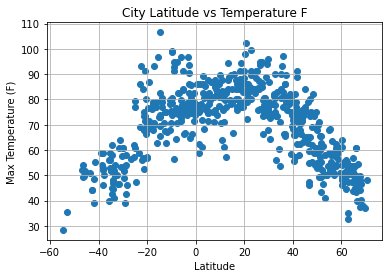

In [267]:
x_values = wo_outlier_df["Latitude"]
y_values = wo_outlier_df["Max Temperature F"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title ("City Latitude vs Temperature F")
plt.grid(True)
plt.show


The script is to analyze the relationship between latitude vs maximun temperature observed at a sample of 500+ cities aroud the world.

It is observe from the chart that temperature increases while you approach to the equator.
It also observe that vast majority of the highest temperatures is around latitude at 20 degrees.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

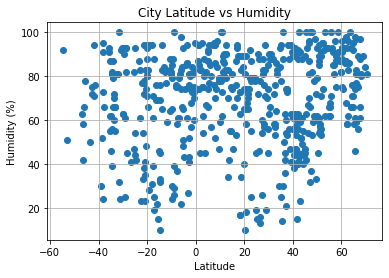

In [268]:
x_values = wo_outlier_df["Latitude"]
y_values = wo_outlier_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title ("City Latitude vs Humidity")
plt.grid(True)
plt.show

The script is to analyze the relationship between latitude vs percentage of humidity observed at a sample of 500+ cities aroud the world.

Data spreading shows that latitude vs humidity do not have relationship between them, the data is dispersed not showing any relation.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

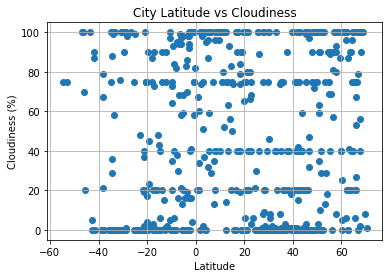

In [269]:
x_values = wo_outlier_df["Latitude"]
y_values = wo_outlier_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title ("City Latitude vs Cloudiness")
plt.grid(True)
plt.show

The script is to analyze the relationship between latitude vs percentage of cloudiness observed at a sample of 500+ cities aroud the world.

Data spreading shows that latitude vs cloudiness do not have relationship between them, the data is dispersed not showing any relation.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

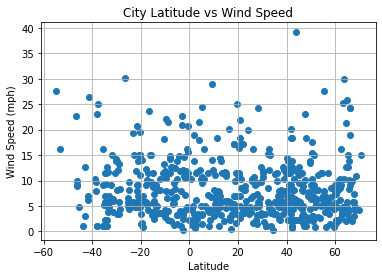

In [270]:
x_values = wo_outlier_df["Latitude"]
y_values = wo_outlier_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title ("City Latitude vs Wind Speed")
plt.grid(True)
plt.show

The script is to analyze the relationship between latitude vs wind speed in mph observed at a sample of 500+ cities aroud the world.

Data spreading shows that latitude vs wind speed do not have relationship between them, the data is disperser not showing any relation.

But it is also observed that wind speed around the world blows in an approximate rage of 0 to 15 mph and it is most concentrated in the range of 0-5 mph.

## Linear Regression

In [271]:
north_df = weather_df.loc[weather_df["Latitude"]>= 0, :]
north_df


,City,Temperature F,Max Temperature F,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date,City Id
1,San Policarpo,79.79,79.79,12.18,125.51,83,100,7.83,PH,1598812761,1688696
3,Manado,75.20,75.20,1.49,124.85,94,20,2.24,ID,1598812481,1636544
6,Xichang,66.34,66.34,27.90,102.26,83,100,3.15,CN,1598812745,1789647
8,Siniscola,78.80,78.80,40.57,9.69,44,20,11.41,IT,1598812763,3166509
9,Yekepa,71.10,71.10,7.58,-8.54,95,13,4.21,LR,1598812763,2272790
...,...,...,...,...,...,...,...,...,...,...,...
1080,Saint George,89.60,89.60,37.10,-113.58,21,1,5.82,US,1598812896,5546220
1084,Glasgow,57.29,57.99,55.87,-4.26,71,69,5.82,GB,1598812888,2648579
1089,Psebay,63.09,63.09,44.12,40.81,55,0,5.37,RU,1598813051,504391
1093,Kitgum,68.25,68.25,3.28,32.89,88,37,2.42,UG,1598813052,230893


In [272]:
south_df = weather_df.loc[weather_df["Latitude"]<= 0, :]
south_df

,City,Temperature F,Max Temperature F,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Country,Date,City Id
0,Saint-Philippe,64.26,68.00,-21.36,55.77,77,37,4.70,RE,1598812760,935215
2,Arraial do Cabo,83.95,86.00,-22.97,-42.03,61,0,14.99,BR,1598812761,3471451
4,Tuatapere,49.57,49.57,-46.13,167.68,66,70,9.95,NZ,1598812762,2180815
5,Puerto Ayora,75.20,75.20,-0.74,-90.35,60,100,20.80,EC,1598812762,3652764
7,Henties Bay,55.99,55.99,-22.12,14.28,77,0,11.83,NA,1598812762,3356832
...,...,...,...,...,...,...,...,...,...,...,...
1086,Tautira,78.39,78.80,-17.73,-149.15,61,20,5.82,PF,1598813050,4033557
1088,Mayumba,73.98,73.98,-3.43,10.66,86,70,7.85,GA,1598813050,2399001
1094,Kiunga,72.50,72.50,-6.12,141.29,98,94,1.34,PG,1598813052,2093846
1107,Mamaku,50.56,53.01,-38.10,176.08,91,79,1.01,NZ,1598813055,2187834


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.74


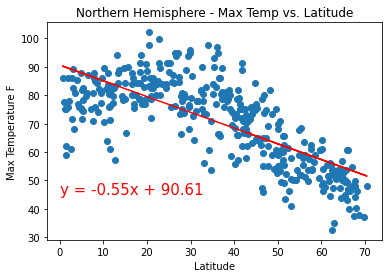

In [273]:
correlation = st.pearsonr(north_df["Latitude"],north_df["Max Temperature F"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"],north_df["Max Temperature F"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df["Latitude"],north_df["Max Temperature F"])
plt.plot(north_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature F')
plt.savefig("Images/nh_lat_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.77


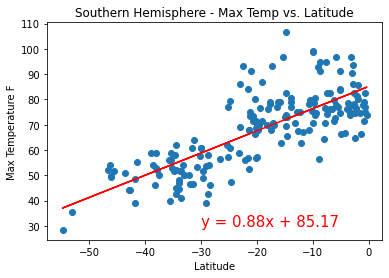

In [274]:
correlation = st.pearsonr(south_df["Latitude"],south_df["Max Temperature F"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"],south_df["Max Temperature F"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df["Latitude"],south_df["Max Temperature F"])
plt.plot(south_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature F')
plt.savefig("Images/sh_lat_temp.png")
plt.show()

As prevously observed in the world data, the data grouped by hemisphere shows that the temperature increases while you approach to the equator.

Both data sets show strong relationship. But south hemisphere shows the strongest of both with a correlation factor of 0.77.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06


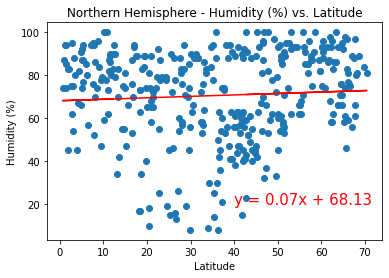

In [275]:
correlation = st.pearsonr(north_df["Latitude"],north_df["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"],north_df["Humidity"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df["Latitude"],north_df["Humidity"])
plt.plot(north_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/nh_lat_hum.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0


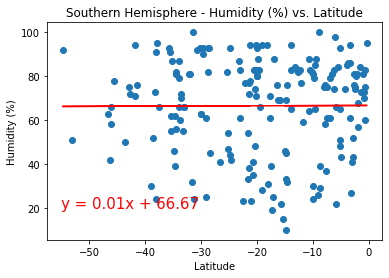

In [276]:
correlation = st.pearsonr(south_df["Latitude"],south_df["Humidity"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"],south_df["Humidity"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df["Latitude"],south_df["Humidity"])
plt.plot(south_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/sh_lat_hum.png")
plt.show()


Both charts show that the relationship between latitude and humidity is not present.

North Hemisphere correlation factor = 0.06

South Hemisphere correlation factor = 0.00


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


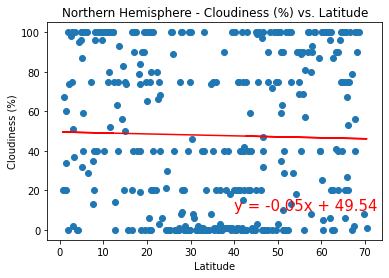

In [277]:
correlation = st.pearsonr(north_df["Latitude"],north_df["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"],north_df["Cloudiness"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df["Latitude"],north_df["Cloudiness"])
plt.plot(north_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/nh_lat_cloud.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11


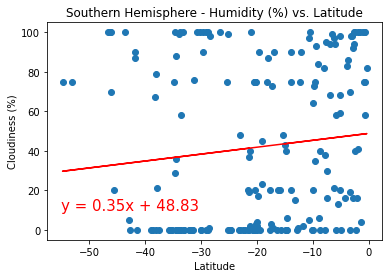

In [278]:
correlation = st.pearsonr(south_df["Latitude"],south_df["Cloudiness"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"],south_df["Cloudiness"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df["Latitude"],south_df["Cloudiness"])
plt.plot(south_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/sh_lat_cloud.png")
plt.show()

Both charts show that the relationship between latitude and cloudiness is not present in both hemispheres.

North Hemisphere correlation factor = -0.02

South Hemisphere correlation factor = 0.11

Cloudiness data is very disperse through latitude axis.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.03


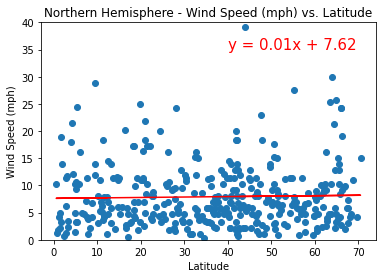

In [279]:
correlation = st.pearsonr(north_df["Latitude"],north_df["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Latitude"],north_df["Wind Speed"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df["Latitude"],north_df["Wind Speed"])
plt.plot(north_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
#plt.xlim(10, 30)
plt.ylim(0, 40)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/nh_lat_wind.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.06


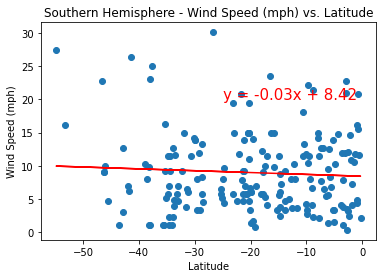

In [280]:
correlation = st.pearsonr(south_df["Latitude"],south_df["Wind Speed"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Latitude"],south_df["Wind Speed"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df["Latitude"],south_df["Wind Speed"])
plt.plot(south_df["Latitude"],regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
#plt.xlim(10, 30)
#plt.ylim(30, 50)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/sh_lat_wind.png")
plt.show()


Both charts show that the relationship between latitude and wind speed is is not present in both hemispheres.

North Hemisphere correlation factor = 0.03

South Hemisphere correlation factor = -0.06

But it is also observed that in the north hemisphere blows in most of the sampled cities at a range of 0 to 10 mph. Whereas in the south hemisphere blows in the most of the sampled cities at a range of 0 to 15 mph